# CE7454 Project: Compound Analysis using Graph Representation Learning

### Group35: Zheng Wang, Zizhong Meng, Kaiqiang Yu

# Table of Contents
- [Motivation and Description](#Motivation-and-Description)
- [Data Acquisition](#Data-Acquisition)
    - [Background: Compound composition](#Background-Compounds-composition)
    - [What is compound classification?](#What-is-compound-classification?)
    - [Data representation](#Data-representation)
- [Data Exploration](#Data-Exploration)
    - [Visualization](#visualization)
    - [Statistic and discovery](#Statistic-and-discovery)
- [Pre-processing](#Pre-processing)
    - [Loading dataset](#Loading-dataset)
    - [Pattern mining](#Pattern-mining)
    - [Building corpus of functional groups](#Building-corpus-of-functional-group)
    - [Discovering data insights](#Discovering-data-insights)
- [Graph Representation Learning Solutions](#Graph-Representation-Learning-Solutions)
    - [PV-DM model for compound embedding](#PV-DM)
    - [PV-DBOW model for compound embedding](#PV-DBOW)
    - [TSNE for visualization of embeddings](#TSNE)
    - [SVM-based classification task](#SVM)
    - [Baseline1: PCA embedding](#PCA)
    - [Baseline2: graph2vec model](#graph2vec)
    - [Baseline3: Element-based representation learning (EbR) model](#EbR)
- [Analysis of Results](#Analysis-of-Results)
    - [Classification performance](#Classification-performance)
    - [Further discussion](#Further-discussion)

# Motivation and Description
Go back to [Table of Contents](#Table-of-Contents)

## Motivation
Chemical Compound Classification is a fundamental and challenging problem of Chemoinformatics, which has been employed in various applications, such as drug discovery, compound activity prediction, and protein function prediction. Enabled by modeling compounds as molecular graphs, many descriptors, based on frequency, physiochemical properties as well as topological and geometric substructures, have been proposed to find the representations of molecular graphs to build classification models. 

## Description

Our project will provide a framework to learn representations of molecular graphs. The representation will be considered both graph structure and atom information. To evaluate our framework, we will do chemical molecules classification and biomolecules classification and compare with other frameworks which only consider graph structure. We will analyse the impact of spatial information for properties of molecules in experimental result. Our project may help researchers to predict the properties of molecules better.

# Data Acquisition
Go back to [Table of Contents](#Table-of-Contents)

## Backgroud: Compound composition

We use three public compound datasets, which are COX-2, BZR and DHFR.

**COX-2.** A set of 467 cyclooxygenase-2 (COX-2) inhabitor, with in vitro activities against human recombinant enzyme expressed as IC<sub>50</sub> values ranging from 1nM to > 100$\mu$M.

**BZR.** A set of 405 ligands for the benzodiazepine receptor (BZR). In virtro binding affinities as measured by inhibition of \[<sup>3</sup>H\] diazepam binding are expressed as IC<sub>50</sub> values, ranging from 0.34nM to > 70 $\mu$M.
    
**DHFR.** A set of 756 inhibitors of dihydrofolate reductase (DHFR). The IC<sub>50</sub> values for the inbihition of the enzymatic reduction that converts dihydrofolate to tetrahydrofolate ranges from 0.034 nM to > 1000 $\mu$M.
    
## What is compound classification?

Compound classification is based on their pIC<sub>50</sub> (pIC<sub>50</sub>=-logIC<sub>50</sub>). The thresholds are pIC<sub>50</sub>=6.5 for COX-2, pIC<sub>50</sub>=7.0 for BZR, and pIC<sub>50</sub>=6.0 for DHFR. If a compound has bigger pIC<sub>50</sub> than threshold, it will be classified as active. Otherwise the compound will be classified as inactive.

## Data representation

Each compound is represented as a graph. Atom is represented as node and node label indicates the position of the atom in the periodic table. If there is chemical bond attracting two atoms, then the two corresponding nodes will be connected by a edge. The activity of a compound is represented as graph label, 1 for active and -1 for inactive. 

# Data Exploration
Go back to [Table of Contents](#Table-of-Contents)

## Visualization

To efficiently discover the data insight, we proposed to implement a visualization platform to give a clear and dynamic presentation of arbitrary molecular graphs in different ways, such as 2D or 3D graphs. 

Fortunately, [Dash](https://dash.plot.ly/dash-bio) and [Dash Bio](https://dash.plot.ly/dash-bio) enable us to finish this work. Specifically, Dash is a web application framework that provides pure Python abstraction around HTML, CSS, and JavaScript. Dash Bio is a suite of bioinformatics components that make it simpler to analyze and visualize bioinformatics data and interact with them in a Dash application. 

Note that our visualization can be remotely accessed by the link http://155.69.150.48:8050/

![Visualization Platform](./data&code/dash.png)


## Statistic and discovery

In order to extract knowledge from molecular graphs, we thus present some statistic information and structural discovery.




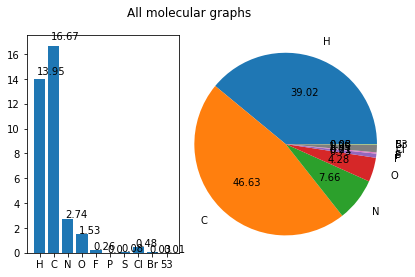

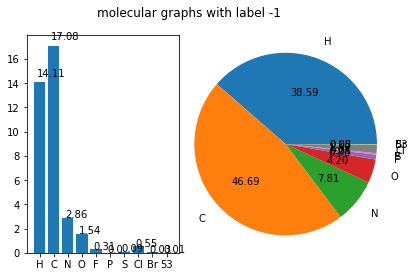

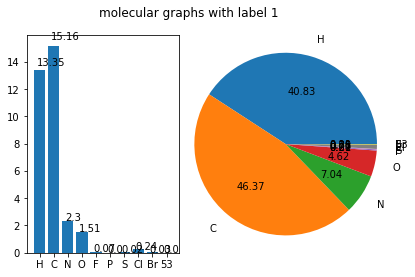

In [4]:

import matplotlib.pyplot as plt

Graph_Label_list=[];
f=open('.\data&code\BZR\BZR_graph_labels.txt');
for line in f:
    Graph_Label_list.append(int(line));
f.close();

element=[];
num=[];
f=open('.\data&code\BZR\PCA\BZR.txt');
element_line=f.readline();
temp=element_line.split(' ');
for i in range(0,len(temp)-1):
    element.append(int(temp[i]));
for line in f:
    temp=line.split(' ');
    new_temp=[];
    for i in range(0,len(temp)-1):
        new_temp.append(int(temp[i]));
    num.append(new_temp);
f.close();

total=[0 for i in range(0,len(num[0]))];
total_1=[0 for i in range(0,len(num[0]))];
total_2=[0 for i in range(0,len(num[0]))];
num_count1=0;
for i in range(0,len(num)):
    if Graph_Label_list[i]==-1:
        num_count1=num_count1+1;
    for j in range(0,len(num[i])):
        total[j]=total[j]+num[i][j];
        if Graph_Label_list[i]==-1:
            total_1[j]=total_1[j]+num[i][j];
        else:
            total_2[j]=total_2[j]+num[i][j];
        
Element_list=['', 'H','He','Li','Be','B',
'C','N','O','F','Ne',
'Na','Mg','Al','Si','P',
'S','Cl','Ar','K','Ca',
'Sc','Ti','V','Cr','Mn',
'Fe','Co','Ni','Cu','Zn',
'Ga','Ge','As','Se','Br'];
for i in range(36,100):
    Element_list.append(str(i));
name_list=[];
avg_num=[];
avg_num1=[];
avg_num2=[];
for i in range(0,len(element)):
    name_list.append(Element_list[element[i]]);
    avg_num.append(total[i]*1.0/len(Graph_Label_list));
    avg_num1.append(total_1[i]*1.0/num_count1);
    avg_num2.append(total_2[i]*1.0/(len(Graph_Label_list)-num_count1));

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % round(float(height),2))
plt.figure();
plt.subplot(1,2,1);
plt.suptitle('All molecular graphs')
a=plt.bar(range(len(element)),avg_num,tick_label=name_list);
autolabel(a)
plt.subplot(1,2,2);
plt.pie(avg_num,labels=name_list,radius=1.5,autopct='%1.2f',labeldistance=1.2);

plt.figure();
plt.subplot(1,2,1);
plt.suptitle('molecular graphs with label -1')
b=plt.bar(range(len(element)),avg_num1,tick_label=name_list);
autolabel(b)
plt.subplot(1,2,2);
plt.pie(avg_num1,labels=name_list,radius=1.5,autopct='%1.2f',labeldistance=1.2);

plt.figure();
plt.subplot(1,2,1);
plt.suptitle('molecular graphs with label 1')
c=plt.bar(range(len(element)),avg_num2,tick_label=name_list);
autolabel(c)
plt.subplot(1,2,2);
plt.pie(avg_num2,labels=name_list,radius=1.5,autopct='%1.2f',labeldistance=1.2);
plt.show();


# Pre-processing
Go back to [Table of Contents](#Table-of-Contents)

## Loading dataset

We first load COX2 dataset.

In [16]:
f_node_labels = open('./data&code/COX2/COX2_node_labels.txt')
f_node_attributes = open('./data&code/COX2/COX2_node_attributes.txt')
f_graph_indicator = open('./data&code/COX2/COX2_graph_indicator.txt')
f_graph_labels = open('./data&code/COX2/COX2_graph_labels.txt')
f_graph = open('./data&code/COX2/COX2_A.txt')

The original dataset includes 5 data files saved as text file, more data details can be found in [`README.txt`](./data&code/COX2/README.txt).

node_labels: element number according to the periodic table of elements<br>
node_attributes: 3D coordinates<br>
graph_indicator: graph identifiers for all nodes of all graphs<br>
graph_labels: class labels for all graphs in the dataset<br>
graph: adjacency matrix for all graphs<br>

Next, we read all files into Python List for further analysis.

In [17]:
def read_file(f_node_labels, f_node_attributes, f_graph_indicator, f_graph_labels, f_graph):
    Node_Label_list=[]
    Node_Attribute_list=[]
    Bond_list=[]
    Graph_Label_list=[]
    Graph_Indicator_list=[]
    
    for line in f_node_labels:
        Node_Label_list.append(int(line))
    f_node_labels.close()

    for line in f_node_attributes:
        temp=line.split(',')
        for i in range(0,len(temp)):
            temp[i]=float(temp[i])
        Node_Attribute_list.append(temp)
    f_node_attributes.close()

    for line in f_graph:
        temp=line.split(',')
        for i in range(0,len(temp)):
            temp[i]=int(temp[i])
        Bond_list.append(temp)
    f_graph.close()

    for line in f_graph_labels:
        Graph_Label_list.append(int(line))
    f_graph_labels.close()

    for line in f_graph_indicator:
        Graph_Indicator_list.append(int(line))
    f_graph_indicator.close()
    
    return Node_Label_list, Node_Attribute_list, Bond_list, Graph_Label_list, Graph_Indicator_list

Node_Label_list, Node_Attribute_list, Bond_list, Graph_Label_list, Graph_Indicator_list = read_file(f_node_labels, f_node_attributes, f_graph_indicator, f_graph_labels, f_graph)

## Pattern mining

We build all compound graphs form all files. In this step, we use [networkx](https://networkx.github.io/) to manage data for further mining tasks.

In [34]:
import networkx as nx
Element_list=['','H','He','Li','Be','B',
              'C','N','O','F','Ne','Na',
              'Mg','Al','Si','P','S','Cl',
              'Ar','K','Ca','Sc','Ti','V',
              'Cr','Mn','Fe','Co','Ni','Cu',
              'Zn','Ga','Ge','As','Se','Br']
def build_graph(Bond_list, Graph_Indicator_list, total):
    G_collection = []
    G_labeldict = []
    for Graph_ID in range(1, total+1):
        labeldict = {}
        if Graph_ID % 50 == 0:
            print('processing:', Graph_ID)
        G = nx.Graph()
        for i in range(len(Bond_list)):
            temp_bond = Bond_list[i]
            if Graph_Indicator_list[temp_bond[0]-1] > Graph_ID:
                break
            if Graph_Indicator_list[temp_bond[0]-1] == Graph_ID and Graph_Indicator_list[temp_bond[1]-1] == Graph_ID:
                #print(temp_bond[0]-1, temp_bond[1]-1)
                labeldict[temp_bond[0]-1] = Element_list[Node_Label_list[temp_bond[0] - 1]]
                labeldict[temp_bond[1]-1] = Element_list[Node_Label_list[temp_bond[1] - 1]]
                G.add_edge(temp_bond[0]-1, temp_bond[1]-1)
        G_collection.append(G)
        G_labeldict.append(labeldict)
    return G_collection, G_labeldict
G_collection, G_labeldict = build_graph(Bond_list, Graph_Indicator_list, total = 467)
pickle.dump(G_collection, open('./data&code/COX2/G_collection', 'wb'), protocol=2)
pickle.dump(G_labeldict, open('./data&code/COX2/G_labeldict', 'wb'), protocol=2)

processing: 50
processing: 100
processing: 150
processing: 200
processing: 250
processing: 300
processing: 350
processing: 400
processing: 450


We visualize a compound with elements information.

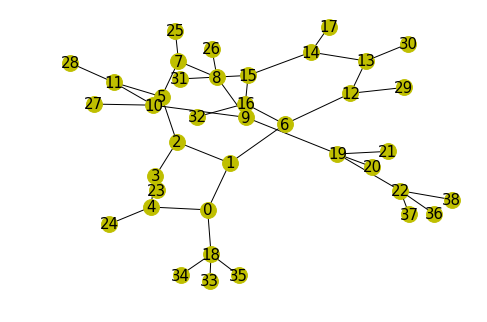

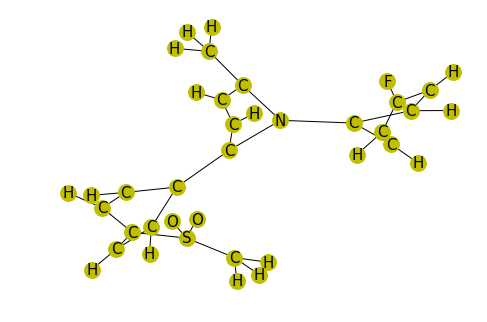

graph_labels -1


In [24]:
def viz(ID):
    G, node_labels, graph_labels = G_collection[ID], G_labeldict[ID], Graph_Label_list[ID]
    nx.draw(G, with_labels = True, node_color='y', node_size = 250, font_size=15)
    plt.show()
    nx.draw(G, labels = node_labels, with_labels = True, node_color='y', node_size = 250, font_size=15)
    plt.show()
    print('graph_labels', graph_labels)

viz(ID = 0)

Based on the above results of visualization, we find that some compounds such as COX2 are mainly composed of carbocyclic structures, and the carbocyclic structures can be considered as skeletons and other functional groups are connected to the carbon bonds on the ring. In order to mine these functional groups efficiently, we try to find all cycles in a given compound first, and then deduct these cycles, and thus current graph becomes a non-connected graph. Next, we find all of the maximal connected components in the non-connected graph, and we use these connected components to define patterns for thees compounds. We consider that the chemical properties of these compounds are reflected in these patterns.

processing ID 0
Skeleton of carbon circles [[1, 2, 3, 4, 0], [7, 8, 9, 10, 11, 5], [12, 13, 14, 15, 16, 6]]


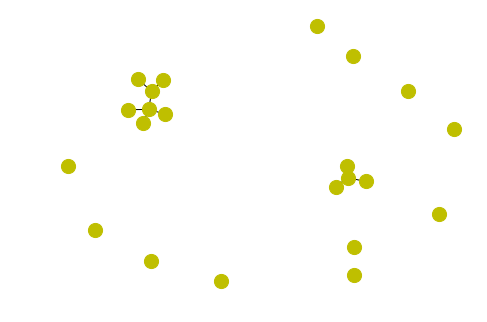

processing ID 1
Skeleton of carbon circles [[51, 52, 53, 54, 55, 45], [40, 41, 42, 43, 39], [46, 47, 48, 49, 50, 44]]


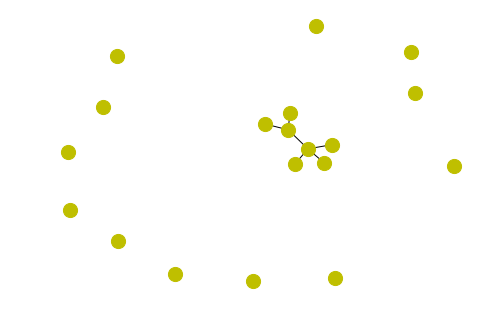

processing ID 2
Skeleton of carbon circles [[87, 88, 89, 90, 91, 81], [76, 77, 78, 79, 75], [82, 83, 84, 85, 86, 80]]


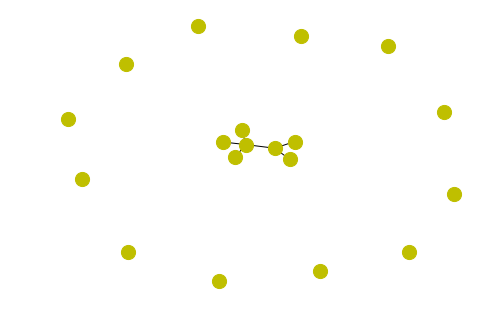

processing ID 3
Skeleton of carbon circles [[111, 112, 113, 114, 115], [118, 119, 120, 121, 122, 116], [123, 124, 125, 126, 127, 117]]


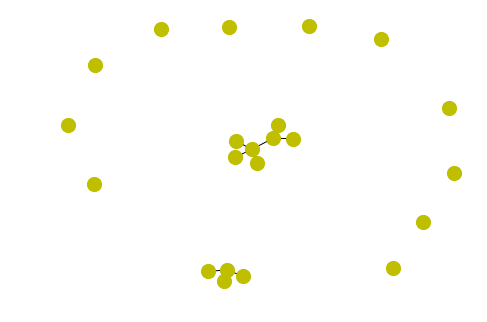

processing ID 4
Skeleton of carbon circles [[162, 163, 164, 165, 166, 156], [151, 152, 153, 154, 150], [157, 158, 159, 160, 161, 155]]


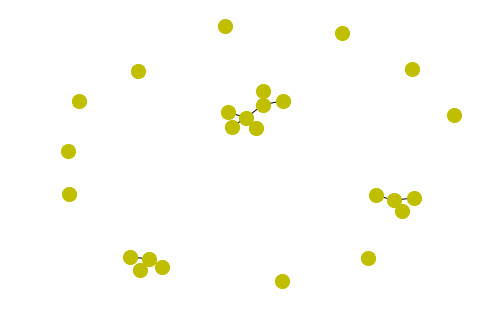

processing ID 5
Skeleton of carbon circles [[204, 205, 206, 207, 208, 198], [193, 194, 195, 196, 192], [199, 200, 201, 202, 203, 197]]


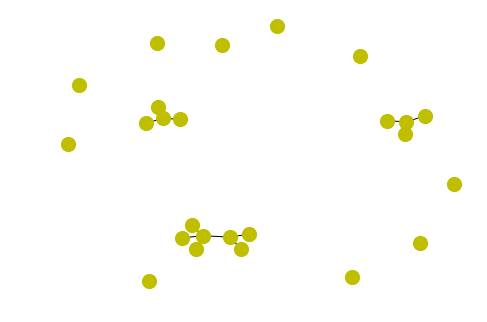

processing ID 6
Skeleton of carbon circles [[247, 246, 240, 250, 249, 248], [235, 236, 237, 238, 234], [241, 242, 243, 244, 245, 239]]


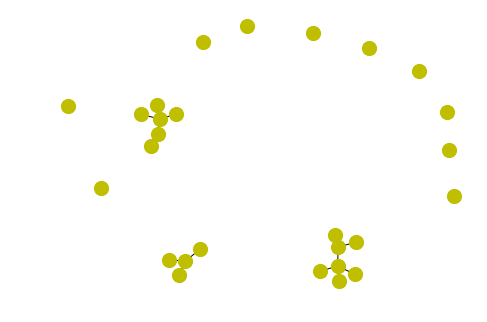

processing ID 7
Skeleton of carbon circles [[290, 291, 292, 293, 294, 284], [279, 280, 281, 282, 278], [285, 286, 287, 288, 289, 283]]


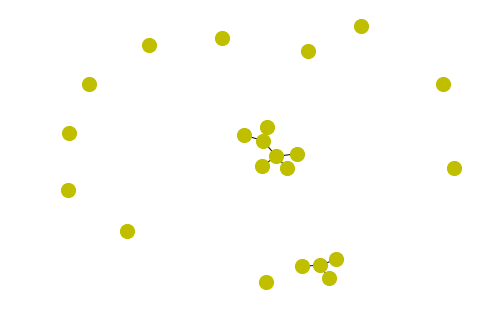

processing ID 8
Skeleton of carbon circles [[329, 330, 331, 332, 333, 323], [318, 319, 320, 321, 317], [324, 325, 326, 327, 328, 322]]


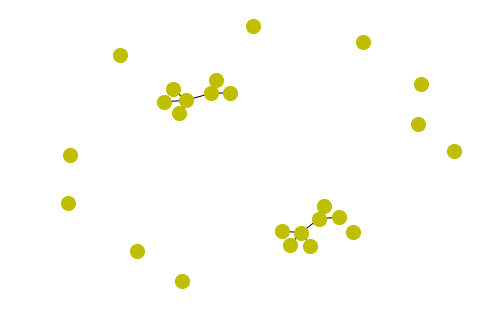

processing ID 9
Skeleton of carbon circles [[360, 359, 363, 362, 361], [371, 372, 373, 374, 375, 365], [366, 367, 368, 369, 370, 364]]


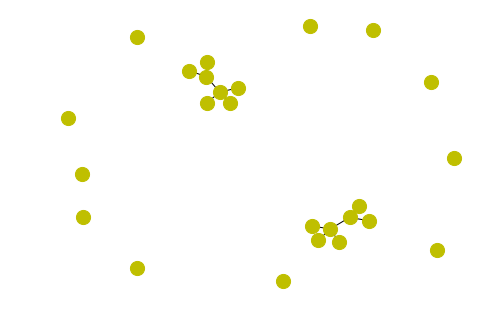

processing ID 10
Skeleton of carbon circles [[413, 414, 415, 416, 417, 407], [402, 403, 404, 405, 401], [408, 409, 410, 411, 412, 406]]


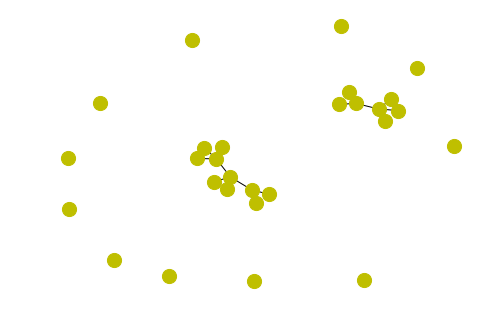

processing ID 11
Skeleton of carbon circles [[471, 472, 473, 474, 475, 470], [458, 459, 460, 461, 462, 452], [447, 448, 449, 450, 446], [453, 454, 455, 456, 457, 451]]


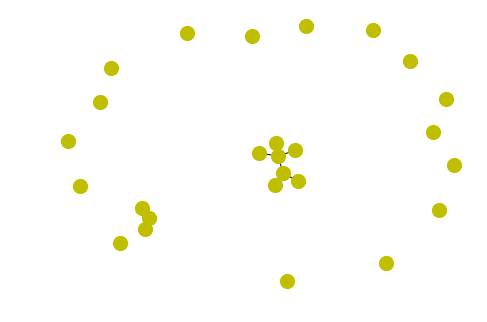

processing ID 12
Skeleton of carbon circles [[503, 502, 500, 506, 505, 504], [495, 499, 498, 497, 496], [507, 508, 509, 510, 511, 501]]


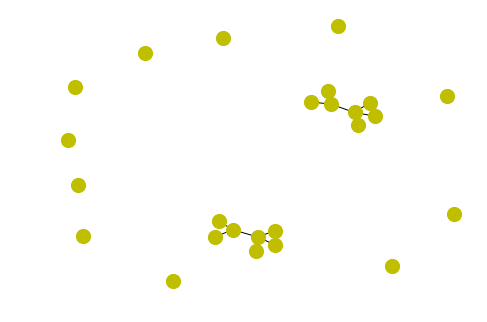

processing ID 13
Skeleton of carbon circles [[549, 550, 551, 552, 553, 543], [538, 539, 540, 541, 537], [544, 545, 546, 547, 548, 542]]


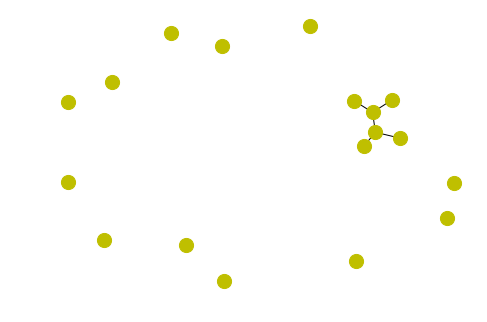

processing ID 14
Skeleton of carbon circles [[584, 585, 586, 587, 588, 578], [573, 574, 575, 576, 572], [579, 580, 581, 582, 583, 577]]


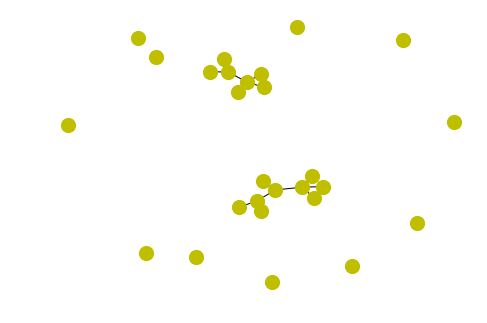

processing ID 15
Skeleton of carbon circles [[629, 628, 622, 632, 631, 630], [617, 618, 619, 620, 616], [623, 624, 625, 626, 627, 621]]


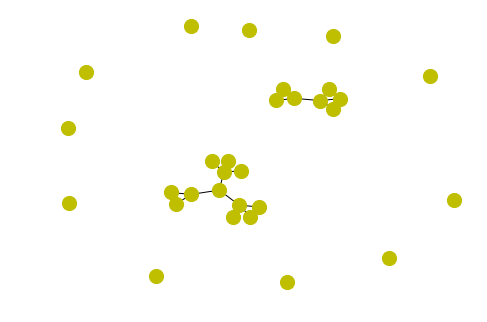

processing ID 16
Skeleton of carbon circles [[675, 676, 677, 678, 679, 669], [664, 665, 666, 667, 663], [670, 671, 672, 673, 674, 668]]


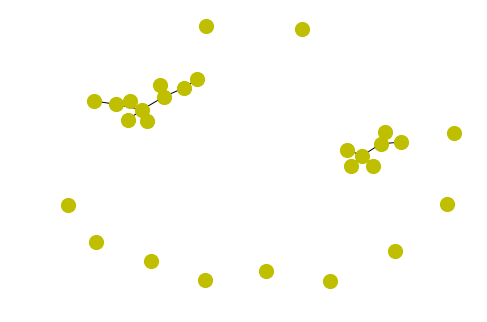

processing ID 17
Skeleton of carbon circles [[720, 721, 722, 723, 724, 714], [709, 710, 711, 712, 708], [715, 716, 717, 718, 719, 713]]


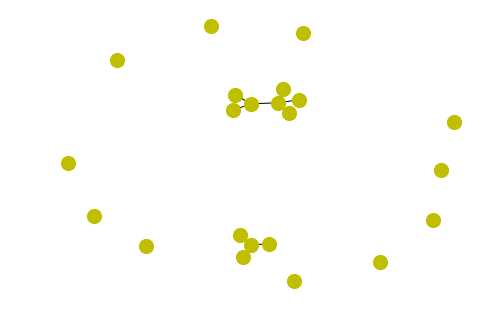

processing ID 18
Skeleton of carbon circles [[760, 759, 753, 763, 762, 761], [748, 749, 750, 751, 747], [754, 755, 756, 757, 758, 752]]


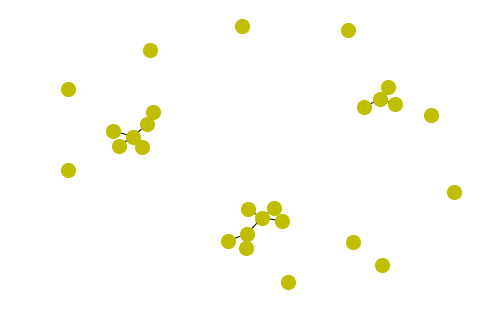

processing ID 19
Skeleton of carbon circles [[803, 804, 805, 806, 807, 797], [792, 793, 794, 795, 791], [798, 799, 800, 801, 802, 796]]


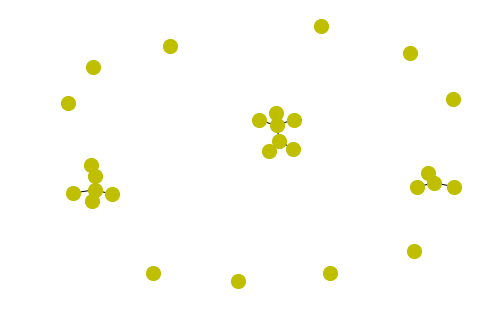

processing ID 20
Skeleton of carbon circles [[847, 848, 849, 850, 851, 841], [861, 862, 863, 864, 865, 860], [836, 837, 838, 839, 835], [842, 843, 844, 845, 846, 840]]


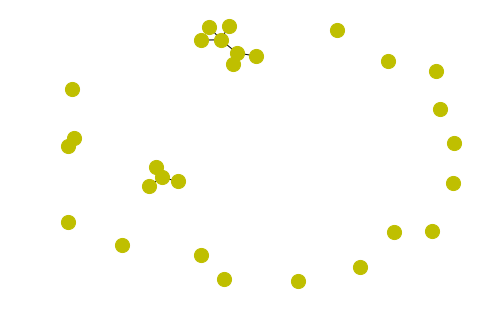

processing ID 21
Skeleton of carbon circles [[895, 894, 893, 891, 897, 896], [886, 890, 889, 888, 887], [898, 899, 900, 901, 902, 892]]


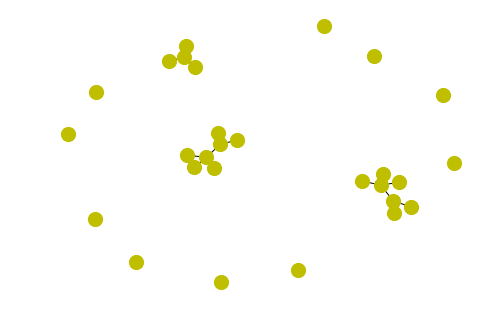

processing ID 22
Skeleton of carbon circles [[943, 944, 945, 946, 947, 937], [932, 933, 934, 935, 931], [938, 939, 940, 941, 942, 936]]


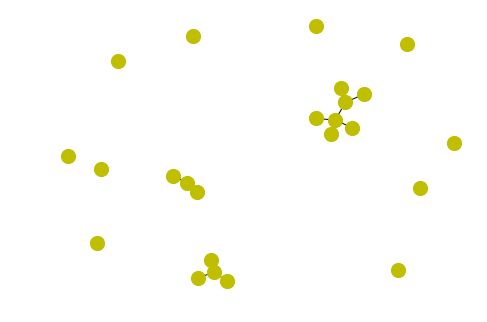

processing ID 23
Skeleton of carbon circles [[984, 985, 986, 987, 988, 978], [973, 974, 975, 976, 972], [979, 980, 981, 982, 983, 977]]


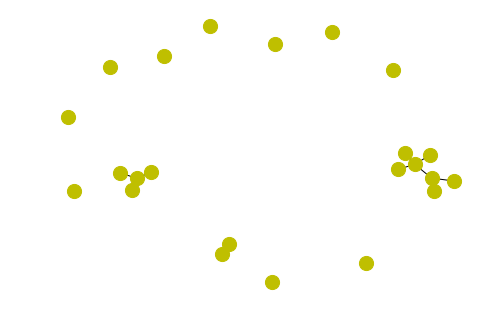

processing ID 24
Skeleton of carbon circles [[1018, 1028, 1027, 1026, 1025, 1024], [1013, 1014, 1015, 1016, 1012], [1019, 1020, 1021, 1022, 1023, 1017]]


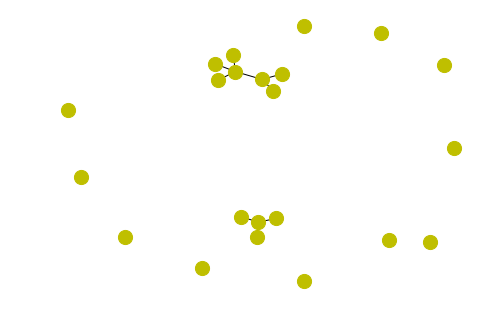

processing ID 25
Skeleton of carbon circles [[1063, 1064, 1065, 1066, 1067, 1057], [1052, 1053, 1054, 1055, 1051], [1058, 1059, 1060, 1061, 1062, 1056]]


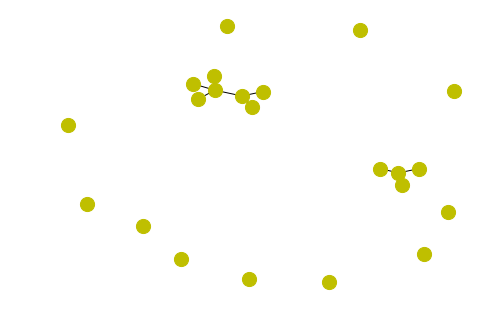

processing ID 26
Skeleton of carbon circles [[1102, 1103, 1104, 1105, 1106, 1096], [1091, 1092, 1093, 1094, 1090], [1097, 1098, 1099, 1100, 1101, 1095]]


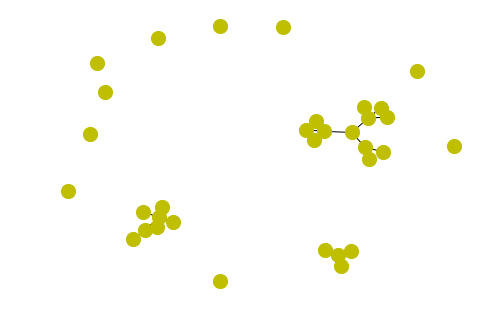

processing ID 27
Skeleton of carbon circles [[1146, 1156, 1155, 1154, 1153, 1152], [1141, 1142, 1143, 1144, 1140], [1147, 1148, 1149, 1150, 1151, 1145]]


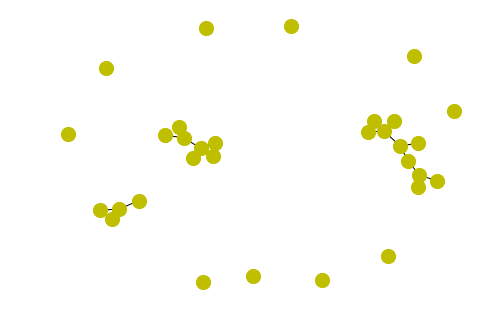

processing ID 28
Skeleton of carbon circles [[1200, 1201, 1202, 1203, 1204, 1194], [1189, 1190, 1191, 1192, 1188], [1195, 1196, 1197, 1198, 1199, 1193]]


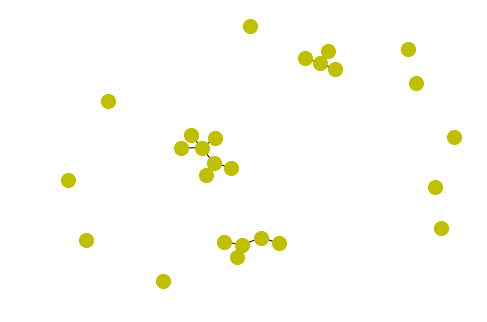

processing ID 29
Skeleton of carbon circles [[1256, 1261, 1260, 1259, 1258, 1257], [1243, 1244, 1245, 1246, 1247, 1237], [1233, 1232, 1231, 1235, 1234], [1238, 1239, 1240, 1241, 1242, 1236]]


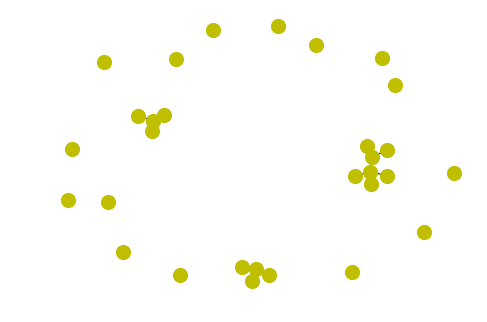

processing ID 30
Skeleton of carbon circles [[1296, 1297, 1298, 1299, 1300, 1290], [1310, 1311, 1312, 1313, 1314, 1309], [1285, 1286, 1287, 1288, 1284], [1291, 1292, 1293, 1294, 1295, 1289]]


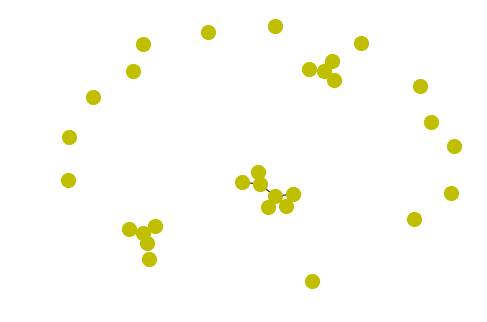

processing ID 31
Skeleton of carbon circles [[1349, 1350, 1351, 1352, 1353, 1343], [1338, 1339, 1340, 1341, 1337], [1344, 1345, 1346, 1347, 1348, 1342]]


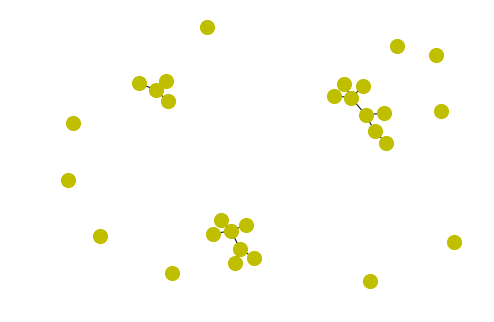

processing ID 32
Skeleton of carbon circles [[1395, 1396, 1397, 1398, 1399, 1389], [1385, 1384, 1383, 1387, 1386], [1390, 1391, 1392, 1393, 1394, 1388]]


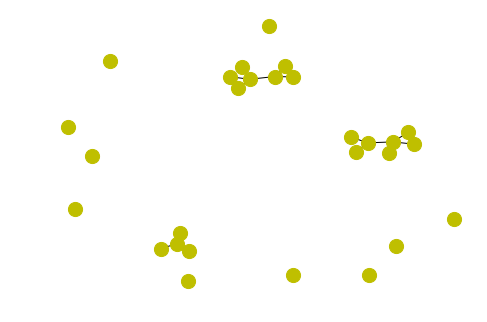

processing ID 33
Skeleton of carbon circles [[1440, 1441, 1442, 1443, 1444, 1434], [1454, 1455, 1456, 1457, 1458, 1453], [1429, 1430, 1431, 1432, 1428], [1435, 1436, 1437, 1438, 1439, 1433]]


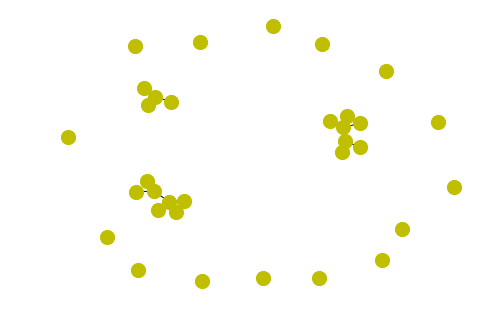

processing ID 34
Skeleton of carbon circles [[1496, 1497, 1498, 1499, 1500, 1490], [1485, 1486, 1487, 1488, 1484], [1491, 1492, 1493, 1494, 1495, 1489]]


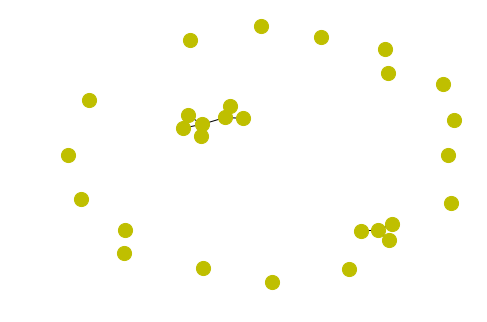

processing ID 35
Skeleton of carbon circles [[1534, 1540, 1539, 1538, 1537, 1536], [1529, 1533, 1532, 1531, 1530], [1541, 1542, 1543, 1544, 1545, 1535]]


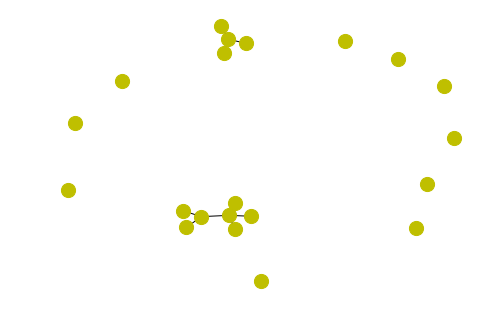

processing ID 36
Skeleton of carbon circles [[1579, 1580, 1581, 1582, 1583, 1573], [1568, 1569, 1570, 1571, 1567], [1574, 1575, 1576, 1577, 1578, 1572]]


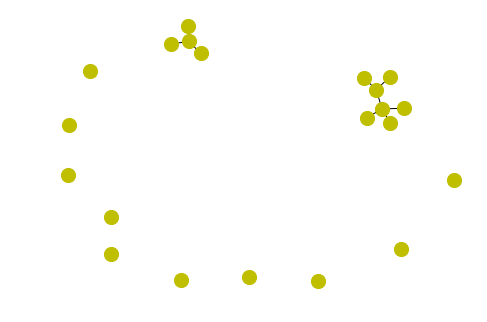

processing ID 37
Skeleton of carbon circles [[1617, 1618, 1619, 1620, 1621, 1611], [1606, 1607, 1608, 1609, 1605], [1612, 1613, 1614, 1615, 1616, 1610]]


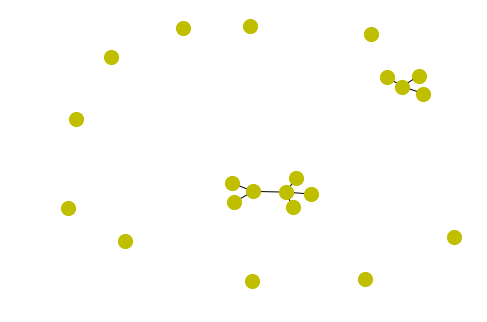

processing ID 38
Skeleton of carbon circles [[1651, 1650, 1648, 1654, 1653, 1652], [1643, 1647, 1646, 1645, 1644], [1655, 1656, 1657, 1658, 1659, 1649]]


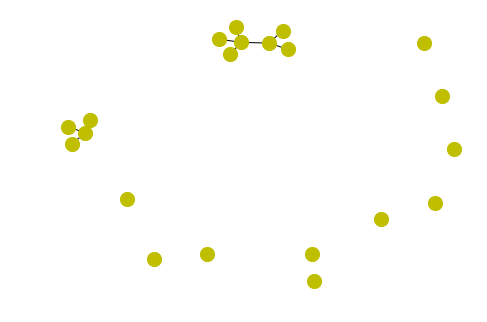

processing ID 39
Skeleton of carbon circles [[1693, 1694, 1695, 1696, 1697, 1687], [1682, 1683, 1684, 1685, 1681], [1688, 1689, 1690, 1691, 1692, 1686]]


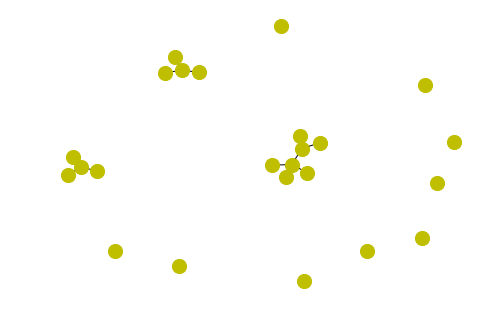

processing ID 40
Skeleton of carbon circles [[1734, 1735, 1736, 1737, 1738, 1728], [1723, 1724, 1725, 1726, 1722], [1729, 1730, 1731, 1732, 1733, 1727]]


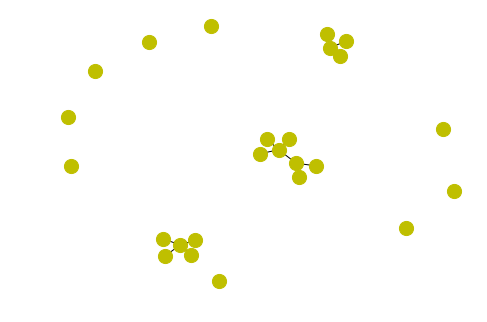

processing ID 41
Skeleton of carbon circles [[1769, 1775, 1774, 1773, 1772, 1771], [1764, 1768, 1767, 1766, 1765], [1776, 1777, 1778, 1779, 1780, 1770]]


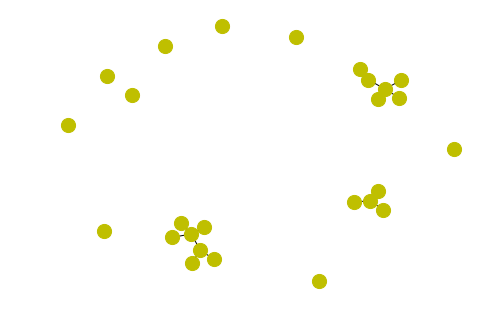

processing ID 42
Skeleton of carbon circles [[1819, 1820, 1821, 1822, 1823, 1813], [1808, 1809, 1810, 1811, 1807], [1814, 1815, 1816, 1817, 1818, 1812]]


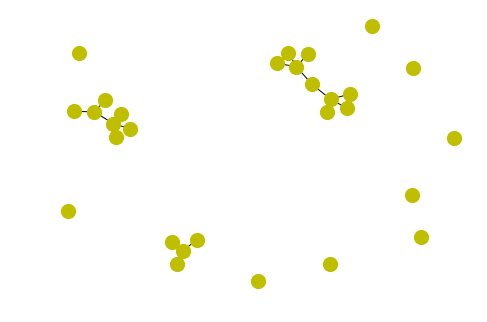

processing ID 43
Skeleton of carbon circles [[1865, 1866, 1867, 1868, 1869, 1859], [1854, 1855, 1856, 1857, 1853], [1860, 1861, 1862, 1863, 1864, 1858]]


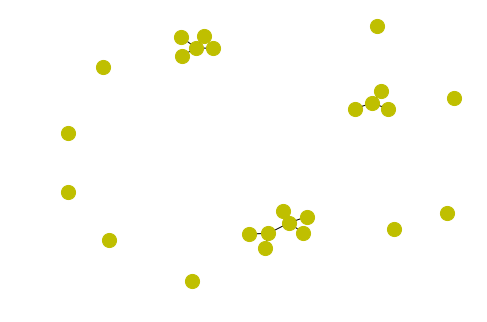

processing ID 44
Skeleton of carbon circles [[1908, 1907, 1901, 1911, 1910, 1909], [1896, 1897, 1898, 1899, 1895], [1902, 1903, 1904, 1905, 1906, 1900]]


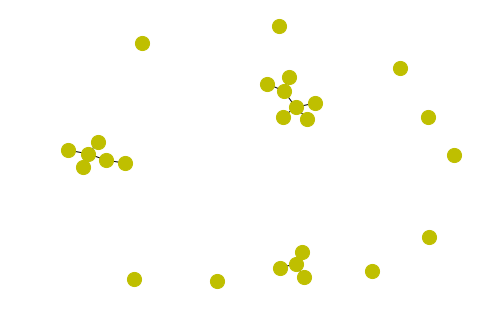

processing ID 45
Skeleton of carbon circles [[1950, 1951, 1952, 1953, 1954, 1944], [1939, 1940, 1941, 1942, 1938], [1945, 1946, 1947, 1948, 1949, 1943]]


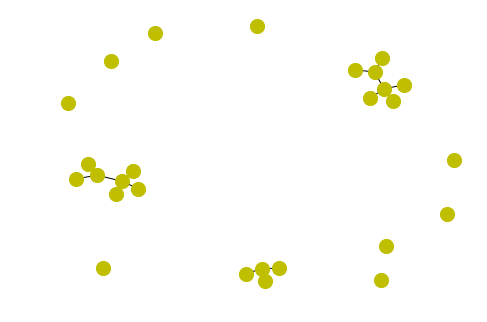

processing ID 46
Skeleton of carbon circles [[1994, 1995, 1996, 1997, 1998, 1988], [1983, 1984, 1985, 1986, 1982], [1989, 1990, 1991, 1992, 1993, 1987]]


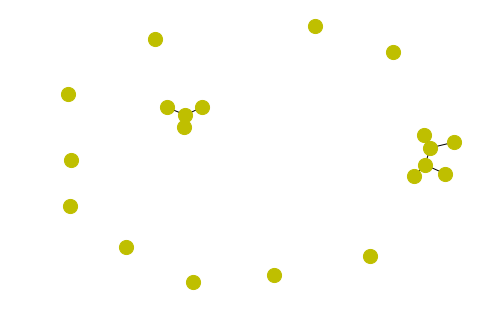

processing ID 47
Skeleton of carbon circles [[2028, 2027, 2026, 2024, 2030, 2029], [2019, 2023, 2022, 2021, 2020], [2031, 2032, 2033, 2034, 2035, 2025]]


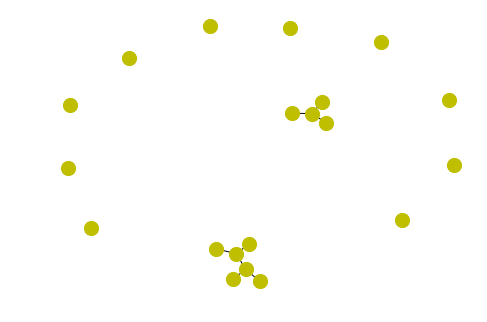

processing ID 48
Skeleton of carbon circles [[2068, 2069, 2070, 2071, 2072, 2062], [2057, 2058, 2059, 2060, 2056], [2063, 2064, 2065, 2066, 2067, 2061]]


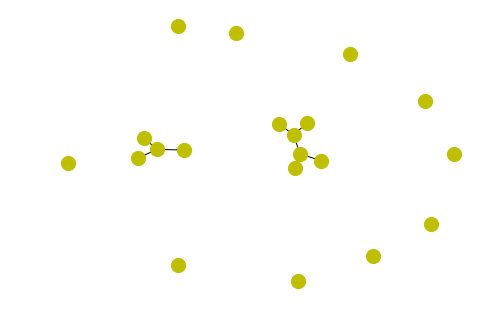

processing ID 49
Skeleton of carbon circles [[2105, 2106, 2107, 2108, 2109, 2099], [2094, 2095, 2096, 2097, 2093], [2100, 2101, 2102, 2103, 2104, 2098]]


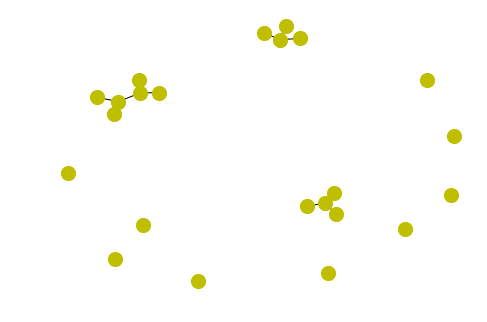

processing ID 50
Skeleton of carbon circles [[2145, 2146, 2147, 2148, 2149, 2139], [2134, 2135, 2136, 2137, 2133], [2140, 2141, 2142, 2143, 2144, 2138]]


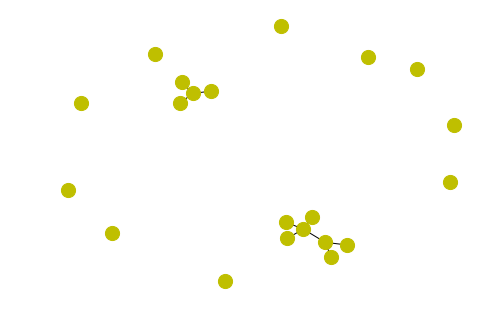

processing ID 51
Skeleton of carbon circles [[2178, 2179, 2180, 2181, 2182, 2176], [2171, 2175, 2174, 2173, 2172], [2183, 2184, 2185, 2186, 2187, 2177]]


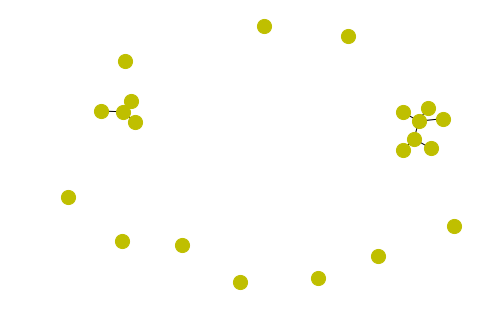

processing ID 52
Skeleton of carbon circles [[2221, 2222, 2223, 2224, 2225, 2215], [2210, 2211, 2212, 2213, 2209], [2216, 2217, 2218, 2219, 2220, 2214]]


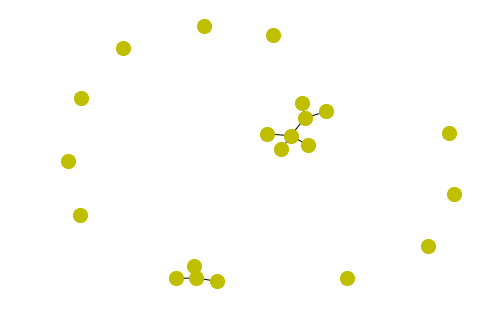

processing ID 53
Skeleton of carbon circles [[2259, 2260, 2261, 2262, 2263, 2253], [2248, 2249, 2250, 2251, 2247], [2254, 2255, 2256, 2257, 2258, 2252]]


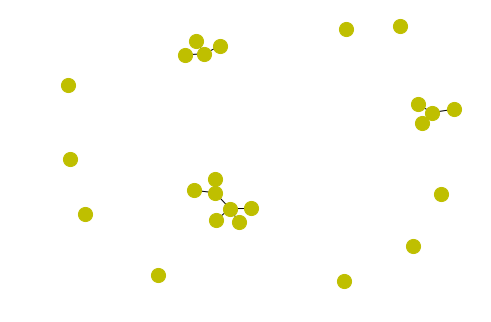

processing ID 54
Skeleton of carbon circles [[2294, 2300, 2301, 2302, 2303, 2304], [2289, 2290, 2291, 2292, 2288], [2295, 2296, 2297, 2298, 2299, 2293]]


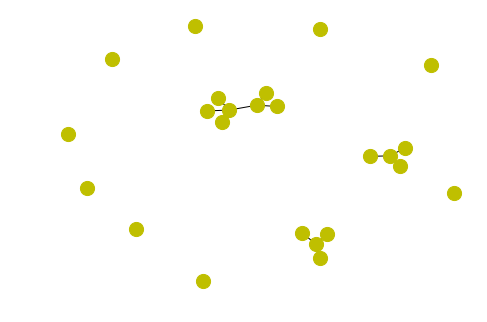

processing ID 55
Skeleton of carbon circles [[2341, 2342, 2343, 2344, 2345, 2335], [2330, 2331, 2332, 2333, 2329], [2336, 2337, 2338, 2339, 2340, 2334]]


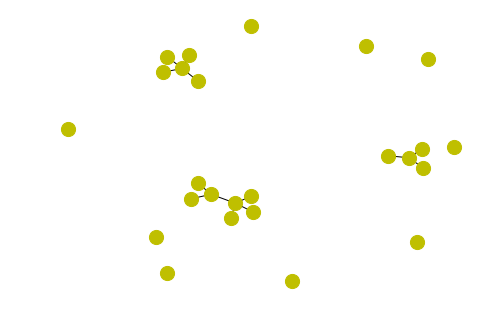

processing ID 56
Skeleton of carbon circles [[2383, 2384, 2385, 2386, 2387, 2377], [2372, 2373, 2374, 2375, 2371], [2378, 2379, 2380, 2381, 2382, 2376]]


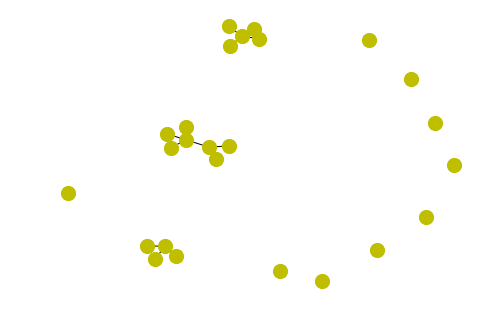

processing ID 57
Skeleton of carbon circles [[2425, 2426, 2427, 2428, 2429, 2419], [2415, 2414, 2413, 2417, 2416], [2420, 2421, 2422, 2423, 2424, 2418]]


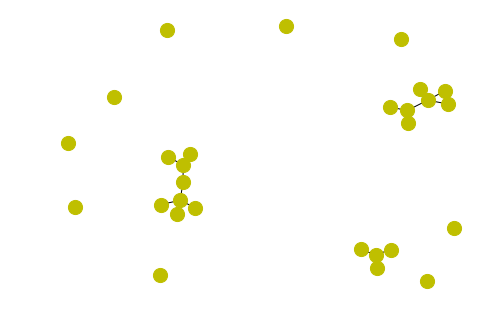

processing ID 58
Skeleton of carbon circles [[2470, 2471, 2472, 2473, 2474, 2464], [2459, 2460, 2461, 2462, 2458], [2465, 2466, 2467, 2468, 2469, 2463]]


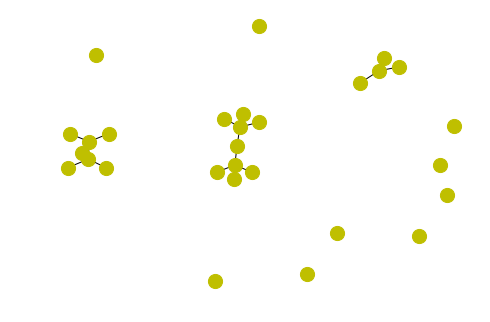

processing ID 59
Skeleton of carbon circles [[2516, 2517, 2518, 2519, 2520, 2510], [2505, 2506, 2507, 2508, 2504], [2511, 2512, 2513, 2514, 2515, 2509]]


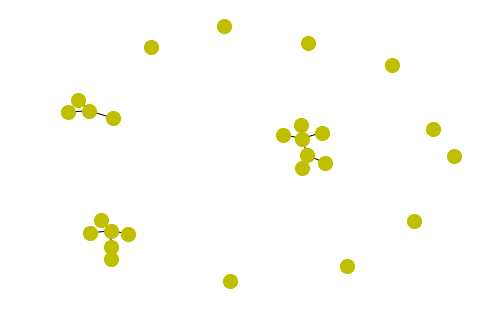

processing ID 60
Skeleton of carbon circles [[2559, 2553, 2563, 2562, 2561, 2560], [2548, 2549, 2550, 2551, 2547], [2554, 2555, 2556, 2557, 2558, 2552]]


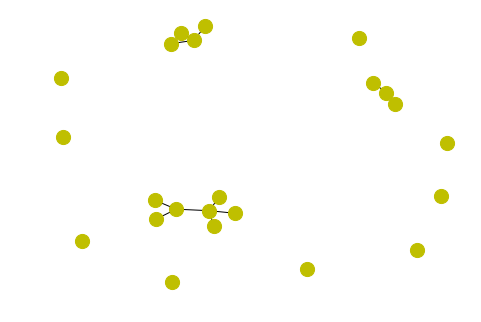

processing ID 61
Skeleton of carbon circles [[2599, 2600, 2601, 2602, 2603, 2593], [2588, 2589, 2590, 2591, 2587], [2594, 2595, 2596, 2597, 2598, 2592]]


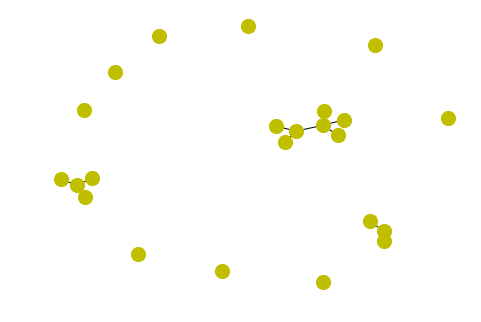

processing ID 62
Skeleton of carbon circles [[2639, 2640, 2641, 2642, 2643, 2633], [2628, 2629, 2630, 2631, 2627], [2634, 2635, 2636, 2637, 2638, 2632]]


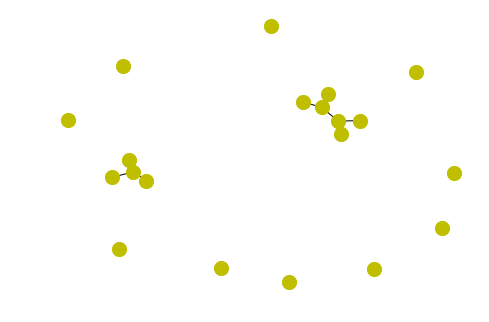

processing ID 63
Skeleton of carbon circles [[2672, 2671, 2669, 2675, 2674, 2673], [2664, 2668, 2667, 2666, 2665], [2676, 2677, 2678, 2679, 2680, 2670]]


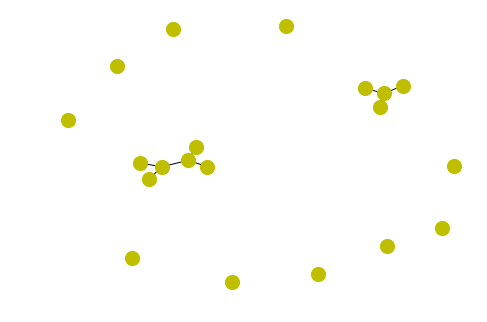

processing ID 64
Skeleton of carbon circles [[2713, 2714, 2715, 2716, 2717, 2707], [2702, 2703, 2704, 2705, 2701], [2708, 2709, 2710, 2711, 2712, 2706]]


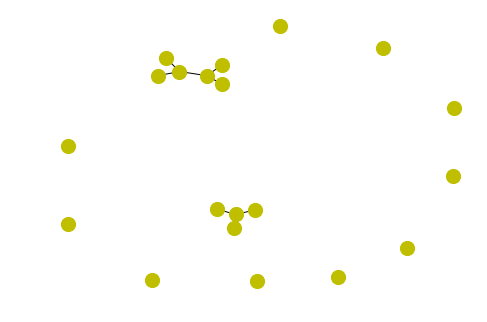

processing ID 65
Skeleton of carbon circles [[2750, 2751, 2752, 2753, 2754, 2744], [2739, 2740, 2741, 2742, 2738], [2745, 2746, 2747, 2748, 2749, 2743]]


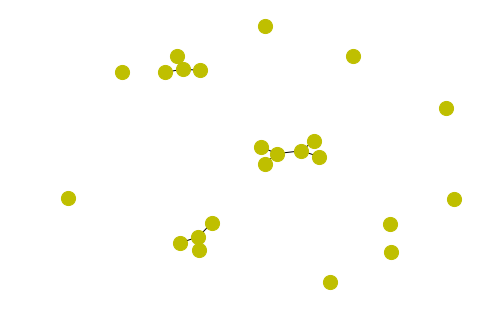

processing ID 66
Skeleton of carbon circles [[2790, 2791, 2792, 2793, 2794, 2784], [2779, 2780, 2781, 2782, 2778], [2785, 2786, 2787, 2788, 2789, 2783]]


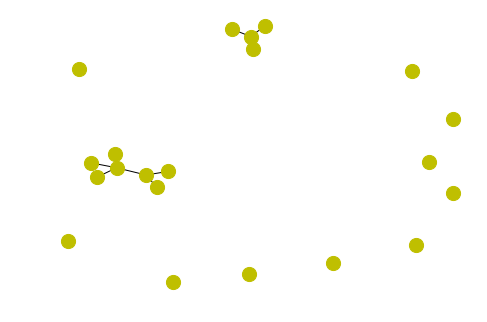

processing ID 67
Skeleton of carbon circles [[2828, 2829, 2830, 2831, 2832, 2822], [2817, 2818, 2819, 2820, 2816], [2823, 2824, 2825, 2826, 2827, 2821]]


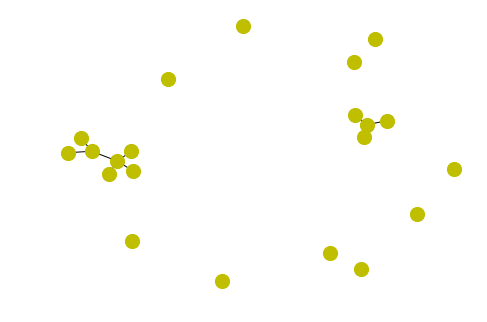

processing ID 68
Skeleton of carbon circles [[2866, 2867, 2868, 2869, 2870, 2860], [2855, 2856, 2857, 2858, 2854], [2861, 2862, 2863, 2864, 2865, 2859]]


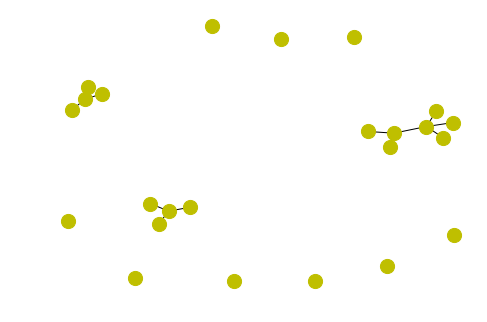

processing ID 69
Skeleton of carbon circles [[2907, 2908, 2909, 2910, 2911, 2901], [2896, 2897, 2898, 2899, 2895], [2902, 2903, 2904, 2905, 2906, 2900]]


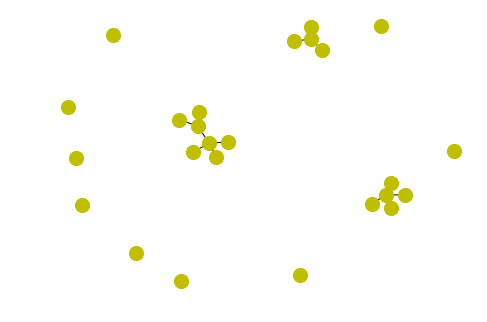

processing ID 70
Skeleton of carbon circles [[2942, 2948, 2947, 2946, 2945, 2944], [2937, 2941, 2940, 2939, 2938], [2949, 2950, 2951, 2952, 2953, 2943]]


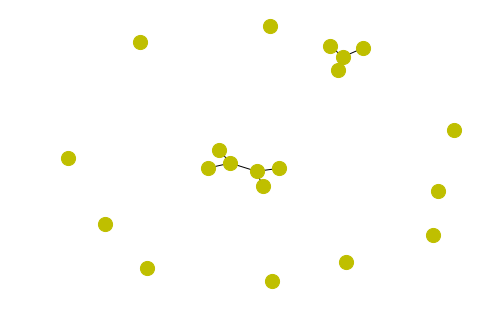

processing ID 71
Skeleton of carbon circles [[2986, 2987, 2988, 2989, 2990, 2980], [2975, 2976, 2977, 2978, 2974], [2981, 2982, 2983, 2984, 2985, 2979]]


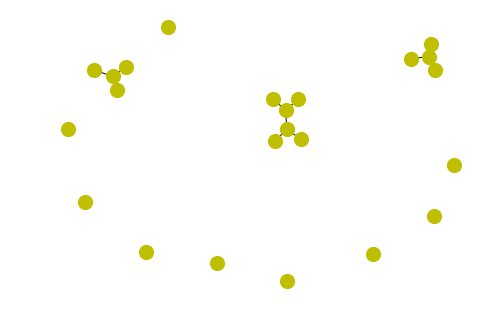

processing ID 72
Skeleton of carbon circles [[3026, 3027, 3028, 3029, 3030, 3020], [3015, 3016, 3017, 3018, 3014], [3021, 3022, 3023, 3024, 3025, 3019]]


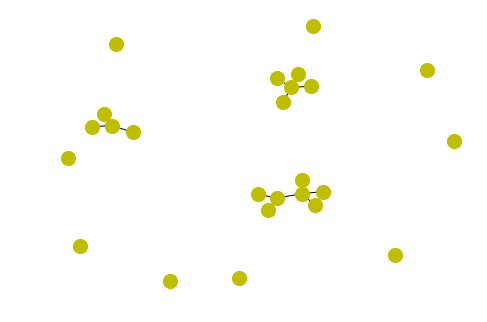

processing ID 73
Skeleton of carbon circles [[3062, 3068, 3069, 3070, 3071, 3072], [3057, 3058, 3059, 3060, 3056], [3063, 3064, 3065, 3066, 3067, 3061]]


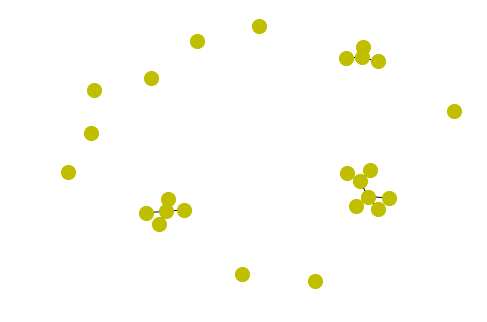

processing ID 74
Skeleton of carbon circles [[3110, 3111, 3112, 3113, 3114, 3104], [3099, 3100, 3101, 3102, 3098], [3105, 3106, 3107, 3108, 3109, 3103]]


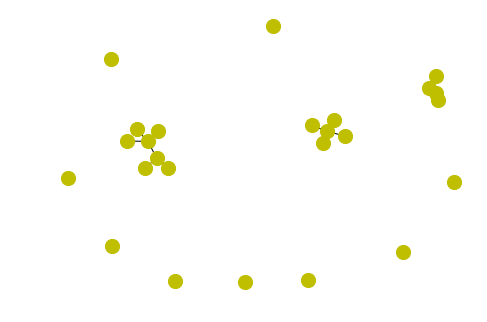

processing ID 75
Skeleton of carbon circles [[3152, 3153, 3154, 3155, 3156, 3146], [3141, 3142, 3143, 3144, 3140], [3147, 3148, 3149, 3150, 3151, 3145]]


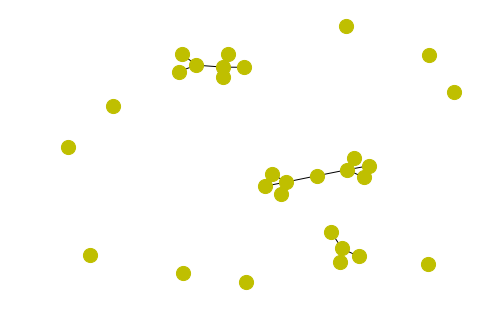

processing ID 76
Skeleton of carbon circles [[3199, 3198, 3192, 3202, 3201, 3200], [3187, 3188, 3189, 3190, 3186], [3193, 3194, 3195, 3196, 3197, 3191]]


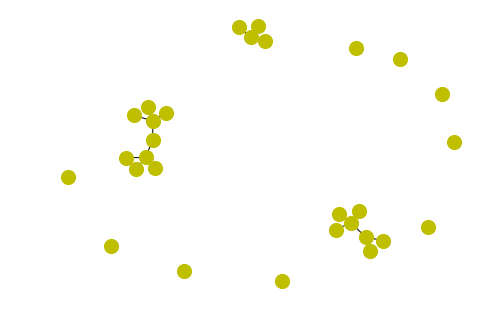

processing ID 77
Skeleton of carbon circles [[3244, 3245, 3246, 3247, 3248, 3238], [3233, 3234, 3235, 3236, 3232], [3239, 3240, 3241, 3242, 3243, 3237]]


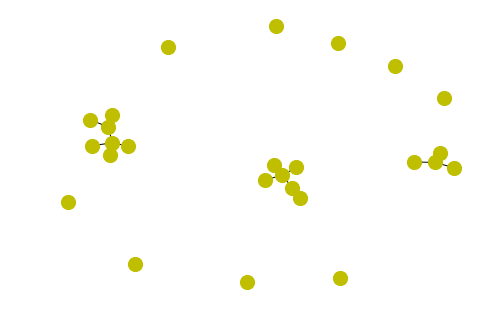

processing ID 78
Skeleton of carbon circles [[3287, 3288, 3289, 3290, 3291, 3281], [3276, 3277, 3278, 3279, 3275], [3282, 3283, 3284, 3285, 3286, 3280]]


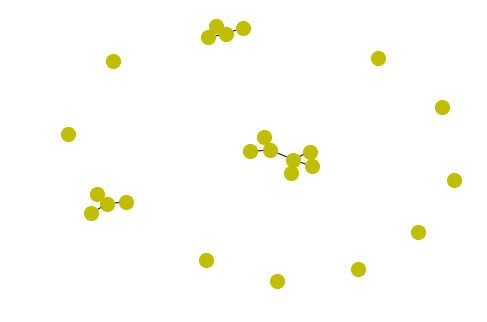

processing ID 79
Skeleton of carbon circles [[3322, 3332, 3331, 3330, 3329, 3328], [3317, 3318, 3319, 3320, 3316], [3323, 3324, 3325, 3326, 3327, 3321]]


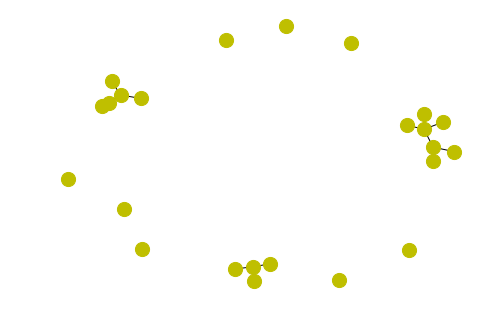

processing ID 80
Skeleton of carbon circles [[3369, 3370, 3371, 3372, 3373, 3363], [3358, 3359, 3360, 3361, 3357], [3364, 3365, 3366, 3367, 3368, 3362]]


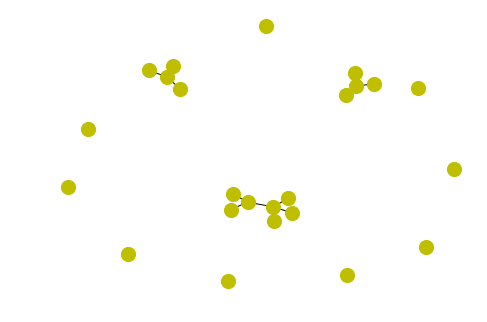

processing ID 81
Skeleton of carbon circles [[3410, 3411, 3412, 3413, 3414, 3404], [3399, 3400, 3401, 3402, 3398], [3405, 3406, 3407, 3408, 3409, 3403]]


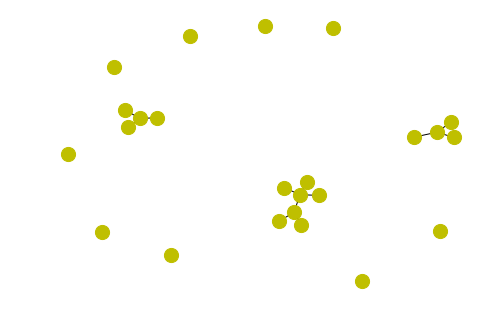

processing ID 82
Skeleton of carbon circles [[3451, 3452, 3453, 3454, 3455, 3445], [3441, 3440, 3439, 3443, 3442], [3446, 3447, 3448, 3449, 3450, 3444]]


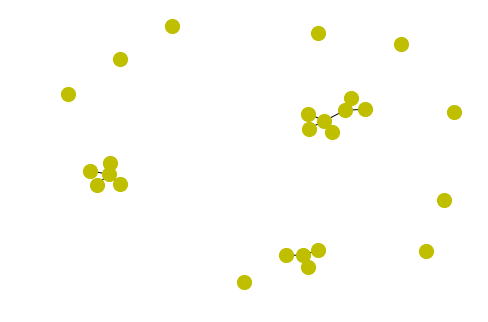

processing ID 83
Skeleton of carbon circles [[3493, 3494, 3495, 3496, 3497, 3487], [3482, 3483, 3484, 3485, 3481], [3488, 3489, 3490, 3491, 3492, 3486]]


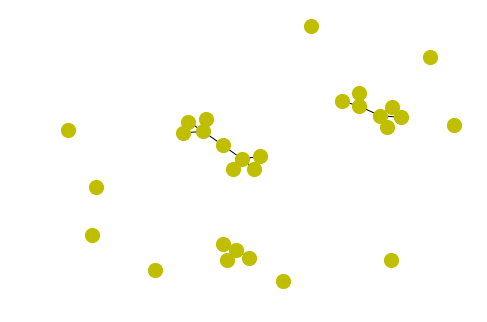

processing ID 84
Skeleton of carbon circles [[3540, 3553, 3554, 3552, 3541], [3539, 3540, 3541, 3542, 3543, 3533], [3528, 3529, 3530, 3531, 3527], [3534, 3535, 3536, 3537, 3538, 3532]]


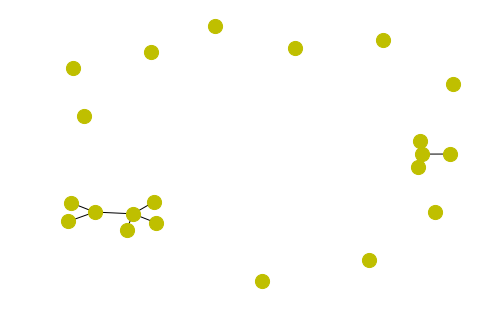

processing ID 85
Skeleton of carbon circles [[3574, 3580, 3581, 3582, 3583, 3584], [3569, 3570, 3571, 3572, 3568], [3575, 3576, 3577, 3578, 3579, 3573]]


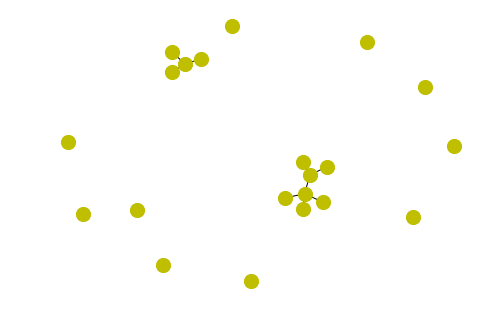

processing ID 86
Skeleton of carbon circles [[3618, 3619, 3620, 3621, 3622, 3612], [3607, 3608, 3609, 3610, 3606], [3613, 3614, 3615, 3616, 3617, 3611]]


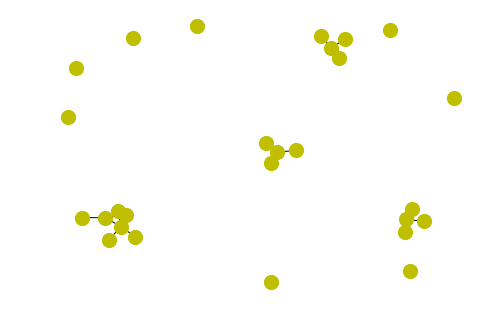

processing ID 87
Skeleton of carbon circles [[3662, 3663, 3664, 3665, 3666, 3656], [3651, 3652, 3653, 3654, 3650], [3657, 3658, 3659, 3660, 3661, 3655]]


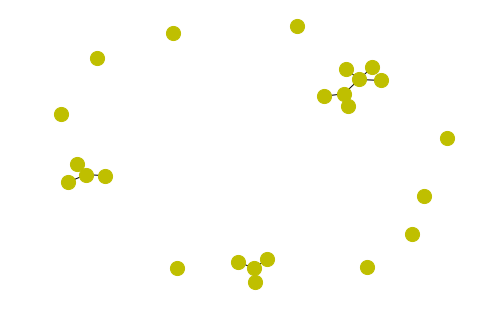

processing ID 88
Skeleton of carbon circles [[3699, 3698, 3696, 3702, 3701, 3700], [3691, 3695, 3694, 3693, 3692], [3703, 3704, 3705, 3706, 3707, 3697]]


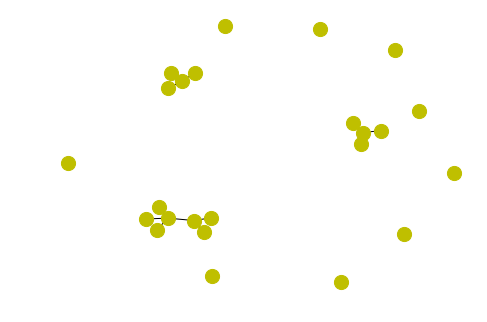

processing ID 89
Skeleton of carbon circles [[3744, 3745, 3746, 3747, 3748, 3738], [3733, 3734, 3735, 3736, 3732], [3739, 3740, 3741, 3742, 3743, 3737]]


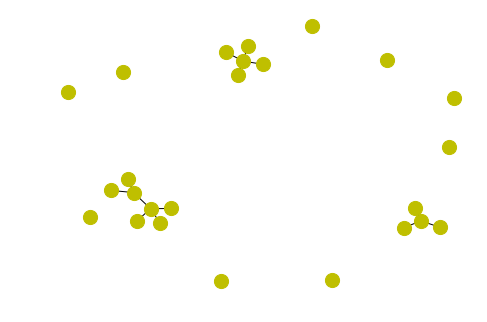

processing ID 90
Skeleton of carbon circles [[3786, 3787, 3788, 3789, 3790, 3780], [3775, 3776, 3777, 3778, 3774], [3781, 3782, 3783, 3784, 3785, 3779]]


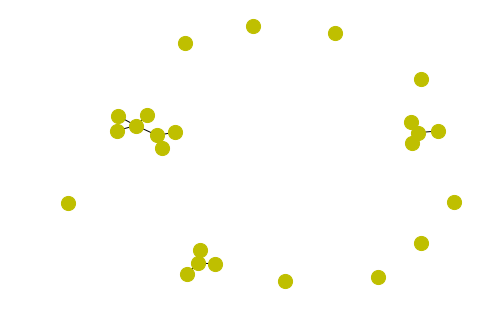

processing ID 91
Skeleton of carbon circles [[3829, 3828, 3827, 3821, 3831, 3830], [3816, 3817, 3818, 3819, 3815], [3822, 3823, 3824, 3825, 3826, 3820]]


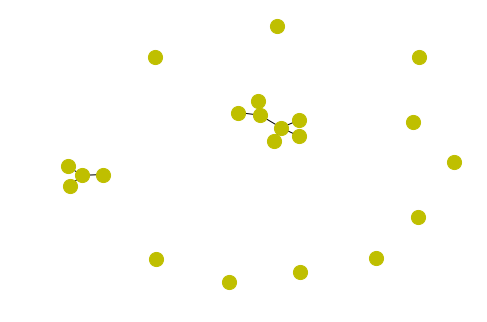

processing ID 92
Skeleton of carbon circles [[3865, 3866, 3867, 3868, 3869, 3859], [3854, 3855, 3856, 3857, 3853], [3860, 3861, 3862, 3863, 3864, 3858]]


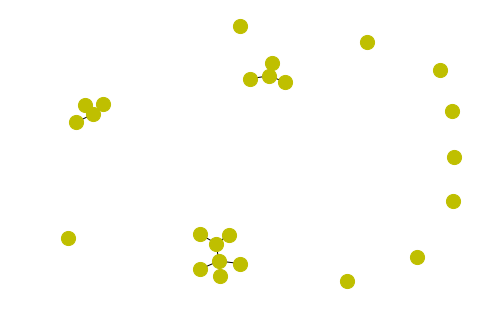

processing ID 93
Skeleton of carbon circles [[3906, 3907, 3908, 3909, 3910, 3900], [3895, 3896, 3897, 3898, 3894], [3901, 3902, 3903, 3904, 3905, 3899]]


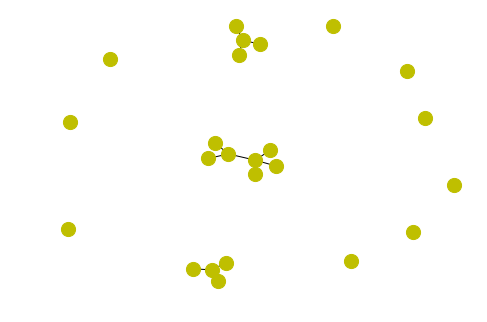

processing ID 94
Skeleton of carbon circles [[3941, 3951, 3950, 3949, 3948, 3947], [3936, 3937, 3938, 3939, 3935], [3942, 3943, 3944, 3945, 3946, 3940]]


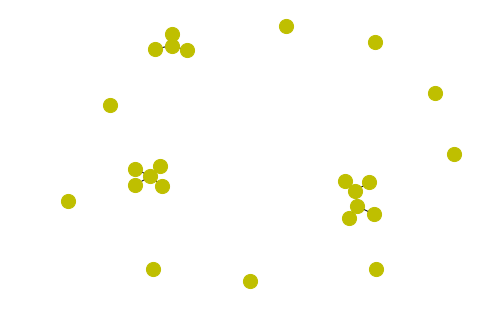

processing ID 95
Skeleton of carbon circles [[3988, 3989, 3990, 3991, 3992, 3982], [3977, 3978, 3979, 3980, 3976], [3983, 3984, 3985, 3986, 3987, 3981]]


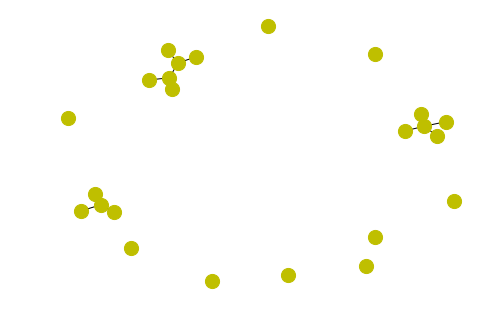

processing ID 96
Skeleton of carbon circles [[4029, 4030, 4031, 4032, 4033, 4023], [4018, 4019, 4020, 4021, 4017], [4024, 4025, 4026, 4027, 4028, 4022]]


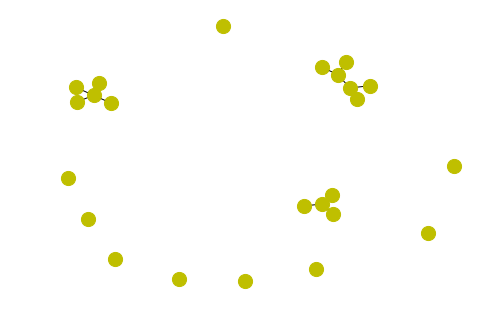

processing ID 97
Skeleton of carbon circles [[4071, 4070, 4064, 4074, 4073, 4072], [4059, 4060, 4061, 4062, 4058], [4065, 4066, 4067, 4068, 4069, 4063]]


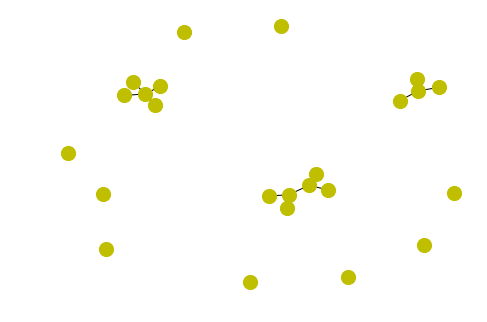

processing ID 98
Skeleton of carbon circles [[4111, 4112, 4113, 4114, 4115, 4105], [4100, 4101, 4102, 4103, 4099], [4106, 4107, 4108, 4109, 4110, 4104]]


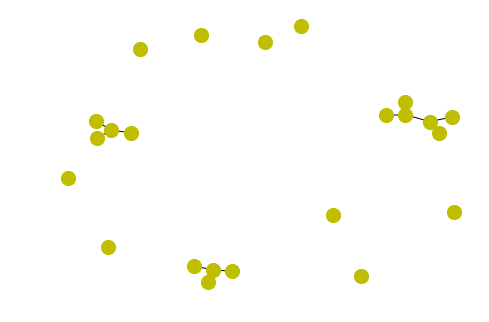

processing ID 99
Skeleton of carbon circles [[4151, 4152, 4153, 4154, 4155, 4145], [4140, 4141, 4142, 4143, 4139], [4146, 4147, 4148, 4149, 4150, 4144]]


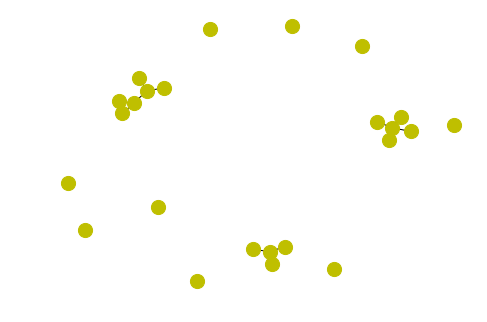

processing ID 100
Skeleton of carbon circles [[4192, 4193, 4194, 4195, 4196, 4186], [4181, 4182, 4183, 4184, 4180], [4187, 4188, 4189, 4190, 4191, 4185]]


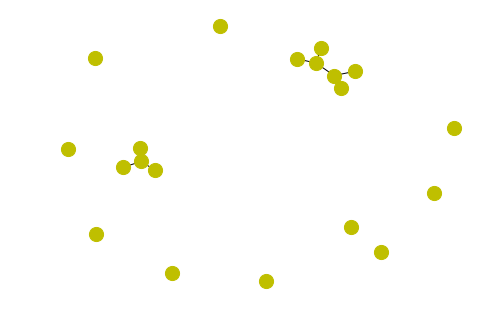

processing ID 101
Skeleton of carbon circles [[4222, 4228, 4227, 4226, 4225, 4224], [4217, 4221, 4220, 4219, 4218], [4229, 4230, 4231, 4232, 4233, 4223]]


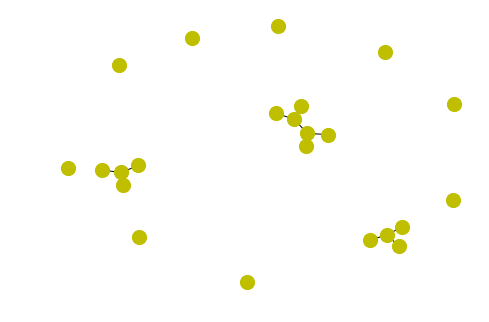

processing ID 102
Skeleton of carbon circles [[4269, 4270, 4271, 4272, 4273, 4263], [4258, 4259, 4260, 4261, 4257], [4264, 4265, 4266, 4267, 4268, 4262]]


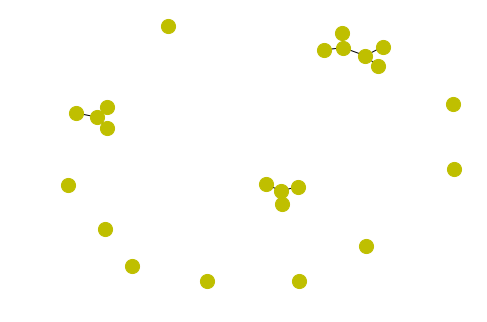

processing ID 103
Skeleton of carbon circles [[4309, 4310, 4311, 4312, 4313, 4303], [4298, 4299, 4300, 4301, 4297], [4304, 4305, 4306, 4307, 4308, 4302]]


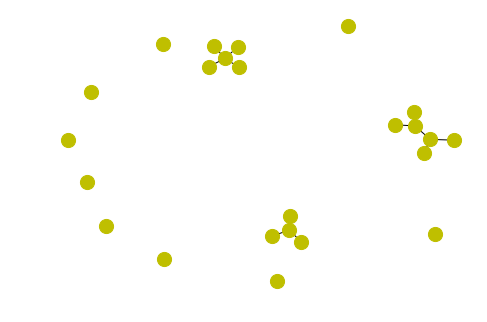

processing ID 104
Skeleton of carbon circles [[4351, 4350, 4344, 4354, 4353, 4352], [4339, 4340, 4341, 4342, 4338], [4345, 4346, 4347, 4348, 4349, 4343]]


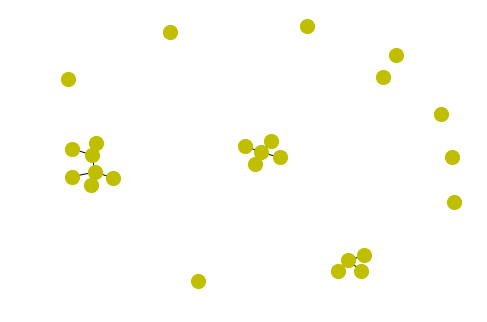

processing ID 105
Skeleton of carbon circles [[4392, 4393, 4394, 4395, 4396, 4386], [4381, 4382, 4383, 4384, 4380], [4387, 4388, 4389, 4390, 4391, 4385]]


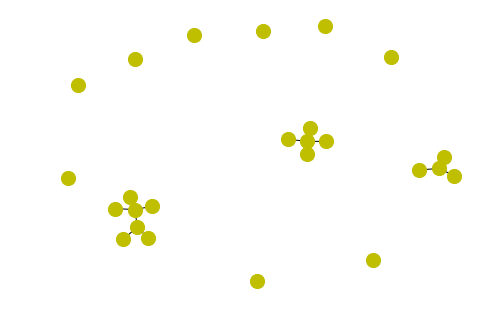

processing ID 106
Skeleton of carbon circles [[4434, 4435, 4436, 4437, 4438, 4428], [4423, 4424, 4425, 4426, 4422], [4429, 4430, 4431, 4432, 4433, 4427]]


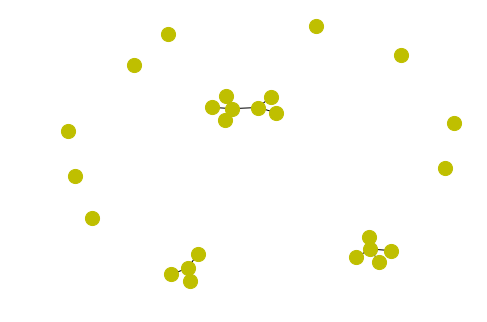

processing ID 107
Skeleton of carbon circles [[4470, 4476, 4477, 4478, 4479, 4480], [4465, 4466, 4467, 4468, 4464], [4471, 4472, 4473, 4474, 4475, 4469]]


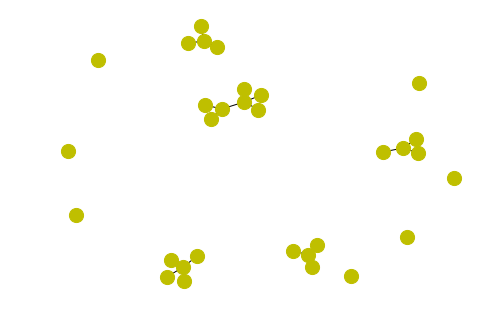

processing ID 108
Skeleton of carbon circles [[4524, 4525, 4526, 4527, 4528, 4518], [4513, 4514, 4515, 4516, 4512], [4519, 4520, 4521, 4522, 4523, 4517]]


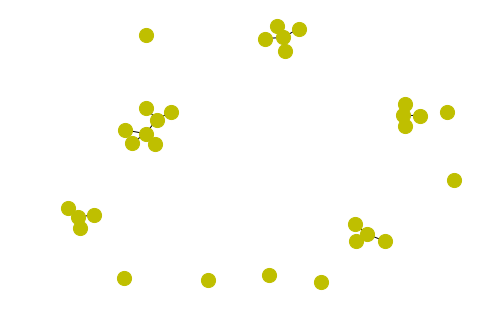

processing ID 109
Skeleton of carbon circles [[4572, 4573, 4574, 4575, 4576, 4566], [4561, 4562, 4563, 4564, 4560], [4567, 4568, 4569, 4570, 4571, 4565]]


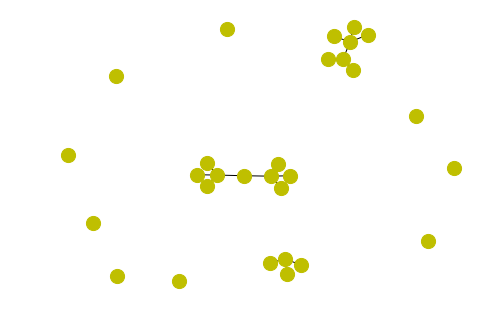

processing ID 110
Skeleton of carbon circles [[4607, 4606, 4610, 4609, 4608], [4618, 4619, 4620, 4621, 4622, 4612], [4613, 4614, 4615, 4616, 4617, 4611]]


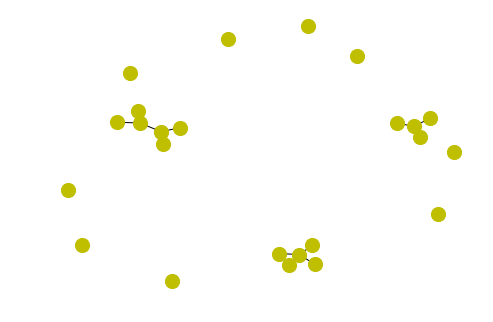

processing ID 111
Skeleton of carbon circles [[4659, 4660, 4661, 4662, 4663, 4653], [4648, 4649, 4650, 4651, 4647], [4654, 4655, 4656, 4657, 4658, 4652]]


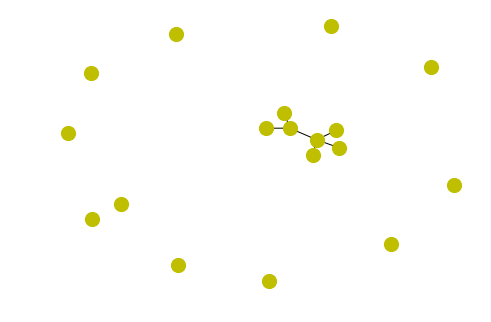

processing ID 112
Skeleton of carbon circles [[4694, 4695, 4696, 4697, 4698, 4688], [4683, 4684, 4685, 4686, 4682], [4689, 4690, 4691, 4692, 4693, 4687]]


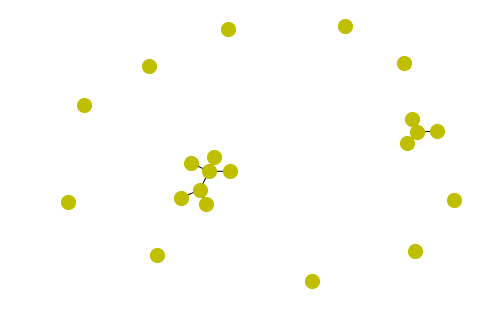

processing ID 113
Skeleton of carbon circles [[4726, 4732, 4733, 4734, 4735, 4736], [4721, 4722, 4723, 4724, 4720], [4727, 4728, 4729, 4730, 4731, 4725]]


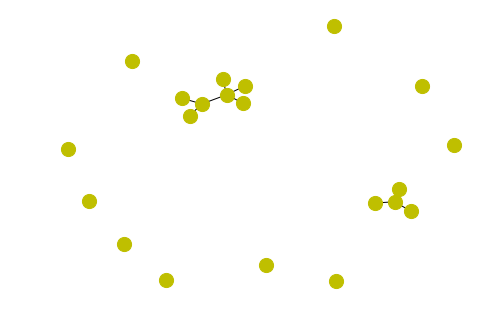

processing ID 114
Skeleton of carbon circles [[4770, 4771, 4772, 4773, 4774, 4764], [4759, 4760, 4761, 4762, 4758], [4765, 4766, 4767, 4768, 4769, 4763]]


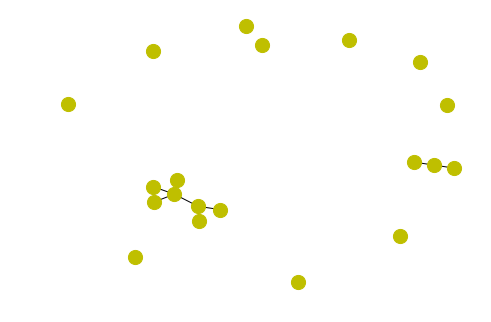

processing ID 115
Skeleton of carbon circles [[4807, 4808, 4809, 4810, 4811, 4801], [4796, 4797, 4798, 4799, 4795], [4802, 4803, 4804, 4805, 4806, 4800]]


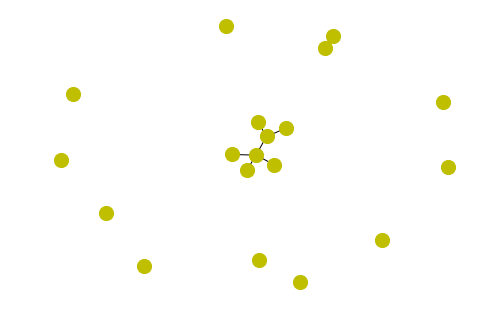

processing ID 116
Skeleton of carbon circles [[4843, 4837, 4847, 4846, 4845, 4844], [4832, 4833, 4834, 4835, 4831], [4838, 4839, 4840, 4841, 4842, 4836]]


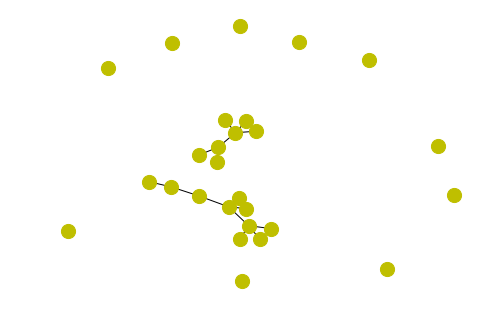

processing ID 117
Skeleton of carbon circles [[4887, 4888, 4889, 4890, 4891, 4881], [4876, 4877, 4878, 4879, 4875], [4882, 4883, 4884, 4885, 4886, 4880]]


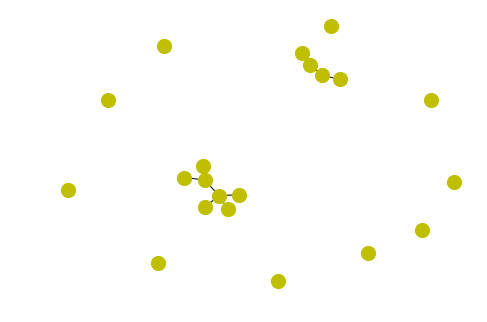

processing ID 118
Skeleton of carbon circles [[4925, 4926, 4927, 4928, 4929, 4919], [4914, 4915, 4916, 4917, 4913], [4920, 4921, 4922, 4923, 4924, 4918]]


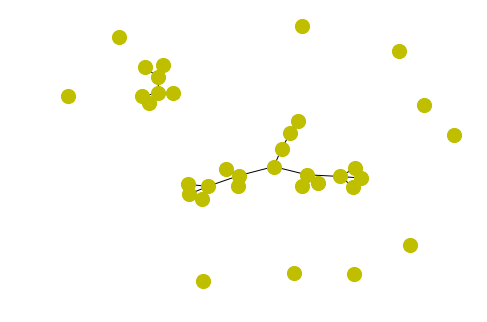

processing ID 119
Skeleton of carbon circles [[4974, 4973, 4972, 4970, 4976, 4975], [4965, 4969, 4968, 4967, 4966], [4977, 4978, 4979, 4980, 4981, 4971]]


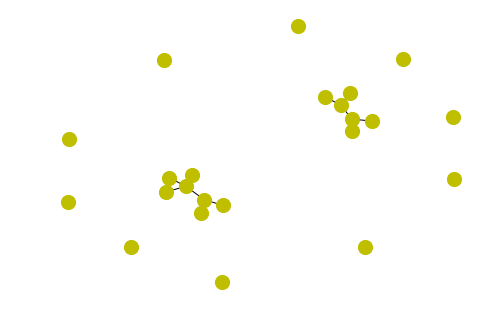

processing ID 120
Skeleton of carbon circles [[5017, 5018, 5019, 5020, 5021, 5011], [5028, 5029, 5030, 5031, 5032, 5027], [5006, 5007, 5008, 5009, 5005], [5012, 5013, 5014, 5015, 5016, 5010]]


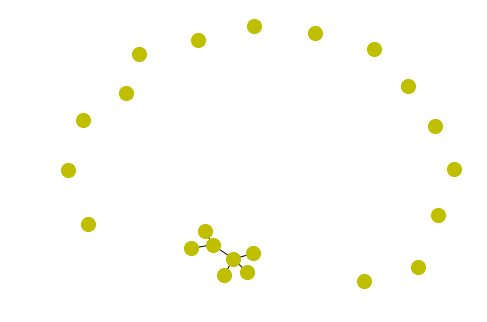

processing ID 121
Skeleton of carbon circles [[5062, 5063, 5064, 5065, 5066, 5056], [5075, 5076, 5077, 5078, 5079, 5074], [5051, 5052, 5053, 5054, 5050], [5057, 5058, 5059, 5060, 5061, 5055]]


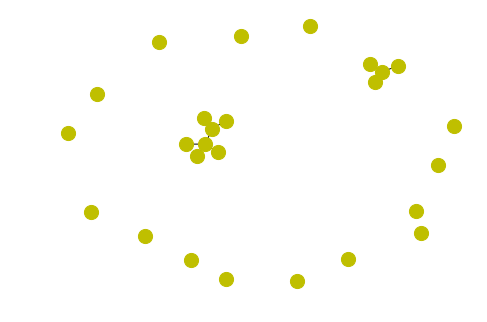

processing ID 122
Skeleton of carbon circles [[5112, 5111, 5105, 5115, 5114, 5113], [5124, 5125, 5126, 5127, 5128, 5123], [5100, 5101, 5102, 5103, 5099], [5106, 5107, 5108, 5109, 5110, 5104]]


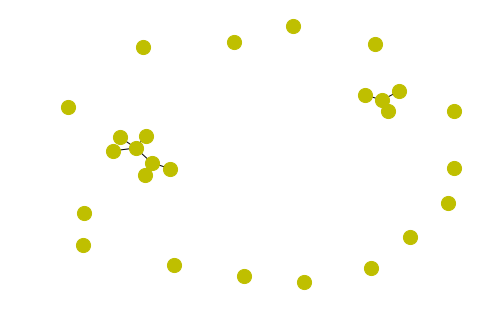

processing ID 123
Skeleton of carbon circles [[5160, 5161, 5162, 5163, 5164, 5154], [5149, 5150, 5151, 5152, 5148], [5155, 5156, 5157, 5158, 5159, 5153]]


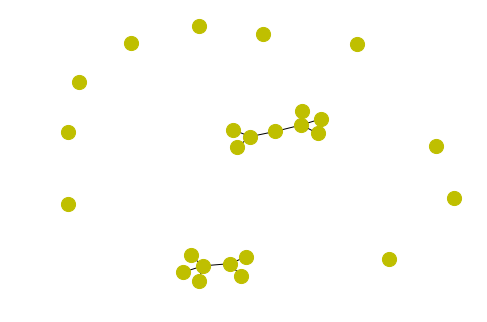

processing ID 124
Skeleton of carbon circles [[5202, 5203, 5204, 5205, 5206, 5196], [5191, 5192, 5193, 5194, 5190], [5197, 5198, 5199, 5200, 5201, 5195]]


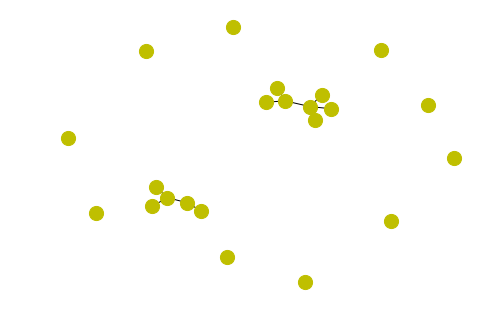

processing ID 125
Skeleton of carbon circles [[5237, 5236, 5234, 5240, 5239, 5238], [5229, 5233, 5232, 5231, 5230], [5241, 5242, 5243, 5244, 5245, 5235]]


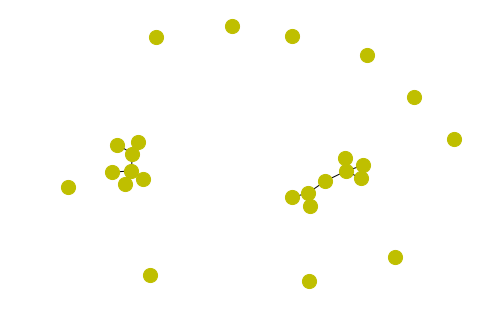

processing ID 126
Skeleton of carbon circles [[5283, 5284, 5285, 5286, 5287, 5277], [5272, 5273, 5274, 5275, 5271], [5278, 5279, 5280, 5281, 5282, 5276]]


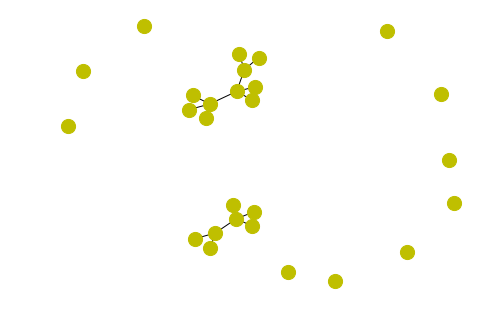

processing ID 127
Skeleton of carbon circles [[5327, 5328, 5329, 5330, 5331, 5321], [5316, 5317, 5318, 5319, 5315], [5322, 5323, 5324, 5325, 5326, 5320]]


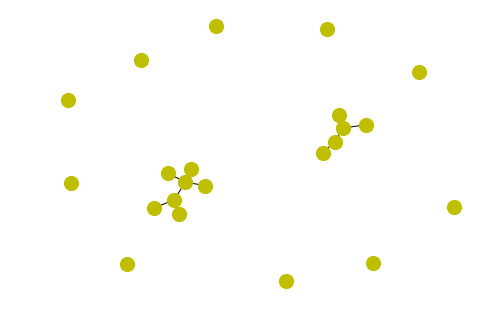

processing ID 128
Skeleton of carbon circles [[5366, 5367, 5368, 5369, 5370, 5360], [5356, 5355, 5354, 5358, 5357], [5361, 5362, 5363, 5364, 5365, 5359]]


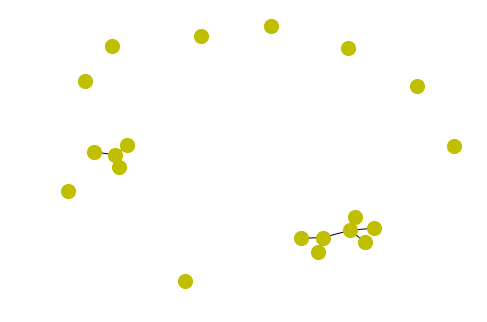

processing ID 129
Skeleton of carbon circles [[5403, 5404, 5405, 5406, 5407, 5397], [5392, 5393, 5394, 5395, 5391], [5398, 5399, 5400, 5401, 5402, 5396]]


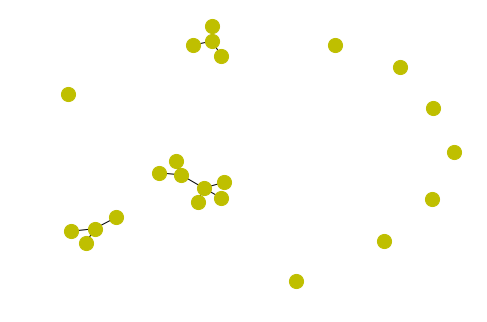

processing ID 130
Skeleton of carbon circles [[5443, 5444, 5445, 5446, 5447, 5437], [5432, 5433, 5434, 5435, 5431], [5438, 5439, 5440, 5441, 5442, 5436]]


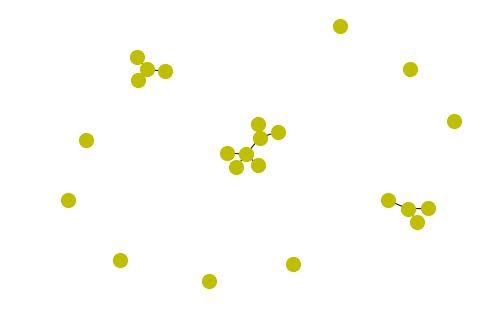

processing ID 131
Skeleton of carbon circles [[5477, 5483, 5484, 5485, 5486, 5487], [5472, 5473, 5474, 5475, 5471], [5478, 5479, 5480, 5481, 5482, 5476]]


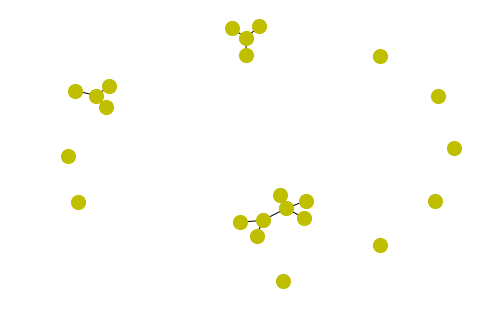

processing ID 132
Skeleton of carbon circles [[5523, 5524, 5525, 5526, 5527, 5517], [5512, 5513, 5514, 5515, 5511], [5518, 5519, 5520, 5521, 5522, 5516]]


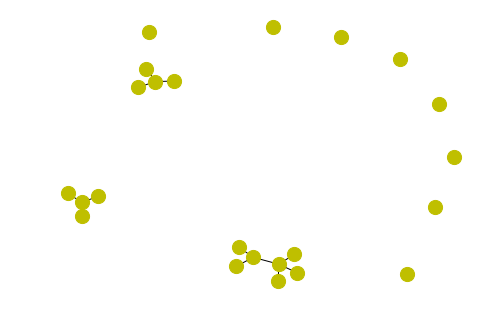

processing ID 133
Skeleton of carbon circles [[5563, 5564, 5565, 5566, 5567, 5557], [5552, 5553, 5554, 5555, 5551], [5558, 5559, 5560, 5561, 5562, 5556]]


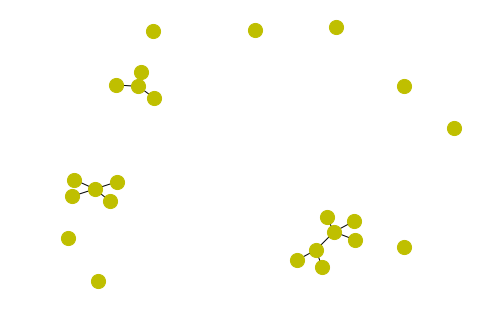

processing ID 134
Skeleton of carbon circles [[5604, 5598, 5608, 5607, 5606, 5605], [5593, 5594, 5595, 5596, 5592], [5599, 5600, 5601, 5602, 5603, 5597]]


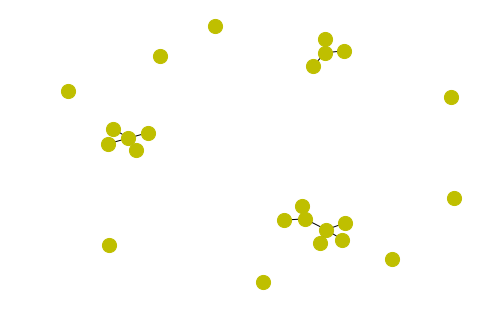

processing ID 135
Skeleton of carbon circles [[5645, 5646, 5647, 5648, 5649, 5639], [5634, 5635, 5636, 5637, 5633], [5640, 5641, 5642, 5643, 5644, 5638]]


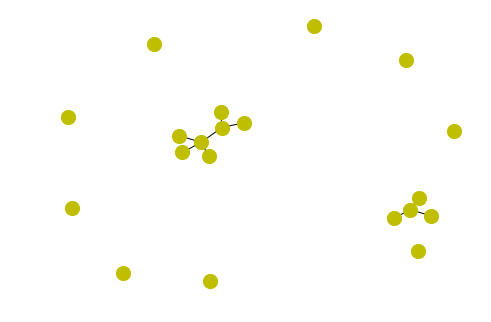

processing ID 136
Skeleton of carbon circles [[5682, 5683, 5684, 5685, 5686, 5676], [5671, 5672, 5673, 5674, 5670], [5677, 5678, 5679, 5680, 5681, 5675]]


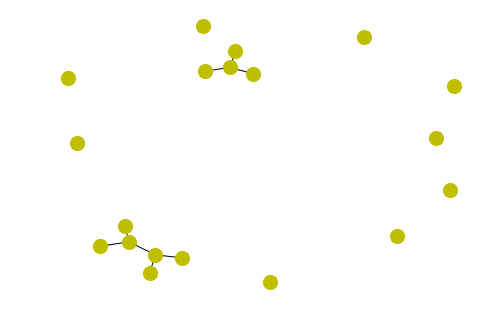

processing ID 137
Skeleton of carbon circles [[5718, 5719, 5720, 5721, 5722, 5712], [5707, 5708, 5709, 5710, 5706], [5713, 5714, 5715, 5716, 5717, 5711]]


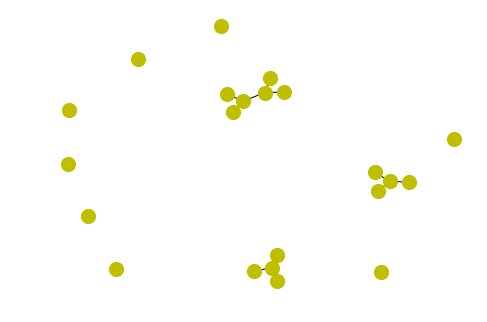

processing ID 138
Skeleton of carbon circles [[5759, 5758, 5757, 5751, 5761, 5760], [5746, 5747, 5748, 5749, 5745], [5752, 5753, 5754, 5755, 5756, 5750]]


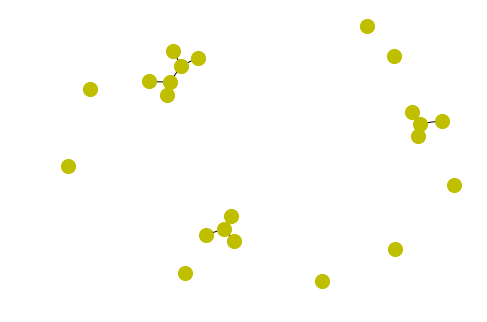

processing ID 139
Skeleton of carbon circles [[5796, 5797, 5798, 5799, 5800, 5790], [5785, 5786, 5787, 5788, 5784], [5791, 5792, 5793, 5794, 5795, 5789]]


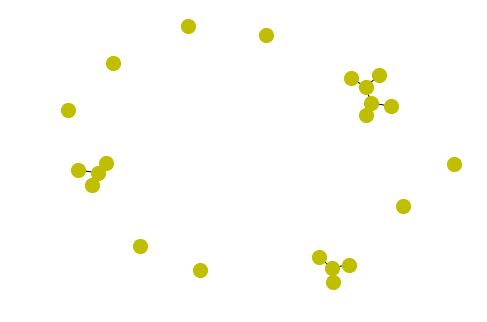

processing ID 140
Skeleton of carbon circles [[5835, 5836, 5837, 5838, 5839, 5829], [5824, 5825, 5826, 5827, 5823], [5830, 5831, 5832, 5833, 5834, 5828]]


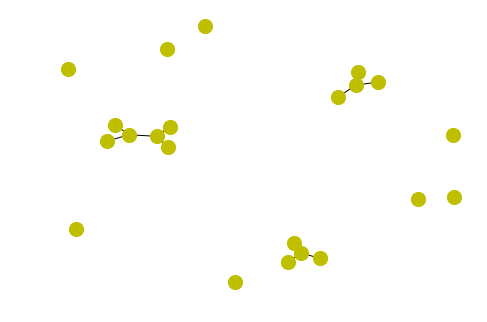

processing ID 141
Skeleton of carbon circles [[5874, 5868, 5878, 5877, 5876, 5875], [5863, 5864, 5865, 5866, 5862], [5869, 5870, 5871, 5872, 5873, 5867]]


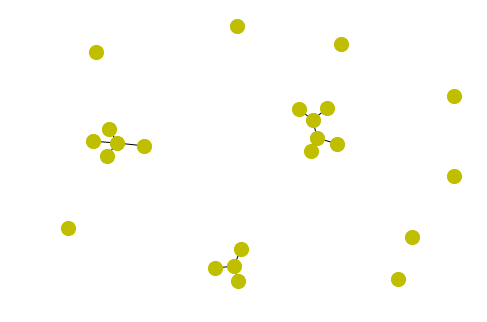

processing ID 142
Skeleton of carbon circles [[5914, 5915, 5916, 5917, 5918, 5908], [5903, 5904, 5905, 5906, 5902], [5909, 5910, 5911, 5912, 5913, 5907]]


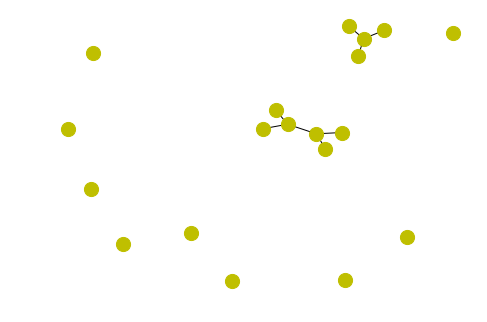

processing ID 143
Skeleton of carbon circles [[5950, 5951, 5952, 5953, 5954, 5944], [5939, 5940, 5941, 5942, 5938], [5945, 5946, 5947, 5948, 5949, 5943]]


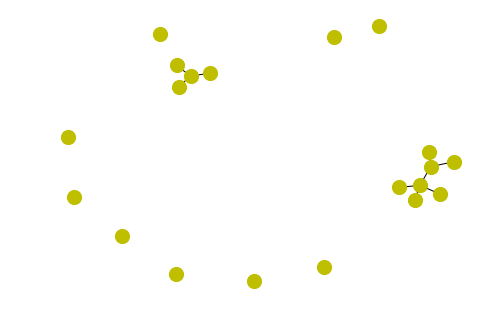

processing ID 144
Skeleton of carbon circles [[5987, 5988, 5989, 5990, 5991, 5981], [5976, 5977, 5978, 5979, 5975], [5982, 5983, 5984, 5985, 5986, 5980]]


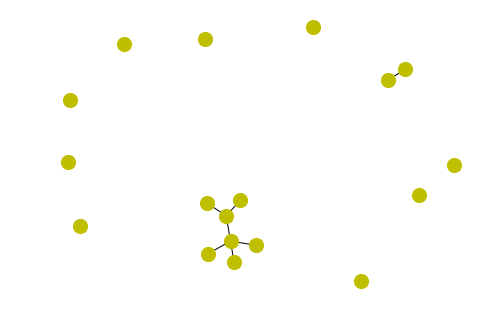

processing ID 145
Skeleton of carbon circles [[6022, 6023, 6024, 6025, 6026, 6016], [6011, 6012, 6013, 6014, 6010], [6017, 6018, 6019, 6020, 6021, 6015]]


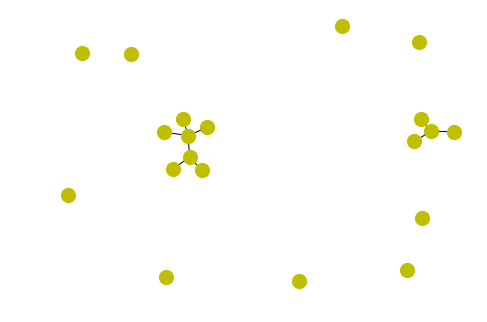

processing ID 146
Skeleton of carbon circles [[6059, 6060, 6061, 6062, 6063, 6053], [6048, 6049, 6050, 6051, 6047], [6054, 6055, 6056, 6057, 6058, 6052]]


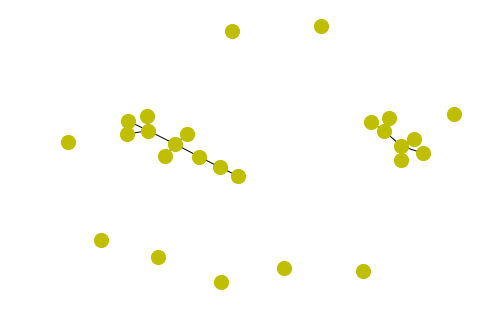

processing ID 147
Skeleton of carbon circles [[6102, 6103, 6104, 6105, 6106, 6096], [6091, 6092, 6093, 6094, 6090], [6097, 6098, 6099, 6100, 6101, 6095]]


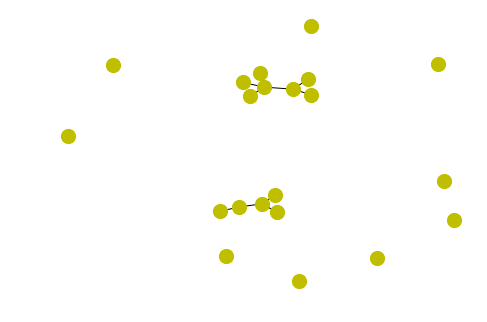

processing ID 148
Skeleton of carbon circles [[6134, 6140, 6141, 6142, 6143, 6144], [6129, 6130, 6131, 6132, 6128], [6135, 6136, 6137, 6138, 6139, 6133]]


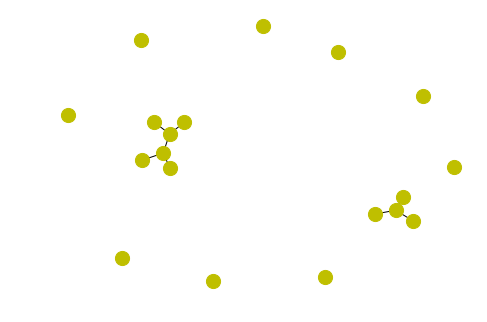

processing ID 149
Skeleton of carbon circles [[6176, 6177, 6178, 6179, 6180, 6170], [6165, 6166, 6167, 6168, 6164], [6171, 6172, 6173, 6174, 6175, 6169]]


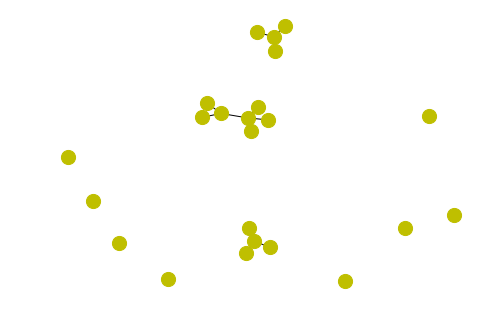

processing ID 150
Skeleton of carbon circles [[6216, 6217, 6218, 6219, 6220, 6210], [6205, 6206, 6207, 6208, 6204], [6211, 6212, 6213, 6214, 6215, 6209]]


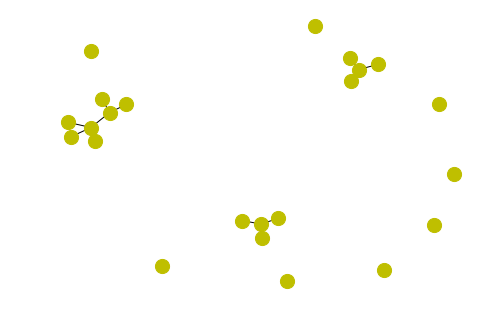

processing ID 151
Skeleton of carbon circles [[6251, 6249, 6255, 6254, 6253, 6252], [6244, 6248, 6247, 6246, 6245], [6256, 6257, 6258, 6259, 6260, 6250]]


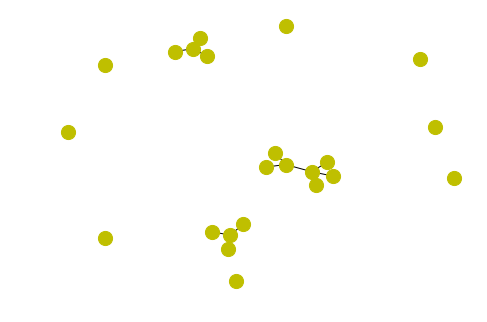

processing ID 152
Skeleton of carbon circles [[6296, 6297, 6298, 6299, 6300, 6290], [6285, 6286, 6287, 6288, 6284], [6291, 6292, 6293, 6294, 6295, 6289]]


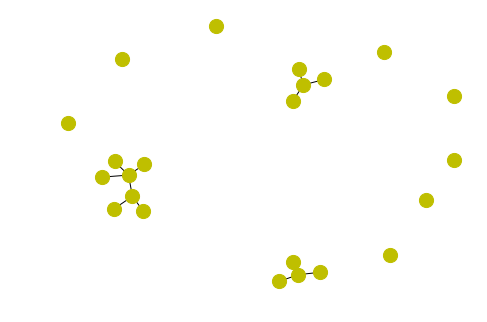

processing ID 153
Skeleton of carbon circles [[6336, 6337, 6338, 6339, 6340, 6330], [6325, 6326, 6327, 6328, 6324], [6331, 6332, 6333, 6334, 6335, 6329]]


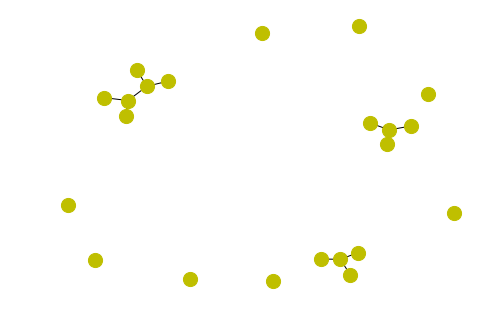

processing ID 154
Skeleton of carbon circles [[6376, 6375, 6369, 6379, 6378, 6377], [6364, 6365, 6366, 6367, 6363], [6370, 6371, 6372, 6373, 6374, 6368]]


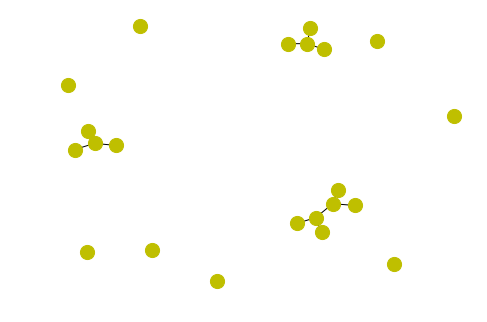

processing ID 155
Skeleton of carbon circles [[6414, 6415, 6416, 6417, 6418, 6408], [6403, 6404, 6405, 6406, 6402], [6409, 6410, 6411, 6412, 6413, 6407]]


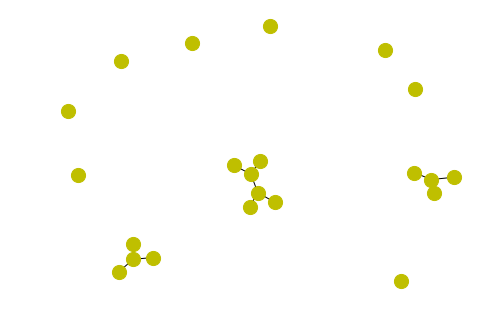

processing ID 156
Skeleton of carbon circles [[6453, 6454, 6455, 6456, 6457, 6447], [6442, 6443, 6444, 6445, 6441], [6448, 6449, 6450, 6451, 6452, 6446]]


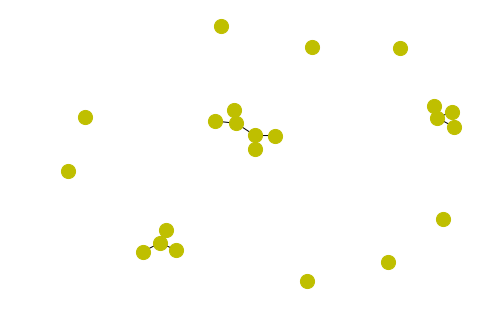

processing ID 157
Skeleton of carbon circles [[6493, 6497, 6498, 6499, 6500, 6494], [6492, 6493, 6494, 6495, 6496, 6486], [6481, 6482, 6483, 6484, 6480], [6487, 6488, 6489, 6490, 6491, 6485]]


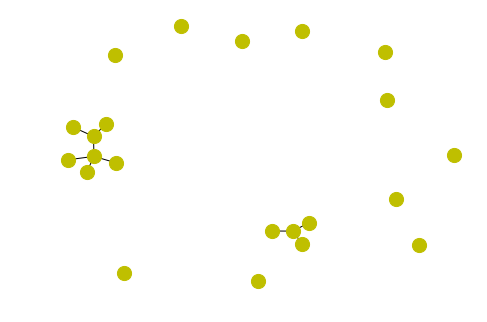

processing ID 158
Skeleton of carbon circles [[6530, 6531, 6532, 6533, 6534, 6528], [6523, 6527, 6526, 6525, 6524], [6535, 6536, 6537, 6538, 6539, 6529], [6535, 6548, 6549, 6550, 6551, 6536]]


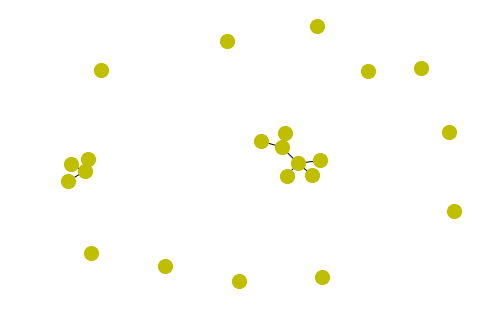

processing ID 159
Skeleton of carbon circles [[6579, 6591, 6592, 6593, 6594, 6580], [6578, 6579, 6580, 6581, 6582, 6572], [6567, 6568, 6569, 6570, 6566], [6573, 6574, 6575, 6576, 6577, 6571]]


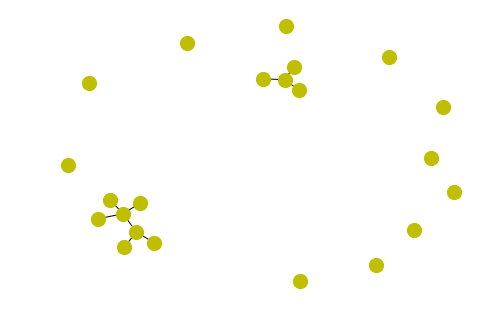

processing ID 160
Skeleton of carbon circles [[6629, 6630, 6631, 6632, 6615], [6629, 6633, 6634, 6635, 6636, 6630], [6610, 6611, 6612, 6613, 6609], [6616, 6617, 6618, 6619, 6620, 6614]]


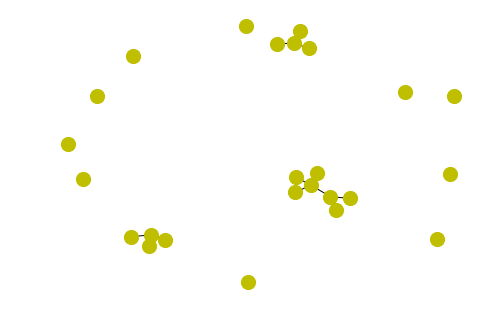

processing ID 161
Skeleton of carbon circles [[6655, 6654, 6658, 6657, 6656], [6675, 6679, 6680, 6681, 6676], [6674, 6675, 6676, 6677, 6678, 6660], [6661, 6662, 6663, 6664, 6665, 6659]]


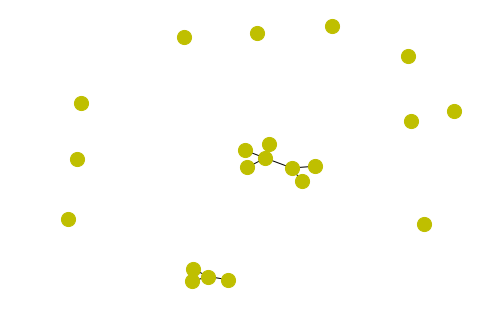

processing ID 162
Skeleton of carbon circles [[6718, 6720, 6721, 6722, 6719], [6715, 6716, 6717, 6718, 6719, 6701], [6696, 6697, 6698, 6699, 6695], [6702, 6703, 6704, 6705, 6706, 6700]]


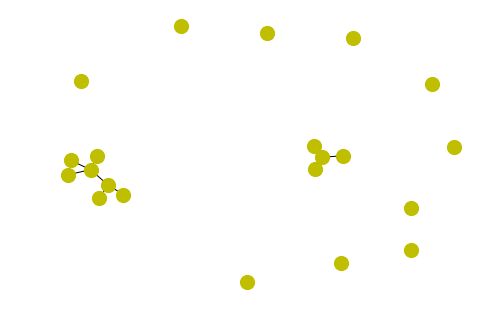

processing ID 163
Skeleton of carbon circles [[6756, 6757, 6758, 6759, 6742], [6737, 6738, 6739, 6740, 6736], [6743, 6744, 6745, 6746, 6747, 6741]]


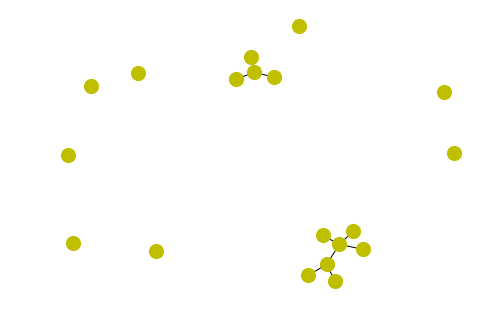

processing ID 164
Skeleton of carbon circles [[6791, 6792, 6793, 6794, 6777], [6773, 6772, 6771, 6775, 6774], [6778, 6779, 6780, 6781, 6782, 6776]]


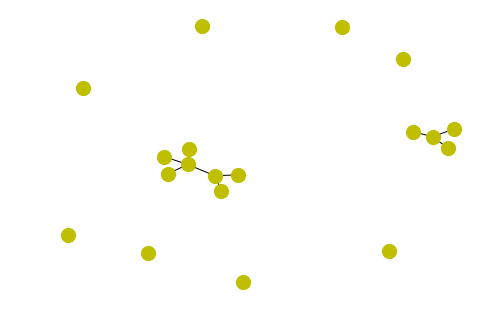

processing ID 165
Skeleton of carbon circles [[6826, 6827, 6828, 6829, 6812], [6807, 6808, 6809, 6810, 6806], [6813, 6814, 6815, 6816, 6817, 6811]]


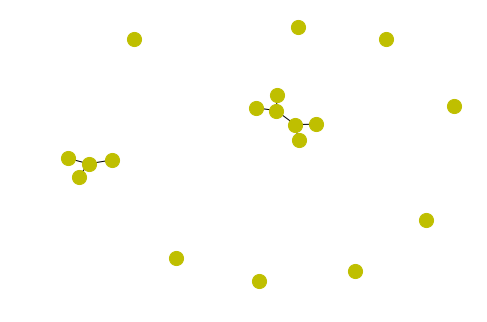

processing ID 166
Skeleton of carbon circles [[6860, 6861, 6862, 6863, 6846], [6841, 6842, 6843, 6844, 6840], [6847, 6848, 6849, 6850, 6851, 6845]]


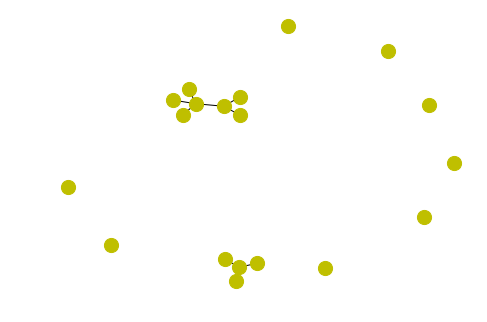

processing ID 167
Skeleton of carbon circles [[6881, 6898, 6897, 6896, 6895], [6876, 6877, 6878, 6879, 6875], [6882, 6883, 6884, 6885, 6886, 6880]]


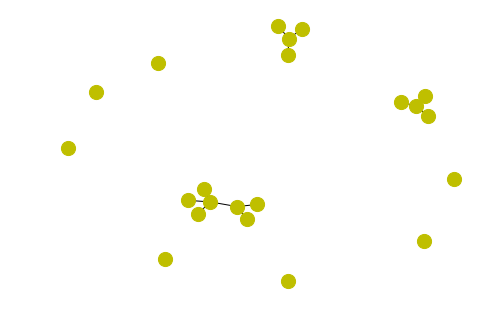

processing ID 168
Skeleton of carbon circles [[6933, 6934, 6935, 6936, 6919], [6914, 6915, 6916, 6917, 6913], [6920, 6921, 6922, 6923, 6924, 6918]]


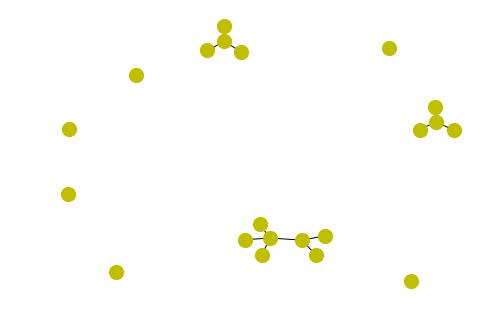

processing ID 169
Skeleton of carbon circles [[6970, 6971, 6972, 6973, 6956], [6951, 6952, 6953, 6954, 6950], [6957, 6958, 6959, 6960, 6961, 6955]]


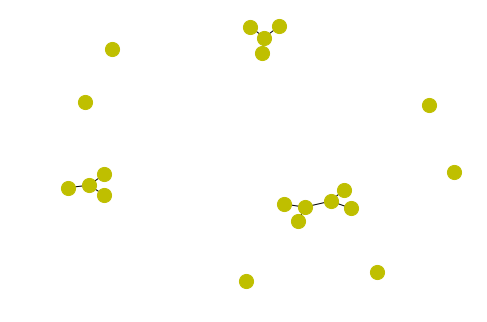

processing ID 170
Skeleton of carbon circles [[7006, 7007, 7008, 7009, 6992], [6987, 6988, 6989, 6990, 6986], [6993, 6994, 6995, 6996, 6997, 6991]]


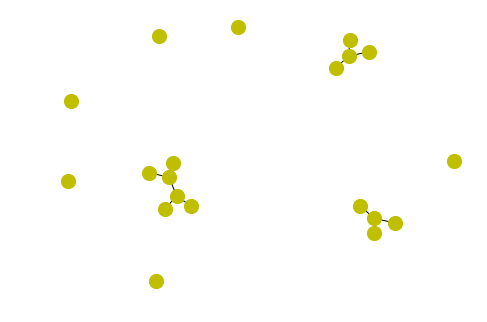

processing ID 171
Skeleton of carbon circles [[7030, 7029, 7027, 7033, 7032, 7031], [7022, 7026, 7025, 7024, 7023], [7042, 7043, 7044, 7045, 7028]]


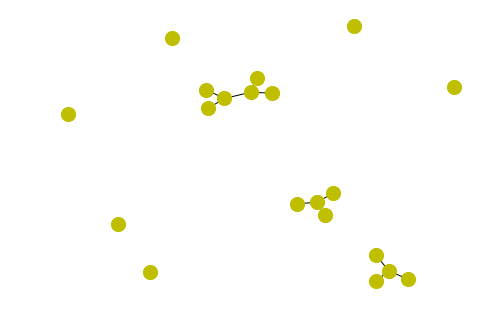

processing ID 172
Skeleton of carbon circles [[7078, 7079, 7080, 7081, 7064], [7059, 7060, 7061, 7062, 7058], [7065, 7066, 7067, 7068, 7069, 7063]]


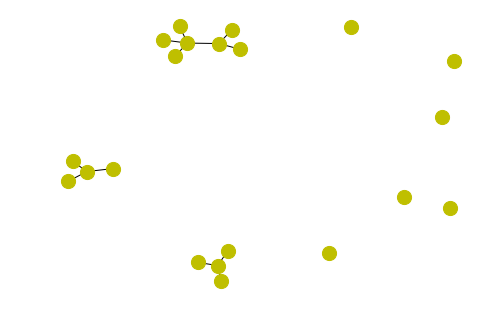

processing ID 173
Skeleton of carbon circles [[7115, 7116, 7117, 7118, 7101], [7096, 7097, 7098, 7099, 7095], [7102, 7103, 7104, 7105, 7106, 7100]]


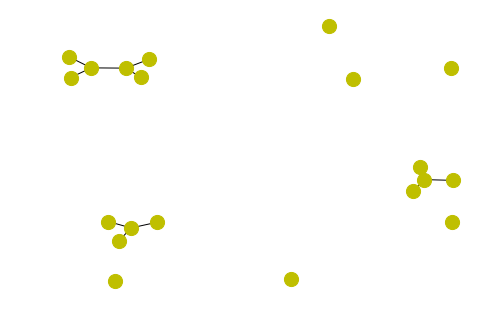

processing ID 174
Skeleton of carbon circles [[7139, 7138, 7136, 7142, 7141, 7140], [7131, 7135, 7134, 7133, 7132], [7143, 7144, 7145, 7146, 7147, 7137]]


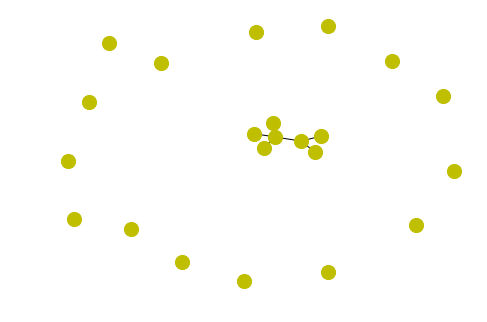

processing ID 175
Skeleton of carbon circles [[7182, 7183, 7184, 7185, 7186, 7176], [7171, 7172, 7173, 7174, 7170], [7177, 7178, 7179, 7180, 7181, 7175]]


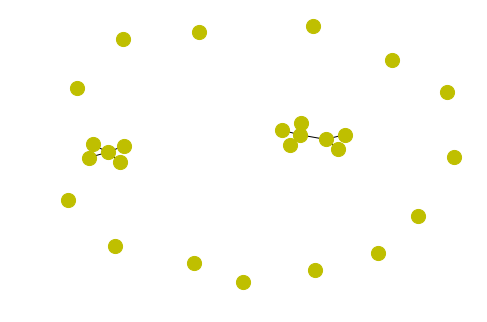

processing ID 176
Skeleton of carbon circles [[7225, 7226, 7227, 7228, 7229, 7219], [7214, 7215, 7216, 7217, 7213], [7220, 7221, 7222, 7223, 7224, 7218]]


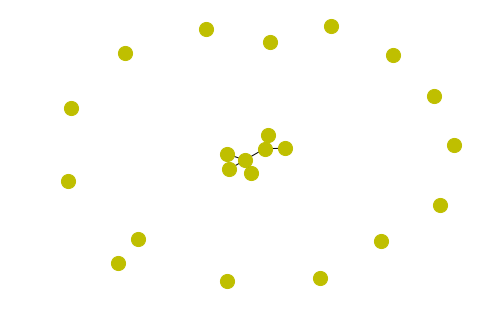

processing ID 177
Skeleton of carbon circles [[7264, 7265, 7266, 7267, 7268, 7258], [7253, 7254, 7255, 7256, 7252], [7259, 7260, 7261, 7262, 7263, 7257]]


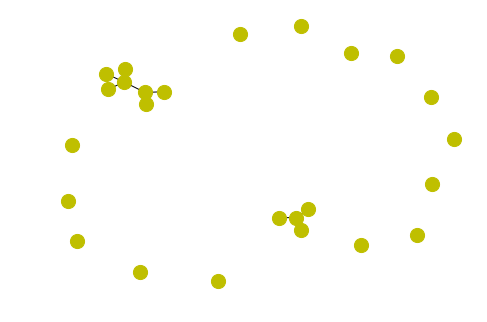

processing ID 178
Skeleton of carbon circles [[7295, 7294, 7298, 7297, 7296], [7306, 7307, 7308, 7309, 7310, 7300], [7301, 7302, 7303, 7304, 7305, 7299]]


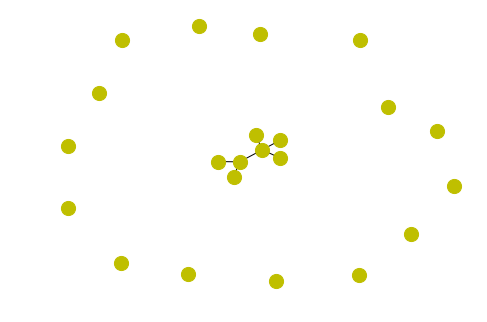

processing ID 179
Skeleton of carbon circles [[7345, 7346, 7347, 7348, 7349, 7339], [7334, 7335, 7336, 7337, 7333], [7340, 7341, 7342, 7343, 7344, 7338]]


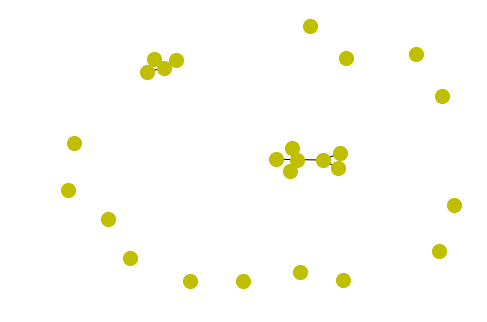

processing ID 180
Skeleton of carbon circles [[7387, 7388, 7389, 7390, 7391, 7381], [7376, 7377, 7378, 7379, 7375], [7382, 7383, 7384, 7385, 7386, 7380]]


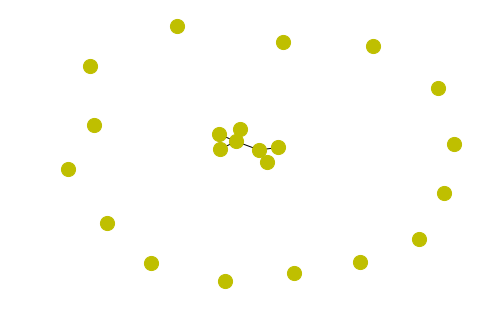

processing ID 181
Skeleton of carbon circles [[7423, 7422, 7421, 7419, 7425, 7424], [7414, 7418, 7417, 7416, 7415], [7426, 7427, 7428, 7429, 7430, 7420]]


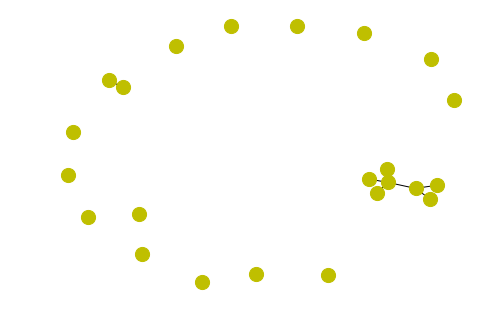

processing ID 182
Skeleton of carbon circles [[7466, 7467, 7468, 7469, 7470, 7460], [7455, 7456, 7457, 7458, 7454], [7461, 7462, 7463, 7464, 7465, 7459]]


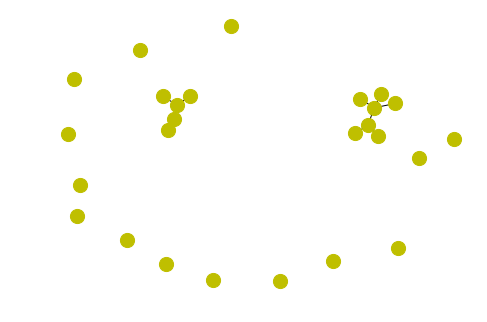

processing ID 183
Skeleton of carbon circles [[7509, 7510, 7511, 7512, 7513, 7503], [7498, 7499, 7500, 7501, 7497], [7504, 7505, 7506, 7507, 7508, 7502]]


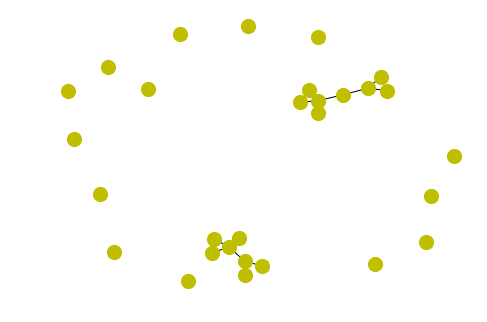

processing ID 184
Skeleton of carbon circles [[7551, 7550, 7548, 7554, 7553, 7552], [7543, 7547, 7546, 7545, 7544], [7555, 7556, 7557, 7558, 7559, 7549]]


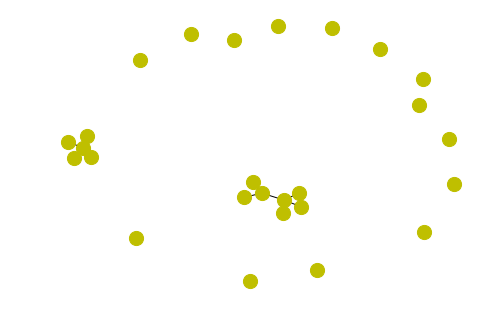

processing ID 185
Skeleton of carbon circles [[7598, 7599, 7600, 7601, 7602, 7592], [7587, 7588, 7589, 7590, 7586], [7593, 7594, 7595, 7596, 7597, 7591]]


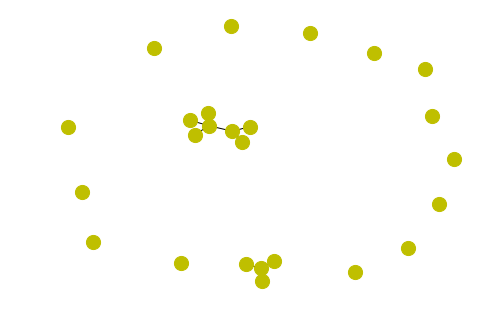

processing ID 186
Skeleton of carbon circles [[7640, 7641, 7642, 7643, 7644, 7634], [7629, 7630, 7631, 7632, 7628], [7635, 7636, 7637, 7638, 7639, 7633]]


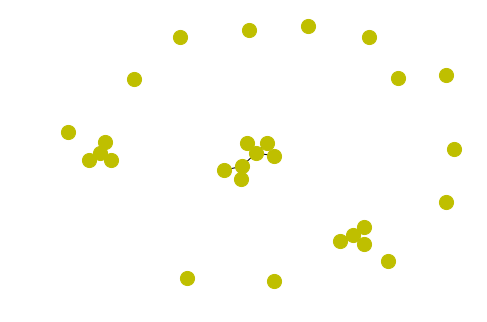

processing ID 187
Skeleton of carbon circles [[7678, 7684, 7683, 7682, 7681, 7680], [7673, 7677, 7676, 7675, 7674], [7685, 7686, 7687, 7688, 7689, 7679]]


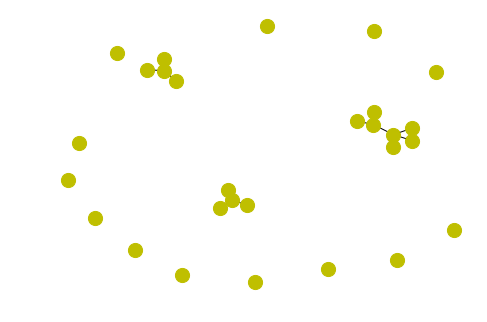

processing ID 188
Skeleton of carbon circles [[7730, 7731, 7732, 7733, 7734, 7724], [7719, 7720, 7721, 7722, 7718], [7725, 7726, 7727, 7728, 7729, 7723]]


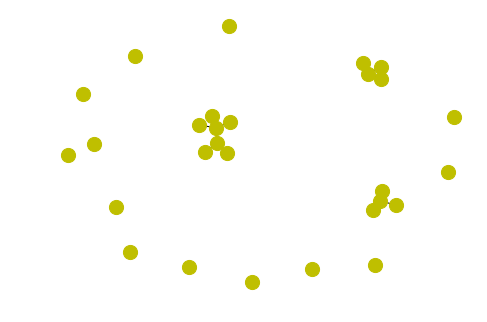

processing ID 189
Skeleton of carbon circles [[7775, 7776, 7777, 7778, 7779, 7769], [7765, 7764, 7763, 7767, 7766], [7770, 7771, 7772, 7773, 7774, 7768]]


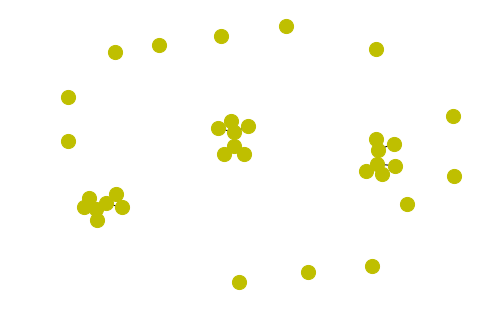

processing ID 190
Skeleton of carbon circles [[7826, 7827, 7828, 7829, 7830, 7820], [7815, 7816, 7817, 7818, 7814], [7821, 7822, 7823, 7824, 7825, 7819]]


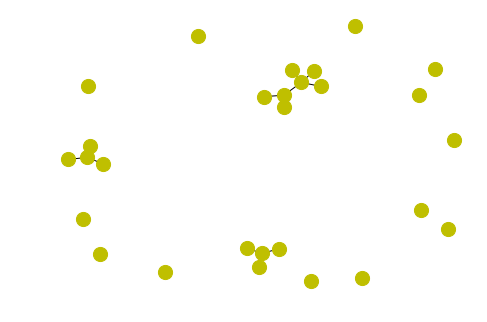

processing ID 191
Skeleton of carbon circles [[7871, 7872, 7873, 7874, 7875, 7865], [7860, 7861, 7862, 7863, 7859], [7866, 7867, 7868, 7869, 7870, 7864]]


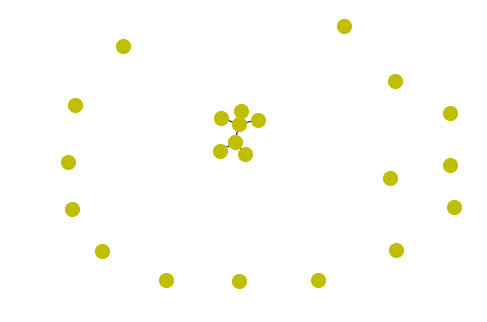

processing ID 192
Skeleton of carbon circles [[7906, 7905, 7903, 7909, 7908, 7907], [7898, 7902, 7901, 7900, 7899], [7910, 7911, 7912, 7913, 7914, 7904]]


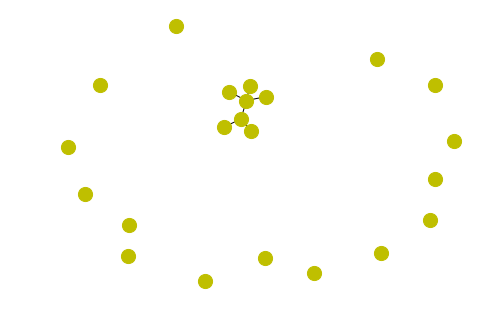

processing ID 193
Skeleton of carbon circles [[7949, 7950, 7951, 7952, 7953, 7943], [7938, 7939, 7940, 7941, 7937], [7944, 7945, 7946, 7947, 7948, 7942]]


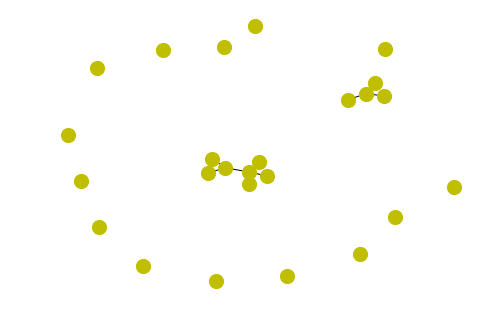

processing ID 194
Skeleton of carbon circles [[7991, 7992, 7993, 7994, 7995, 7985], [7980, 7981, 7982, 7983, 7979], [7986, 7987, 7988, 7989, 7990, 7984]]


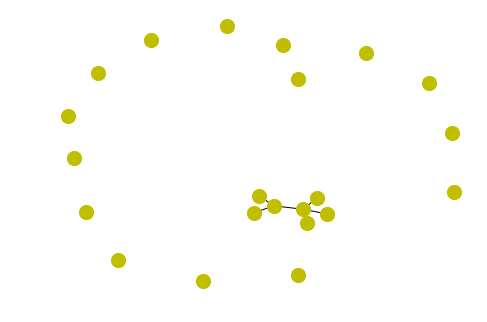

processing ID 195
Skeleton of carbon circles [[8030, 8031, 8032, 8033, 8034, 8024], [8019, 8020, 8021, 8022, 8018], [8025, 8026, 8027, 8028, 8029, 8023]]


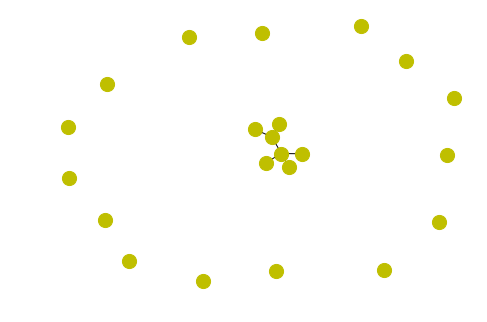

processing ID 196
Skeleton of carbon circles [[8062, 8068, 8067, 8066, 8065, 8064], [8057, 8061, 8060, 8059, 8058], [8069, 8070, 8071, 8072, 8073, 8063]]


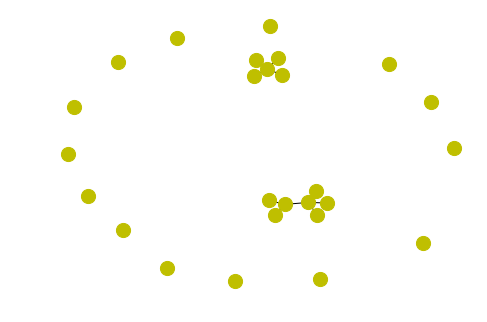

processing ID 197
Skeleton of carbon circles [[8112, 8113, 8114, 8115, 8116, 8106], [8101, 8102, 8103, 8104, 8100], [8107, 8108, 8109, 8110, 8111, 8105]]


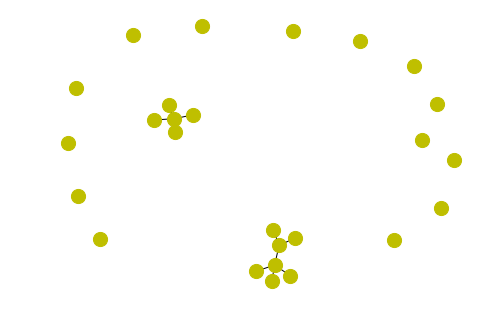

processing ID 198
Skeleton of carbon circles [[8155, 8156, 8157, 8158, 8159, 8149], [8144, 8145, 8146, 8147, 8143], [8150, 8151, 8152, 8153, 8154, 8148]]


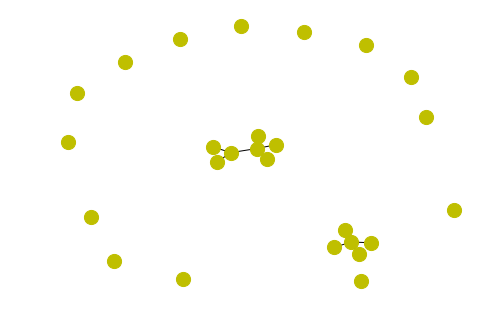

processing ID 199
Skeleton of carbon circles [[8199, 8207, 8209, 8208, 8200], [8198, 8199, 8200, 8201, 8202, 8192], [8187, 8188, 8189, 8190, 8186], [8193, 8194, 8195, 8196, 8197, 8191]]


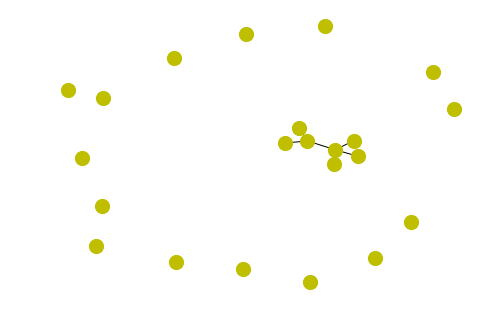

processing ID 200
Skeleton of carbon circles [[8240, 8241, 8242, 8243, 8244, 8234], [8229, 8230, 8231, 8232, 8228], [8235, 8236, 8237, 8238, 8239, 8233]]


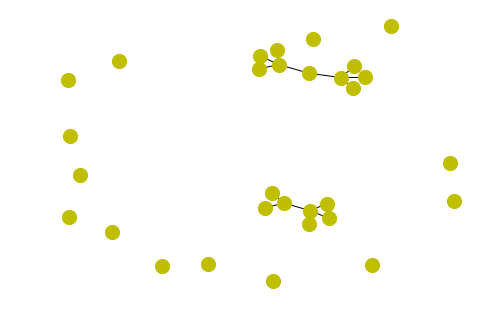

processing ID 201
Skeleton of carbon circles [[8287, 8288, 8289, 8290, 8291, 8281], [8276, 8277, 8278, 8279, 8275], [8282, 8283, 8284, 8285, 8286, 8280]]


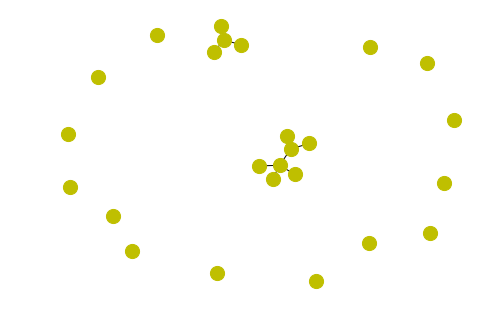

processing ID 202
Skeleton of carbon circles [[8329, 8330, 8331, 8332, 8333, 8323], [8319, 8318, 8317, 8321, 8320], [8324, 8325, 8326, 8327, 8328, 8322]]


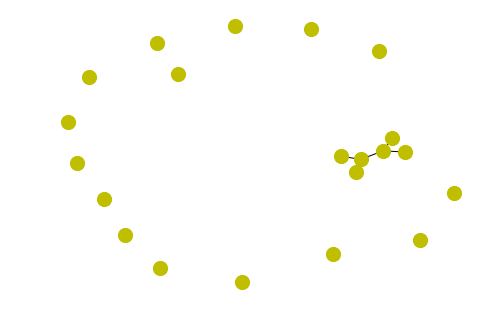

processing ID 203
Skeleton of carbon circles [[8367, 8368, 8369, 8370, 8371, 8361], [8356, 8357, 8358, 8359, 8355], [8362, 8363, 8364, 8365, 8366, 8360]]


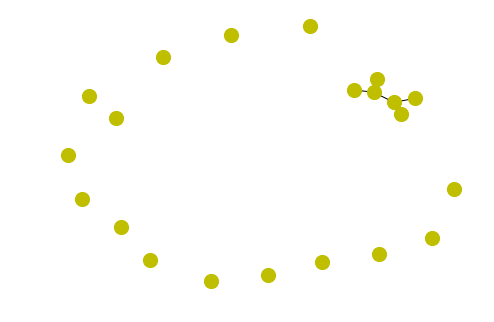

processing ID 204
Skeleton of carbon circles [[8405, 8406, 8407, 8408, 8409, 8399], [8394, 8395, 8396, 8397, 8393], [8400, 8401, 8402, 8403, 8404, 8398]]


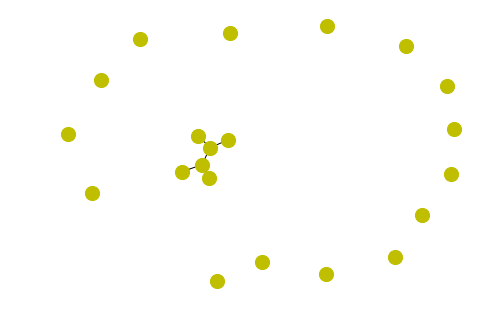

processing ID 205
Skeleton of carbon circles [[8439, 8438, 8436, 8442, 8441, 8440], [8431, 8435, 8434, 8433, 8432], [8443, 8444, 8445, 8446, 8447, 8437]]


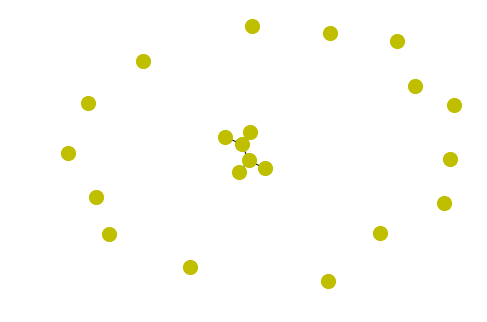

processing ID 206
Skeleton of carbon circles [[8481, 8482, 8483, 8484, 8485, 8475], [8470, 8471, 8472, 8473, 8469], [8476, 8477, 8478, 8479, 8480, 8474]]


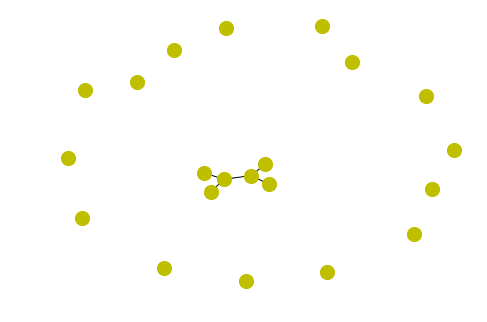

processing ID 207
Skeleton of carbon circles [[8519, 8520, 8521, 8522, 8523, 8513], [8508, 8509, 8510, 8511, 8507], [8514, 8515, 8516, 8517, 8518, 8512]]


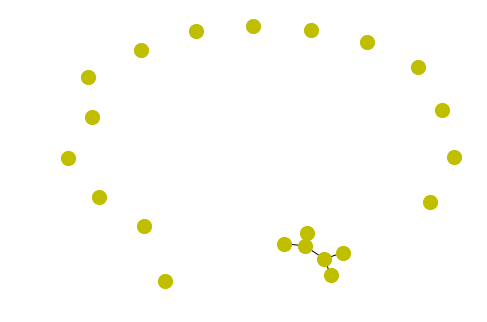

processing ID 208
Skeleton of carbon circles [[8554, 8553, 8552, 8550, 8556, 8555], [8545, 8549, 8548, 8547, 8546], [8557, 8558, 8559, 8560, 8561, 8551]]


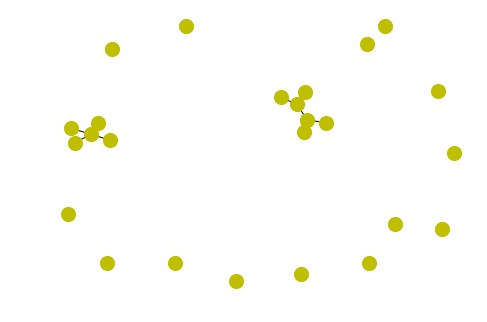

processing ID 209
Skeleton of carbon circles [[8599, 8600, 8601, 8602, 8603, 8593], [8588, 8589, 8590, 8591, 8587], [8594, 8595, 8596, 8597, 8598, 8592]]


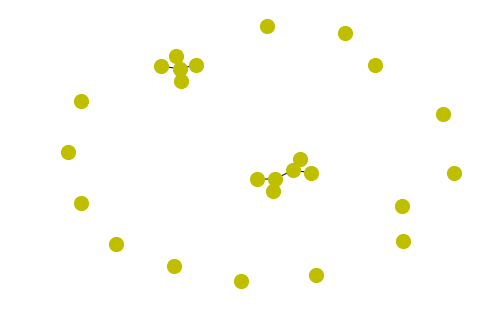

processing ID 210
Skeleton of carbon circles [[8641, 8642, 8643, 8644, 8645, 8635], [8630, 8631, 8632, 8633, 8629], [8636, 8637, 8638, 8639, 8640, 8634]]


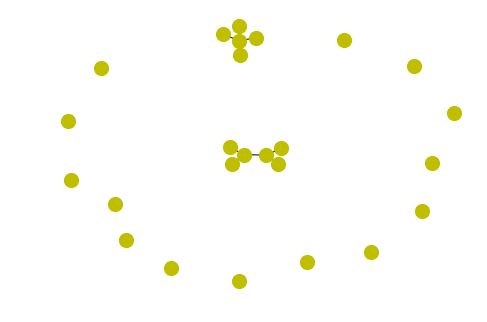

processing ID 211
Skeleton of carbon circles [[8680, 8679, 8678, 8676, 8682, 8681], [8671, 8675, 8674, 8673, 8672], [8683, 8684, 8685, 8686, 8687, 8677]]


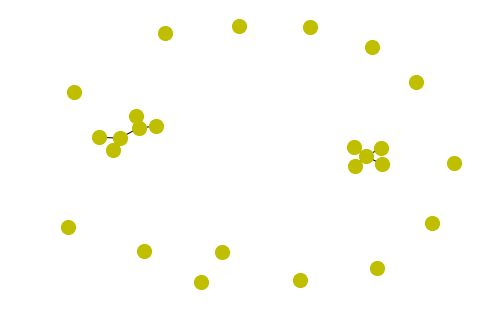

processing ID 212
Skeleton of carbon circles [[8726, 8735, 8736, 8734, 8727], [8725, 8726, 8727, 8728, 8729, 8719], [8714, 8715, 8716, 8717, 8713], [8720, 8721, 8722, 8723, 8724, 8718]]


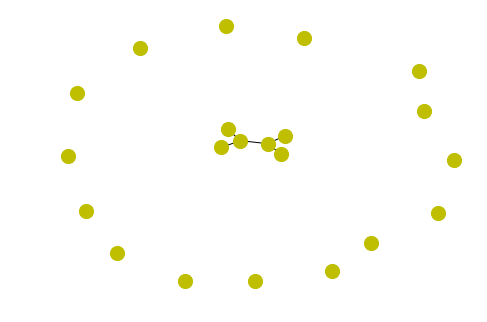

processing ID 213
Skeleton of carbon circles [[8766, 8767, 8768, 8769, 8770, 8760], [8755, 8756, 8757, 8758, 8754], [8761, 8762, 8763, 8764, 8765, 8759]]


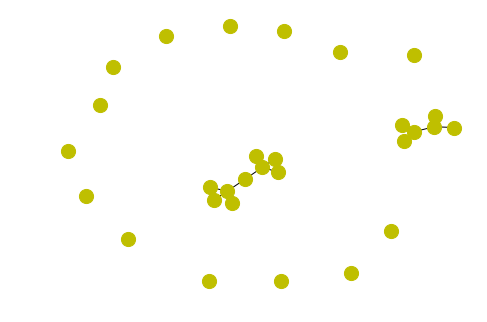

processing ID 214
Skeleton of carbon circles [[8807, 8805, 8811, 8810, 8809, 8808], [8800, 8804, 8803, 8802, 8801], [8812, 8813, 8814, 8815, 8816, 8806]]


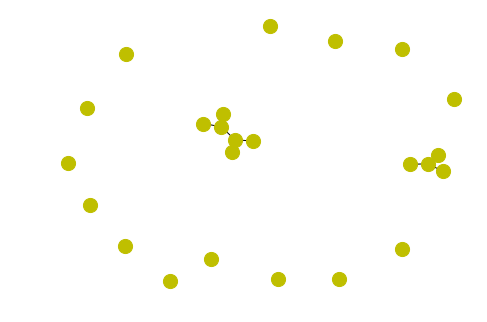

processing ID 215
Skeleton of carbon circles [[8853, 8854, 8855, 8856, 8857, 8847], [8842, 8843, 8844, 8845, 8841], [8848, 8849, 8850, 8851, 8852, 8846]]


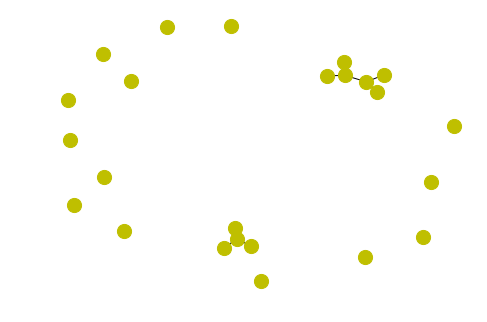

processing ID 216
Skeleton of carbon circles [[8883, 8896, 8897, 8898, 8899, 8882], [8891, 8892, 8893, 8894, 8895, 8885], [8886, 8887, 8888, 8889, 8890, 8884]]


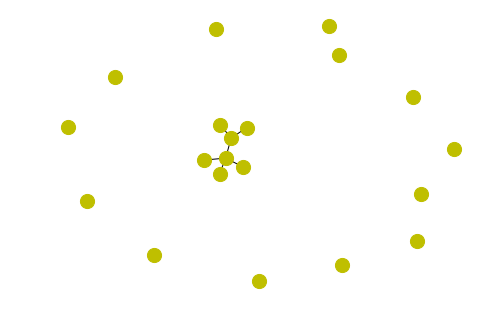

processing ID 217
Skeleton of carbon circles [[8921, 8934, 8935, 8936, 8937, 8920], [8929, 8930, 8931, 8932, 8933, 8923], [8924, 8925, 8926, 8927, 8928, 8922]]


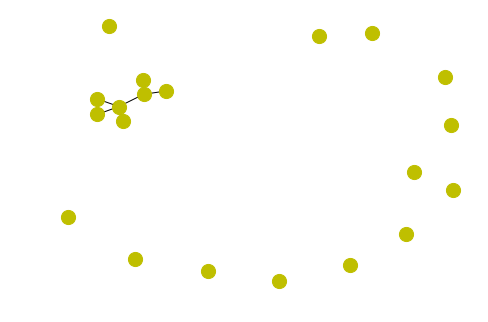

processing ID 218
Skeleton of carbon circles [[8962, 8963, 8964, 8965, 8966, 8960], [8958, 8975, 8974, 8973, 8972, 8959], [8967, 8968, 8969, 8970, 8971, 8961]]


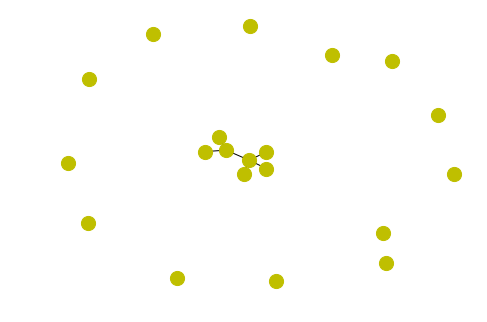

processing ID 219
Skeleton of carbon circles [[8997, 9010, 9011, 9012, 9013, 8996], [9005, 9006, 9007, 9008, 9009, 8999], [9000, 9001, 9002, 9003, 9004, 8998]]


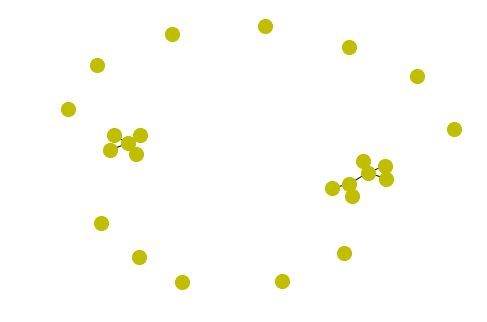

processing ID 220
Skeleton of carbon circles [[9039, 9052, 9053, 9054, 9055, 9038], [9047, 9048, 9049, 9050, 9051, 9041], [9042, 9043, 9044, 9045, 9046, 9040]]


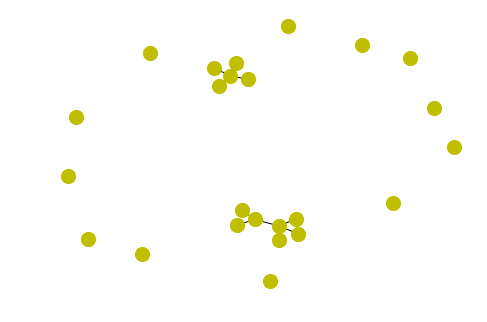

processing ID 221
Skeleton of carbon circles [[9082, 9084, 9085, 9086, 9087, 9088], [9080, 9097, 9096, 9095, 9094, 9081], [9089, 9090, 9091, 9092, 9093, 9083]]


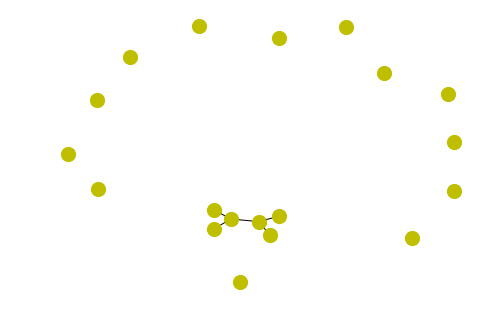

processing ID 222
Skeleton of carbon circles [[9118, 9131, 9132, 9133, 9134, 9117], [9126, 9127, 9128, 9129, 9130, 9120], [9121, 9122, 9123, 9124, 9125, 9119]]


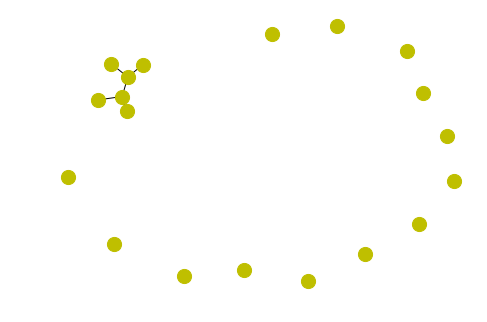

processing ID 223
Skeleton of carbon circles [[9155, 9168, 9169, 9170, 9171, 9154], [9163, 9164, 9165, 9166, 9167, 9157], [9158, 9159, 9160, 9161, 9162, 9156]]


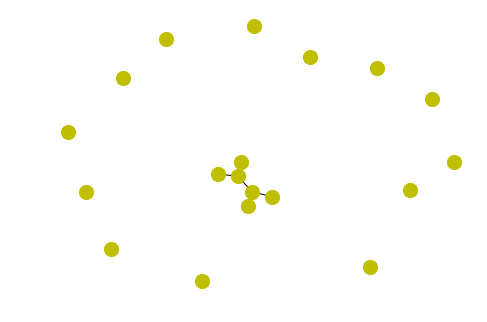

processing ID 224
Skeleton of carbon circles [[9193, 9199, 9198, 9197, 9196, 9195], [9191, 9208, 9207, 9206, 9205, 9192], [9200, 9201, 9202, 9203, 9204, 9194]]


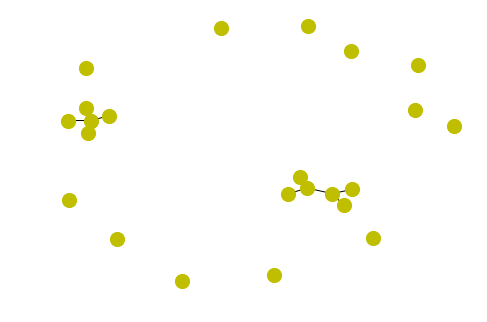

processing ID 225
Skeleton of carbon circles [[9233, 9246, 9247, 9248, 9249, 9232], [9241, 9242, 9243, 9244, 9245, 9235], [9236, 9237, 9238, 9239, 9240, 9234]]


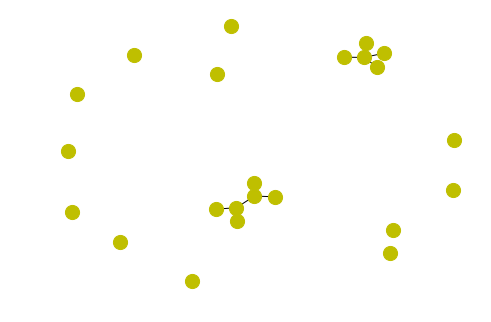

processing ID 226
Skeleton of carbon circles [[9274, 9287, 9288, 9289, 9290, 9273], [9282, 9283, 9284, 9285, 9286, 9276], [9277, 9278, 9279, 9280, 9281, 9275]]


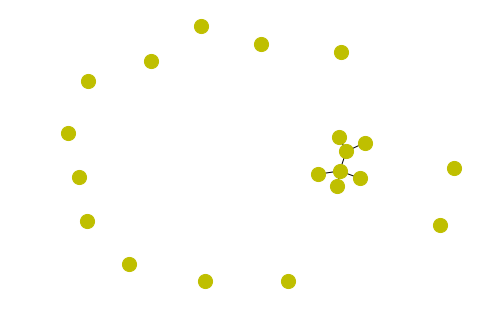

processing ID 227
Skeleton of carbon circles [[9312, 9311, 9328, 9327, 9326, 9325], [9320, 9321, 9322, 9323, 9324, 9314], [9315, 9316, 9317, 9318, 9319, 9313]]


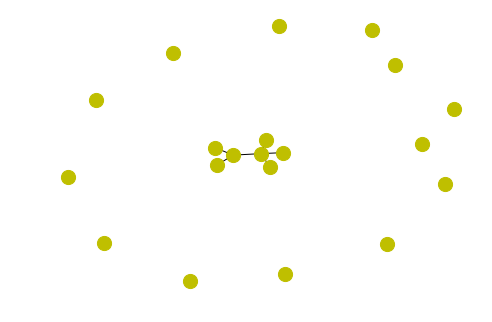

processing ID 228
Skeleton of carbon circles [[9350, 9363, 9364, 9365, 9366, 9349], [9358, 9359, 9360, 9361, 9362, 9352], [9353, 9354, 9355, 9356, 9357, 9351]]


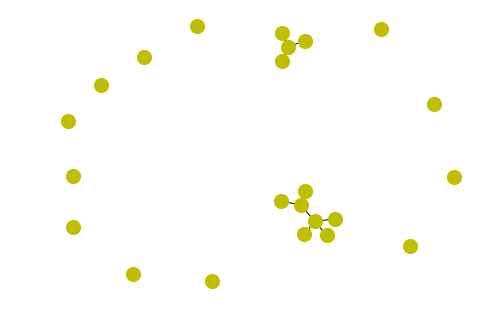

processing ID 229
Skeleton of carbon circles [[9391, 9404, 9405, 9406, 9407, 9390], [9399, 9400, 9401, 9402, 9403, 9393], [9394, 9395, 9396, 9397, 9398, 9392]]


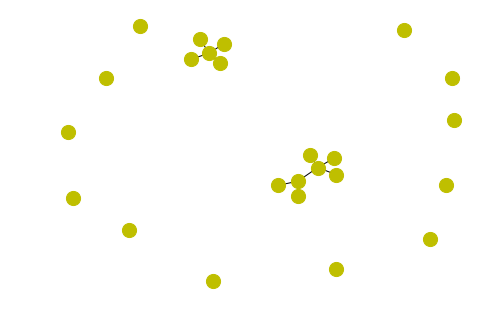

processing ID 230
Skeleton of carbon circles [[9442, 9441, 9435, 9445, 9444, 9443], [9433, 9446, 9447, 9448, 9449, 9432], [9436, 9437, 9438, 9439, 9440, 9434]]


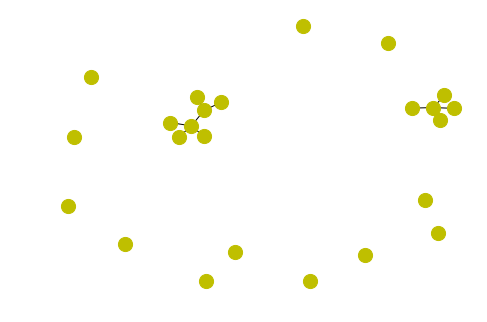

processing ID 231
Skeleton of carbon circles [[9475, 9488, 9489, 9490, 9491, 9474], [9483, 9484, 9485, 9486, 9487, 9477], [9478, 9479, 9480, 9481, 9482, 9476]]


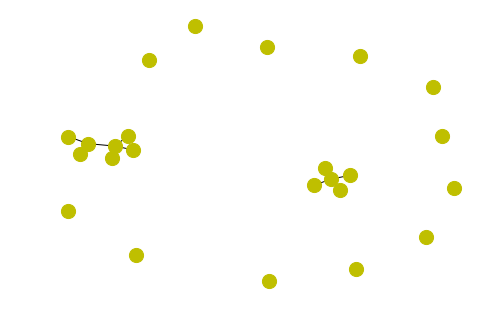

processing ID 232
Skeleton of carbon circles [[9517, 9530, 9531, 9532, 9533, 9516], [9525, 9526, 9527, 9528, 9529, 9519], [9520, 9521, 9522, 9523, 9524, 9518]]


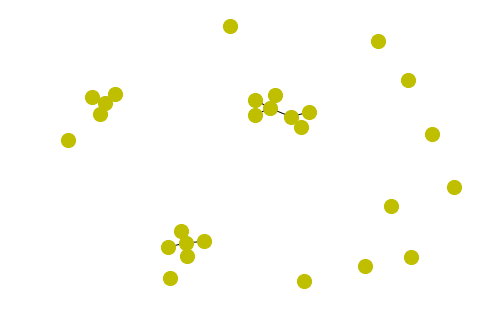

processing ID 233
Skeleton of carbon circles [[9566, 9565, 9563, 9569, 9568, 9567], [9561, 9578, 9577, 9576, 9575, 9562], [9570, 9571, 9572, 9573, 9574, 9564]]


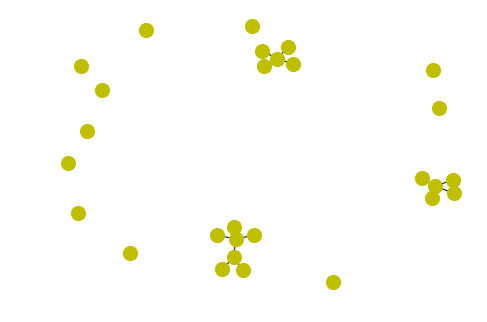

processing ID 234
Skeleton of carbon circles [[9608, 9621, 9622, 9623, 9624, 9607], [9617, 9632, 9634, 9633, 9631, 9618], [9616, 9617, 9618, 9619, 9620, 9610], [9611, 9612, 9613, 9614, 9615, 9609]]


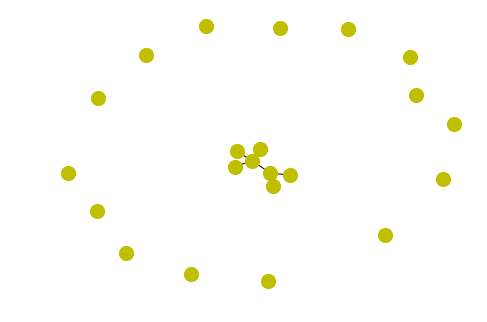

processing ID 235
Skeleton of carbon circles [[9652, 9665, 9666, 9667, 9668, 9651], [9661, 9676, 9677, 9675, 9662], [9660, 9661, 9662, 9663, 9664, 9654], [9655, 9656, 9657, 9658, 9659, 9653]]


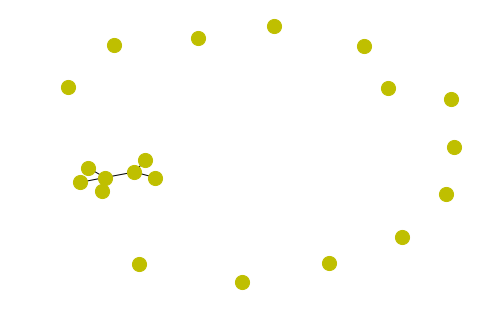

processing ID 236
Skeleton of carbon circles [[9697, 9696, 9694, 9700, 9699, 9698], [9692, 9709, 9708, 9707, 9706, 9693], [9701, 9702, 9703, 9704, 9705, 9695]]


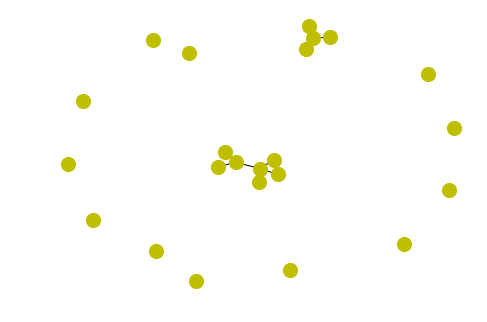

processing ID 237
Skeleton of carbon circles [[9734, 9747, 9748, 9749, 9750, 9733], [9742, 9743, 9744, 9745, 9746, 9736], [9737, 9738, 9739, 9740, 9741, 9735]]


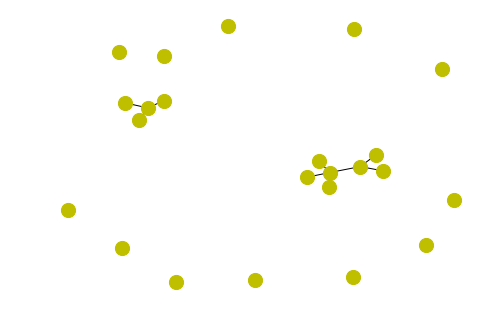

processing ID 238
Skeleton of carbon circles [[9775, 9788, 9789, 9790, 9791, 9774], [9783, 9784, 9785, 9786, 9787, 9777], [9778, 9779, 9780, 9781, 9782, 9776]]


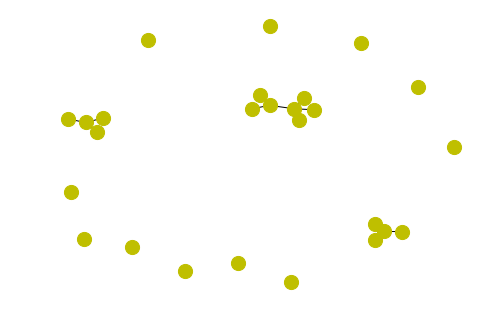

processing ID 239
Skeleton of carbon circles [[9827, 9821, 9831, 9830, 9829, 9828], [9819, 9832, 9833, 9834, 9835, 9818], [9822, 9823, 9824, 9825, 9826, 9820]]


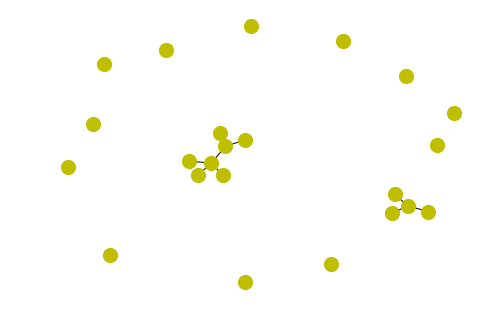

processing ID 240
Skeleton of carbon circles [[9860, 9873, 9874, 9875, 9876, 9859], [9868, 9869, 9870, 9871, 9872, 9862], [9863, 9864, 9865, 9866, 9867, 9861]]


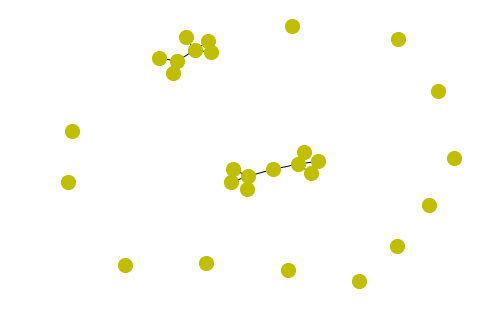

processing ID 241
Skeleton of carbon circles [[9906, 9919, 9920, 9921, 9922, 9905], [9914, 9915, 9916, 9917, 9918, 9908], [9909, 9910, 9911, 9912, 9913, 9907]]


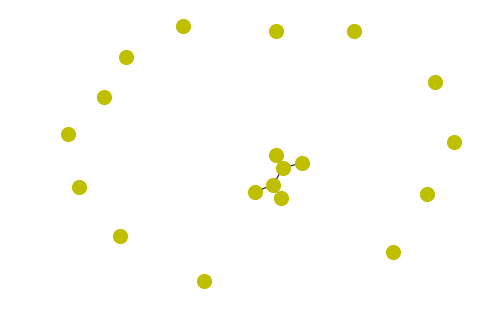

processing ID 242
Skeleton of carbon circles [[9943, 9956, 9957, 9958, 9959, 9942], [9951, 9952, 9953, 9954, 9955, 9945], [9946, 9947, 9948, 9949, 9950, 9944]]


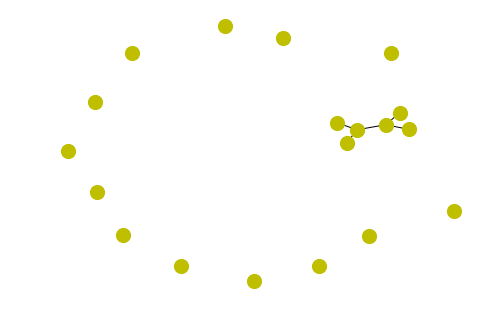

processing ID 243
Skeleton of carbon circles [[9983, 9981, 9987, 9986, 9985, 9984], [9979, 9996, 9995, 9994, 9993, 9980], [9988, 9989, 9990, 9991, 9992, 9982]]


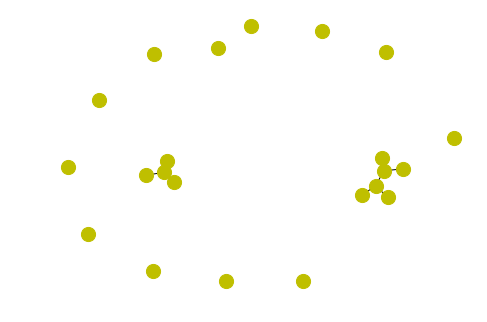

processing ID 244
Skeleton of carbon circles [[10020, 10033, 10034, 10035, 10036, 10019], [10028, 10029, 10030, 10031, 10032, 10022], [10023, 10024, 10025, 10026, 10027, 10021]]


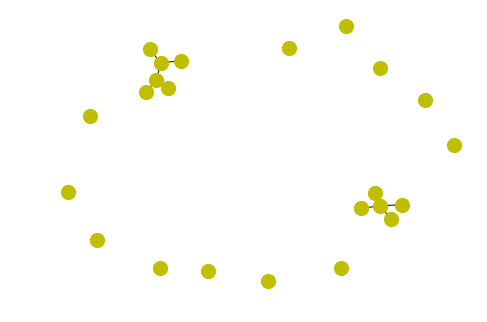

processing ID 245
Skeleton of carbon circles [[10061, 10074, 10075, 10076, 10077, 10060], [10069, 10070, 10071, 10072, 10073, 10063], [10064, 10065, 10066, 10067, 10068, 10062]]


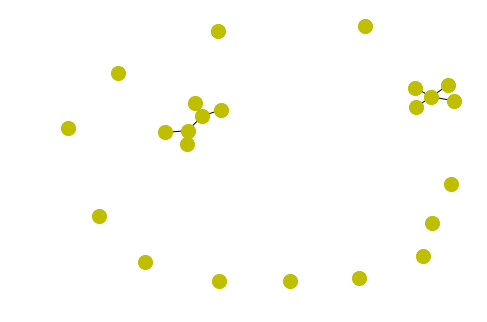

processing ID 246
Skeleton of carbon circles [[10111, 10110, 10104, 10114, 10113, 10112], [10102, 10115, 10116, 10117, 10118, 10101], [10105, 10106, 10107, 10108, 10109, 10103]]


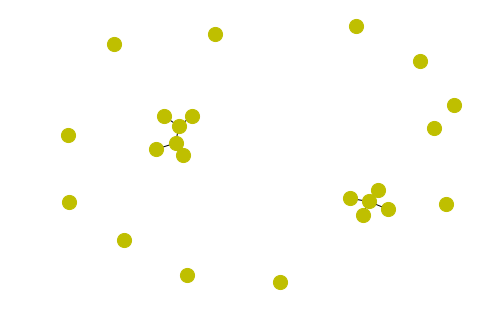

processing ID 247
Skeleton of carbon circles [[10143, 10156, 10157, 10158, 10159, 10142], [10151, 10152, 10153, 10154, 10155, 10145], [10146, 10147, 10148, 10149, 10150, 10144]]


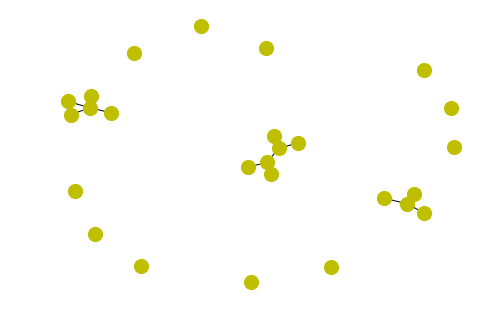

processing ID 248
Skeleton of carbon circles [[10187, 10200, 10201, 10202, 10203, 10186], [10195, 10196, 10197, 10198, 10199, 10189], [10190, 10191, 10192, 10193, 10194, 10188]]


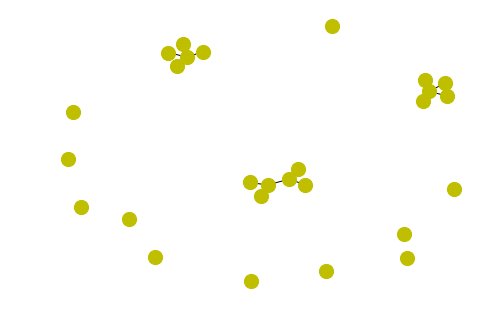

processing ID 249
Skeleton of carbon circles [[10242, 10255, 10257, 10258, 10256, 10241], [10234, 10244, 10243, 10242, 10241, 10240], [10232, 10245, 10246, 10247, 10248, 10231], [10235, 10236, 10237, 10238, 10239, 10233]]


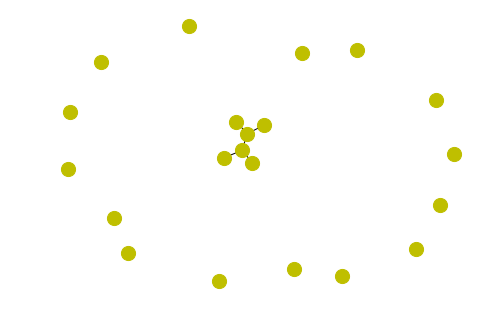

processing ID 250
Skeleton of carbon circles [[10275, 10288, 10289, 10290, 10291, 10274], [10284, 10299, 10300, 10298, 10285], [10283, 10284, 10285, 10286, 10287, 10277], [10278, 10279, 10280, 10281, 10282, 10276]]


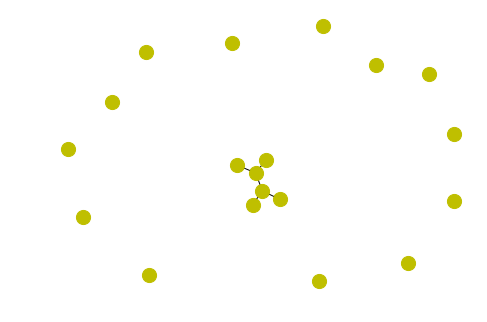

processing ID 251
Skeleton of carbon circles [[10315, 10328, 10329, 10330, 10331, 10314], [10323, 10324, 10325, 10326, 10327, 10317], [10318, 10319, 10320, 10321, 10322, 10316]]


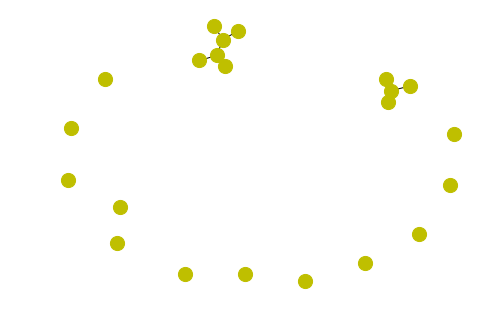

processing ID 252
Skeleton of carbon circles [[10355, 10354, 10371, 10370, 10369, 10368], [10363, 10364, 10365, 10366, 10367, 10357], [10358, 10359, 10360, 10361, 10362, 10356]]


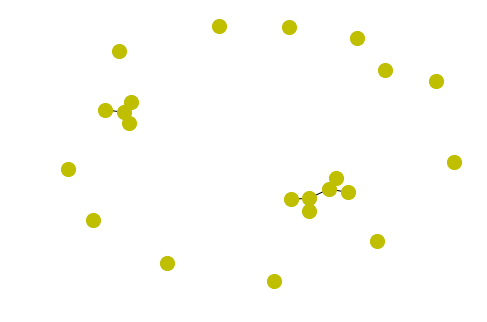

processing ID 253
Skeleton of carbon circles [[10395, 10408, 10409, 10410, 10411, 10394], [10403, 10404, 10405, 10406, 10407, 10397], [10398, 10399, 10400, 10401, 10402, 10396]]


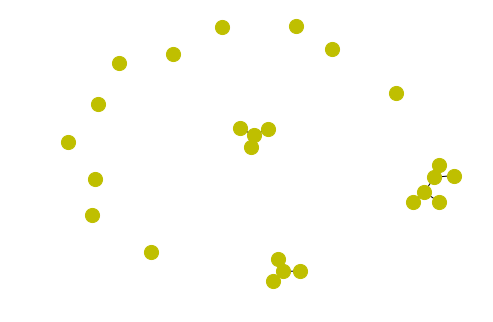

processing ID 254
Skeleton of carbon circles [[10438, 10451, 10452, 10453, 10454, 10437], [10446, 10447, 10448, 10449, 10450, 10440], [10441, 10442, 10443, 10444, 10445, 10439]]


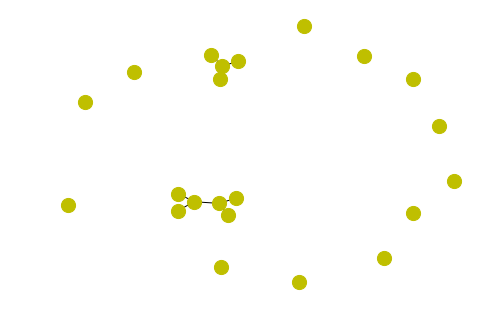

processing ID 255
Skeleton of carbon circles [[10482, 10481, 10479, 10485, 10484, 10483], [10477, 10494, 10493, 10492, 10491, 10478], [10486, 10487, 10488, 10489, 10490, 10480]]


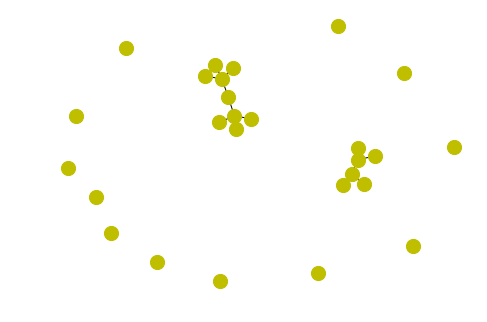

processing ID 256
Skeleton of carbon circles [[10523, 10536, 10537, 10538, 10539, 10522], [10531, 10532, 10533, 10534, 10535, 10525], [10526, 10527, 10528, 10529, 10530, 10524]]


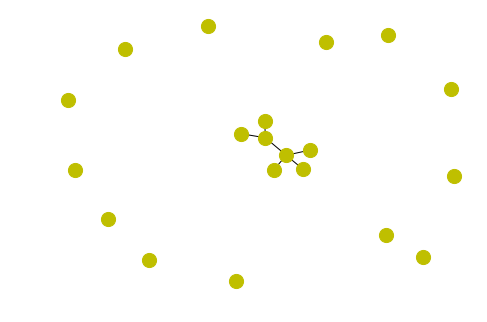

processing ID 257
Skeleton of carbon circles [[10575, 10582, 10585, 10583, 10576], [10561, 10574, 10575, 10576, 10577, 10560], [10569, 10570, 10571, 10572, 10573, 10563], [10564, 10565, 10566, 10567, 10568, 10562]]


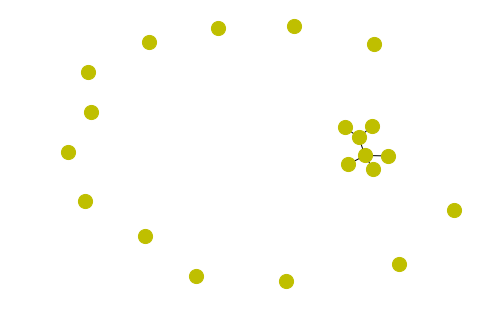

processing ID 258
Skeleton of carbon circles [[10601, 10602, 10615, 10616, 10617, 10618], [10605, 10606, 10607, 10608, 10609, 10603], [10610, 10611, 10612, 10613, 10614, 10604]]


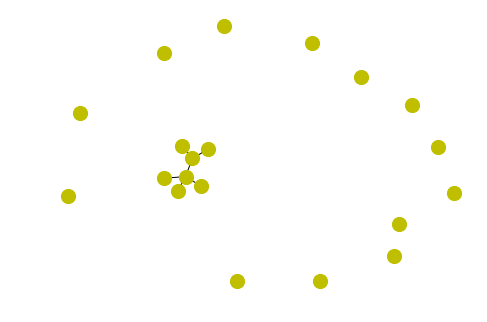

processing ID 259
Skeleton of carbon circles [[10654, 10662, 10663, 10664, 10665, 10655], [10640, 10653, 10654, 10655, 10656, 10639], [10648, 10649, 10650, 10651, 10652, 10642], [10643, 10644, 10645, 10646, 10647, 10641]]


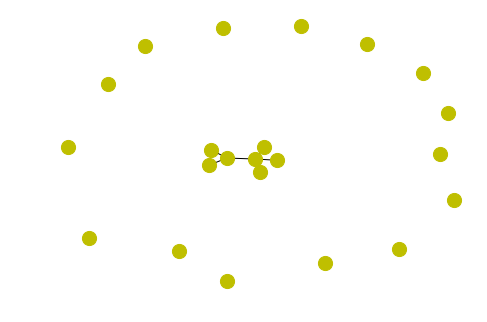

processing ID 260
Skeleton of carbon circles [[10684, 10697, 10698, 10699, 10700, 10683], [10692, 10693, 10694, 10695, 10696, 10686], [10687, 10688, 10689, 10690, 10691, 10685]]


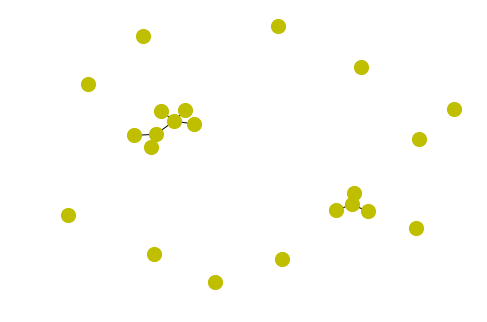

processing ID 261
Skeleton of carbon circles [[10733, 10732, 10726, 10736, 10735, 10734], [10724, 10737, 10738, 10739, 10740, 10723], [10727, 10728, 10729, 10730, 10731, 10725]]


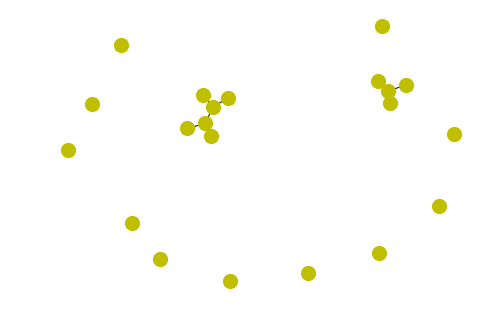

processing ID 262
Skeleton of carbon circles [[10763, 10776, 10777, 10778, 10779, 10762], [10771, 10772, 10773, 10774, 10775, 10765], [10766, 10767, 10768, 10769, 10770, 10764]]


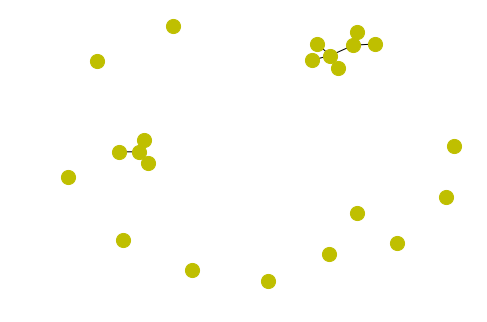

processing ID 263
Skeleton of carbon circles [[10803, 10816, 10817, 10818, 10819, 10802], [10811, 10812, 10813, 10814, 10815, 10805], [10806, 10807, 10808, 10809, 10810, 10804]]


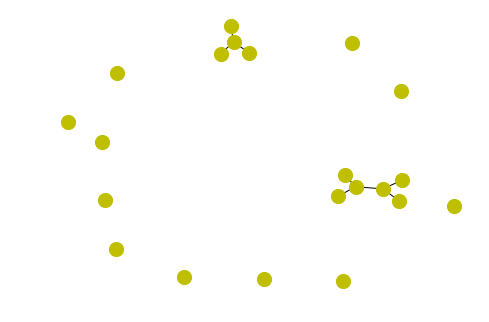

processing ID 264
Skeleton of carbon circles [[10854, 10857, 10856, 10855, 10847], [10849, 10850, 10851, 10852, 10853, 10848], [10842, 10843, 10844, 10845, 10846, 10841]]


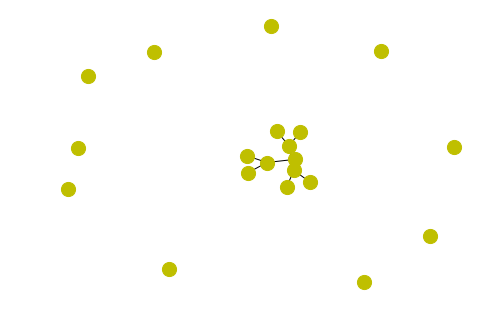

processing ID 265
Skeleton of carbon circles [[10891, 10894, 10893, 10892, 10884], [10886, 10887, 10888, 10889, 10890, 10885], [10879, 10878, 10883, 10882, 10881, 10880]]


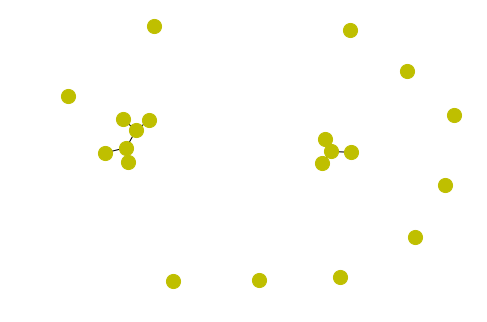

processing ID 266
Skeleton of carbon circles [[10928, 10931, 10930, 10929, 10921], [10923, 10924, 10925, 10926, 10927, 10922], [10916, 10917, 10918, 10919, 10920, 10915]]


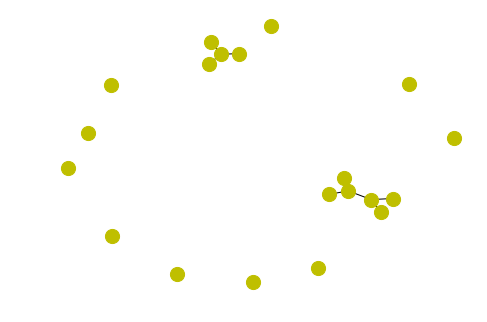

processing ID 267
Skeleton of carbon circles [[10965, 10968, 10967, 10966, 10958], [10960, 10961, 10962, 10963, 10964, 10959], [10953, 10954, 10955, 10956, 10957, 10952]]


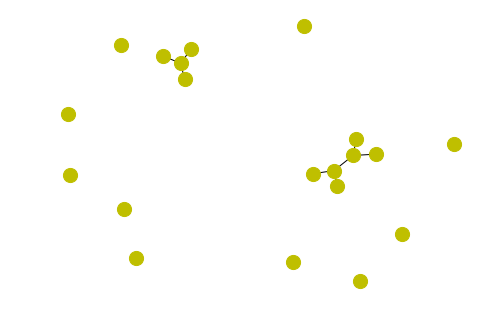

processing ID 268
Skeleton of carbon circles [[10997, 10998, 10999, 11000, 11001, 10996], [11003, 10995, 11002, 11005, 11004], [10991, 10990, 10989, 10994, 10993, 10992]]


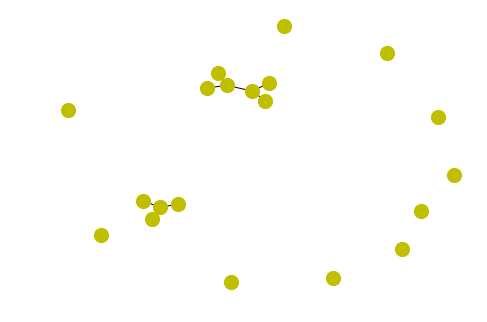

processing ID 269
Skeleton of carbon circles [[11039, 11042, 11041, 11040, 11032], [11034, 11035, 11036, 11037, 11038, 11033], [11027, 11028, 11029, 11030, 11031, 11026]]


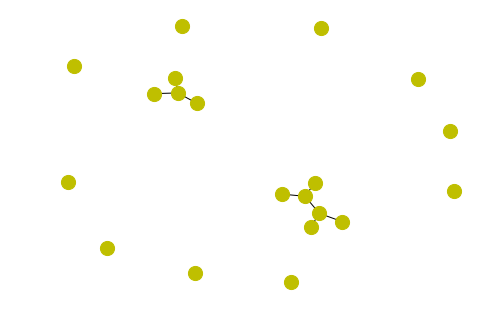

processing ID 270
Skeleton of carbon circles [[11076, 11079, 11078, 11077, 11069], [11071, 11072, 11073, 11074, 11075, 11070], [11064, 11065, 11066, 11067, 11068, 11063]]


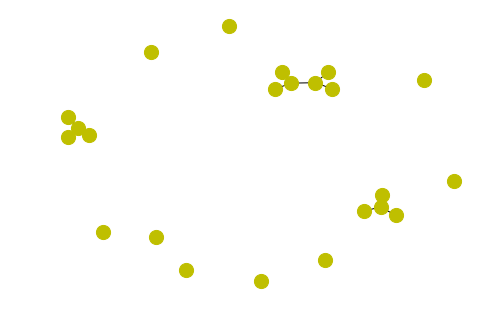

processing ID 271
Skeleton of carbon circles [[11110, 11111, 11112, 11113, 11114, 11115], [11109, 11117, 11118, 11119, 11116], [11105, 11104, 11103, 11108, 11107, 11106]]


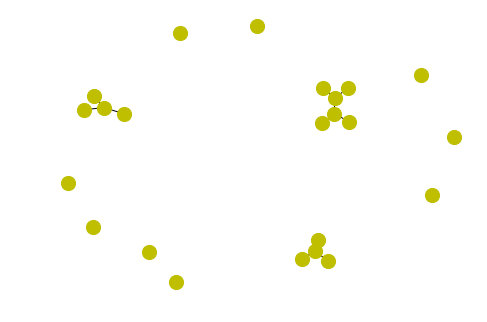

processing ID 272
Skeleton of carbon circles [[11156, 11159, 11158, 11157, 11149], [11151, 11152, 11153, 11154, 11155, 11150], [11144, 11145, 11146, 11147, 11148, 11143]]


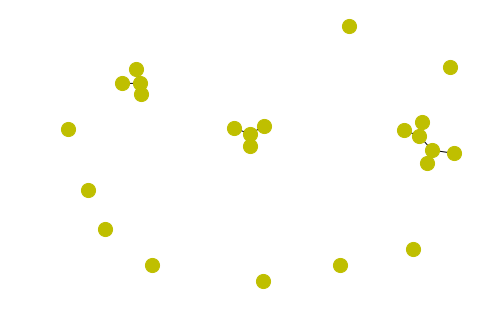

processing ID 273
Skeleton of carbon circles [[11196, 11199, 11198, 11197, 11189], [11191, 11192, 11193, 11194, 11195, 11190], [11184, 11185, 11186, 11187, 11188, 11183]]


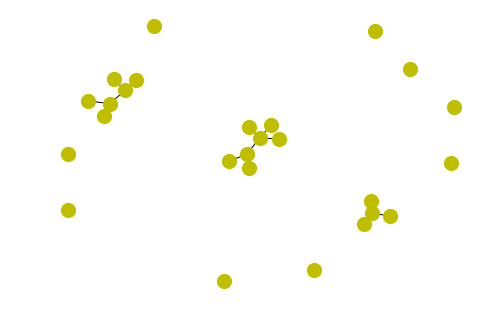

processing ID 274
Skeleton of carbon circles [[11239, 11242, 11241, 11240, 11232], [11234, 11235, 11236, 11237, 11238, 11233], [11227, 11228, 11229, 11230, 11231, 11226]]


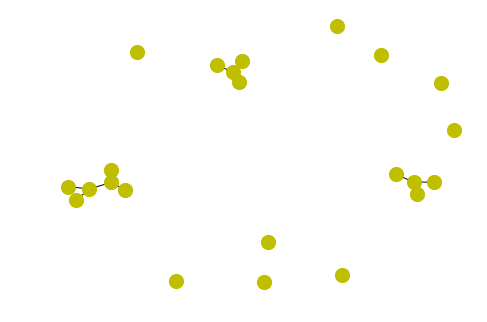

processing ID 275
Skeleton of carbon circles [[11279, 11282, 11281, 11280, 11272], [11274, 11275, 11276, 11277, 11278, 11273], [11267, 11268, 11269, 11270, 11271, 11266]]


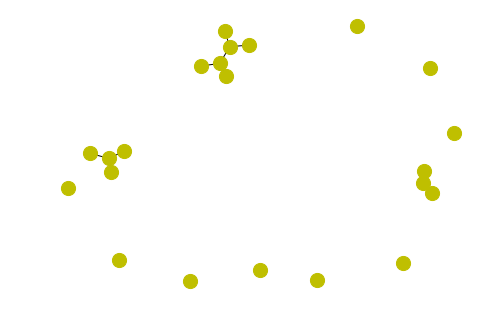

processing ID 276
Skeleton of carbon circles [[11318, 11321, 11320, 11319, 11311], [11313, 11314, 11315, 11316, 11317, 11312], [11306, 11307, 11308, 11309, 11310, 11305]]


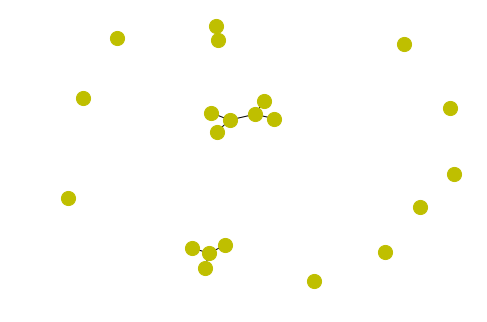

processing ID 277
Skeleton of carbon circles [[11356, 11359, 11358, 11357, 11349], [11351, 11352, 11353, 11354, 11355, 11350], [11344, 11345, 11346, 11347, 11348, 11343]]


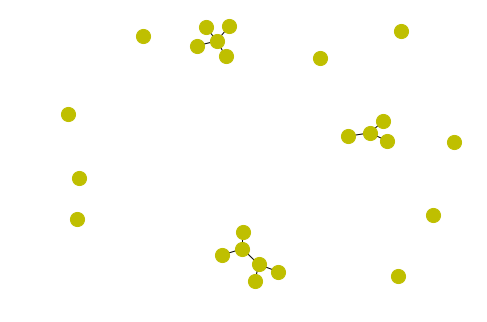

processing ID 278
Skeleton of carbon circles [[11391, 11396, 11395, 11394, 11393, 11392], [11390, 11398, 11399, 11400, 11397], [11386, 11385, 11384, 11389, 11388, 11387]]


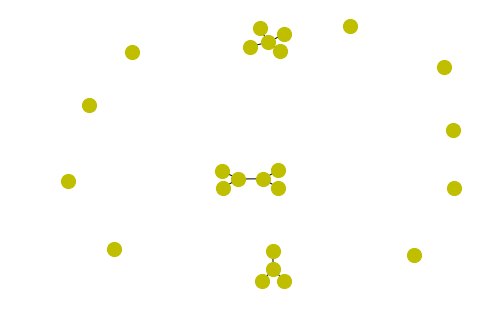

processing ID 279
Skeleton of carbon circles [[11438, 11441, 11440, 11439, 11431], [11433, 11434, 11435, 11436, 11437, 11432], [11426, 11427, 11428, 11429, 11430, 11425]]


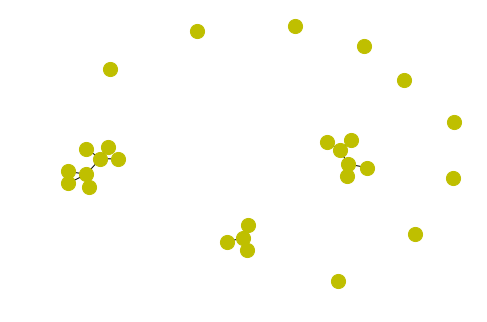

processing ID 280
Skeleton of carbon circles [[11482, 11485, 11484, 11483, 11475], [11477, 11478, 11479, 11480, 11481, 11476], [11470, 11471, 11472, 11473, 11474, 11469]]


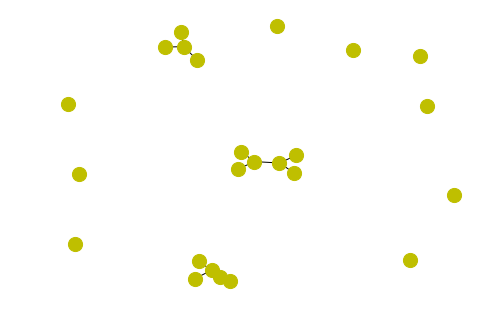

processing ID 281
Skeleton of carbon circles [[11516, 11524, 11525, 11526, 11523], [11512, 11511, 11510, 11515, 11514, 11513], [11519, 11518, 11517, 11522, 11521, 11520]]


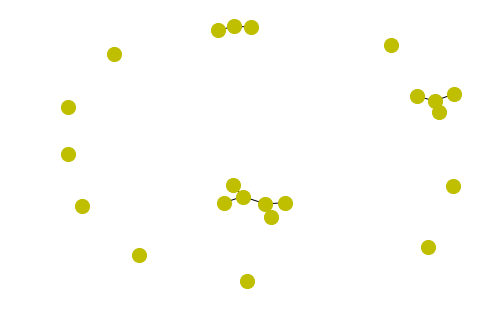

processing ID 282
Skeleton of carbon circles [[11562, 11565, 11564, 11563, 11555], [11557, 11558, 11559, 11560, 11561, 11556], [11550, 11551, 11552, 11553, 11554, 11549]]


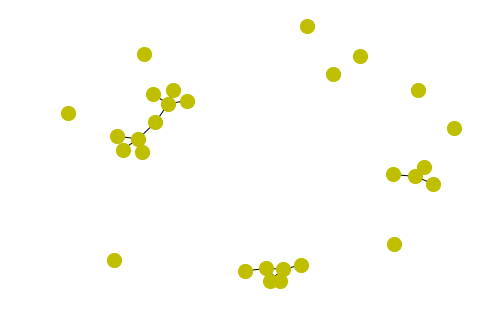

processing ID 283
Skeleton of carbon circles [[11607, 11610, 11609, 11608, 11600], [11602, 11603, 11604, 11605, 11606, 11601], [11595, 11596, 11597, 11598, 11599, 11594]]


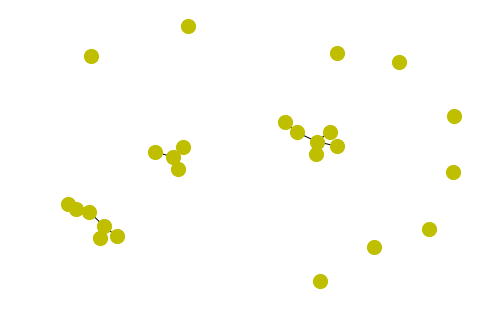

processing ID 284
Skeleton of carbon circles [[11643, 11644, 11645, 11646, 11647, 11648], [11642, 11650, 11651, 11652, 11649], [11638, 11637, 11636, 11641, 11640, 11639]]


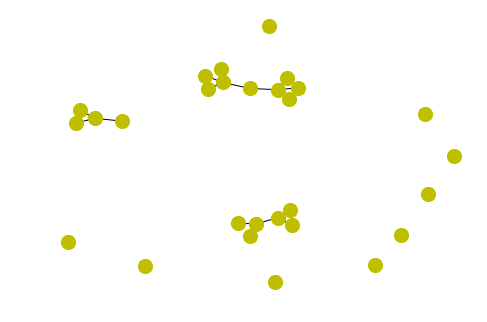

processing ID 285
Skeleton of carbon circles [[11694, 11697, 11696, 11695, 11687], [11689, 11690, 11691, 11692, 11693, 11688], [11682, 11683, 11684, 11685, 11686, 11681]]


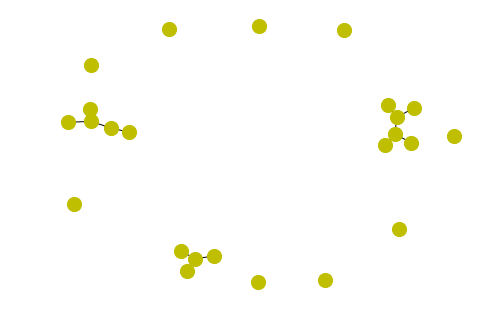

processing ID 286
Skeleton of carbon circles [[11735, 11738, 11737, 11736, 11728], [11730, 11731, 11732, 11733, 11734, 11729], [11723, 11724, 11725, 11726, 11727, 11722]]


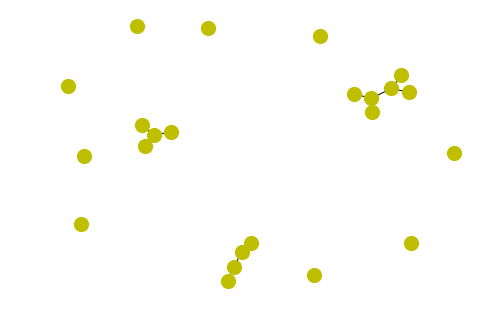

processing ID 287
Skeleton of carbon circles [[11768, 11775, 11778, 11777, 11776], [11770, 11771, 11772, 11773, 11774, 11769], [11764, 11763, 11762, 11767, 11766, 11765]]


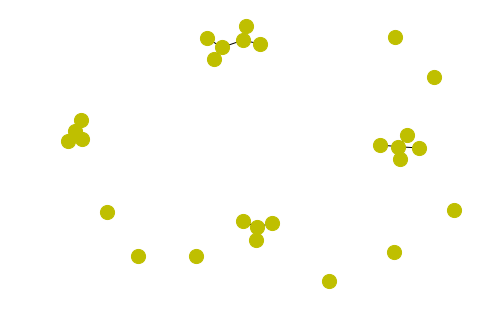

processing ID 288
Skeleton of carbon circles [[11819, 11822, 11821, 11820, 11812], [11814, 11815, 11816, 11817, 11818, 11813], [11807, 11808, 11809, 11810, 11811, 11806]]


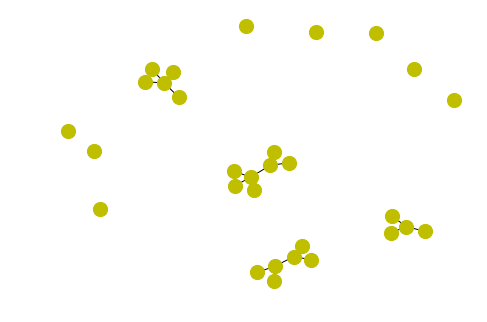

processing ID 289
Skeleton of carbon circles [[11866, 11869, 11868, 11867, 11859], [11861, 11862, 11863, 11864, 11865, 11860], [11854, 11855, 11856, 11857, 11858, 11853]]


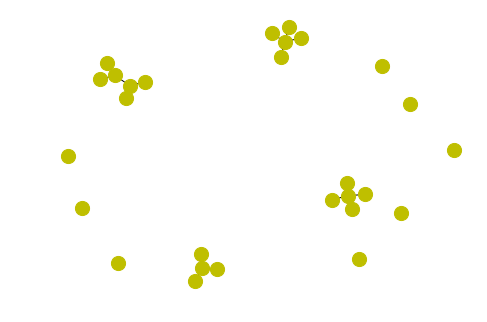

processing ID 290
Skeleton of carbon circles [[11911, 11914, 11913, 11912, 11904], [11906, 11907, 11908, 11909, 11910, 11905], [11900, 11899, 11898, 11903, 11902, 11901]]


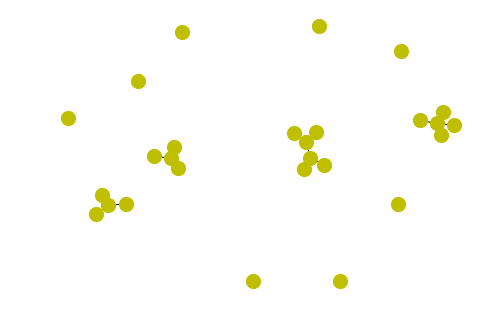

processing ID 291
Skeleton of carbon circles [[11955, 11958, 11957, 11956, 11948], [11950, 11951, 11952, 11953, 11954, 11949], [11943, 11944, 11945, 11946, 11947, 11942]]


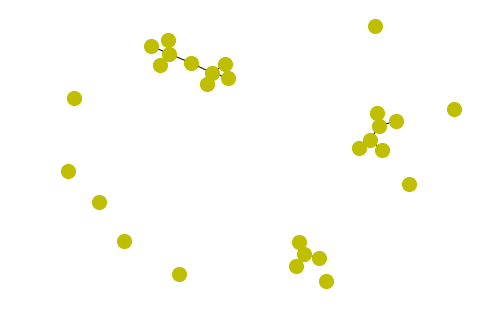

processing ID 292
Skeleton of carbon circles [[12000, 12003, 12002, 12001, 11993], [11995, 11996, 11997, 11998, 11999, 11994], [11988, 11989, 11990, 11991, 11992, 11987]]


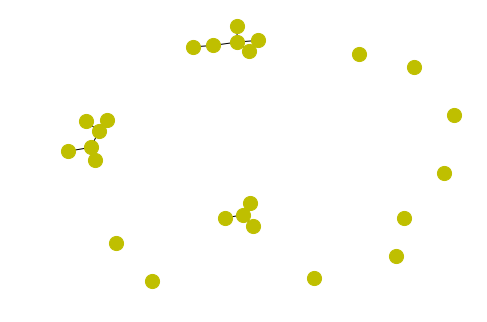

processing ID 293
Skeleton of carbon circles [[12042, 12045, 12044, 12043, 12035], [12037, 12038, 12039, 12040, 12041, 12036], [12031, 12030, 12029, 12034, 12033, 12032]]


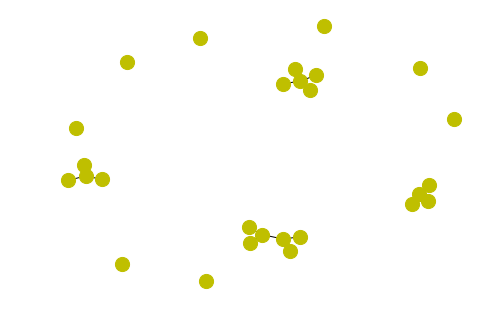

processing ID 294
Skeleton of carbon circles [[12086, 12089, 12088, 12087, 12079], [12081, 12082, 12083, 12084, 12085, 12080], [12074, 12075, 12076, 12077, 12078, 12073]]


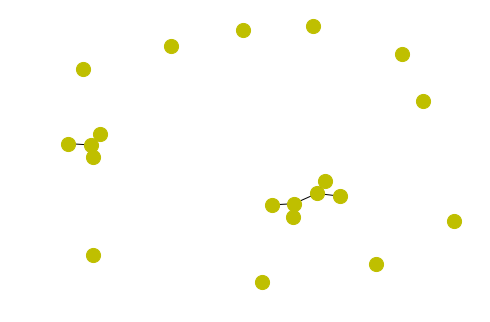

processing ID 295
Skeleton of carbon circles [[12123, 12126, 12125, 12124, 12116], [12118, 12119, 12120, 12121, 12122, 12117], [12111, 12112, 12113, 12114, 12115, 12110]]


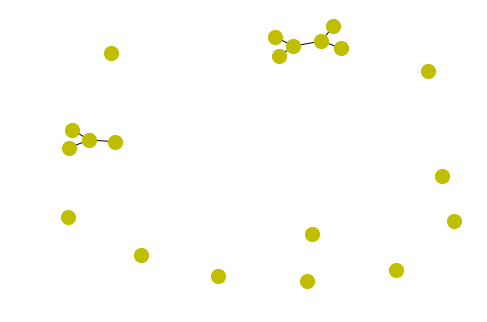

processing ID 296
Skeleton of carbon circles [[12153, 12161, 12162, 12163, 12160], [12155, 12156, 12157, 12158, 12159, 12154], [12149, 12148, 12147, 12152, 12151, 12150]]


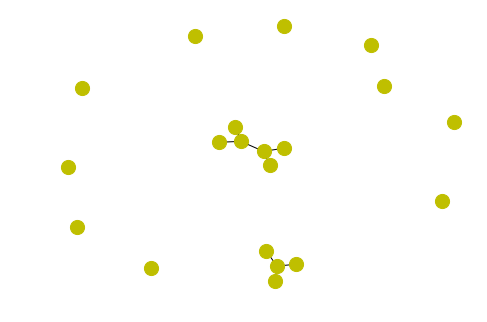

processing ID 297
Skeleton of carbon circles [[12197, 12200, 12199, 12198, 12190], [12192, 12193, 12194, 12195, 12196, 12191], [12185, 12186, 12187, 12188, 12189, 12184]]


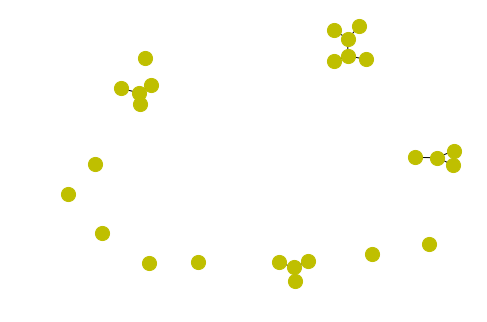

processing ID 298
Skeleton of carbon circles [[12240, 12243, 12242, 12241, 12233], [12235, 12236, 12237, 12238, 12239, 12234], [12228, 12229, 12230, 12231, 12232, 12227]]


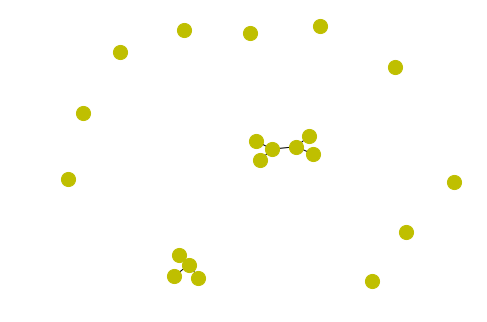

processing ID 299
Skeleton of carbon circles [[12272, 12273, 12274, 12275, 12276, 12271], [12278, 12270, 12277, 12280, 12279], [12266, 12265, 12264, 12269, 12268, 12267]]


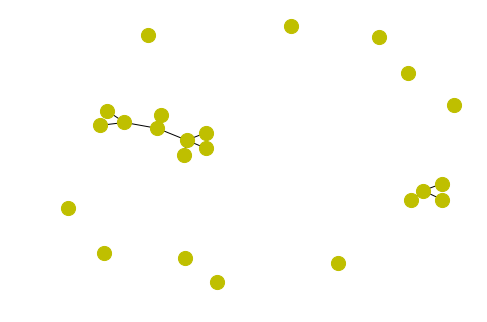

processing ID 300
Skeleton of carbon circles [[12317, 12320, 12319, 12318, 12310], [12312, 12313, 12314, 12315, 12316, 12311], [12305, 12306, 12307, 12308, 12309, 12304]]


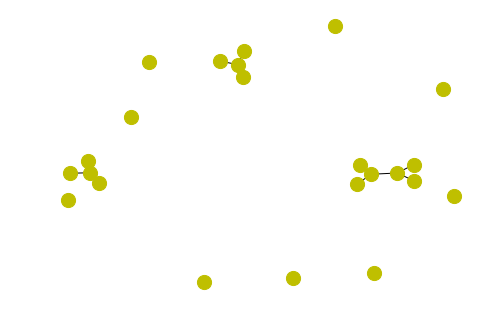

processing ID 301
Skeleton of carbon circles [[12357, 12360, 12359, 12358, 12350], [12352, 12353, 12354, 12355, 12356, 12351], [12345, 12346, 12347, 12348, 12349, 12344]]


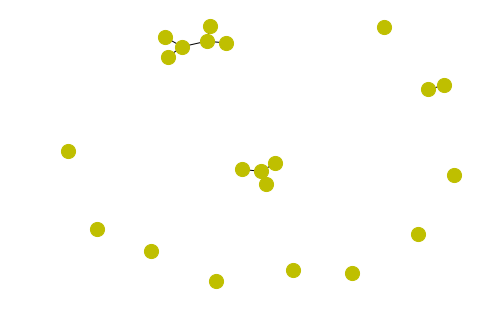

processing ID 302
Skeleton of carbon circles [[12388, 12396, 12397, 12398, 12395], [12384, 12383, 12382, 12387, 12386, 12385], [12392, 12391, 12390, 12389, 12394, 12393]]


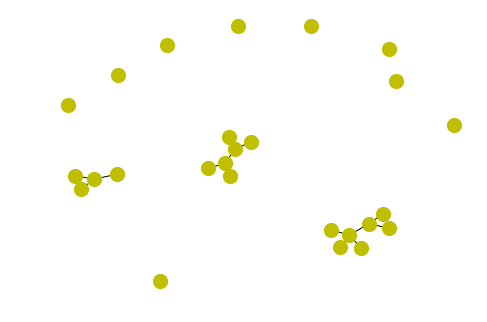

processing ID 303
Skeleton of carbon circles [[12438, 12441, 12440, 12439, 12431], [12433, 12434, 12435, 12436, 12437, 12432], [12426, 12427, 12428, 12429, 12430, 12425]]


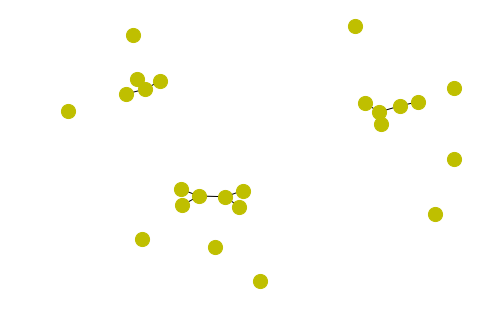

processing ID 304
Skeleton of carbon circles [[12479, 12482, 12481, 12480, 12472], [12474, 12475, 12476, 12477, 12478, 12473], [12467, 12468, 12469, 12470, 12471, 12466]]


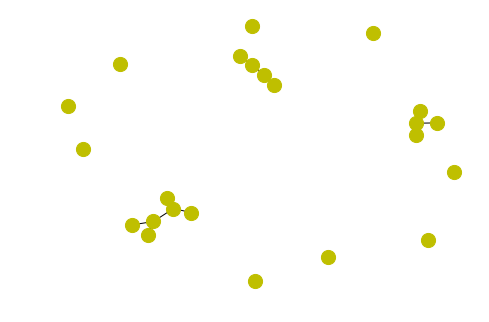

processing ID 305
Skeleton of carbon circles [[12512, 12520, 12521, 12522, 12519], [12508, 12507, 12506, 12511, 12510, 12509], [12515, 12514, 12513, 12518, 12517, 12516]]


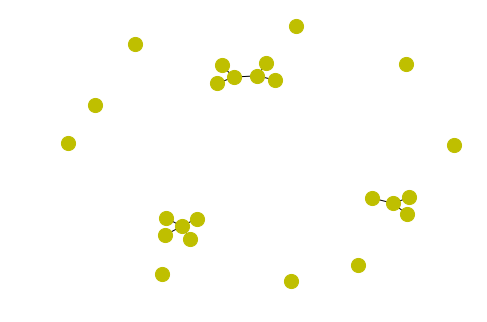

processing ID 306
Skeleton of carbon circles [[12560, 12563, 12562, 12561, 12553], [12555, 12556, 12557, 12558, 12559, 12554], [12548, 12549, 12550, 12551, 12552, 12547]]


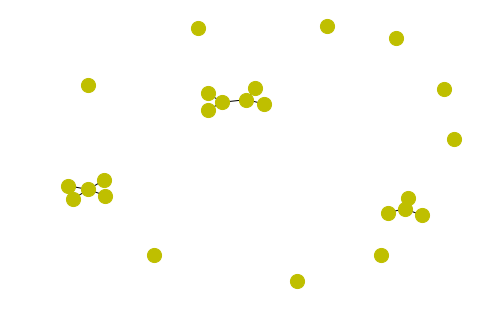

processing ID 307
Skeleton of carbon circles [[12601, 12604, 12603, 12602, 12594], [12596, 12597, 12598, 12599, 12600, 12595], [12589, 12590, 12591, 12592, 12593, 12588]]


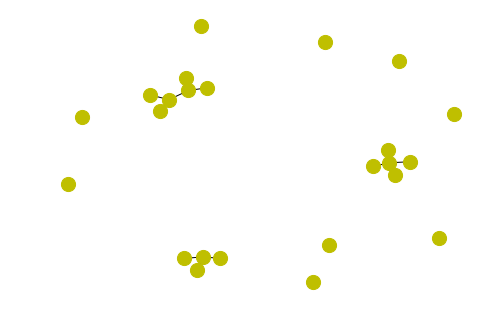

processing ID 308
Skeleton of carbon circles [[12642, 12645, 12644, 12643, 12635], [12637, 12638, 12639, 12640, 12641, 12636], [12630, 12631, 12632, 12633, 12634, 12629]]


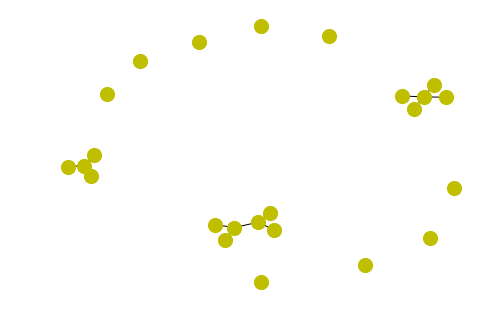

processing ID 309
Skeleton of carbon circles [[12683, 12686, 12685, 12684, 12676], [12678, 12679, 12680, 12681, 12682, 12677], [12671, 12670, 12675, 12674, 12673, 12672]]


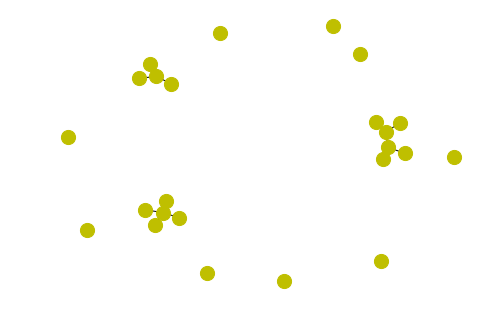

processing ID 310
Skeleton of carbon circles [[12724, 12727, 12726, 12725, 12717], [12719, 12720, 12721, 12722, 12723, 12718], [12712, 12713, 12714, 12715, 12716, 12711]]


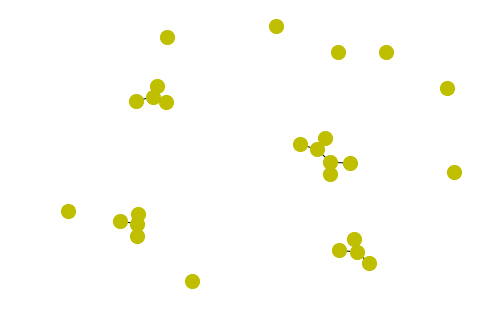

processing ID 311
Skeleton of carbon circles [[12767, 12770, 12769, 12768, 12760], [12762, 12763, 12764, 12765, 12766, 12761], [12755, 12756, 12757, 12758, 12759, 12754]]


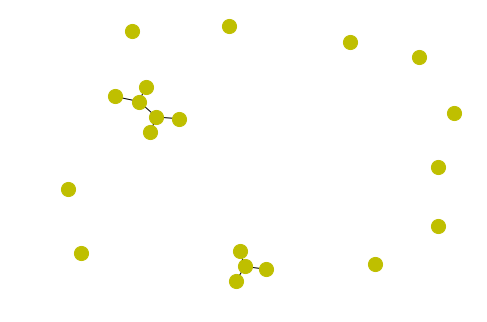

processing ID 312
Skeleton of carbon circles [[12799, 12798, 12803, 12802, 12801, 12800], [12797, 12805, 12806, 12807, 12804], [12793, 12792, 12791, 12796, 12795, 12794]]


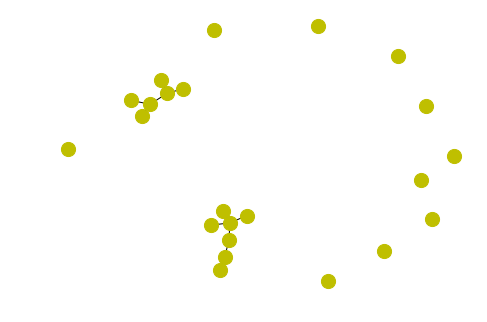

processing ID 313
Skeleton of carbon circles [[12844, 12847, 12846, 12845, 12837], [12839, 12840, 12841, 12842, 12843, 12838], [12832, 12833, 12834, 12835, 12836, 12831]]


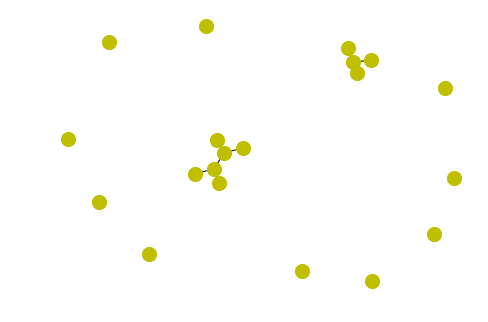

processing ID 314
Skeleton of carbon circles [[12891, 12892, 12893, 12894, 12895, 12890], [12881, 12884, 12883, 12882, 12874], [12876, 12877, 12878, 12879, 12880, 12875], [12869, 12870, 12871, 12872, 12873, 12868]]


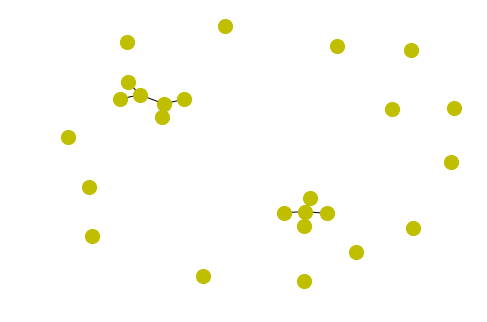

processing ID 315
Skeleton of carbon circles [[12923, 12924, 12925, 12926, 12927, 12928], [12939, 12940, 12941, 12942, 12938], [12922, 12930, 12931, 12932, 12929], [12918, 12917, 12916, 12921, 12920, 12919]]


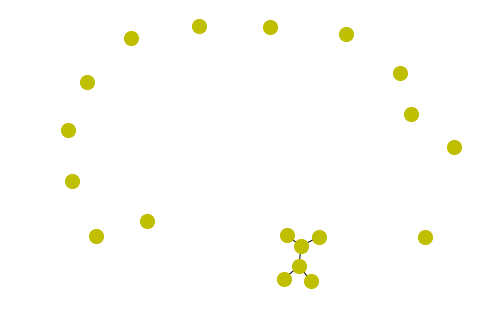

processing ID 316
Skeleton of carbon circles [[12970, 12973, 12972, 12971, 12963], [12965, 12966, 12967, 12968, 12969, 12964], [12958, 12959, 12960, 12961, 12962, 12957]]


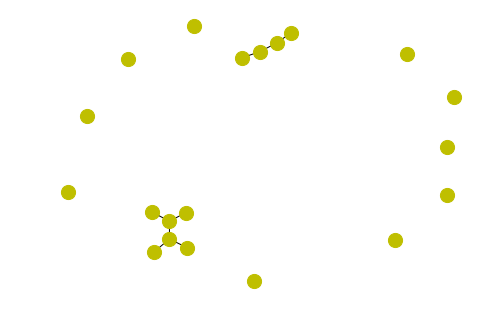

processing ID 317
Skeleton of carbon circles [[13007, 13010, 13009, 13008, 13000], [13002, 13003, 13004, 13005, 13006, 13001], [12995, 12996, 12997, 12998, 12999, 12994]]


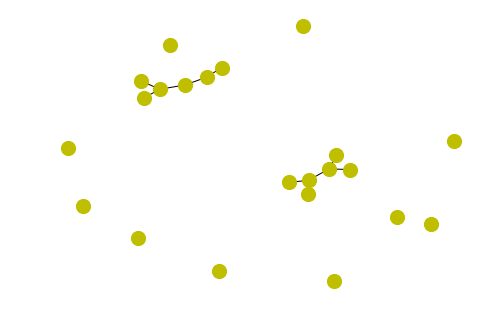

processing ID 318
Skeleton of carbon circles [[13059, 13060, 13061, 13062, 13063, 13058], [13041, 13042, 13043, 13044, 13045, 13040], [13047, 13039, 13046, 13049, 13048], [13035, 13034, 13033, 13038, 13037, 13036]]


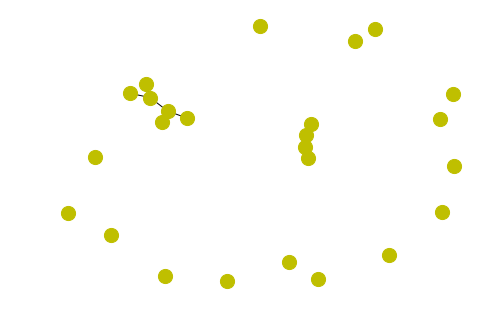

processing ID 319
Skeleton of carbon circles [[13094, 13097, 13096, 13095, 13087], [13089, 13090, 13091, 13092, 13093, 13088], [13082, 13083, 13084, 13085, 13086, 13081]]


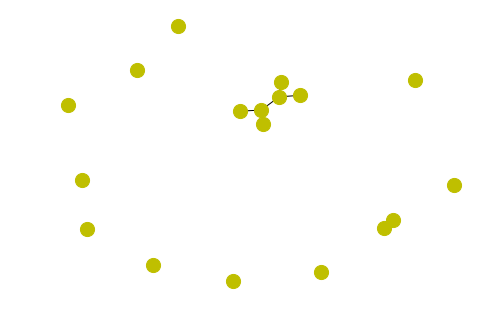

processing ID 320
Skeleton of carbon circles [[13129, 13132, 13131, 13130, 13122], [13124, 13125, 13126, 13127, 13128, 13123], [13117, 13118, 13119, 13120, 13121, 13116]]


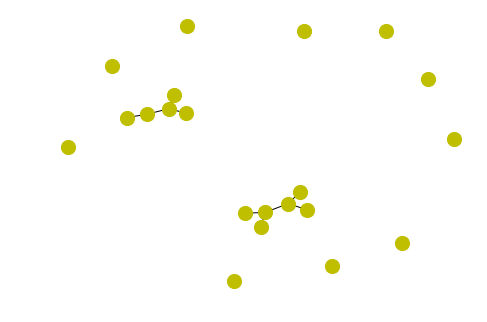

processing ID 321
Skeleton of carbon circles [[13179, 13180, 13181, 13182, 13183, 13184], [13162, 13163, 13164, 13165, 13166, 13161], [13168, 13160, 13167, 13170, 13169], [13156, 13155, 13154, 13159, 13158, 13157]]


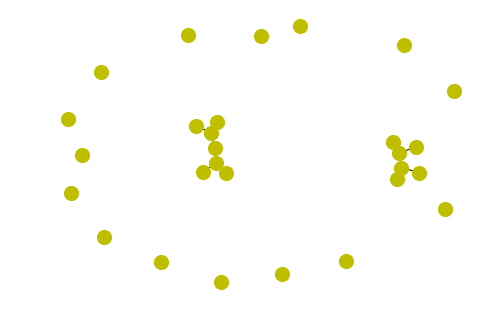

processing ID 322
Skeleton of carbon circles [[13218, 13221, 13220, 13219, 13211], [13213, 13214, 13215, 13216, 13217, 13212], [13206, 13207, 13208, 13209, 13210, 13205]]


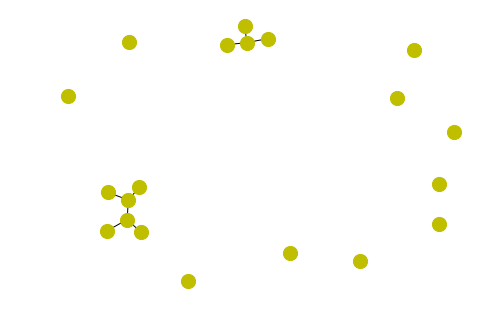

processing ID 323
Skeleton of carbon circles [[13255, 13258, 13257, 13256, 13248], [13250, 13251, 13252, 13253, 13254, 13249], [13243, 13244, 13245, 13246, 13247, 13242]]


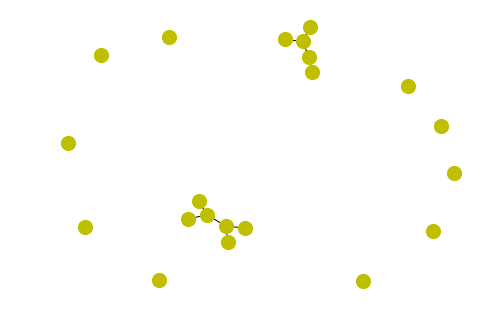

processing ID 324
Skeleton of carbon circles [[13293, 13286, 13294, 13295, 13296], [13282, 13281, 13280, 13285, 13284, 13283], [13288, 13289, 13290, 13291, 13292, 13287]]


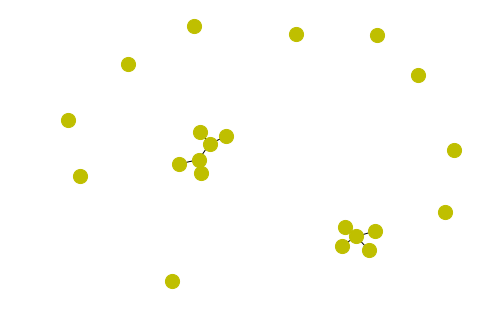

processing ID 325
Skeleton of carbon circles [[13331, 13334, 13333, 13332, 13324], [13326, 13327, 13328, 13329, 13330, 13325], [13319, 13320, 13321, 13322, 13323, 13318]]


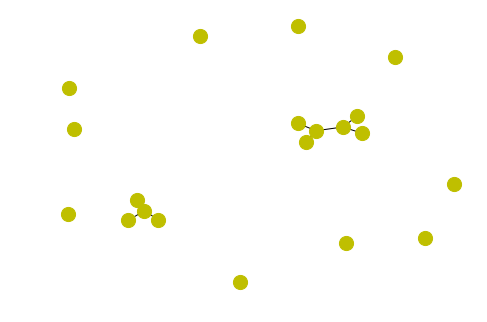

processing ID 326
Skeleton of carbon circles [[13368, 13371, 13370, 13369, 13361], [13363, 13364, 13365, 13366, 13367, 13362], [13356, 13357, 13358, 13359, 13360, 13355]]


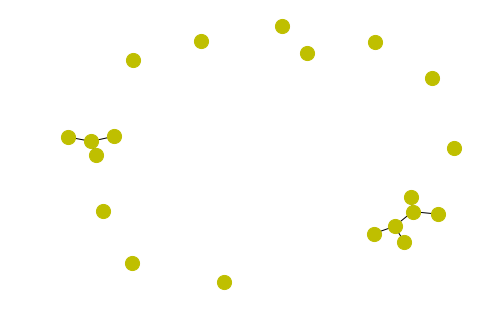

processing ID 327
Skeleton of carbon circles [[13405, 13408, 13407, 13406, 13398], [13400, 13401, 13402, 13403, 13404, 13399], [13393, 13394, 13395, 13396, 13397, 13392]]


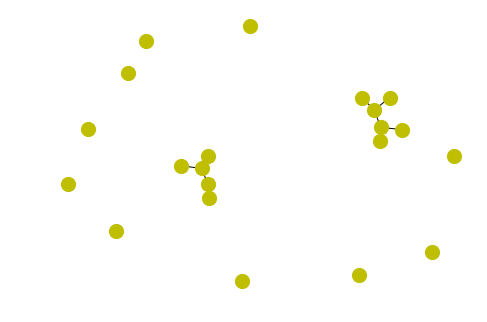

processing ID 328
Skeleton of carbon circles [[13436, 13444, 13445, 13446, 13443], [13432, 13431, 13430, 13435, 13434, 13433], [13439, 13438, 13437, 13442, 13441, 13440]]


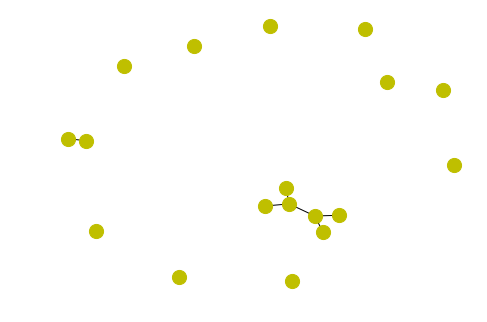

processing ID 329
Skeleton of carbon circles [[13478, 13481, 13480, 13479, 13471], [13473, 13474, 13475, 13476, 13477, 13472], [13466, 13467, 13468, 13469, 13470, 13465]]


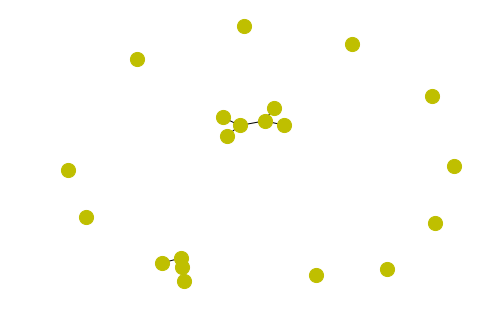

processing ID 330
Skeleton of carbon circles [[13515, 13518, 13517, 13516, 13508], [13510, 13511, 13512, 13513, 13514, 13509], [13503, 13504, 13505, 13506, 13507, 13502]]


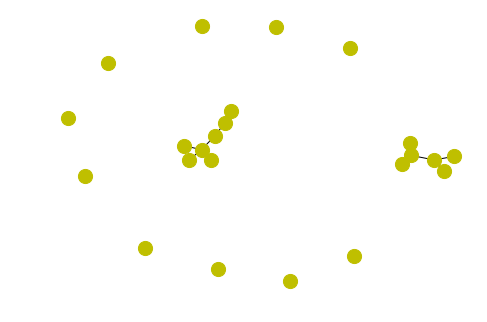

processing ID 331
Skeleton of carbon circles [[13555, 13558, 13557, 13556, 13548], [13550, 13551, 13552, 13553, 13554, 13549], [13542, 13547, 13546, 13545, 13544, 13543]]


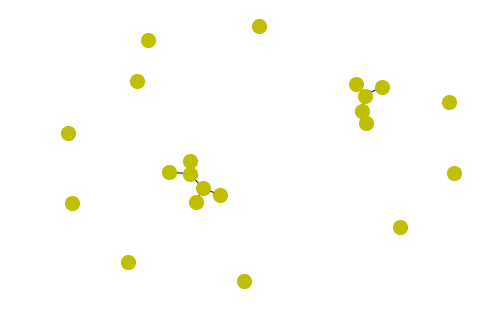

processing ID 332
Skeleton of carbon circles [[13593, 13596, 13595, 13594, 13586], [13588, 13589, 13590, 13591, 13592, 13587], [13581, 13582, 13583, 13584, 13585, 13580]]


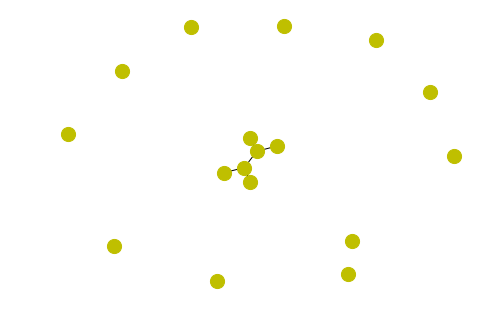

processing ID 333
Skeleton of carbon circles [[13627, 13630, 13629, 13628, 13620], [13622, 13623, 13624, 13625, 13626, 13621], [13615, 13616, 13617, 13618, 13619, 13614]]


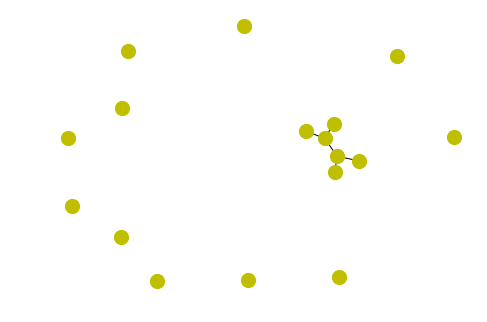

processing ID 334
Skeleton of carbon circles [[13661, 13664, 13663, 13662, 13654], [13656, 13657, 13658, 13659, 13660, 13655], [13649, 13650, 13651, 13652, 13653, 13648]]


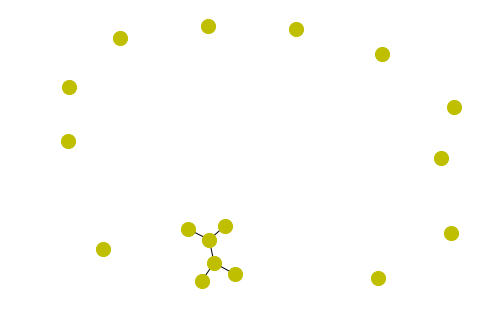

processing ID 335
Skeleton of carbon circles [[13688, 13695, 13698, 13697, 13696], [13690, 13691, 13692, 13693, 13694, 13689], [13684, 13683, 13682, 13687, 13686, 13685]]


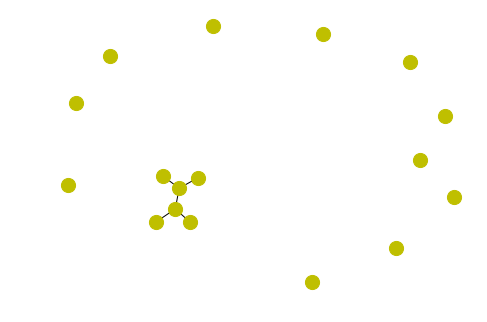

processing ID 336
Skeleton of carbon circles [[13729, 13732, 13731, 13730, 13722], [13724, 13725, 13726, 13727, 13728, 13723], [13717, 13718, 13719, 13720, 13721, 13716]]


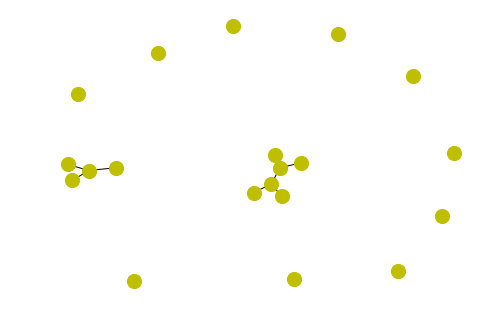

processing ID 337
Skeleton of carbon circles [[13766, 13769, 13768, 13767, 13759], [13761, 13762, 13763, 13764, 13765, 13760], [13754, 13755, 13756, 13757, 13758, 13753]]


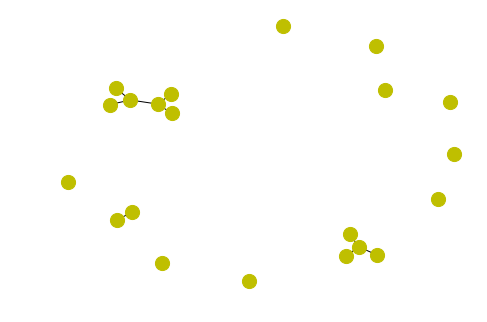

processing ID 338
Skeleton of carbon circles [[13799, 13800, 13801, 13802, 13803, 13798], [13805, 13797, 13804, 13807, 13806], [13793, 13792, 13791, 13796, 13795, 13794]]


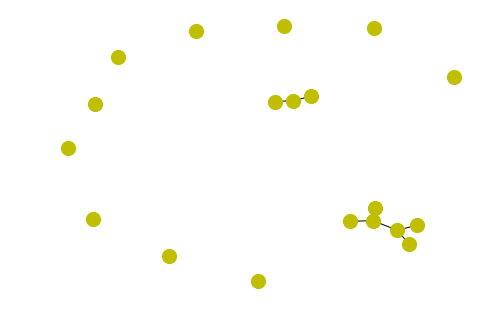

processing ID 339
Skeleton of carbon circles [[13840, 13843, 13842, 13841, 13833], [13835, 13836, 13837, 13838, 13839, 13834], [13828, 13829, 13830, 13831, 13832, 13827]]


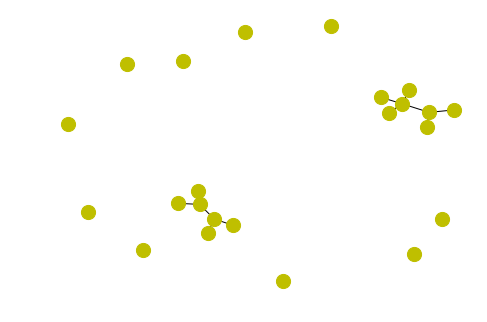

processing ID 340
Skeleton of carbon circles [[13880, 13883, 13882, 13881, 13873], [13875, 13876, 13877, 13878, 13879, 13874], [13868, 13869, 13870, 13871, 13872, 13867]]


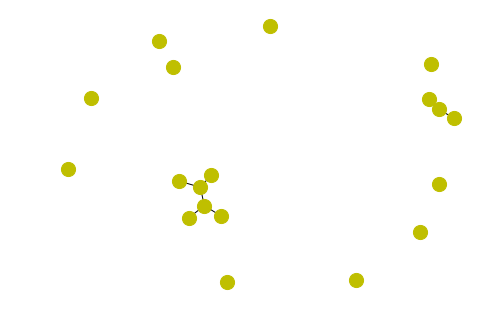

processing ID 341
Skeleton of carbon circles [[13916, 13919, 13918, 13917, 13909], [13911, 13912, 13913, 13914, 13915, 13910], [13904, 13905, 13906, 13907, 13908, 13903]]


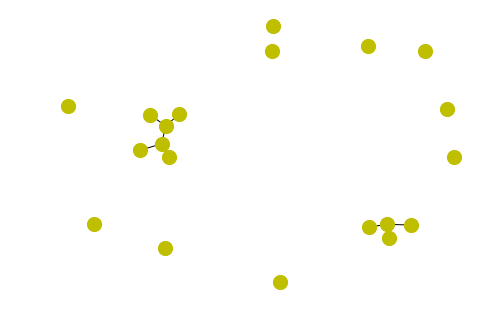

processing ID 342
Skeleton of carbon circles [[13947, 13948, 13949, 13950, 13951, 13952], [13946, 13954, 13955, 13956, 13953], [13942, 13941, 13940, 13945, 13944, 13943]]


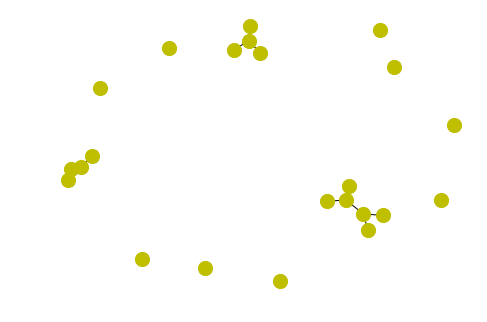

processing ID 343
Skeleton of carbon circles [[13993, 13996, 13995, 13994, 13986], [13988, 13989, 13990, 13991, 13992, 13987], [13981, 13982, 13983, 13984, 13985, 13980]]


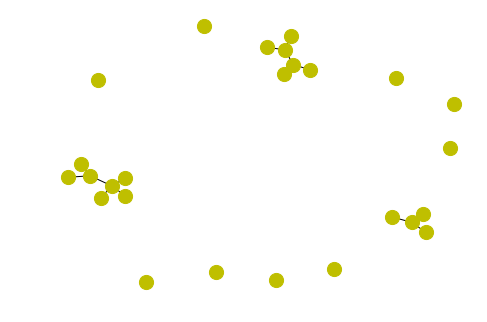

processing ID 344
Skeleton of carbon circles [[14036, 14039, 14038, 14037, 14029], [14031, 14032, 14033, 14034, 14035, 14030], [14024, 14025, 14026, 14027, 14028, 14023]]


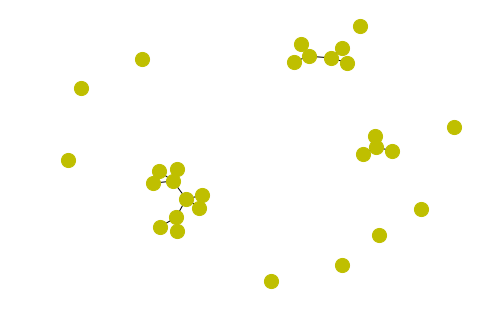

processing ID 345
Skeleton of carbon circles [[14075, 14083, 14084, 14085, 14082], [14071, 14070, 14069, 14074, 14073, 14072], [14079, 14078, 14077, 14076, 14081, 14080]]


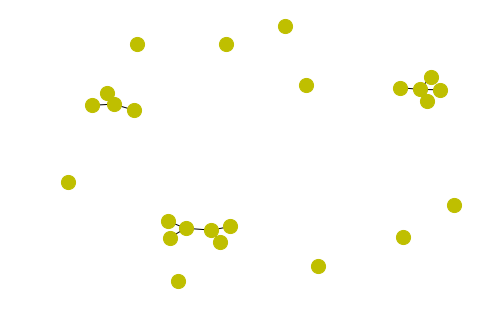

processing ID 346
Skeleton of carbon circles [[14123, 14126, 14125, 14124, 14116], [14118, 14119, 14120, 14121, 14122, 14117], [14111, 14112, 14113, 14114, 14115, 14110]]


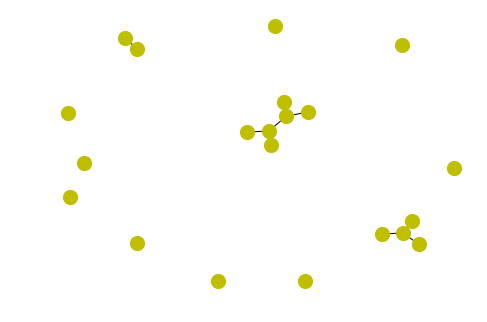

processing ID 347
Skeleton of carbon circles [[14161, 14164, 14163, 14162, 14154], [14156, 14157, 14158, 14159, 14160, 14155], [14149, 14150, 14151, 14152, 14153, 14148]]


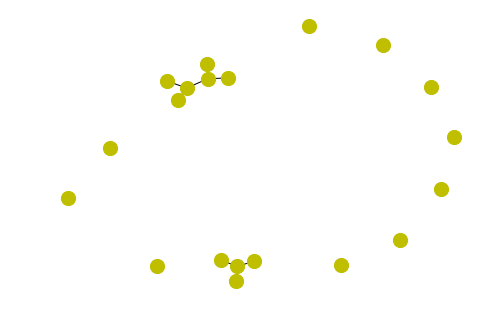

processing ID 348
Skeleton of carbon circles [[14191, 14199, 14200, 14201, 14198], [14187, 14186, 14185, 14190, 14189, 14188], [14194, 14193, 14192, 14197, 14196, 14195]]


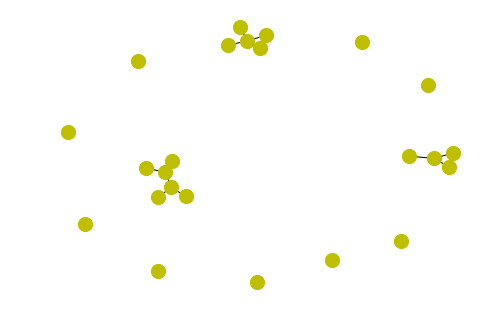

processing ID 349
Skeleton of carbon circles [[14239, 14242, 14241, 14240, 14232], [14234, 14235, 14236, 14237, 14238, 14233], [14227, 14228, 14229, 14230, 14231, 14226]]


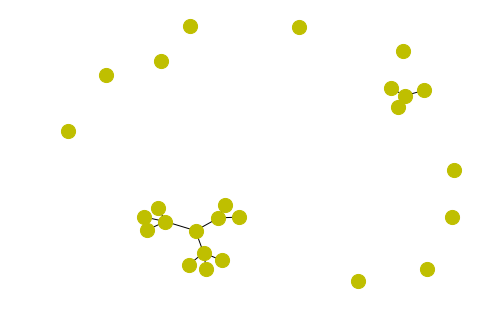

processing ID 350
Skeleton of carbon circles [[14282, 14285, 14284, 14283, 14275], [14277, 14278, 14279, 14280, 14281, 14276], [14270, 14271, 14272, 14273, 14274, 14269]]


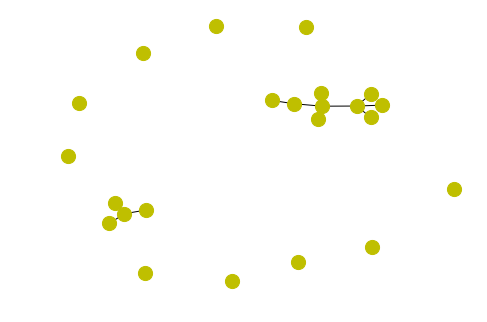

processing ID 351
Skeleton of carbon circles [[14312, 14311, 14310, 14309, 14314, 14313], [14322, 14325, 14324, 14323, 14315], [14317, 14318, 14319, 14320, 14321, 14316]]


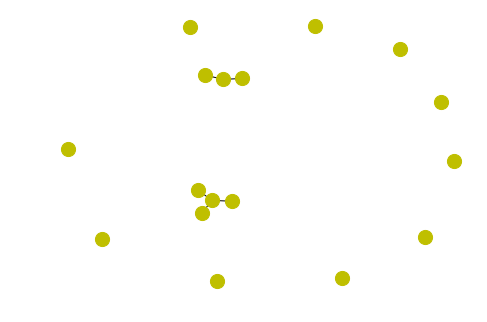

processing ID 352
Skeleton of carbon circles [[14356, 14359, 14358, 14357, 14349], [14351, 14352, 14353, 14354, 14355, 14350], [14344, 14345, 14346, 14347, 14348, 14343]]


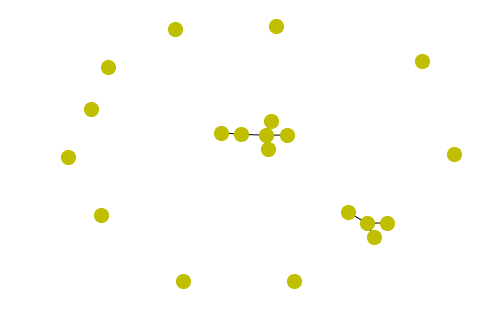

processing ID 353
Skeleton of carbon circles [[14393, 14396, 14395, 14394, 14386], [14388, 14389, 14390, 14391, 14392, 14387], [14381, 14382, 14383, 14384, 14385, 14380]]


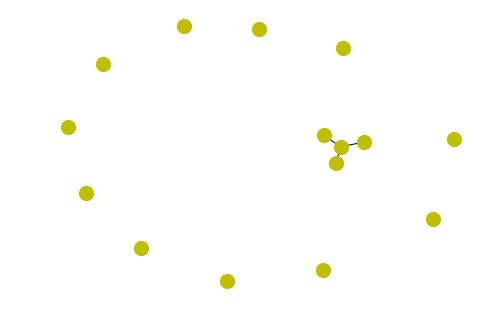

processing ID 354
Skeleton of carbon circles [[14425, 14428, 14427, 14426, 14418], [14420, 14421, 14422, 14423, 14424, 14419], [14413, 14414, 14415, 14416, 14417, 14412]]


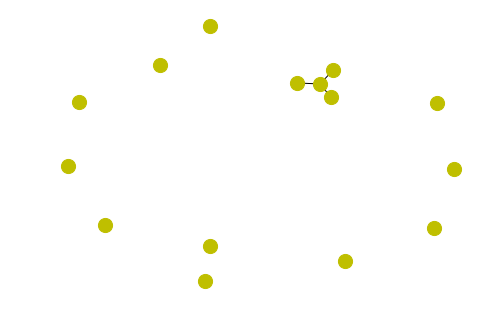

processing ID 355
Skeleton of carbon circles [[14452, 14453, 14454, 14455, 14456, 14451], [14458, 14450, 14457, 14460, 14459], [14446, 14445, 14444, 14449, 14448, 14447]]


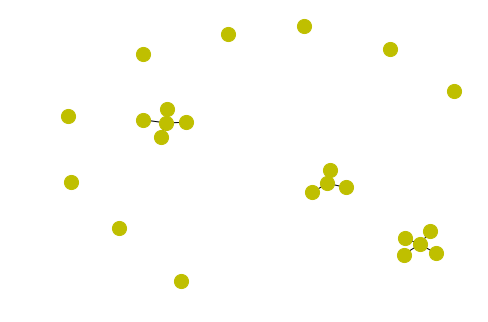

processing ID 356
Skeleton of carbon circles [[14497, 14500, 14499, 14498, 14490], [14492, 14493, 14494, 14495, 14496, 14491], [14485, 14486, 14487, 14488, 14489, 14484]]


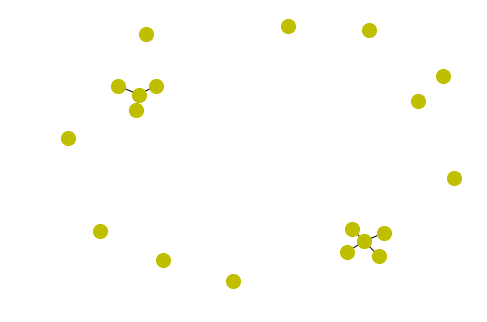

processing ID 357
Skeleton of carbon circles [[14533, 14536, 14535, 14534, 14526], [14528, 14529, 14530, 14531, 14532, 14527], [14521, 14522, 14523, 14524, 14525, 14520]]


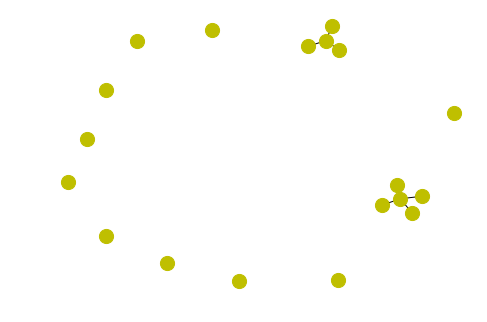

processing ID 358
Skeleton of carbon circles [[14569, 14572, 14571, 14570, 14562], [14564, 14565, 14566, 14567, 14568, 14563], [14557, 14558, 14559, 14560, 14561, 14556]]


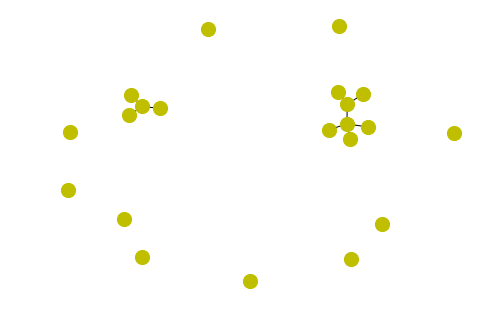

processing ID 359
Skeleton of carbon circles [[14607, 14610, 14609, 14608, 14600], [14602, 14603, 14604, 14605, 14606, 14601], [14595, 14596, 14597, 14598, 14599, 14594]]


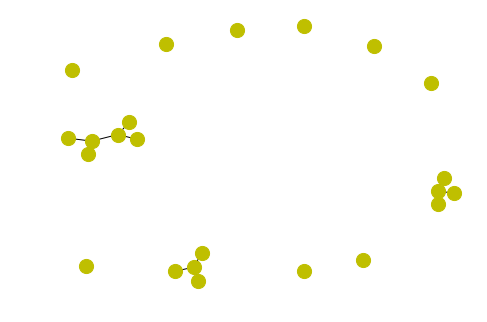

processing ID 360
Skeleton of carbon circles [[14642, 14645, 14644, 14643, 14640], [14650, 14651, 14652, 14653, 14654, 14641], [14635, 14636, 14637, 14638, 14639, 14634]]


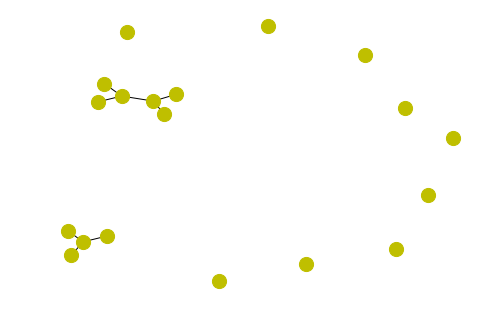

processing ID 361
Skeleton of carbon circles [[14678, 14681, 14680, 14679, 14676], [14686, 14687, 14688, 14689, 14690, 14677], [14671, 14672, 14673, 14674, 14675, 14670]]


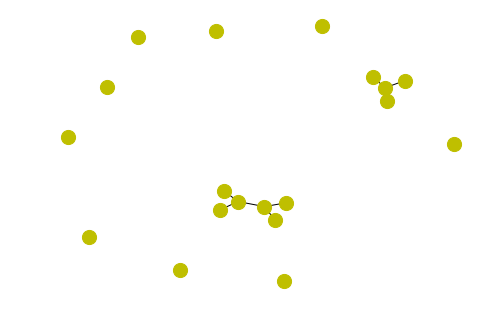

processing ID 362
Skeleton of carbon circles [[14714, 14717, 14716, 14715, 14712], [14722, 14723, 14724, 14725, 14726, 14713], [14707, 14708, 14709, 14710, 14711, 14706]]


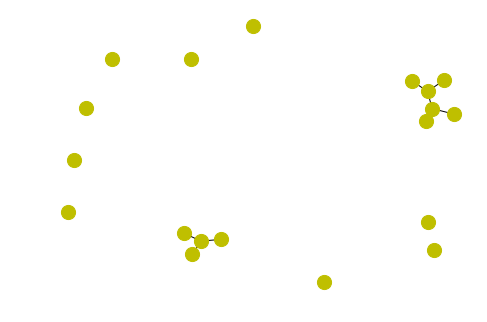

processing ID 363
Skeleton of carbon circles [[14750, 14753, 14752, 14751, 14748], [14754, 14755, 14756, 14757, 14749], [14743, 14744, 14745, 14746, 14747, 14742]]


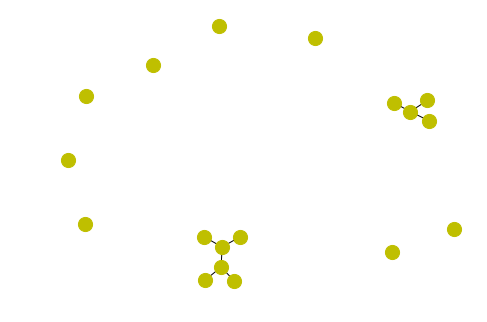

processing ID 364
Skeleton of carbon circles [[14784, 14787, 14786, 14785, 14782], [14788, 14789, 14790, 14791, 14783], [14777, 14778, 14779, 14780, 14781, 14776]]


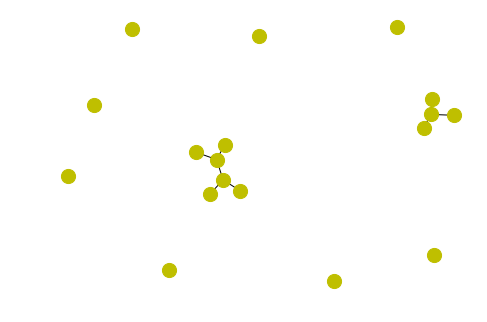

processing ID 365
Skeleton of carbon circles [[14831, 14830, 14824, 14825, 14833, 14832], [14817, 14822, 14823, 14824, 14825], [14816, 14819, 14820, 14821, 14818], [14812, 14811, 14810, 14815, 14814, 14813]]


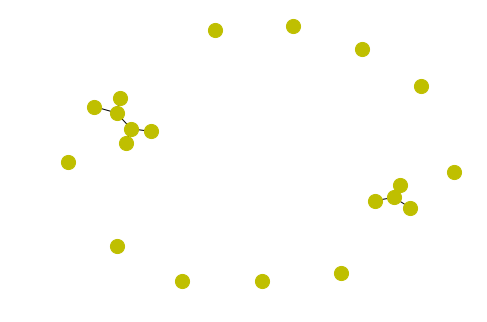

processing ID 366
Skeleton of carbon circles [[14858, 14861, 14860, 14859, 14856], [14863, 14874, 14875, 14876, 14877, 14864], [14862, 14863, 14864, 14865, 14857], [14851, 14852, 14853, 14854, 14855, 14850]]


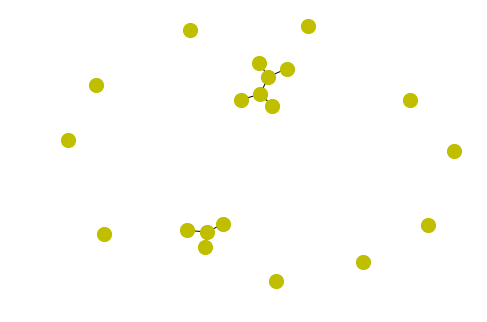

processing ID 367
Skeleton of carbon circles [[14898, 14901, 14900, 14899, 14896], [14910, 14911, 14912, 14913, 14914, 14897], [14891, 14892, 14893, 14894, 14895, 14890]]


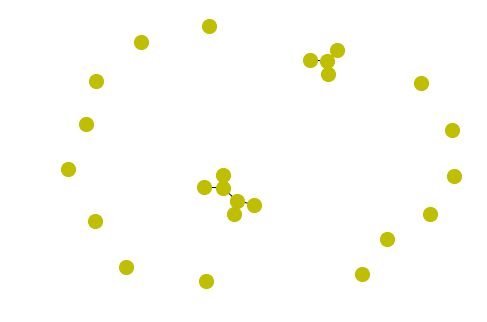

processing ID 368
Skeleton of carbon circles [[14939, 14942, 14941, 14940, 14937], [14953, 14956, 14957, 14958, 14954], [14951, 14952, 14953, 14954, 14955, 14938], [14932, 14933, 14934, 14935, 14936, 14931]]


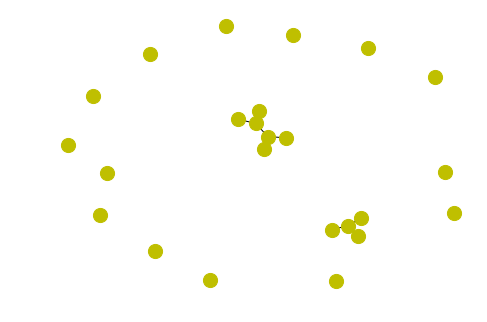

processing ID 369
Skeleton of carbon circles [[14983, 14986, 14985, 14984, 14981], [14997, 15000, 15001, 15002, 15003, 14998], [14995, 14996, 14997, 14998, 14999, 14982], [14975, 14980, 14979, 14978, 14977, 14976]]


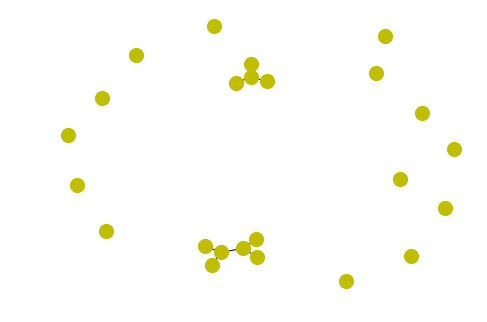

processing ID 370
Skeleton of carbon circles [[15028, 15031, 15030, 15029, 15026], [15042, 15045, 15046, 15047, 15043], [15040, 15041, 15042, 15043, 15044, 15027], [15021, 15022, 15023, 15024, 15025, 15020]]


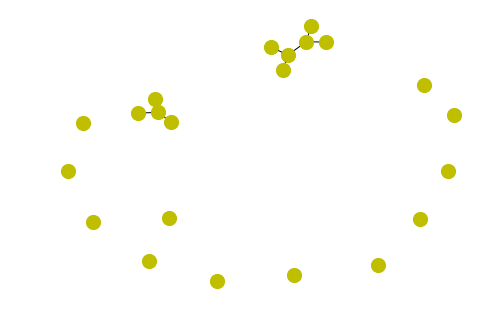

processing ID 371
Skeleton of carbon circles [[15085, 15089, 15088, 15087, 15084], [15082, 15069, 15086, 15085, 15084, 15083], [15068, 15071, 15072, 15073, 15070], [15064, 15063, 15062, 15067, 15066, 15065]]


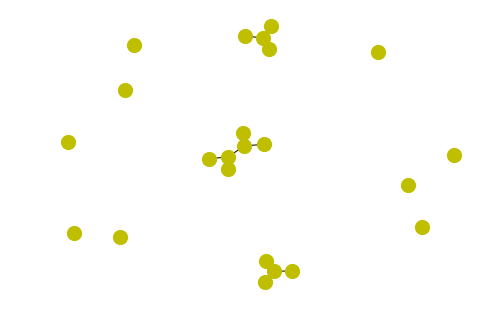

processing ID 372
Skeleton of carbon circles [[15113, 15116, 15115, 15114, 15111], [15117, 15118, 15119, 15120, 15112], [15106, 15107, 15108, 15109, 15110, 15105]]


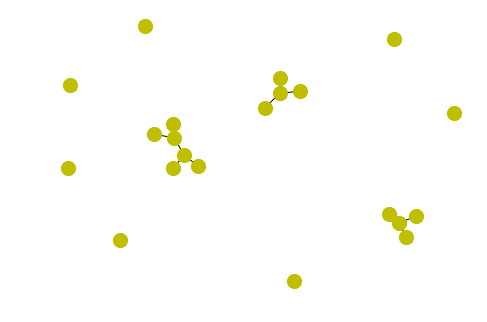

processing ID 373
Skeleton of carbon circles [[15150, 15153, 15152, 15151, 15148], [15160, 15163, 15164, 15165, 15161], [15158, 15159, 15160, 15161, 15162, 15149], [15143, 15144, 15145, 15146, 15147, 15142]]


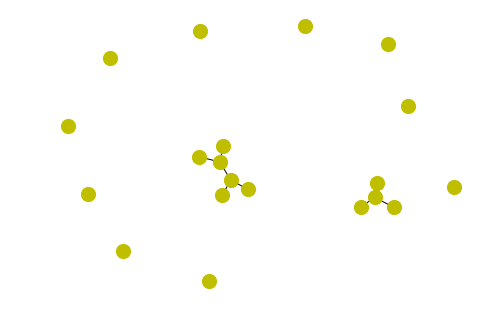

processing ID 374
Skeleton of carbon circles [[15194, 15195, 15196, 15197, 15198, 15188], [15199, 15200, 15185], [15183, 15184, 15185, 15186, 15182], [15189, 15190, 15191, 15192, 15193, 15187]]


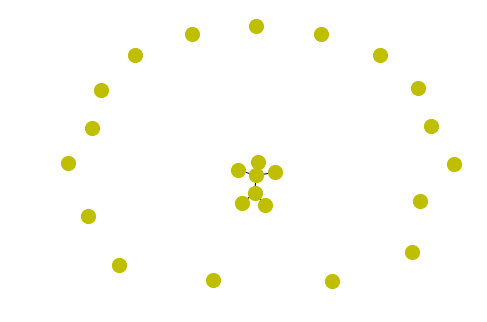

processing ID 375
Skeleton of carbon circles [[15230, 15236, 15235, 15234, 15233, 15232], [15242, 15243, 15228], [15225, 15229, 15228, 15227, 15226], [15237, 15238, 15239, 15240, 15241, 15231]]


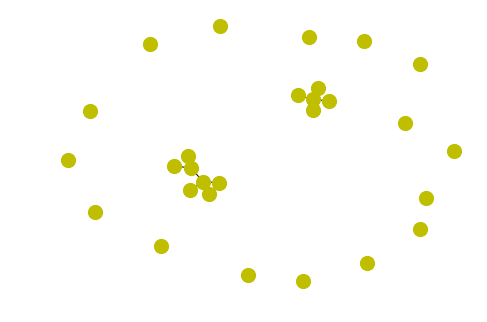

processing ID 376
Skeleton of carbon circles [[15284, 15285, 15286, 15287, 15288, 15278], [15289, 15290, 15275], [15273, 15274, 15275, 15276, 15272], [15279, 15280, 15281, 15282, 15283, 15277]]


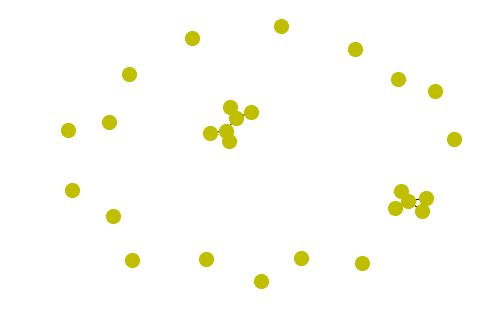

processing ID 377
Skeleton of carbon circles [[15330, 15331, 15332, 15333, 15334, 15324], [15335, 15336, 15321], [15319, 15320, 15321, 15322, 15318], [15325, 15326, 15327, 15328, 15329, 15323]]


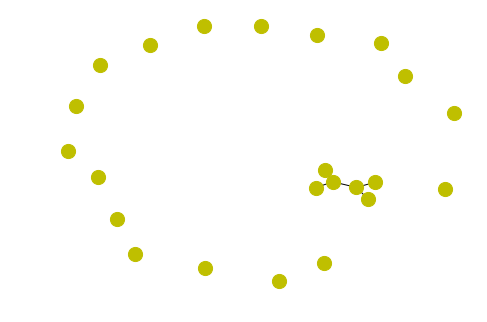

processing ID 378
Skeleton of carbon circles [[15372, 15373, 15374, 15375, 15376, 15366], [15377, 15378, 15363], [15361, 15362, 15363, 15364, 15360], [15367, 15368, 15369, 15370, 15371, 15365]]


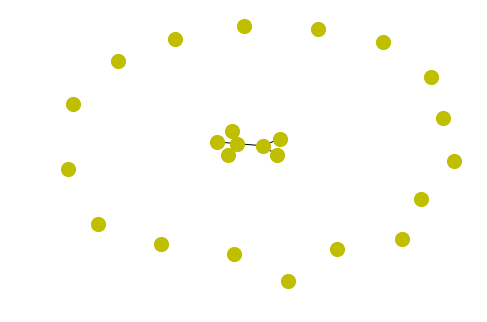

processing ID 379
Skeleton of carbon circles [[15415, 15416, 15417, 15418, 15419, 15409], [15420, 15421, 15406], [15404, 15405, 15406, 15407, 15403], [15410, 15411, 15412, 15413, 15414, 15408]]


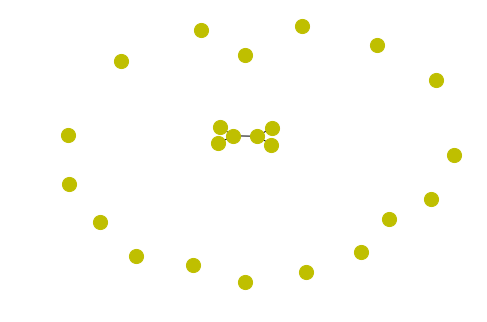

processing ID 380
Skeleton of carbon circles [[15453, 15452, 15450, 15456, 15455, 15454], [15462, 15463, 15448], [15445, 15449, 15448, 15447, 15446], [15457, 15458, 15459, 15460, 15461, 15451]]


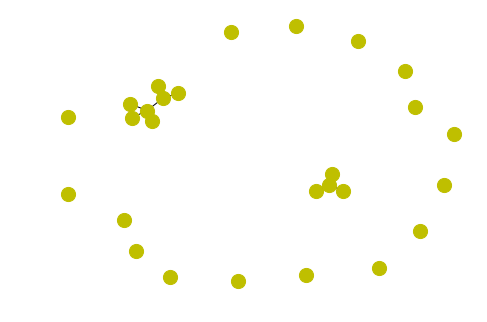

processing ID 381
Skeleton of carbon circles [[15503, 15504, 15505, 15506, 15507, 15497], [15508, 15509, 15494], [15492, 15493, 15494, 15495, 15491], [15498, 15499, 15500, 15501, 15502, 15496]]


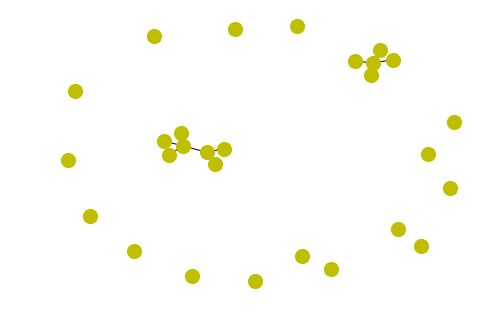

processing ID 382
Skeleton of carbon circles [[15550, 15551, 15552, 15553, 15554, 15544], [15555, 15556, 15541], [15539, 15540, 15541, 15542, 15538], [15545, 15546, 15547, 15548, 15549, 15543]]


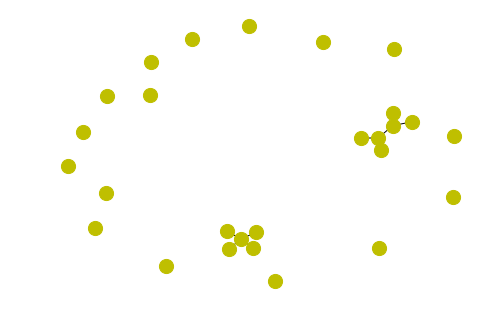

processing ID 383
Skeleton of carbon circles [[15589, 15595, 15594, 15593, 15592, 15591], [15601, 15602, 15587], [15584, 15588, 15587, 15586, 15585], [15596, 15597, 15598, 15599, 15600, 15590]]


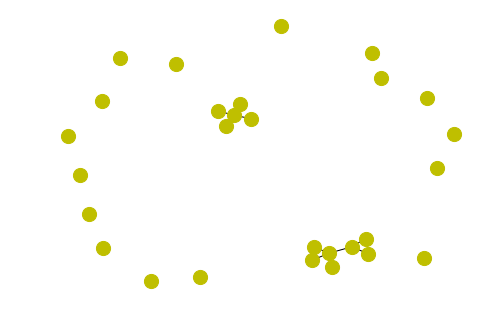

processing ID 384
Skeleton of carbon circles [[15643, 15644, 15645, 15646, 15647, 15637], [15648, 15649, 15634], [15632, 15633, 15634, 15635, 15631], [15638, 15639, 15640, 15641, 15642, 15636]]


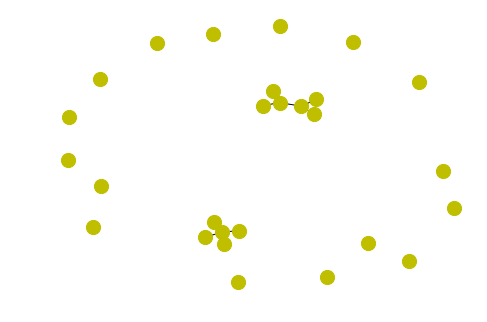

processing ID 385
Skeleton of carbon circles [[15689, 15690, 15691, 15692, 15693, 15683], [15694, 15695, 15680], [15678, 15679, 15680, 15681, 15677], [15684, 15685, 15686, 15687, 15688, 15682]]


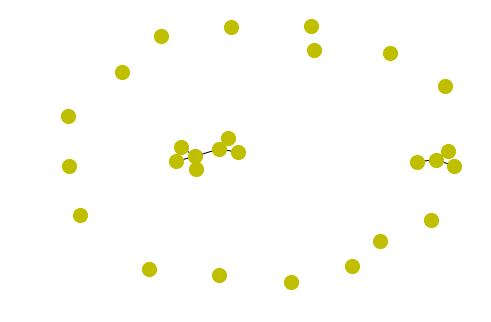

processing ID 386
Skeleton of carbon circles [[15731, 15730, 15728, 15734, 15733, 15732], [15740, 15741, 15726], [15723, 15727, 15726, 15725, 15724], [15735, 15736, 15737, 15738, 15739, 15729]]


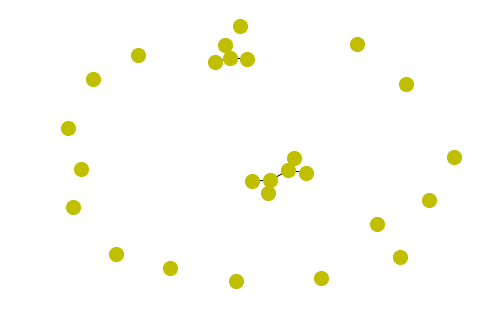

processing ID 387
Skeleton of carbon circles [[15780, 15781, 15782, 15783, 15784, 15774], [15785, 15786, 15771], [15769, 15770, 15771, 15772, 15768], [15775, 15776, 15777, 15778, 15779, 15773]]


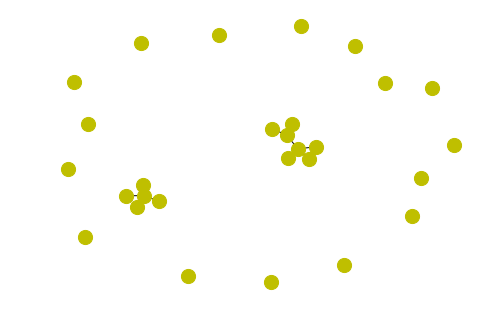

processing ID 388
Skeleton of carbon circles [[15827, 15828, 15829, 15830, 15831, 15821], [15832, 15833, 15818], [15816, 15817, 15818, 15819, 15815], [15822, 15823, 15824, 15825, 15826, 15820]]


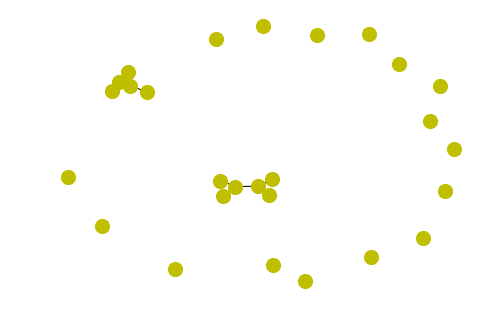

processing ID 389
Skeleton of carbon circles [[15866, 15868, 15869, 15870, 15871, 15872], [15878, 15879, 15864], [15861, 15865, 15864, 15863, 15862], [15873, 15874, 15875, 15876, 15877, 15867]]


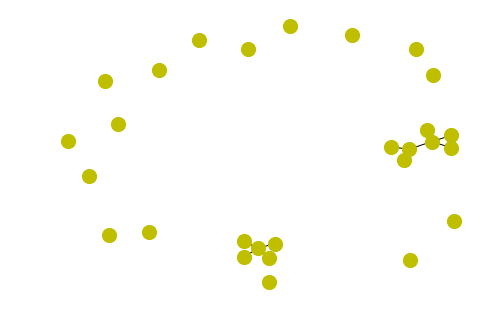

processing ID 390
Skeleton of carbon circles [[15920, 15921, 15922, 15923, 15924, 15914], [15925, 15926, 15911], [15909, 15910, 15911, 15912, 15908], [15915, 15916, 15917, 15918, 15919, 15913]]


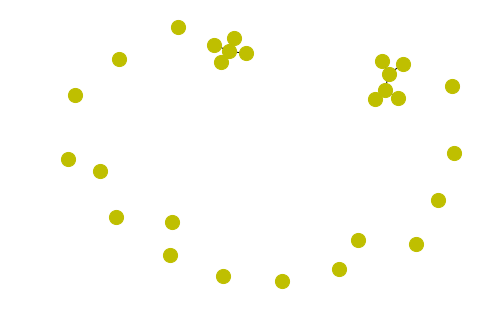

processing ID 391
Skeleton of carbon circles [[15967, 15977, 15979, 15978, 15968], [15966, 15967, 15968, 15969, 15970, 15960], [15971, 15972, 15957], [15955, 15956, 15957, 15958, 15954], [15961, 15962, 15963, 15964, 15965, 15959]]


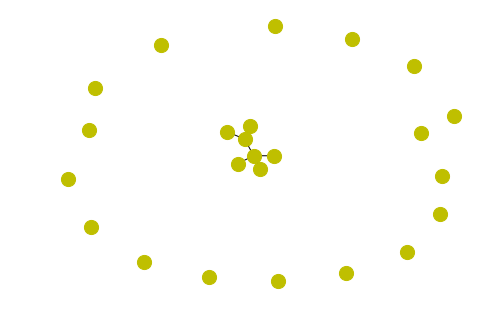

processing ID 392
Skeleton of carbon circles [[16012, 16013, 16014, 16015, 16016, 16006], [16017, 16018, 16003], [16001, 16002, 16003, 16004, 16000], [16007, 16008, 16009, 16010, 16011, 16005]]


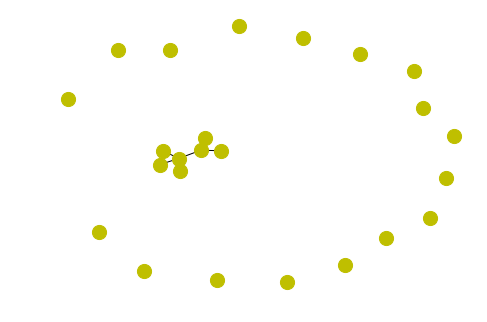

processing ID 393
Skeleton of carbon circles [[16055, 16056, 16057, 16058, 16059, 16049], [16060, 16061, 16046], [16044, 16045, 16046, 16047, 16043], [16050, 16051, 16052, 16053, 16054, 16048]]


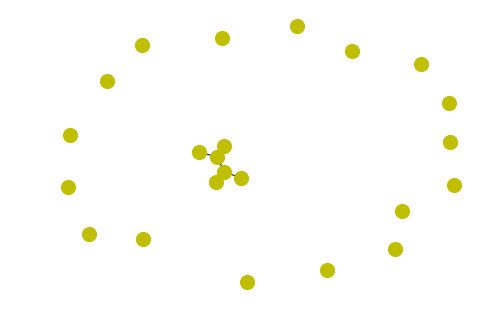

processing ID 394
Skeleton of carbon circles [[16097, 16098, 16099, 16100, 16101, 16091], [16102, 16103, 16088], [16086, 16087, 16088, 16089, 16085], [16092, 16093, 16094, 16095, 16096, 16090]]


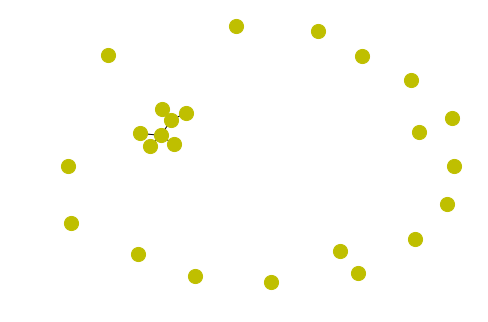

processing ID 395
Skeleton of carbon circles [[16140, 16141, 16142, 16143, 16144, 16134], [16145, 16146, 16131], [16129, 16130, 16131, 16132, 16128], [16135, 16136, 16137, 16138, 16139, 16133]]


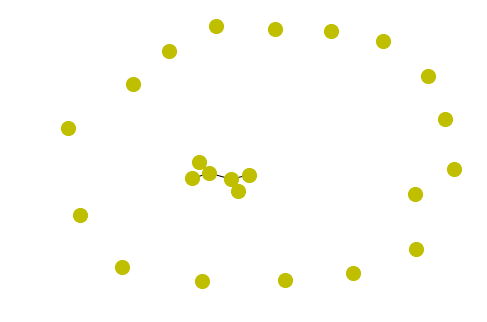

processing ID 396
Skeleton of carbon circles [[16182, 16183, 16184, 16185, 16186, 16176], [16187, 16188, 16173], [16171, 16172, 16173, 16174, 16170], [16177, 16178, 16179, 16180, 16181, 16175]]


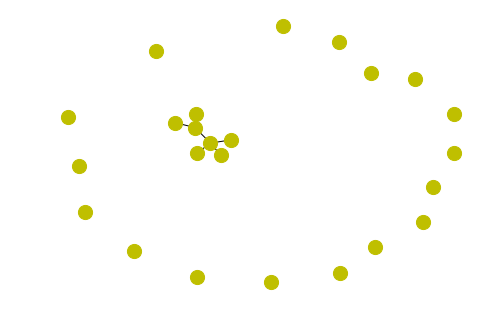

processing ID 397
Skeleton of carbon circles [[16225, 16226, 16227, 16228, 16229, 16219], [16230, 16231, 16216], [16214, 16215, 16216, 16217, 16213], [16220, 16221, 16222, 16223, 16224, 16218]]


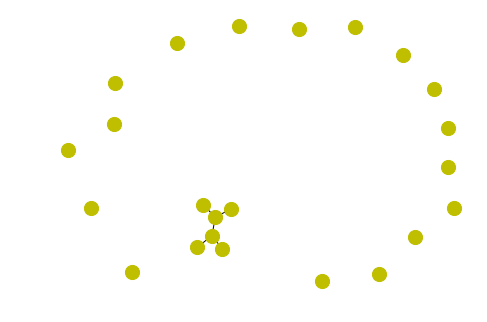

processing ID 398
Skeleton of carbon circles [[16262, 16263, 16264, 16265, 16266, 16260], [16272, 16273, 16258], [16255, 16259, 16258, 16257, 16256], [16267, 16268, 16269, 16270, 16271, 16261]]


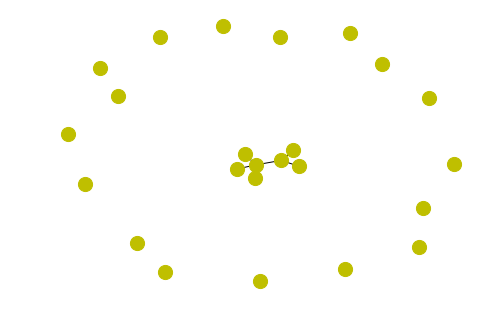

processing ID 399
Skeleton of carbon circles [[16310, 16311, 16312, 16313, 16314, 16304], [16315, 16316, 16301], [16299, 16300, 16301, 16302, 16298], [16305, 16306, 16307, 16308, 16309, 16303]]


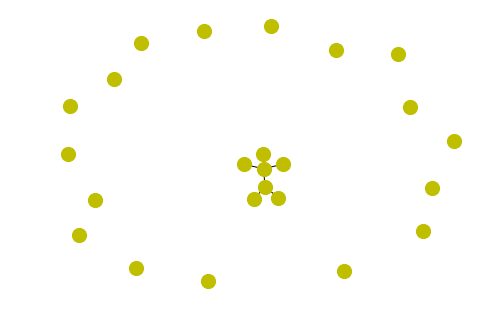

processing ID 400
Skeleton of carbon circles [[16349, 16348, 16346, 16352, 16351, 16350], [16358, 16359, 16344], [16341, 16345, 16344, 16343, 16342], [16353, 16354, 16355, 16356, 16357, 16347]]


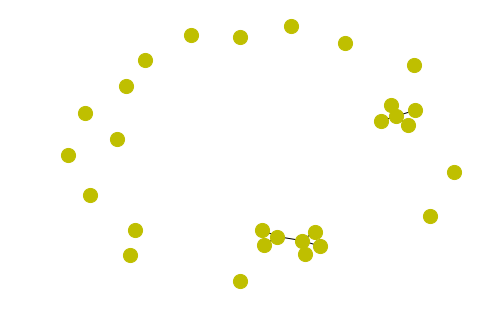

processing ID 401
Skeleton of carbon circles [[16400, 16401, 16402, 16403, 16404, 16394], [16405, 16406, 16391], [16389, 16390, 16391, 16392, 16388], [16395, 16396, 16397, 16398, 16399, 16393]]


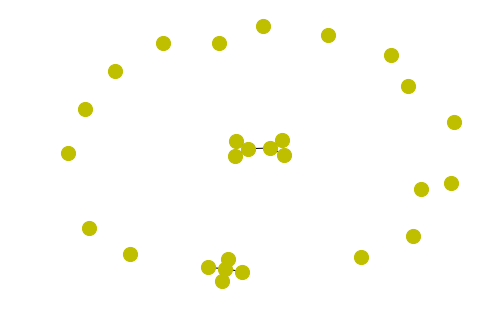

processing ID 402
Skeleton of carbon circles [[16446, 16447, 16448, 16449, 16450, 16440], [16456, 16457, 16458, 16437], [16435, 16436, 16437, 16438, 16434], [16441, 16442, 16443, 16444, 16445, 16439]]


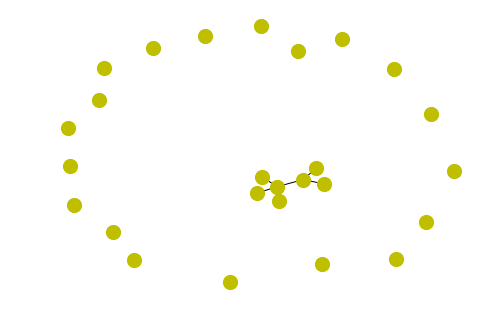

processing ID 403
Skeleton of carbon circles [[16489, 16488, 16487, 16485, 16491, 16490], [16502, 16503, 16504, 16505, 16483], [16480, 16484, 16483, 16482, 16481], [16492, 16493, 16494, 16495, 16496, 16486]]


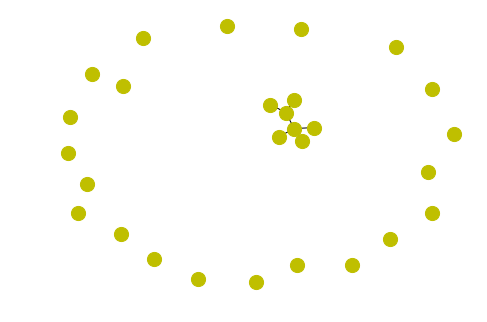

processing ID 404
Skeleton of carbon circles [[16541, 16542, 16543, 16544, 16545, 16535], [16551, 16552, 16553, 16554, 16555, 16532], [16530, 16531, 16532, 16533, 16529], [16536, 16537, 16538, 16539, 16540, 16534]]


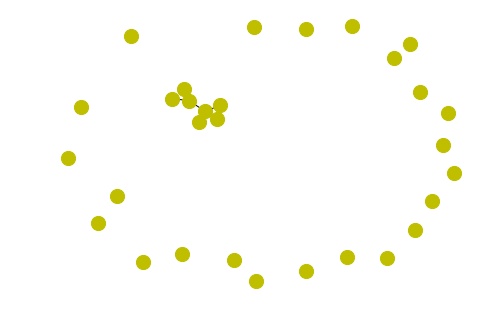

processing ID 405
Skeleton of carbon circles [[16593, 16594, 16595, 16596, 16597, 16587], [16598, 16599, 16584], [16582, 16583, 16584, 16585, 16581], [16588, 16589, 16590, 16591, 16592, 16586]]


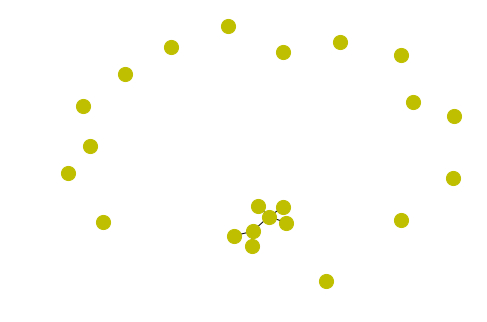

processing ID 406
Skeleton of carbon circles [[16625, 16639, 16640], [16634, 16635, 16636, 16637, 16638, 16628], [16624, 16623, 16622, 16626, 16625], [16629, 16630, 16631, 16632, 16633, 16627]]


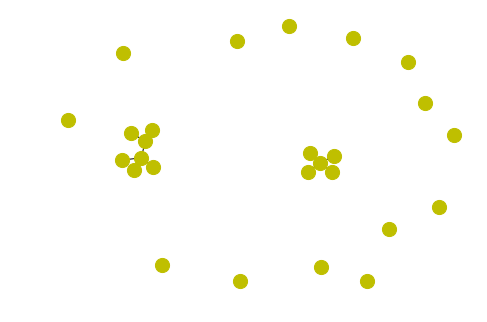

processing ID 407
Skeleton of carbon circles [[16679, 16680, 16681, 16682, 16683, 16673], [16668, 16669, 16670, 16671, 16667], [16674, 16675, 16676, 16677, 16678, 16672]]


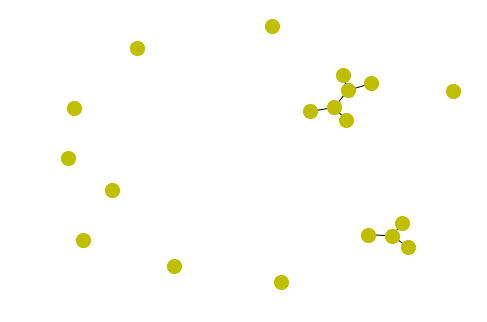

processing ID 408
Skeleton of carbon circles [[16715, 16716, 16717, 16718, 16719, 16709], [16704, 16705, 16706, 16707, 16703], [16710, 16711, 16712, 16713, 16714, 16708]]


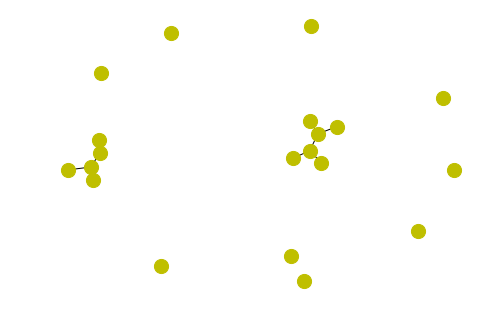

processing ID 409
Skeleton of carbon circles [[16746, 16756, 16755, 16754, 16753, 16752], [16741, 16742, 16743, 16744, 16740], [16747, 16748, 16749, 16750, 16751, 16745]]


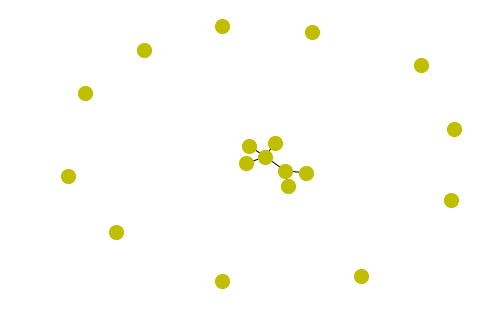

processing ID 410
Skeleton of carbon circles [[16787, 16788, 16789, 16790, 16791, 16781], [16776, 16777, 16778, 16779, 16775], [16782, 16783, 16784, 16785, 16786, 16780]]


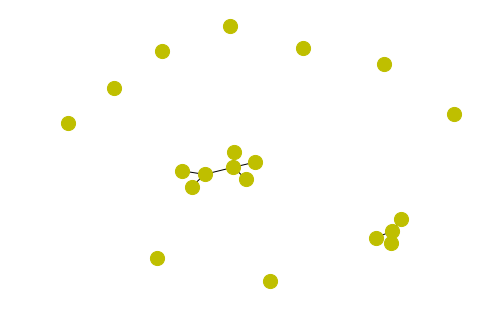

processing ID 411
Skeleton of carbon circles [[16824, 16825, 16826, 16827, 16828, 16818], [16813, 16814, 16815, 16816, 16812], [16819, 16820, 16821, 16822, 16823, 16817]]


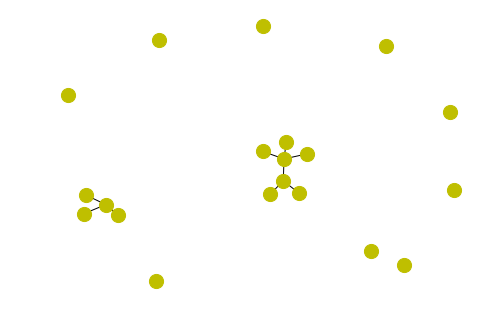

processing ID 412
Skeleton of carbon circles [[16861, 16862, 16863, 16864, 16865, 16855], [16872, 16873, 16874, 16875, 16876, 16866], [16850, 16851, 16852, 16853, 16849], [16856, 16857, 16858, 16859, 16860, 16854]]


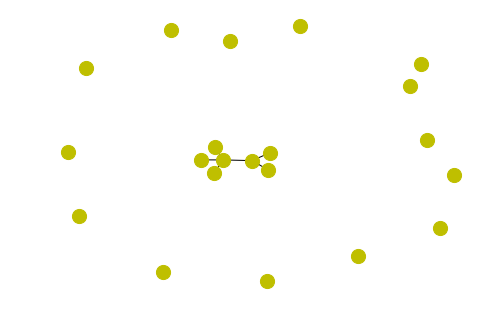

processing ID 413
Skeleton of carbon circles [[16905, 16906, 16907, 16908, 16909, 16899], [16895, 16894, 16893, 16897, 16896], [16900, 16901, 16902, 16903, 16904, 16898]]


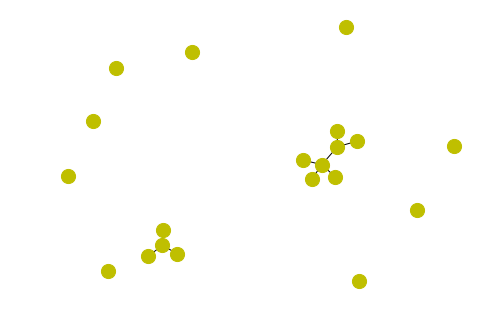

processing ID 414
Skeleton of carbon circles [[16942, 16943, 16944, 16945, 16946, 16936], [16931, 16932, 16933, 16934, 16930], [16937, 16938, 16939, 16940, 16941, 16935]]


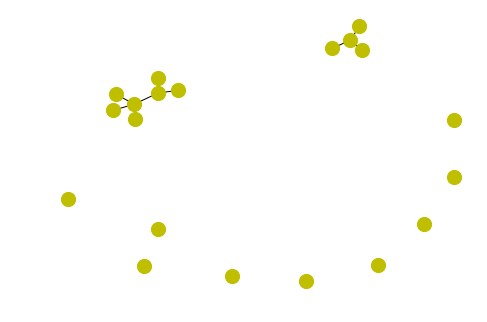

processing ID 415
Skeleton of carbon circles [[16979, 16980, 16981, 16982, 16983, 16973], [16990, 16991, 16992, 16993, 16994, 16989], [16968, 16969, 16970, 16971, 16967], [16974, 16975, 16976, 16977, 16978, 16972]]


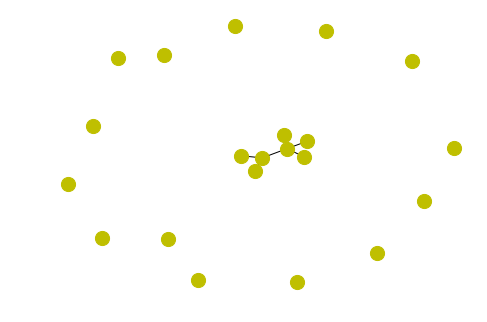

processing ID 416
Skeleton of carbon circles [[17023, 17017, 17027, 17026, 17025, 17024], [17012, 17013, 17014, 17015, 17011], [17018, 17019, 17020, 17021, 17022, 17016]]


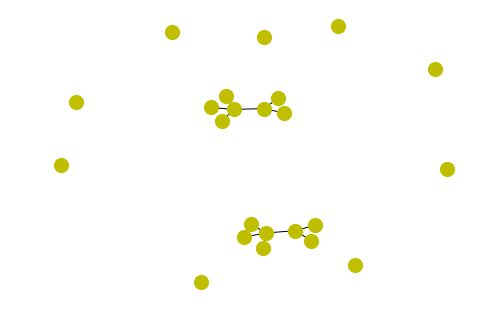

processing ID 417
Skeleton of carbon circles [[17063, 17064, 17065, 17066, 17067, 17057], [17052, 17053, 17054, 17055, 17051], [17058, 17059, 17060, 17061, 17062, 17056]]


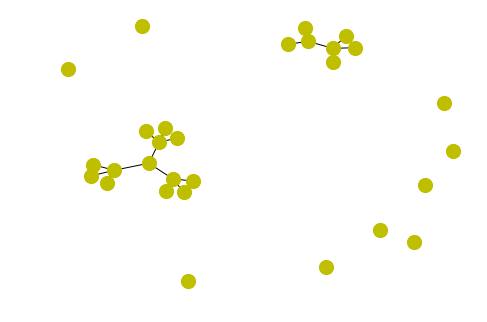

processing ID 418
Skeleton of carbon circles [[17109, 17110, 17111, 17112, 17113, 17103], [17098, 17099, 17100, 17101, 17097], [17104, 17105, 17106, 17107, 17108, 17102]]


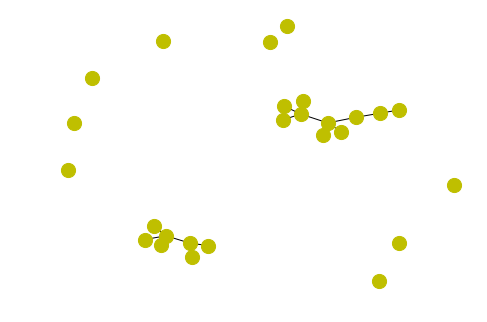

processing ID 419
Skeleton of carbon circles [[17146, 17156, 17155, 17154, 17153, 17152], [17141, 17142, 17143, 17144, 17140], [17147, 17148, 17149, 17150, 17151, 17145]]


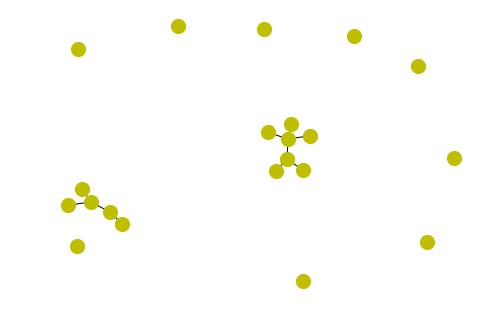

processing ID 420
Skeleton of carbon circles [[17190, 17191, 17192, 17193, 17194, 17184], [17202, 17203, 17204, 17205, 17206, 17201], [17179, 17180, 17181, 17182, 17178], [17185, 17186, 17187, 17188, 17189, 17183]]


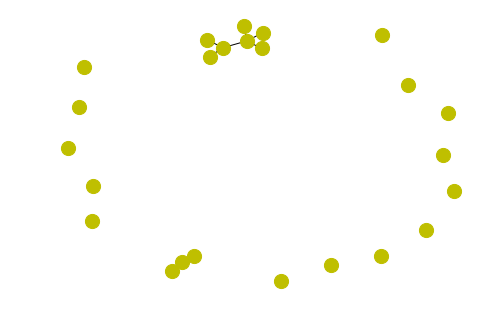

processing ID 421
Skeleton of carbon circles [[17237, 17238, 17239, 17240, 17241, 17231], [17250, 17251, 17252, 17253, 17254, 17249], [17226, 17227, 17228, 17229, 17225], [17232, 17233, 17234, 17235, 17236, 17230]]


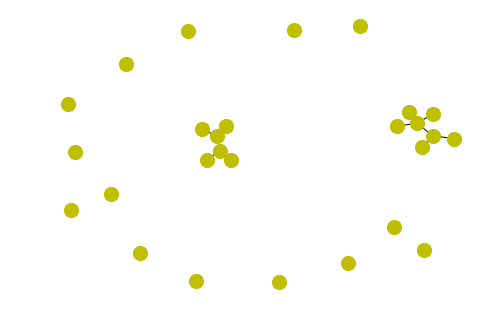

processing ID 422
Skeleton of carbon circles [[17282, 17283, 17284, 17285, 17286, 17280], [17301, 17302, 17303, 17304, 17305, 17300], [17275, 17279, 17278, 17277, 17276], [17287, 17288, 17289, 17290, 17291, 17281]]


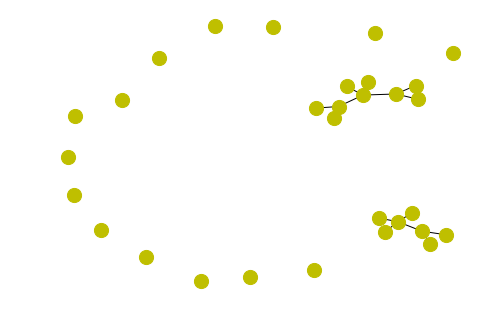

processing ID 423
Skeleton of carbon circles [[17340, 17341, 17342, 17343, 17344, 17334], [17354, 17355, 17356, 17357, 17358, 17353], [17329, 17330, 17331, 17332, 17328], [17335, 17336, 17337, 17338, 17339, 17333]]


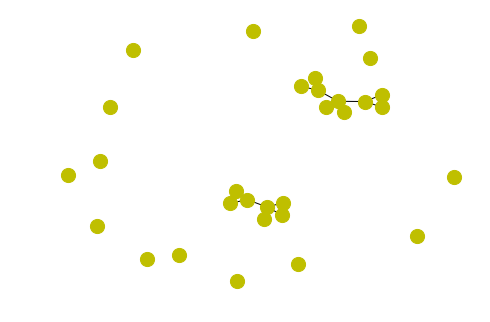

processing ID 424
Skeleton of carbon circles [[17403, 17404, 17405, 17406, 17407, 17408], [17393, 17394, 17395, 17396, 17397, 17387], [17383, 17382, 17381, 17385, 17384], [17388, 17389, 17390, 17391, 17392, 17386]]


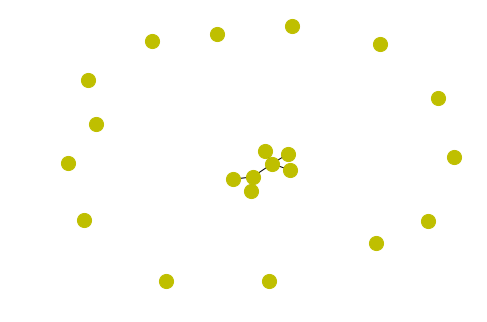

processing ID 425
Skeleton of carbon circles [[17437, 17438, 17439, 17440, 17441, 17431], [17448, 17449, 17450, 17451, 17452, 17447], [17426, 17427, 17428, 17429, 17425], [17432, 17433, 17434, 17435, 17436, 17430]]


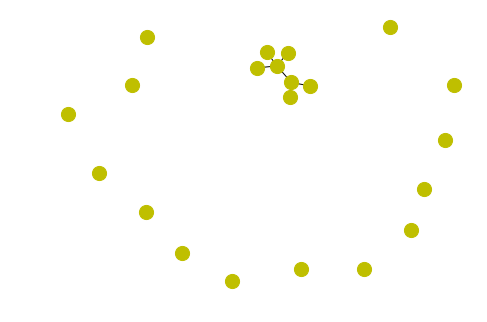

processing ID 426
Skeleton of carbon circles [[17481, 17482, 17483, 17484, 17485, 17475], [17492, 17493, 17494, 17495, 17496, 17491], [17470, 17471, 17472, 17473, 17469], [17476, 17477, 17478, 17479, 17480, 17474]]


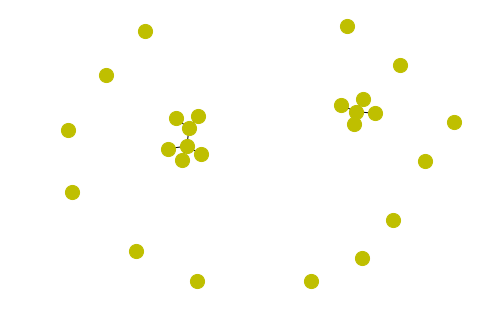

processing ID 427
Skeleton of carbon circles [[17530, 17529, 17523, 17533, 17532, 17531], [17540, 17541, 17542, 17543, 17539], [17518, 17519, 17520, 17521, 17517], [17524, 17525, 17526, 17527, 17528, 17522]]


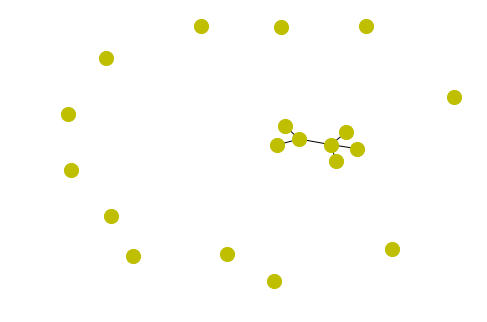

processing ID 428
Skeleton of carbon circles [[17570, 17571, 17572, 17573, 17574, 17564], [17581, 17582, 17583, 17584, 17585, 17580], [17559, 17560, 17561, 17562, 17558], [17565, 17566, 17567, 17568, 17569, 17563]]


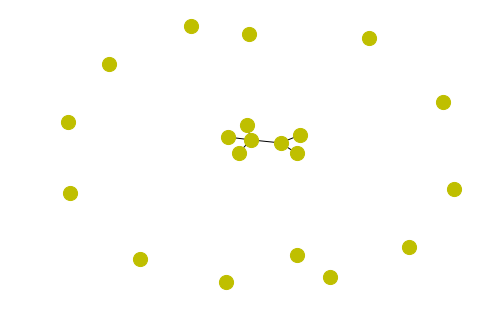

processing ID 429
Skeleton of carbon circles [[17613, 17614, 17615, 17616, 17617, 17607], [17624, 17625, 17626, 17627, 17628, 17623], [17602, 17603, 17604, 17605, 17601], [17608, 17609, 17610, 17611, 17612, 17606]]


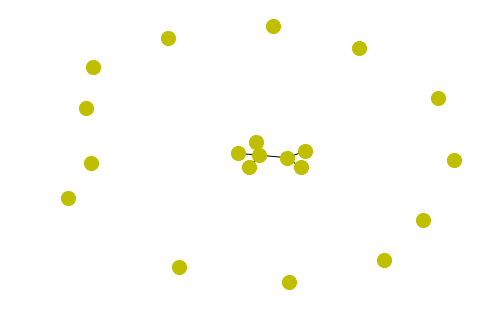

processing ID 430
Skeleton of carbon circles [[17657, 17656, 17650, 17660, 17659, 17658], [17667, 17668, 17669, 17670, 17671, 17666], [17645, 17646, 17647, 17648, 17644], [17651, 17652, 17653, 17654, 17655, 17649]]


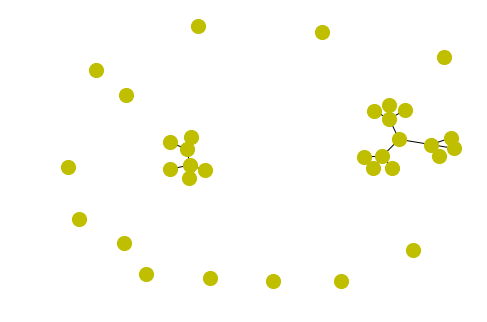

processing ID 431
Skeleton of carbon circles [[17712, 17713, 17714, 17715, 17716, 17706], [17722, 17723, 17724, 17725, 17726, 17721], [17701, 17702, 17703, 17704, 17700], [17707, 17708, 17709, 17710, 17711, 17705]]


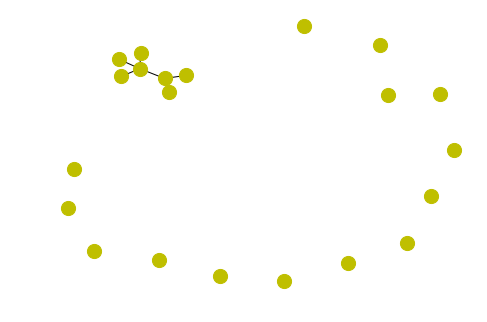

processing ID 432
Skeleton of carbon circles [[17756, 17757, 17758, 17759, 17760, 17750], [17766, 17767, 17768, 17769, 17770, 17765], [17745, 17746, 17747, 17748, 17744], [17751, 17752, 17753, 17754, 17755, 17749]]


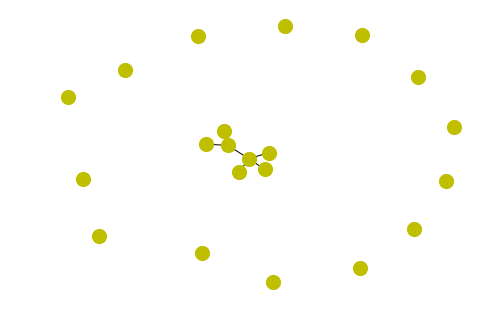

processing ID 433
Skeleton of carbon circles [[17810, 17811, 17812, 17813, 17814, 17809], [17788, 17789, 17790, 17791, 17792], [17795, 17796, 17797, 17798, 17799, 17793], [17800, 17801, 17802, 17803, 17804, 17794]]


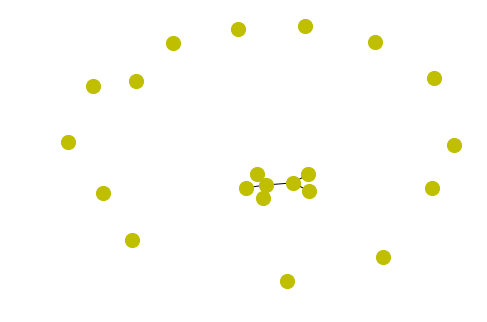

processing ID 434
Skeleton of carbon circles [[17844, 17845, 17846, 17847, 17848, 17838], [17854, 17855, 17856, 17857, 17858, 17853], [17833, 17834, 17835, 17836, 17832], [17839, 17840, 17841, 17842, 17843, 17837]]


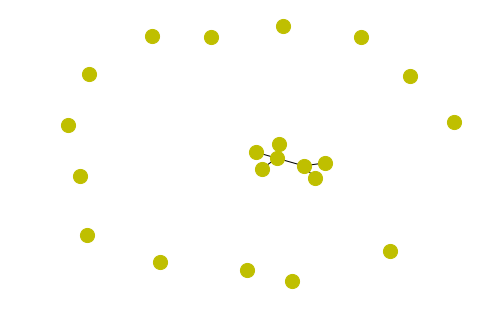

processing ID 435
Skeleton of carbon circles [[17888, 17889, 17890, 17891, 17892, 17882], [17898, 17899, 17900, 17901, 17902, 17897], [17877, 17878, 17879, 17880, 17876], [17883, 17884, 17885, 17886, 17887, 17881]]


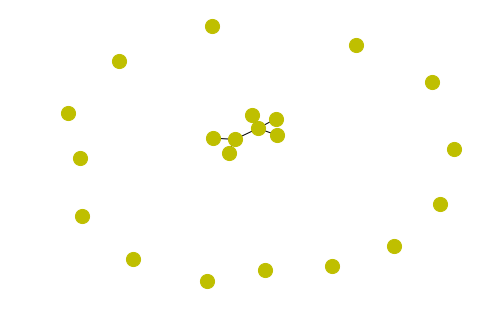

processing ID 436
Skeleton of carbon circles [[17932, 17933, 17934, 17935, 17936, 17926], [17942, 17943, 17944, 17945, 17946, 17941], [17921, 17922, 17923, 17924, 17920], [17927, 17928, 17929, 17930, 17931, 17925]]


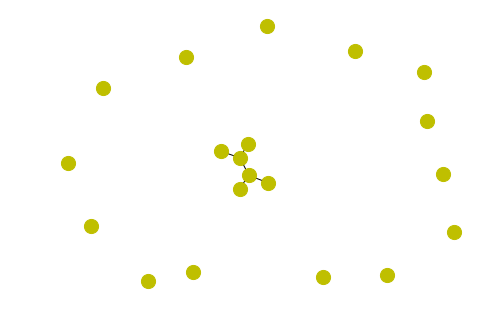

processing ID 437
Skeleton of carbon circles [[17975, 17976, 17977, 17978, 17979, 17969], [17988, 17989, 17990, 17991, 17992, 17987], [17964, 17965, 17966, 17967, 17963], [17970, 17971, 17972, 17973, 17974, 17968]]


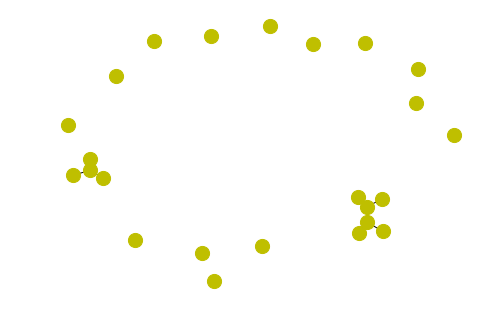

processing ID 438
Skeleton of carbon circles [[18022, 18023, 18024, 18025, 18026, 18016], [18011, 18012, 18013, 18014, 18010], [18017, 18018, 18019, 18020, 18021, 18015]]


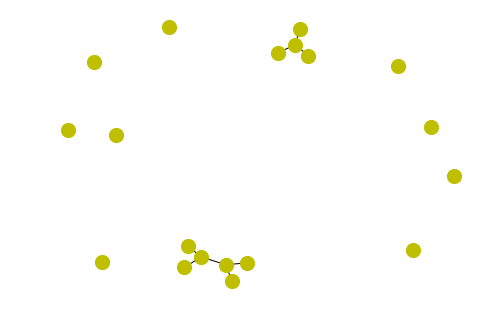

processing ID 439
Skeleton of carbon circles [[18047, 18046, 18050, 18049, 18048], [18058, 18059, 18060, 18061, 18062, 18052], [18053, 18054, 18055, 18056, 18057, 18051]]


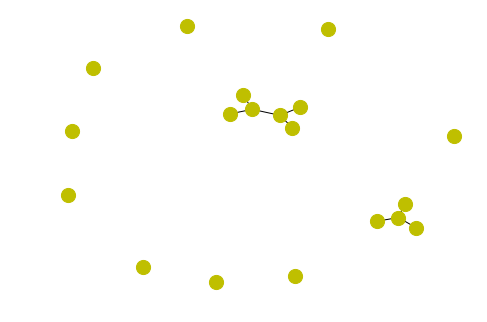

processing ID 440
Skeleton of carbon circles [[18094, 18095, 18096, 18097, 18098, 18088], [18083, 18084, 18085, 18086, 18082], [18089, 18090, 18091, 18092, 18093, 18087]]


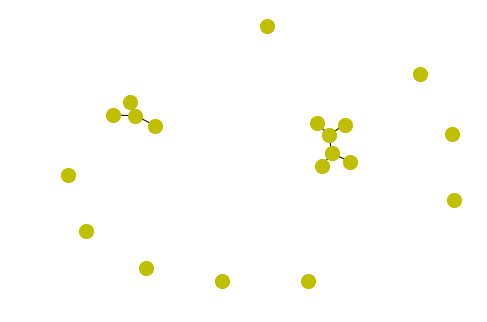

processing ID 441
Skeleton of carbon circles [[18130, 18131, 18132, 18133, 18134, 18124], [18119, 18120, 18121, 18122, 18118], [18125, 18126, 18127, 18128, 18129, 18123]]


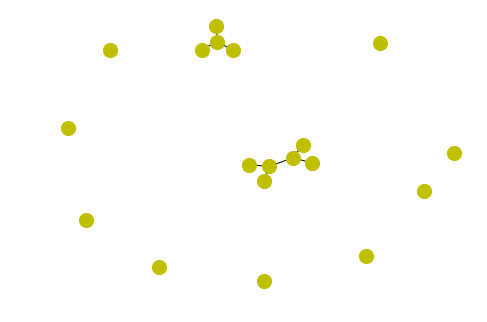

processing ID 442
Skeleton of carbon circles [[18167, 18166, 18160, 18170, 18169, 18168], [18155, 18156, 18157, 18158, 18154], [18161, 18162, 18163, 18164, 18165, 18159]]


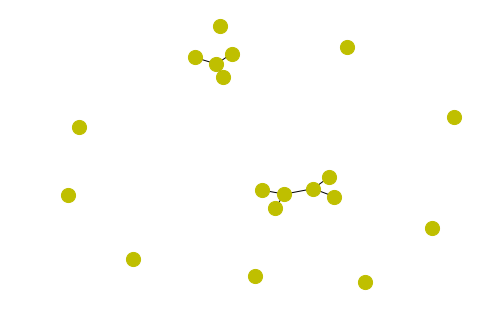

processing ID 443
Skeleton of carbon circles [[18202, 18203, 18204, 18205, 18206, 18196], [18217, 18218, 18219, 18220, 18221, 18216], [18191, 18192, 18193, 18194, 18190], [18197, 18198, 18199, 18200, 18201, 18195]]


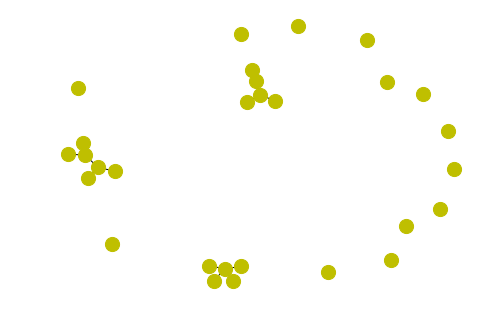

processing ID 444
Skeleton of carbon circles [[18254, 18255, 18256, 18257, 18258, 18248], [18267, 18268, 18269, 18270, 18271, 18264], [18243, 18244, 18245, 18246, 18242], [18249, 18250, 18251, 18252, 18253, 18247]]


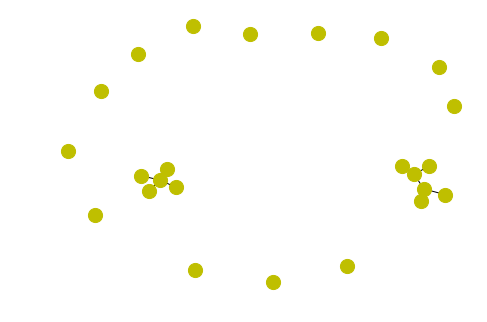

processing ID 445
Skeleton of carbon circles [[18303, 18302, 18301, 18295, 18305, 18304], [18290, 18291, 18292, 18293, 18289], [18296, 18297, 18298, 18299, 18300, 18294]]


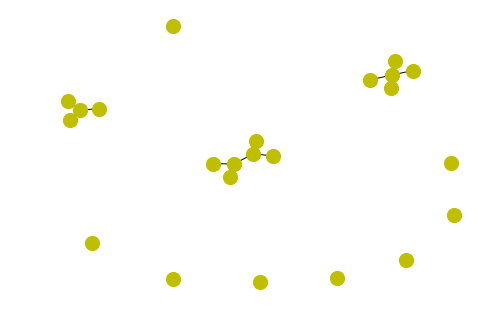

processing ID 446
Skeleton of carbon circles [[18336, 18337, 18338, 18339, 18340, 18335], [18342, 18343, 18344, 18345, 18346, 18341], [18330, 18331, 18332, 18333, 18329], [18348, 18349, 18350, 18351, 18334]]


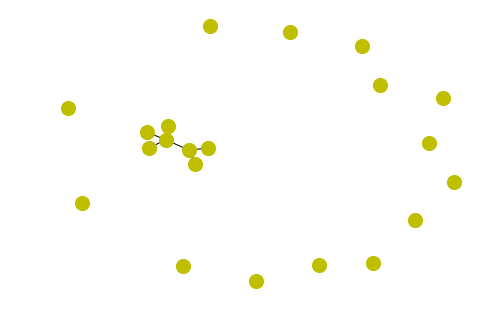

processing ID 447
Skeleton of carbon circles [[18379, 18380, 18381, 18382, 18383, 18378], [18385, 18386, 18387, 18388, 18389, 18384], [18373, 18374, 18375, 18376, 18372], [18391, 18392, 18393, 18394, 18377]]


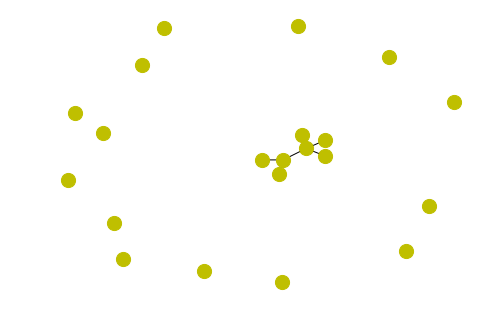

processing ID 448
Skeleton of carbon circles [[18422, 18423, 18424, 18425, 18421], [18427, 18428, 18429, 18430, 18431, 18426], [18416, 18417, 18418, 18419, 18420, 18415]]


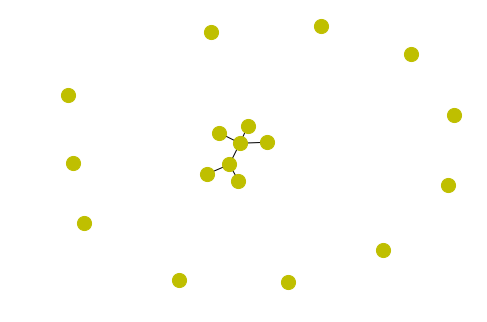

processing ID 449
Skeleton of carbon circles [[18457, 18458, 18459, 18460, 18456], [18462, 18463, 18464, 18465, 18466, 18461], [18451, 18452, 18453, 18454, 18455, 18450]]


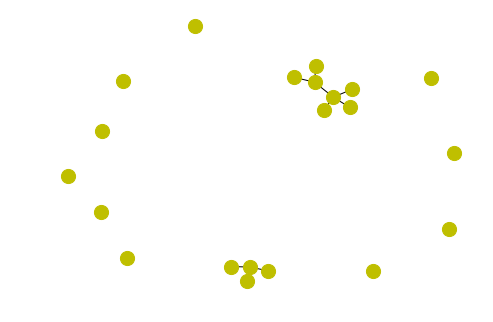

processing ID 450
Skeleton of carbon circles [[18495, 18496, 18497, 18498, 18494], [18500, 18501, 18502, 18503, 18504, 18499], [18489, 18490, 18491, 18492, 18493, 18488]]


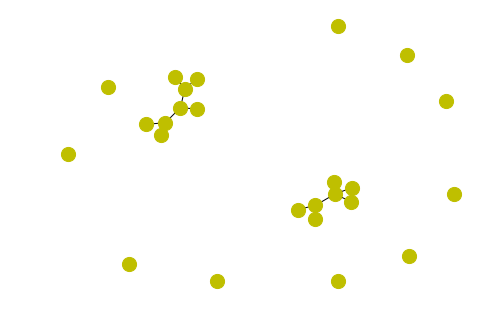

processing ID 451
Skeleton of carbon circles [[18555, 18556, 18557, 18558, 18559, 18554], [18537, 18538, 18539, 18540, 18536], [18542, 18543, 18544, 18545, 18546, 18541], [18530, 18535, 18534, 18533, 18532, 18531]]


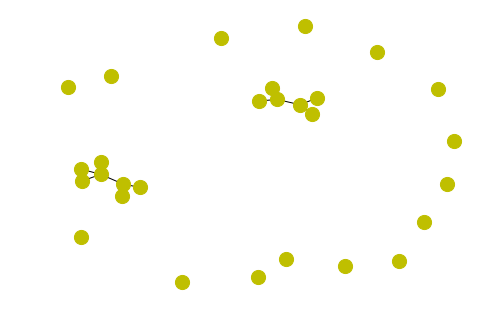

processing ID 452
Skeleton of carbon circles [[18588, 18589, 18590, 18591, 18587], [18593, 18594, 18595, 18596, 18597, 18592], [18582, 18583, 18584, 18585, 18586, 18581]]


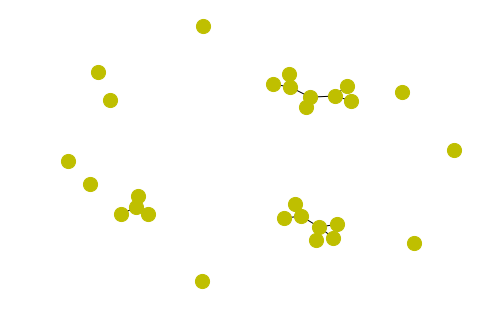

processing ID 453
Skeleton of carbon circles [[18655, 18656, 18657, 18658, 18659, 18654], [18633, 18634, 18635, 18636, 18632], [18638, 18639, 18640, 18641, 18642, 18637], [18627, 18628, 18629, 18630, 18631, 18626]]


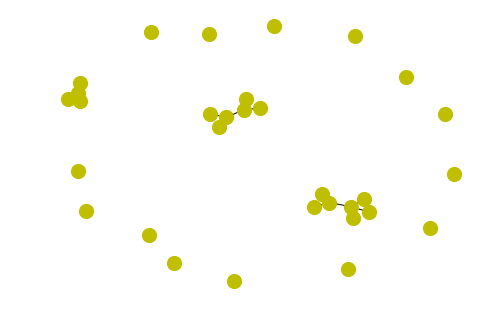

processing ID 454
Skeleton of carbon circles [[18687, 18686, 18690, 18689, 18688], [18682, 18681, 18680, 18685, 18684, 18683], [18692, 18693, 18694, 18695, 18696, 18691]]


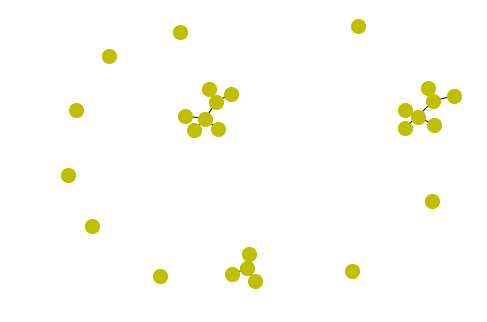

processing ID 455
Skeleton of carbon circles [[18731, 18732, 18733, 18734, 18730], [18736, 18737, 18738, 18739, 18740, 18735], [18725, 18726, 18727, 18728, 18729, 18724]]


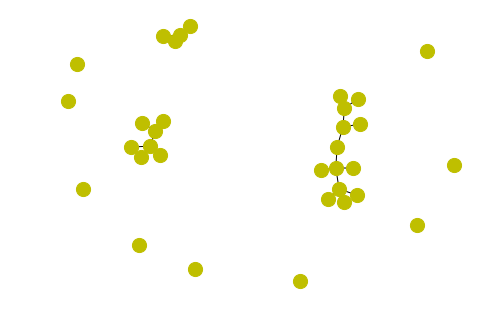

processing ID 456
Skeleton of carbon circles [[18788, 18787, 18786, 18785, 18790, 18789], [18805, 18806, 18807, 18808, 18809, 18804], [18780, 18784, 18783, 18782, 18781], [18776, 18775, 18774, 18779, 18778, 18777]]


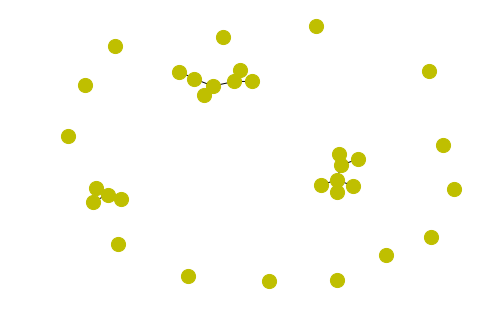

processing ID 457
Skeleton of carbon circles [[18836, 18837, 18838, 18839, 18835], [18841, 18842, 18843, 18844, 18845, 18840], [18830, 18831, 18832, 18833, 18834, 18829]]


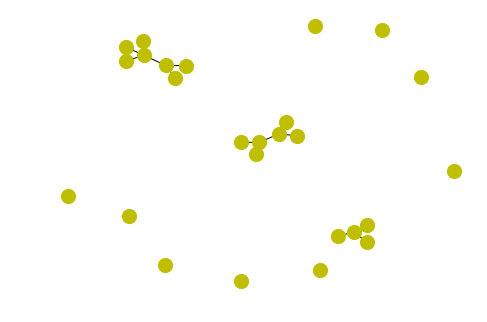

processing ID 458
Skeleton of carbon circles [[18884, 18885, 18886, 18887, 18888, 18878], [18875, 18889, 18890, 18891, 18892, 18876], [18873, 18874, 18875, 18876, 18872], [18879, 18880, 18881, 18882, 18883, 18877]]


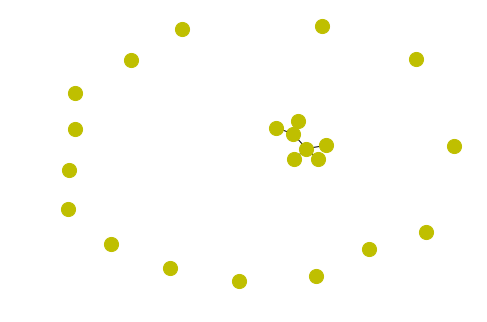

processing ID 459
Skeleton of carbon circles [[18920, 18922, 18923, 18924, 18925, 18926], [18919, 18935, 18934, 18933, 18932, 18918], [18915, 18919, 18918, 18917, 18916], [18927, 18928, 18929, 18930, 18931, 18921]]


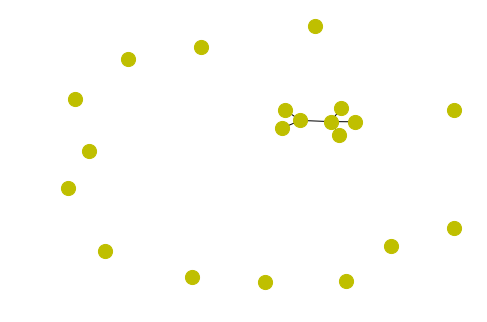

processing ID 460
Skeleton of carbon circles [[18968, 18969, 18970, 18971, 18972, 18962], [18959, 18973, 18974, 18975, 18976, 18960], [18957, 18958, 18959, 18960, 18956], [18963, 18964, 18965, 18966, 18967, 18961]]


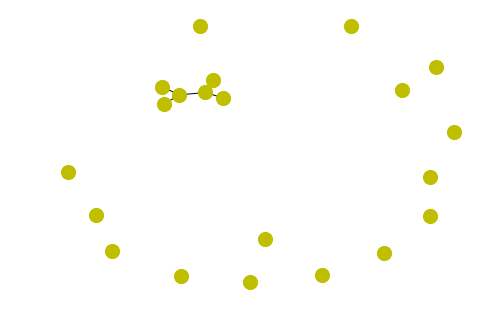

processing ID 461
Skeleton of carbon circles [[19010, 19011, 19012, 19013, 19014, 19004], [19001, 19015, 19016, 19017, 19018, 19002], [18999, 19000, 19001, 19002, 18998], [19005, 19006, 19007, 19008, 19009, 19003]]


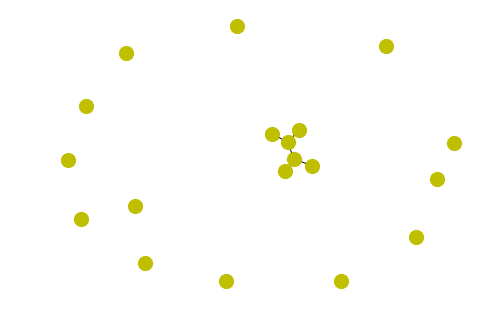

processing ID 462
Skeleton of carbon circles [[19044, 19050, 19051, 19052, 19053, 19054], [19041, 19055, 19056, 19057, 19058, 19042], [19039, 19040, 19041, 19042, 19038], [19045, 19046, 19047, 19048, 19049, 19043]]


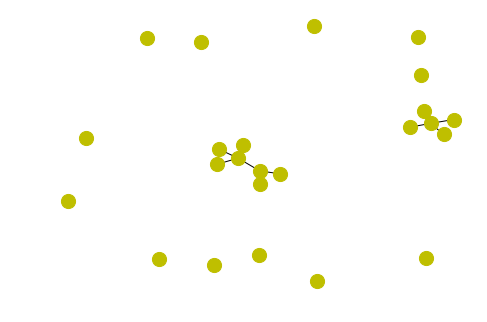

processing ID 463
Skeleton of carbon circles [[19095, 19096, 19097, 19098, 19099, 19089], [19086, 19100, 19101, 19102, 19103, 19087], [19084, 19085, 19086, 19087, 19083], [19090, 19091, 19092, 19093, 19094, 19088]]


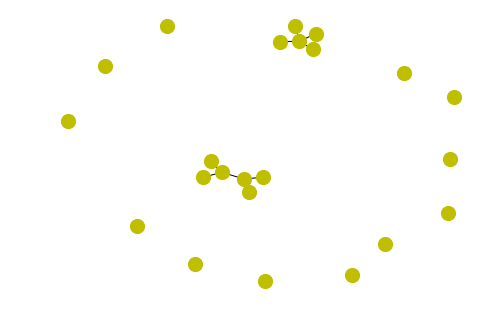

processing ID 464
Skeleton of carbon circles [[19139, 19140, 19141, 19142, 19143, 19133], [19130, 19144, 19145, 19146, 19147, 19131], [19128, 19129, 19130, 19131, 19127], [19134, 19135, 19136, 19137, 19138, 19132]]


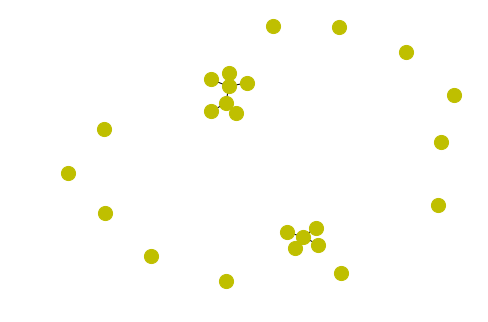

processing ID 465
Skeleton of carbon circles [[19177, 19183, 19182, 19181, 19180, 19179], [19176, 19192, 19191, 19190, 19189, 19175], [19172, 19176, 19175, 19174, 19173], [19184, 19185, 19186, 19187, 19188, 19178]]


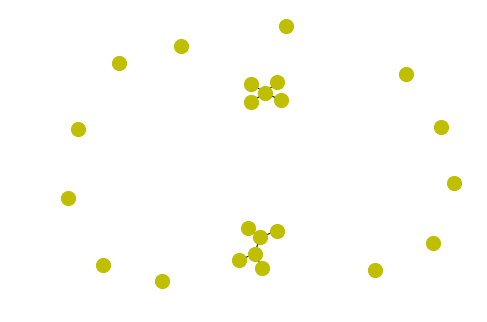

processing ID 466
Skeleton of carbon circles [[19217, 19230, 19231, 19232, 19233, 19216], [19225, 19226, 19227, 19228, 19229, 19219], [19220, 19221, 19222, 19223, 19224, 19218]]


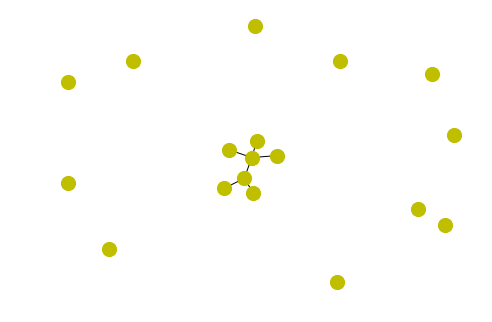

In [25]:
import matplotlib.pyplot as plt
def find_skeleton(ID):
    pattern_set = []
    skeleton = nx.cycle_basis(G_collection[ID])
    print('Skeleton of carbon circles', skeleton)
    re_node = []
    #remove skeleton
    for sk in skeleton:
        pattern_set.append(sk)
        for i in sk:
            re_node.append(i)
    G_collection[ID].remove_nodes_from(re_node)
    #nx.draw(G_collection[ID], with_labels = False, node_color='y', node_size = 200, font_size=10)
    #plt.show()
    for c in nx.connected_components(G_collection[ID]):
        nodeSet = G_collection[ID].subgraph(c).nodes()
        #print(nodeSet)
        pattern_set.append(list(nodeSet))
    return pattern_set

PATTERN = []
for i in range(len(Graph_Label_list)):
    print('processing ID', i)
    pattern_set = find_skeleton(i)
    PATTERN.append(pattern_set)

We dump these intermediate results by pickle.

In [26]:
import pickle
pickle.dump(PATTERN, open('./data&code/COX2/PATTERN', 'wb'), protocol=2)
pickle.dump(Graph_Label_list, open('./data&code/COX2/Graph_Label_list', 'wb'), protocol=2)

## Building corpus of functional groups
We store each pattern as an ascending string according to element number, and identify each element by char '$'.

In [27]:
STR_PATTERN = []
for i in range(len(PATTERN)):
    if i % 50 == 0:
        print('processing', i)
    STR = []
    for pattern in PATTERN[i]:
        t = []
        for nid in pattern:
            t.append(Element_list.index(G_labeldict[i][nid]))
            t.sort()
            s=''
            for t_ in t:
                s = s + '$' + str(t_)
        STR.append(s)
    STR_PATTERN.append(STR)

processing 0
processing 50
processing 100
processing 150
processing 200
processing 250
processing 300
processing 350
processing 400
processing 450


In [29]:
PATTERN[0]

[[1, 2, 3, 4, 0],
 [7, 8, 9, 10, 11, 5],
 [12, 13, 14, 15, 16, 6],
 [33, 18, 35, 34],
 [23],
 [24],
 [25],
 [26],
 [36, 37, 38, 19, 20, 21, 22],
 [27],
 [28],
 [29],
 [30],
 [17],
 [31],
 [32]]

In [30]:
STR_PATTERN[0]

['$6$6$6$6$7',
 '$6$6$6$6$6$6',
 '$6$6$6$6$6$6',
 '$1$1$1$6',
 '$1',
 '$1',
 '$1',
 '$1',
 '$1$1$1$6$8$8$16',
 '$1',
 '$1',
 '$1',
 '$1',
 '$9',
 '$1',
 '$1']

We use these identifiable strings to build corpus in our scenario, and we further use them to map tokens for embedding. These identifiers are easily to remove duplicates and achieve high performance for token mapping.

In [60]:
corpus = {}
c = 0 
for str_p in STR_PATTERN:
    for item in str_p:
        if item in corpus:
            continue
        else:
            corpus[item] = c
            c = c + 1
print('Size of corpus', len(corpus))

Tokens = []
Lookup = {}
for i in range(len(STR_PATTERN)):
    tokens = []
    c = 0
    for item in STR_PATTERN[i]:
        tokens.append(corpus[item])
        Lookup[corpus[item]] = (i, c)
        c = c + 1
        #tokens.sort()
    Tokens.append(tokens)
    if i < 10:
        print('Token & Label', Tokens[i], Graph_Label_list[i])

Size of corpus 71
Token & Label [0, 1, 1, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 5, 3, 3] -1
Token & Label [1, 0, 1, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 4, 3, 3] -1
Token & Label [1, 0, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 5, 3, 3] 1
Token & Label [0, 1, 1, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3] -1
Token & Label [1, 0, 1, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 6, 3, 3] -1
Token & Label [1, 0, 1, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3] -1
Token & Label [1, 0, 1, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 7, 3, 3] -1
Token & Label [1, 0, 1, 3, 3, 2, 3, 3, 4, 3, 3, 3, 5, 5, 3, 3] -1
Token & Label [1, 0, 1, 3, 3, 8, 3, 3, 4, 3, 3, 3, 3, 5, 3, 3] 1
Token & Label [0, 1, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3] 1


We dump tokens and corpus for deep learning model.

In [61]:
pickle.dump(Tokens, open('./data&code/COX2/Tokens', 'wb'), protocol=2)
pickle.dump(corpus, open('./data&code/COX2/corpus', 'wb'), protocol=2)
pickle.dump(Lookup, open('./data&code/COX2/Lookup', 'wb'), protocol=2)

## Discovering data insights

We count the frequency of occurrence of different patterns in COX2 dataset, and we find it follows a power-law distribution. The finding is consistent with insights in the topic of graph embedding (YouTube Social Graph) and word embedding (Wikipedia Article Text) discussed by DeepWalk paper.

DeepWalk: Online Learning of Social Representations, KDD'14.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import heapq
from matplotlib_venn import venn2

def stat(Tokens):
    freq = {}
    for token in Tokens:
        for i in token:
            if i in freq:
                freq[i] = freq[i] + 1
            else:
                freq[i] = 1
    return freq

def draw_bar(freq):
    temp = []
    for key, value in freq.items():
        temp.append((key, value))
    freq_sort = heapq.nlargest(len(freq), temp, key=lambda x:x[1])
    xticks = []
    for p in freq_sort:
        xticks.append(p[0])
    plt.bar(range(len(freq)), [freq.get(xtick, 0) for xtick in xticks], align='center', yerr=0.000001)
    plt.semilogy()
    plt.xlabel('Token')
    plt.ylabel('Frequency')
    plt.title('Compound Atomic Group')
    plt.show()
    return freq_sort

Graph_Label_list = pickle.load(open('./data&code/COX2/Graph_Label_list', 'rb'), encoding='bytes')
G_collection = pickle.load(open('./data&code/COX2/G_collection', 'rb'), encoding='bytes')
G_labeldict = pickle.load(open('./data&code/COX2/G_labeldict', 'rb'), encoding='bytes')
PATTERN = pickle.load(open('./data&code/COX2/PATTERN', 'rb'), encoding='bytes')
corpus = pickle.load(open('./data&code/COX2/corpus', 'rb'), encoding='bytes')
Tokens = pickle.load(open('./data&code/COX2/Tokens', 'rb'), encoding='bytes')
Lookup = pickle.load(open('./data&code/COX2/Lookup', 'rb'), encoding='bytes')
corpus_to_id = {v: k for k, v in corpus.items()}
freq = stat(Tokens)
freq_sort = draw_bar(freq)

We further visualize the most frequent Top-10 patterns and the least frequent Top-10 patterns in COX2.

The most frequent 5 patterns
Token_id, Frequency: 3 4750
$1
{19248: 'H'}


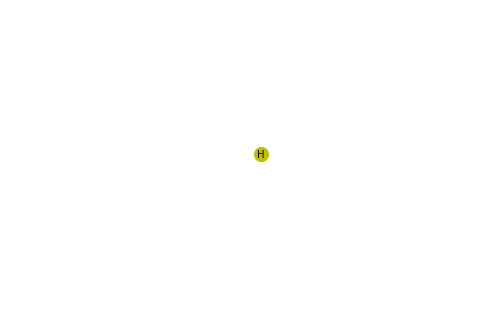

Token_id, Frequency: 1 975
$6$6$6$6$6$6
{19220: 'C', 19221: 'C', 19222: 'C', 19223: 'C', 19224: 'C', 19218: 'C'}


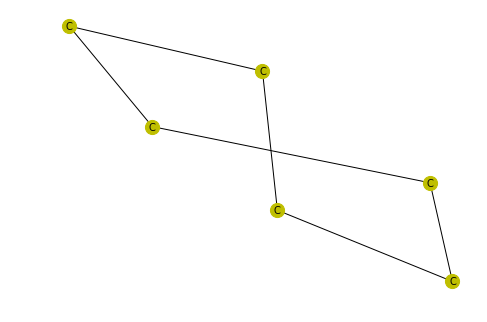

Token_id, Frequency: 4 259
$1$1$1$6$8$8$16
{19234: 'S', 19235: 'O', 19236: 'O', 19237: 'C', 19249: 'H', 19250: 'H', 19251: 'H'}


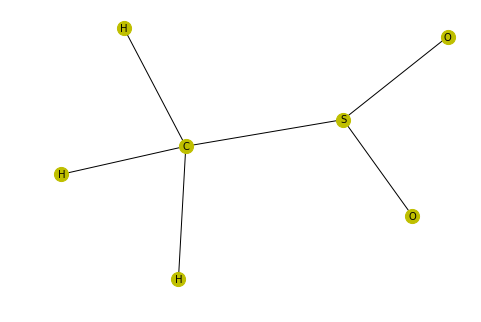

Token_id, Frequency: 28 259
$6$6$6$7$7
{18836: 'C', 18837: 'N', 18838: 'N', 18839: 'C', 18835: 'C'}


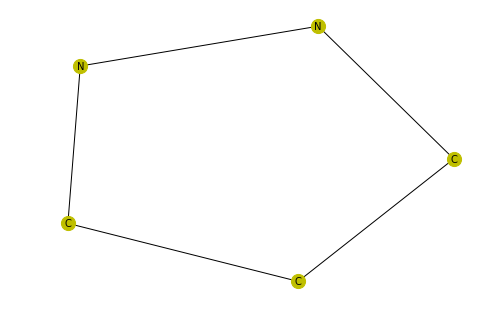

Token_id, Frequency: 5 253
$9
{19238: 'F'}


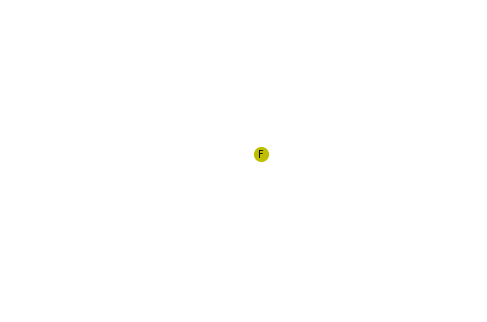

The least frequent 5 patterns
Token_id, Frequency: 70 1
$6$6$6$6$7$7
{19217: 'C', 19230: 'N', 19231: 'C', 19232: 'C', 19233: 'N', 19216: 'C'}


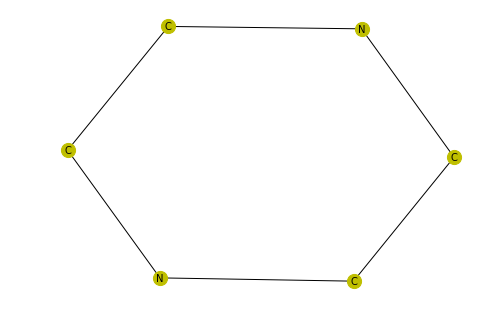

Token_id, Frequency: 69 1
$1$1$1$6$6$7$8
{18821: 'H', 18822: 'H', 18823: 'H', 18800: 'C', 18801: 'C', 18802: 'O', 18803: 'N'}


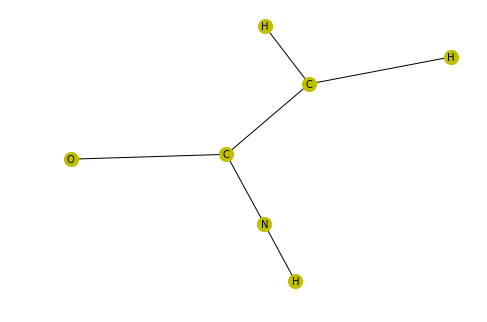

Token_id, Frequency: 68 1
$1$1$1$1$1$1$1$6$6$6$6$8$8
{18752: 'O', 18753: 'O', 18754: 'C', 18755: 'C', 18767: 'H', 18768: 'H', 18769: 'H', 18770: 'H', 18771: 'H', 18772: 'H', 18773: 'H', 18750: 'C', 18751: 'C'}


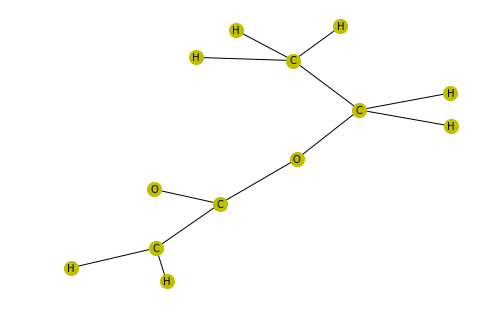

Token_id, Frequency: 66 1
$1$1$1$6$7
{18212: 'N', 18213: 'C', 18231: 'H', 18232: 'H', 18233: 'H'}


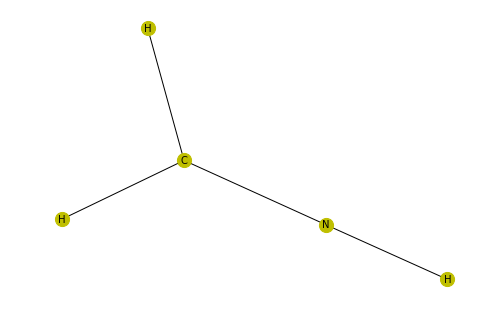

Token_id, Frequency: 63 1
$1$1$6
{17200: 'C', 17218: 'H', 17219: 'H'}


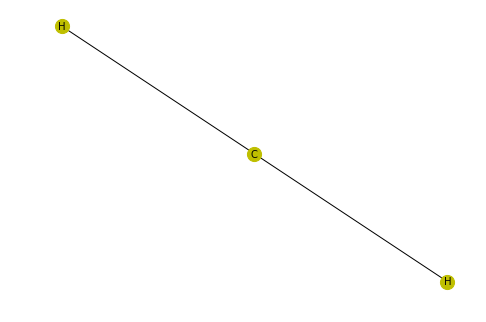

In [3]:
def draw_pattern(id):
    print(corpus_to_id[id])
    temp = {}
    for key in PATTERN[Lookup[id][0]][Lookup[id][1]]:
        temp[key] = G_labeldict[Lookup[id][0]][key]
    print(temp)
    nx.draw(G_collection[Lookup[id][0]].subgraph(PATTERN[Lookup[id][0]][Lookup[id][1]]), labels = temp, with_labels = True, node_color='y', node_size = 200, font_size=10)
    plt.show()

print('The most frequent 5 patterns')
for i in range(5):
    print('Token_id, Frequency:', freq_sort[i][0], freq_sort[i][1])
    draw_pattern(freq_sort[i][0])
print('The least frequent 5 patterns')
for i in range(1, 6):
    print('Token_id, Frequency:', freq_sort[-i][0], freq_sort[-i][1])
    draw_pattern(freq_sort[-i][0])

A preliminary finding that hydrogen (H) and carbocyclic structure (C-C-C-C-C-C) appear frequently as essential components of a compound. Next, we count the difference between different classes according to class labels.

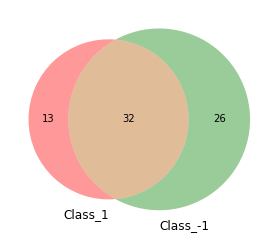

Class_1 only: {32, 70, 39, 40, 9, 10, 13, 14, 50, 53, 22, 56, 27} length = 13
Class_-1 only: {7, 17, 18, 21, 24, 25, 26, 31, 36, 38, 41, 42, 43, 49, 54, 55, 58, 59, 60, 61, 63, 64, 65, 66, 68, 69} length = 26
Class_1 & Class_-1: {0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 15, 16, 19, 20, 23, 28, 29, 30, 33, 34, 35, 37, 44, 45, 46, 47, 48, 51, 52, 57, 62, 67} length = 32


In [4]:
positive = set()
negative = set()
for i in range(len(Tokens)):
    for t in Tokens[i]:
        if Graph_Label_list[i] == 1:
            positive.add(t)
        else:
            negative.add(t)
v = venn2([positive, negative], ('Class_1', 'Class_-1'))
plt.show()
po = positive.difference(negative)
no = negative.difference(positive)
pn = positive&negative
print('Class_1 only:', po, 'length =', len(po))
print('Class_-1 only:', no, 'length =', len(no))
print('Class_1 & Class_-1:', pn, 'length =', len(pn))

For COX2 compounds, there are 13 patterns only exist in Class 1 (pIC50>6.5), and 26 patterns only exist in Class -1 (pIC50<6.5).

In [5]:
print('visualize patterns only exist in Class_1 (pIC50>6.5)')
for i in po:
    print('Token_id, Frequency:', freq_sort[i][0], freq_sort[i][1])
    #draw_pattern(freq_sort[i][0])

visualize patterns only exist in Class_1 (pIC50>6.5)
Token_id, Frequency: 13 3
Token_id, Frequency: 70 1
Token_id, Frequency: 16 2
Token_id, Frequency: 19 2
Token_id, Frequency: 23 92
Token_id, Frequency: 48 79
Token_id, Frequency: 0 36
Token_id, Frequency: 59 30
Token_id, Frequency: 17 1
Token_id, Frequency: 25 1
Token_id, Frequency: 20 8
Token_id, Frequency: 32 1
Token_id, Frequency: 24 4


We consider the patterns of the circle structure that only exist in Class 1 (pIC50>6.5). It is mainly composed of carbon and nitrogen elements.

In [6]:
print('visualize patterns only exist in Class_-1 (pIC50<6.5)')
for i in no:
    print('Token_id, Frequency:', freq_sort[i][0], freq_sort[i][1])
    #draw_pattern(freq_sort[i][0])

visualize patterns only exist in Class_-1 (pIC50<6.5)
Token_id, Frequency: 11 171
Token_id, Frequency: 30 13
Token_id, Frequency: 45 13
Token_id, Frequency: 57 9
Token_id, Frequency: 29 6
Token_id, Frequency: 15 5
Token_id, Frequency: 39 5
Token_id, Frequency: 47 4
Token_id, Frequency: 7 2
Token_id, Frequency: 14 2
Token_id, Frequency: 49 2
Token_id, Frequency: 50 2
Token_id, Frequency: 51 2
Token_id, Frequency: 10 1
Token_id, Frequency: 26 1
Token_id, Frequency: 27 1
Token_id, Frequency: 41 1
Token_id, Frequency: 42 1
Token_id, Frequency: 53 1
Token_id, Frequency: 54 1
Token_id, Frequency: 56 1
Token_id, Frequency: 58 1
Token_id, Frequency: 61 1
Token_id, Frequency: 63 1
Token_id, Frequency: 68 1
Token_id, Frequency: 69 1


Unlike Class 1 (pIC50>6.5), Class -1 (pIC50<6.5) will have extra sulfur (14 times) and oxygen (16 times) in the circle structure, and they are frequent. In a way, it affects the chemical properties of pIC50.

Similarly, we discover the insights from BZR and DHFR datasets, respectively.

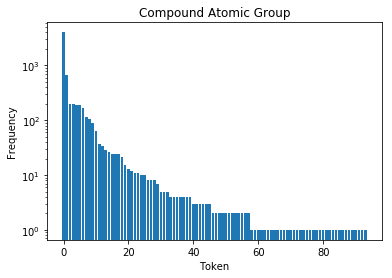

The most frequent 5 patterns
Token_id, Frequency: 2 4033
$1
{14478: 'H'}


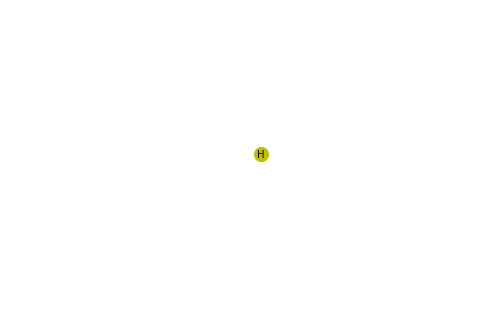

Token_id, Frequency: 1 662
$6$6$6$6$6$6
{14449: 'C', 14448: 'C', 14453: 'C', 14452: 'C', 14451: 'C', 14450: 'C'}


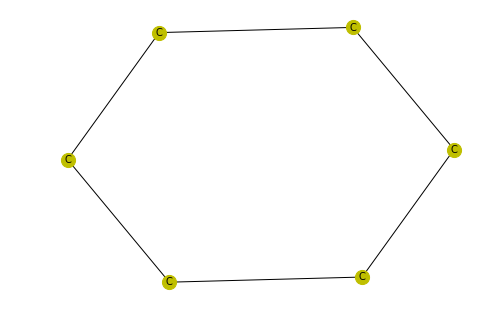

Token_id, Frequency: 6 195
$17
{14134: 'Cl'}


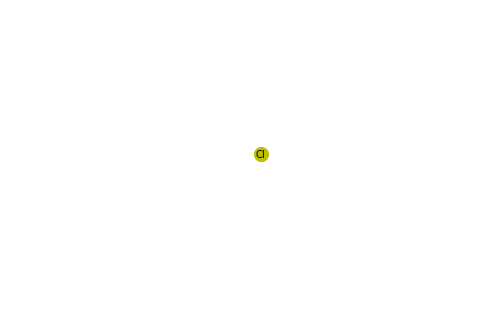

Token_id, Frequency: 44 194
$6$6$6$6$7
{14455: 'C', 14454: 'N', 14451: 'C', 14450: 'C', 14456: 'C'}


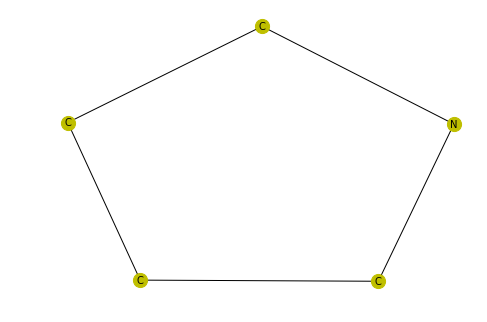

Token_id, Frequency: 0 188
$6$6$6$6$6$7$7
{8065: 'C', 8066: 'C', 8067: 'N', 8068: 'C', 8069: 'C', 8070: 'N', 8064: 'C'}


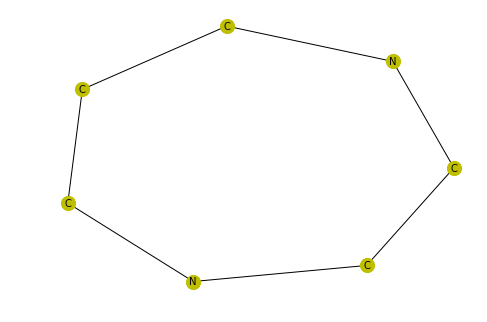

The least frequent 5 patterns
Token_id, Frequency: 92 1
$6$6$6$6$8
{12319: 'C', 12333: 'O', 12322: 'C', 12323: 'C', 12320: 'C'}


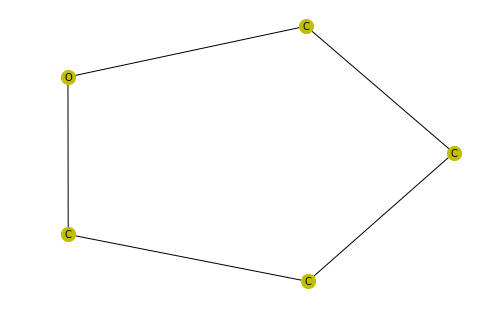

Token_id, Frequency: 91 1
$1$7$8
{12315: 'H', 12302: 'N', 12303: 'O'}


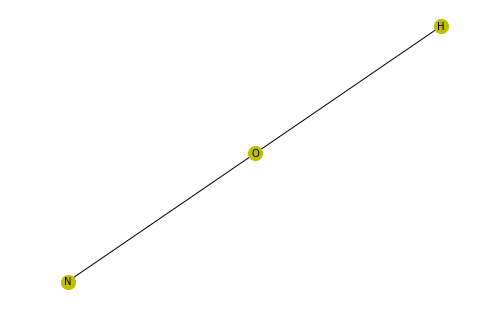

Token_id, Frequency: 89 1
$6$7$16
{11824: 'N', 11825: 'C', 11826: 'S'}


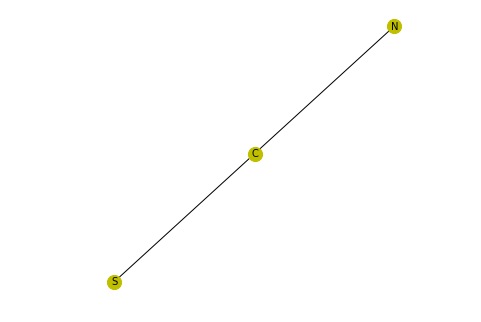

Token_id, Frequency: 88 1
$1$1$1$1$1$1$1$6$6$6$6$8
{11660: 'C', 11661: 'O', 11662: 'C', 11663: 'C', 11664: 'C', 11672: 'H', 11673: 'H', 11674: 'H', 11675: 'H', 11676: 'H', 11677: 'H', 11678: 'H'}


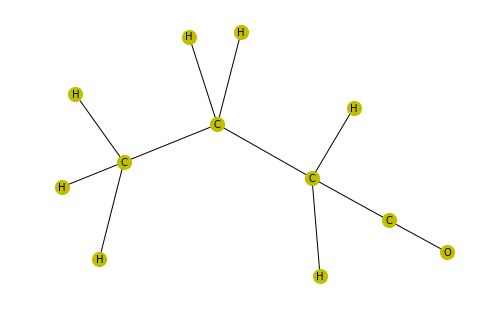

Token_id, Frequency: 86 1
$1$6$6
{11331: 'C', 11332: 'C', 11340: 'H'}


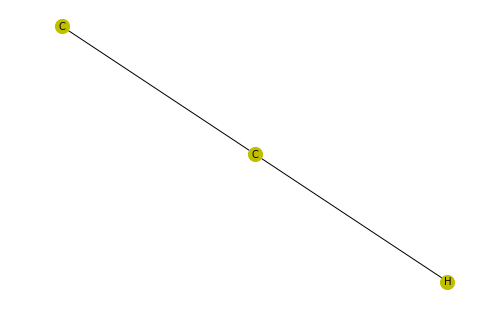

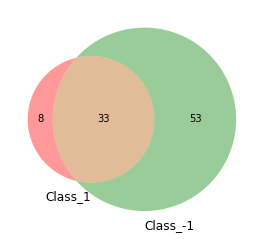

Class_1 only: {72, 74, 45, 46, 50, 22, 86, 31} length = 8
Class_-1 only: {8, 9, 10, 11, 12, 17, 19, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 40, 41, 43, 48, 49, 51, 53, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 75, 79, 81, 82, 83, 84, 85, 87, 88, 89, 91, 92, 93} length = 53
Class_1 & Class_-1: {0, 1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 16, 18, 20, 21, 28, 37, 38, 39, 42, 44, 47, 52, 54, 55, 56, 59, 60, 76, 77, 78, 80, 90} length = 33
visualize patterns only exist in Class_1 (pIC50>7.0)
Token_id, Frequency: 41 1
Token_id, Frequency: 48 1
Token_id, Frequency: 90 3
Token_id, Frequency: 14 2
Token_id, Frequency: 45 2
Token_id, Frequency: 43 11
Token_id, Frequency: 81 1
Token_id, Frequency: 20 5
visualize patterns only exist in Class_-1 (pIC50<7.0)
Token_id, Frequency: 5 106
Token_id, Frequency: 3 88
Token_id, Frequency: 52 65
Token_id, Frequency: 60 37
Token_id, Frequency: 37 34
Token_id, Frequency: 57 24
Token_id, Frequency: 13 15
Token_id, Frequency: 75 11
Token_id, Freque

In [8]:
Graph_Label_list = pickle.load(open('./data&code/BZR/Graph_Label_list', 'rb'), encoding='bytes')
G_collection = pickle.load(open('./data&code/BZR/G_collection', 'rb'), encoding='bytes')
G_labeldict = pickle.load(open('./data&code/BZR/G_labeldict', 'rb'), encoding='bytes')
PATTERN = pickle.load(open('./data&code/BZR/PATTERN', 'rb'), encoding='bytes')
corpus = pickle.load(open('./data&code/BZR/corpus', 'rb'), encoding='bytes')
Tokens = pickle.load(open('./data&code/BZR/Tokens', 'rb'), encoding='bytes')
Lookup = pickle.load(open('./data&code/BZR/Lookup', 'rb'), encoding='bytes')
corpus_to_id = {v: k for k, v in corpus.items()}
freq = stat(Tokens)
freq_sort = draw_bar(freq)
print('The most frequent 5 patterns')
for i in range(5):
    print('Token_id, Frequency:', freq_sort[i][0], freq_sort[i][1])
    draw_pattern(freq_sort[i][0])
print('The least frequent 5 patterns')
for i in range(1, 6):
    print('Token_id, Frequency:', freq_sort[-i][0], freq_sort[-i][1])
    draw_pattern(freq_sort[-i][0])
positive = set()
negative = set()
for i in range(len(Tokens)):
    for t in Tokens[i]:
        if Graph_Label_list[i] == 1:
            positive.add(t)
        else:
            negative.add(t)
v = venn2([positive, negative], ('Class_1', 'Class_-1'))
plt.show()
po = positive.difference(negative)
no = negative.difference(positive)
pn = positive&negative
print('Class_1 only:', po, 'length =', len(po))
print('Class_-1 only:', no, 'length =', len(no))
print('Class_1 & Class_-1:', pn, 'length =', len(pn))
print('visualize patterns only exist in Class_1 (pIC50>7.0)')
for i in po:
    print('Token_id, Frequency:', freq_sort[i][0], freq_sort[i][1])
    #draw_pattern(freq_sort[i][0])
print('visualize patterns only exist in Class_-1 (pIC50<7.0)')
for i in no:
    print('Token_id, Frequency:', freq_sort[i][0], freq_sort[i][1])
    #draw_pattern(freq_sort[i][0])

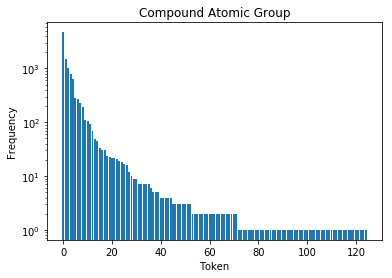

The most frequent 5 patterns
Token_id, Frequency: 4 4712
$1
{32059: 'H'}


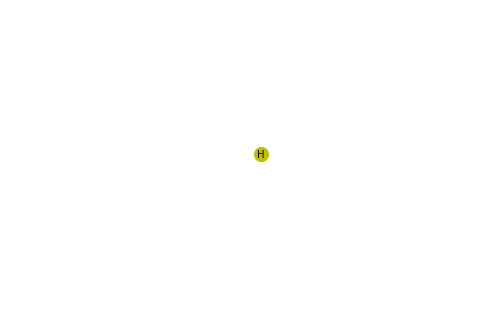

Token_id, Frequency: 2 1500
$1$1$7
{32048: 'N', 32060: 'H', 32061: 'H'}


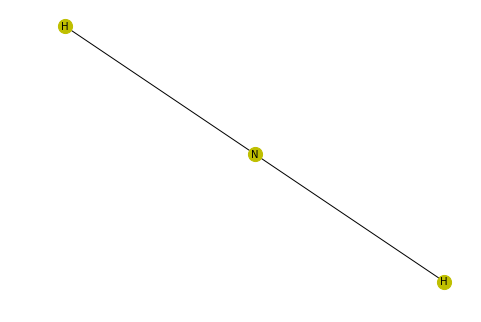

Token_id, Frequency: 0 1029
$6$6$6$6$6$6
{32042: 'C', 32047: 'C', 32046: 'C', 32045: 'C', 32044: 'C', 32043: 'C'}


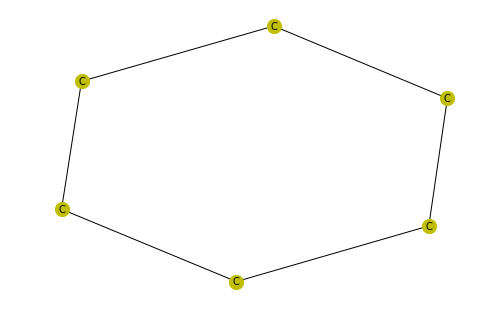

Token_id, Frequency: 1 801
$6$6$6$6$7$7
{32037: 'C', 32038: 'N', 32039: 'C', 32040: 'C', 32041: 'C', 32036: 'N'}


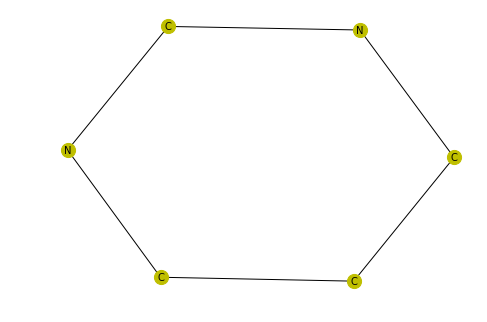

Token_id, Frequency: 27 641
$1$1$1$6$8
{32064: 'H', 32065: 'H', 32066: 'H', 32050: 'O', 32051: 'C'}


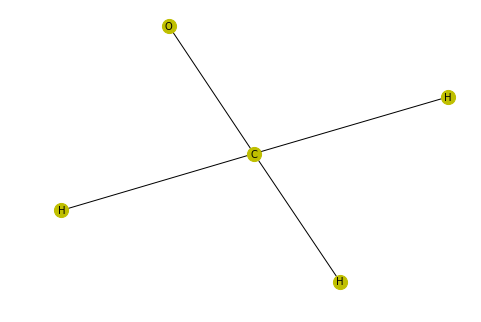

The least frequent 5 patterns
Token_id, Frequency: 124 1
$1$1$1$1$1$1$1$1$1$6$6$6$6$6
{31616: 'C', 31617: 'C', 31618: 'C', 31619: 'C', 31629: 'H', 31630: 'H', 31631: 'H', 31632: 'H', 31633: 'H', 31634: 'H', 31635: 'H', 31636: 'H', 31637: 'H', 31615: 'C'}


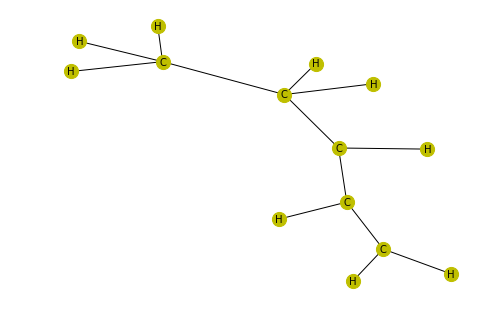

Token_id, Frequency: 123 1
$6$6$6$6
{31522: 'C', 31521: 'C', 31527: 'C', 31523: 'C'}


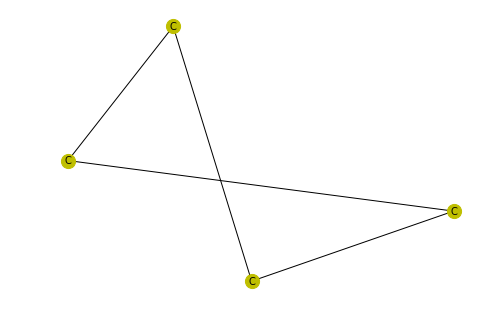

Token_id, Frequency: 122 1
$1$1$1$1$6$6$7$8$8
{30824: 'H', 30825: 'H', 30826: 'H', 30827: 'H', 30807: 'O', 30808: 'C', 30809: 'O', 30810: 'N', 30811: 'C'}


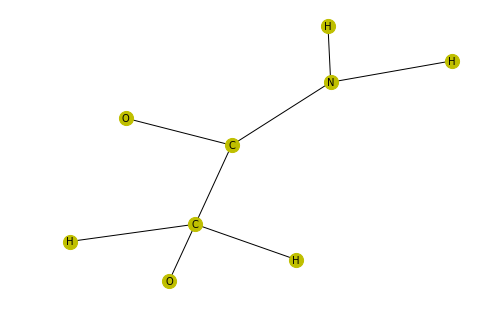

Token_id, Frequency: 121 1
$1$1$1$1$1$1$1$6$6$6$6$8$8$8
{30784: 'H', 30788: 'H', 30760: 'O', 30761: 'C', 30762: 'C', 30763: 'C', 30766: 'C', 30767: 'O', 30768: 'O', 30779: 'H', 30780: 'H', 30781: 'H', 30782: 'H', 30783: 'H'}


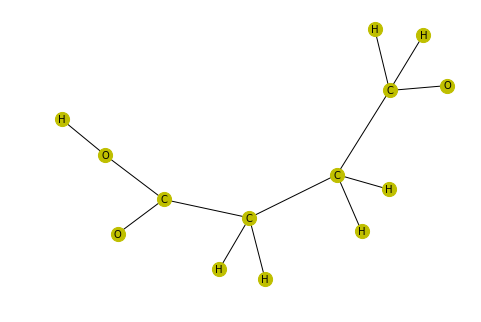

Token_id, Frequency: 120 1
$1$1$1$1$1$1$1$1$1$1$1$1$1$1$1$1$1$6$6$6$6$6$6$6$6$6$8$8$8
{30725: 'H', 30726: 'H', 30727: 'H', 30728: 'H', 30729: 'H', 30730: 'H', 30734: 'H', 30735: 'H', 30736: 'H', 30737: 'H', 30738: 'H', 30739: 'H', 30740: 'H', 30741: 'H', 30742: 'H', 30743: 'H', 30744: 'H', 30701: 'O', 30702: 'C', 30703: 'C', 30704: 'C', 30707: 'C', 30708: 'O', 30709: 'O', 30710: 'C', 30711: 'C', 30712: 'C', 30713: 'C', 30714: 'C'}


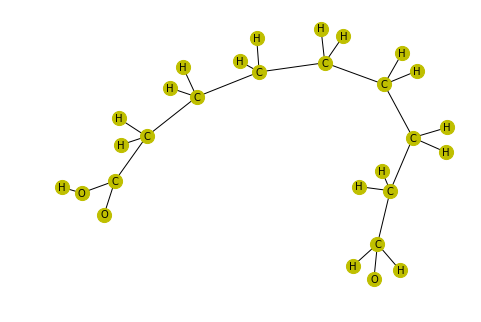

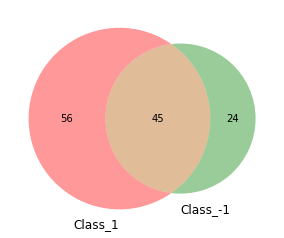

Class_1 only: {8, 11, 12, 15, 18, 19, 23, 25, 26, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 47, 53, 54, 62, 68, 69, 74, 77, 80, 81, 83, 85, 86, 88, 91, 92, 93, 94, 102, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 119, 120, 122, 123, 124} length = 56
Class_-1 only: {10, 30, 31, 48, 49, 50, 55, 58, 59, 60, 64, 66, 72, 76, 84, 89, 97, 98, 100, 103, 104, 116, 118, 121} length = 24
Class_1 & Class_-1: {0, 1, 2, 3, 4, 5, 6, 7, 9, 13, 14, 16, 17, 20, 21, 22, 24, 27, 28, 29, 32, 38, 41, 51, 52, 56, 57, 61, 63, 65, 67, 70, 71, 73, 75, 78, 79, 82, 87, 90, 95, 96, 99, 101, 106} length = 45
visualize patterns only exist in Class_1 (pIC50>6.0)
Token_id, Frequency: 14 195
Token_id, Frequency: 3 92
Token_id, Frequency: 41 69
Token_id, Frequency: 99 34
Token_id, Frequency: 65 24
Token_id, Frequency: 9 23
Token_id, Frequency: 71 19
Token_id, Frequency: 90 17
Token_id, Frequency: 13 16
Token_id, Frequency: 28 7
Token_id, Frequency: 67 7
Token_id, Frequency: 101 7
Token_id, Frequency: 72

In [9]:
Graph_Label_list = pickle.load(open('./data&code/DHFR/Graph_Label_list', 'rb'), encoding='bytes')
G_collection = pickle.load(open('./data&code/DHFR/G_collection', 'rb'), encoding='bytes')
G_labeldict = pickle.load(open('./data&code/DHFR/G_labeldict', 'rb'), encoding='bytes')
PATTERN = pickle.load(open('./data&code/DHFR/PATTERN', 'rb'), encoding='bytes')
corpus = pickle.load(open('./data&code/DHFR/corpus', 'rb'), encoding='bytes')
Tokens = pickle.load(open('./data&code/DHFR/Tokens', 'rb'), encoding='bytes')
Lookup = pickle.load(open('./data&code/DHFR/Lookup', 'rb'), encoding='bytes')
corpus_to_id = {v: k for k, v in corpus.items()}
freq = stat(Tokens)
freq_sort = draw_bar(freq)
print('The most frequent 5 patterns')
for i in range(5):
    print('Token_id, Frequency:', freq_sort[i][0], freq_sort[i][1])
    draw_pattern(freq_sort[i][0])
print('The least frequent 5 patterns')
for i in range(1, 6):
    print('Token_id, Frequency:', freq_sort[-i][0], freq_sort[-i][1])
    draw_pattern(freq_sort[-i][0])
positive = set()
negative = set()
for i in range(len(Tokens)):
    for t in Tokens[i]:
        if Graph_Label_list[i] == 1:
            positive.add(t)
        else:
            negative.add(t)
v = venn2([positive, negative], ('Class_1', 'Class_-1'))
plt.show()
po = positive.difference(negative)
no = negative.difference(positive)
pn = positive&negative
print('Class_1 only:', po, 'length =', len(po))
print('Class_-1 only:', no, 'length =', len(no))
print('Class_1 & Class_-1:', pn, 'length =', len(pn))
print('visualize patterns only exist in Class_1 (pIC50>6.0)')
for i in po:
    print('Token_id, Frequency:', freq_sort[i][0], freq_sort[i][1])
    #draw_pattern(freq_sort[i][0])
print('visualize patterns only exist in Class_-1 (pIC50<6.0)')
for i in no:
    print('Token_id, Frequency:', freq_sort[i][0], freq_sort[i][1])
    #draw_pattern(freq_sort[i][0])

For the pattern distribution, the power-law distribution are same as BZR and DHFR datasets. 

BZR: <br>
8 special patterns in Class 1 (pIC50>7.0)<br>
53 special patterns in Class -1 (pIC50<7.0)<br>
elements of circle structure for Class 1 and -1 are shared: C,N,O,S<br>

DHFR: <br>
56 special patterns in Class 1 (pIC50>6.0)<br>
24 special patterns in Class -1 (pIC50<6.0)<br>
elements of circle structure for Class 1 and -1 are shared: C,N,O,S<br>

# Graph Representation Learning Solutions
Go back to [Table of Contents](#Table-of-Contents)<br>
We consider the above patterns are basic constituent of these compounds, and we adapt doc2vec frameworks to represent each compound. To the best of our knowledge, this is an original project to study compound embedding based on graph pattern mining. Here, each pattern is a higher order substructure, and it determines the unique chemical properties (functional groups) of the compounds. In addition, we find the distribution (power-law) of patterns is consistent with words distribution in NLP, and thus doc2vec models are reasonable in our scenario. 

## PV-DBOW model for compound embedding

In [94]:
import pickle
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np

np.random.seed(1)

def build_graph_collection(Tokens):
    res = []
    id = 0
    for token in Tokens:
        t = []
        for n in token:
            t.append(str(n))
        res.append(TaggedDocument(t, ['g_'+ str(id)]))
        id = id + 1
    return res

if __name__ == '__main__':
    corpus = pickle.load(open('./data&code/COX2/corpus', 'rb'), encoding='bytes')
    Tokens = pickle.load(open('./data&code/COX2/Tokens', 'rb'), encoding='bytes')
    document_collections = build_graph_collection(Tokens)
    model = Doc2Vec(document_collections,
                    size = 10,
                    window = 2,
                    min_count = 1,
                    dm = 0,
                    workers = 1,
                    iter = 4000,
                    alpha = 0.01,
                    hs = 0,
                    negative = 2)
    model.save('./data&code/COX2/models/graph-dbow.model')

## PV-DM model for compound embedding

In [2]:
model = Doc2Vec(document_collections,
                size = 10,
                window = 2,
                min_count = 1,
                dm = 1,
                workers = 1,
                iter = 5000,
                alpha = 0.01,
                hs = 0,
                negative = 2)
model.save('./data&code/COX2/models/graph-dm.model')

## TSNE for visualization of embeddings
We visualize the embeddings by TSNE.

C:\Users\WANG_ZHENG\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


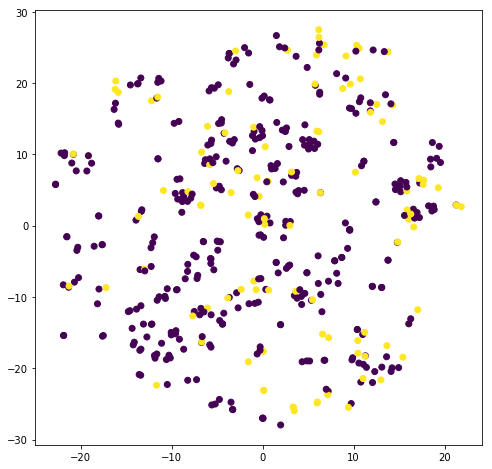

In [69]:
from sklearn.manifold import TSNE
from gensim.models.doc2vec import Doc2Vec
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

def get_vector(path, label):
    model = Doc2Vec.load(path)
    RES = []
    for i in range(len(label)):
        RES.append(model.docvecs['g_'+str(i)])
    return np.array(RES)
    
if __name__ == '__main__':
    path_dbow = './data&code/COX2/models/graph-dbow.model'  
    Graph_Label_list = pickle.load(open('./data&code/COX2/Graph_Label_list', 'rb'), encoding='bytes')
    embeds = get_vector(path_dbow, Graph_Label_list)
    tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
    Y = tsne.fit_transform(embeds)
    plt.figure(figsize=(8, 8))
    plt.scatter(Y[:, 0], Y[:, 1], c=np.array(Graph_Label_list).reshape(-1))

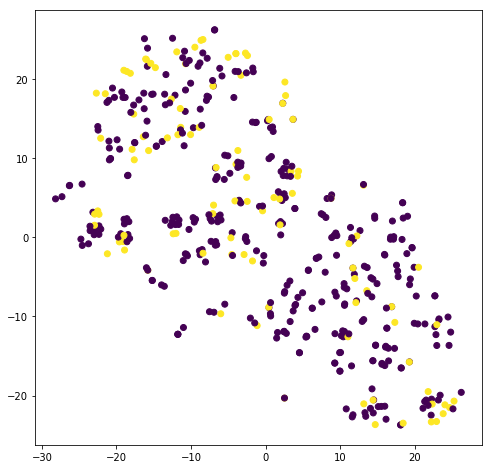

In [70]:
path_dm = './data&code/COX2/models/graph-dm.model'  
Graph_Label_list = pickle.load(open('./data&code/COX2/Graph_Label_list', 'rb'), encoding='bytes')
embeds = get_vector(path_dm, Graph_Label_list)
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
Y = tsne.fit_transform(embeds)
plt.figure(figsize=(8, 8))
plt.scatter(Y[:, 0], Y[:, 1], c=np.array(Graph_Label_list).reshape(-1))

## SVM-based classification task
The embedding vectors can be used in many machine learning tasks. Here, we take the classification as an example and train a SVM classifer based on the embedding results. Specially, we split the COX2 dataset randomly,and use 60% to train a SVM classifer and 40% to test performance. We report the results of accuracy, precision, recall and F1. Note that, here, we use label -1 as positive.

In [108]:
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec
import pickle
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def get_vector(path, label):
    model = Doc2Vec.load(path)
    RES = []
    for i in range(len(label)):
        RES.append(model.docvecs['g_'+str(i)])
    return np.array(RES), np.array(label)

if __name__ == '__main__':
    path_dbow = './data&code/COX2/models/graph-dbow.model'  
    Graph_Label_list = pickle.load(open('./data&code/COX2/Graph_Label_list', 'rb'), encoding='bytes')
    
    X, Y = get_vector(path_dbow, Graph_Label_list)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size=0.6)
    
    clf = SVC(C=4.5, kernel='poly', gamma='auto', decision_function_shape='ovr')
    clf.fit(x_train, y_train.ravel())
    y_hat = clf.predict(x_train)
    
    print('training set accuracy:', accuracy_score(y_hat, y_train))
    y_hat = clf.predict(x_test)
    print('testing set accuracy:', accuracy_score(y_hat, y_test))
    # precision is the ratio tp / (tp + fp)
    # recall is the ratio tp / (tp + fn)
    #F1 harmonic mean of the precision and recall
    # col[0]=results of -1, col[1]=results of 1 
    print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[-1]))

training set accuracy: 0.8392857142857143
testing set accuracy: 0.8449197860962567
precision, recall, fscore, support (array([0.85227273]), array([0.98039216]), array([0.9118541]), array([153], dtype=int64))


In [118]:
path_dm = './data&code/COX2/models/graph-dm.model'  
Graph_Label_list = pickle.load(open('./data&code/COX2/Graph_Label_list', 'rb'), encoding='bytes')

X, Y = get_vector(path_dm, Graph_Label_list)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size=0.6)

clf = SVC(C=6, kernel='rbf', gamma='auto', decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())
y_hat = clf.predict(x_train)

print('training set accuracy:', accuracy_score(y_hat, y_train))
y_hat = clf.predict(x_test)
print('testing set accuracy:', accuracy_score(y_hat, y_test))
# precision is the ratio tp / (tp + fp)
# recall is the ratio tp / (tp + fn)
#F1 harmonic mean of the precision and recall
# col[0]=results of -1, col[1]=results of 1 
print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[-1]))

training set accuracy: 0.9392857142857143
testing set accuracy: 0.8128342245989305
precision, recall, fscore, support (array([0.85542169]), array([0.92810458]), array([0.89028213]), array([153], dtype=int64))


Similarly, we test embedding performance on BZR and DHFR dataset, respectively.

In [119]:
path_dbow = './data&code/BZR/models/graph-dbow.model'  
Graph_Label_list = pickle.load(open('./data&code/BZR/Graph_Label_list', 'rb'), encoding='bytes')

X, Y = get_vector(path_dbow, Graph_Label_list)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size=0.6)

clf = SVC(C=2, kernel='rbf', gamma='auto', decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())
y_hat = clf.predict(x_train)

print('training set accuracy:', accuracy_score(y_hat, y_train))
y_hat = clf.predict(x_test)
print('testing set accuracy:', accuracy_score(y_hat, y_test))
# col[0]=results of -1, col[1]=results of 1 
print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[-1]))

training set accuracy: 0.8600823045267489
testing set accuracy: 0.8333333333333334
precision, recall, fscore, support (array([0.82781457]), array([0.99206349]), array([0.90252708]), array([126], dtype=int64))


In [123]:
path_dbow = './data&code/DHFR/models/graph-dbow.model'  
Graph_Label_list = pickle.load(open('./data&code/DHFR/Graph_Label_list', 'rb'), encoding='bytes')

X, Y = get_vector(path_dbow, Graph_Label_list)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size=0.6)

clf = SVC(C=20, kernel='rbf', gamma='auto', decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())
y_hat = clf.predict(x_train)

print('training set accuracy:', accuracy_score(y_hat, y_train))
y_hat = clf.predict(x_test)
print('testing set accuracy:', accuracy_score(y_hat, y_test))
# col[0]=results of -1, col[1]=results of 1 
print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[-1]))

training set accuracy: 0.891832229580574
testing set accuracy: 0.801980198019802
precision, recall, fscore, support (array([0.77570093]), array([0.69747899]), array([0.73451327]), array([119], dtype=int64))


## Baseline1: PCA embedding

In this section, we present another model called PCA embedding as one of our baselines. Basically, PCA is variously employed to reduce the dimensions of data, while maintaining the main informations. In this project, we propose to represent a molecular graph by a vector, where each element is the number of a kind of specific atom. For exmaple, the vector \[2, 3, 4\] means that the corresponding molecular graph conatins 2 H-atoms, 3 C-atoms and 4 O-atoms. Since there are many different kinds of atoms, we propose to use PCA to do reduction. We then can obtain the PCA embeddings.

To compare the performance with our method, we also train a SVM classifier on the embedding results of elements. The COX2 dataset is also splitted that 60% is used as training set and 40% as testing set.

In [2]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

Graph_Label_list=[];
f=open('.\data&code\COX2\COX2_graph_labels.txt');
for line in f:
    Graph_Label_list.append(int(line));
f.close();
Graph_Label_list=np.array(Graph_Label_list);
element=[];
num=[];
f=open('.\data&code\COX2\PCA\cox2.txt');
element_line=f.readline();
temp=element_line.split(' ');
for i in range(0,len(temp)-1):
    element.append(int(temp[i]));
for line in f:
    temp=line.split(' ');
    new_temp=[];
    for i in range(0,len(temp)-1):
        new_temp.append(int(temp[i]));
    num.append(new_temp);
f.close();

data=np.array(num);
pca=PCA(n_components=4);
reduction=pca.fit_transform(data);
print(pca.explained_variance_ratio_)


x_train, x_test, y_train, y_test = train_test_split(reduction, Graph_Label_list, random_state=1, train_size=0.6)
    
clf = SVC(C=5.0, kernel='poly', gamma='auto', decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())
y_hat = clf.predict(x_train)
  
print('training set accuracy:', accuracy_score(y_hat, y_train))
y_hat = clf.predict(x_test)
print('testing set accuracy:', accuracy_score(y_hat, y_test))
print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[-1]))

[0.71341157 0.11630757 0.07557203 0.04456512]
training set accuracy: 0.7571428571428571
testing set accuracy: 0.8181818181818182
precision, recall, fscore, support (array([0.81818182]), array([1.]), array([0.9]), array([153], dtype=int64))


In [3]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

Graph_Label_list=[];
f=open('.\data&code\BZR\BZR_graph_labels.txt');
for line in f:
    Graph_Label_list.append(int(line));
f.close();
Graph_Label_list=np.array(Graph_Label_list);
element=[];
num=[];
f=open('.\data&code\BZR\PCA\BZR.txt');
element_line=f.readline();
temp=element_line.split(' ');
for i in range(0,len(temp)-1):
    element.append(int(temp[i]));
for line in f:
    temp=line.split(' ');
    new_temp=[];
    for i in range(0,len(temp)-1):
        new_temp.append(int(temp[i]));
    num.append(new_temp);
f.close();

data=np.array(num);
pca=PCA(n_components=4);
reduction=pca.fit_transform(data);
print(pca.explained_variance_ratio_)


x_train, x_test, y_train, y_test = train_test_split(reduction, Graph_Label_list, random_state=1, train_size=0.6)
    
clf = SVC(C=5.0, kernel='poly', gamma='auto', decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())
y_hat = clf.predict(x_train)
  
print('training set accuracy:', accuracy_score(y_hat, y_train))
y_hat = clf.predict(x_test)
print('testing set accuracy:', accuracy_score(y_hat, y_test))
print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[-1]))

[0.77887122 0.1332485  0.03738997 0.02165959]
training set accuracy: 0.8477366255144033
testing set accuracy: 0.8333333333333334
precision, recall, fscore, support (array([0.83221477]), array([0.98412698]), array([0.90181818]), array([126], dtype=int64))


In [2]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

Graph_Label_list=[];
f=open('.\data&code\DHFR\DHFR_graph_labels.txt');
for line in f:
    Graph_Label_list.append(int(line));
f.close();
Graph_Label_list=np.array(Graph_Label_list);
element=[];
num=[];
f=open('.\data&code\DHFR\PCA\DHFR.txt');
element_line=f.readline();
temp=element_line.split(' ');
for i in range(0,len(temp)-1):
    element.append(int(temp[i]));
for line in f:
    temp=line.split(' ');
    new_temp=[];
    for i in range(0,len(temp)-1):
        new_temp.append(int(temp[i]));
    num.append(new_temp);
f.close();

data=np.array(num);
pca=PCA(n_components=5);
reduction=pca.fit_transform(data);
print(pca.explained_variance_ratio_)


x_train, x_test, y_train, y_test = train_test_split(reduction, Graph_Label_list, random_state=1, train_size=0.6)
    
clf = SVC(C=5.0, kernel='poly', gamma='auto', decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())
y_hat = clf.predict(x_train)
  
print('training set accuracy:', accuracy_score(y_hat, y_train))
y_hat = clf.predict(x_test)
print('testing set accuracy:', accuracy_score(y_hat, y_test))
print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[-1]))

[0.84013479 0.07777168 0.03789045 0.02116147 0.01084848]
training set accuracy: 0.6490066225165563
testing set accuracy: 0.6072607260726073
precision, recall, fscore, support (array([0.5]), array([0.08403361]), array([0.14388489]), array([119], dtype=int64))


## Baseline2: graph2vec model

In this section, we will present the graph2vec model employed in our baselines. Basically, we aim to learn data-driven distributed representations of arbitrary sized molecular graphs. Then, once the embeddings of graphs are obtained, we can do a various downstream graph analytics tasks, such as graph classification and graph clustering.

The graph2vec model is inspired  by neural document embedding models. The document embedding models exploit the way how words or word sequences compose documents to learn their embeddings. However, in graph2vec models, we propose to view an entire graph as a document and the rooted subgraphs around every node in the graph as words that compose the document. 

We use the existing project [graph2vec](https://github.com/MLDroid/graph2vec_tf) proposed and developed by Annamalai Narayanan, et al. 

### Generate graphs

We use python.networkx to parse and generate graphs files of format '.gexf'. In the regenerated datasets, we try to maintain all the attributes of nodes and edges. The correspongding pre-processing procedures are implemented in Generate_Data.py. Due to the space limitation and for the ease of presentation, we omit the codes here.

### Training graph2vec models

We employed the implementation [graph2vec](https://github.com/MLDroid/graph2vec_tf) provided by Annamalai Narayanan, et al. Thanks to their works and contributions.

### Performance

To compare the performance with our method, we also train a SVM classifier on the embedding results of elements. The COX2 dataset is also splitted that 70% is used as training set and 30% as testing set.

In [13]:
import numpy as np
import os
import json

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


def get_class_labels(graph_files, class_labels_fname):
    graph_to_class_label_map = {l.split()[0].split('.')[0]: int(l.split()[1].strip()) for l in open (class_labels_fname)}
    labels = [graph_to_class_label_map[os.path.basename(g).split('.')[0]] for g in graph_files]
    return labels


if __name__ == '__main__':
    
    wlk_files=[];
    for i in range(0,467):
        wlk_files.append('../data\\'+str(i)+'.gexf.g2v3');
    Y = np.array(get_class_labels(wlk_files, './data&code/COX2/graph2vec/COX2.Labels'))
    with open('./data&code/COX2/models/graph2vec.txt','r') as fh:
        graph_embedding_dict = json.load(fh)
    X = np.array([graph_embedding_dict[fname] for fname in wlk_files])
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=1)
    
    clf = SVC(C=2, kernel='rbf', gamma='auto', decision_function_shape='ovr')
    clf.fit(x_train, y_train.ravel())
    y_hat = clf.predict(x_train)
  
    print('training set accuracy:', accuracy_score(y_hat, y_train))
    y_hat = clf.predict(x_test)
    print('testing set accuracy:', accuracy_score(y_hat, y_test))
    print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[1]))

training set accuracy: 0.7419354838709677
testing set accuracy: 0.8078291814946619
precision, recall, fscore, support (array([0.80782918]), array([1.]), array([0.89370079]), array([227], dtype=int64))


We use the same way to test performance on on BZR and DHFR datasets.

In [14]:
import numpy as np
import os
import json

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


def get_class_labels(graph_files, class_labels_fname):
    graph_to_class_label_map = {l.split()[0].split('.')[0]: int(l.split()[1].strip()) for l in open (class_labels_fname)}
    labels = [graph_to_class_label_map[os.path.basename(g).split('.')[0]] for g in graph_files]
    return labels


if __name__ == '__main__':
    
    wlk_files=[];
    for i in range(0,405):
        wlk_files.append('../data\\'+str(i)+'.gexf.g2v3');
    Y = np.array(get_class_labels(wlk_files, './data&code/BZR/BZR.Labels'))
    with open('./data&code/BZR/models/graph2vec.txt','r') as fh:
        graph_embedding_dict = json.load(fh)
    X = np.array([graph_embedding_dict[fname] for fname in wlk_files])
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=1)
    
    clf = SVC(C=2, kernel='rbf', gamma='auto', decision_function_shape='ovr')
    clf.fit(x_train, y_train.ravel())
    y_hat = clf.predict(x_train)
  
    print('training set accuracy:', accuracy_score(y_hat, y_train))
    y_hat = clf.predict(x_test)
    print('testing set accuracy:', accuracy_score(y_hat, y_test))
    print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[1]))

training set accuracy: 0.7962962962962963
testing set accuracy: 0.7942386831275721
precision, recall, fscore, support (array([0.79338843]), array([1.]), array([0.88479263]), array([192], dtype=int64))


In [16]:
import numpy as np
import os
import json

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


def get_class_labels(graph_files, class_labels_fname):
    graph_to_class_label_map = {l.split()[0].split('.')[0]: int(l.split()[1].strip()) for l in open (class_labels_fname)}
    labels = [graph_to_class_label_map[os.path.basename(g).split('.')[0]] for g in graph_files]
    return labels


if __name__ == '__main__':
    
    wlk_files=[];
    for i in range(0,756):
        wlk_files.append('../data\\'+str(i)+'.gexf.g2v3');
    Y = np.array(get_class_labels(wlk_files, './data&code/DHFR/DHFR.Labels'))
    with open('./data&code/DHFR/models/graph2vec.txt','r') as fh:
        graph_embedding_dict = json.load(fh)
    X = np.array([graph_embedding_dict[fname] for fname in wlk_files])
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=1)
    
    clf = SVC(C=2, kernel='rbf', gamma='auto', decision_function_shape='ovr')
    clf.fit(x_train, y_train.ravel())
    y_hat = clf.predict(x_train)
  
    print('training set accuracy:', accuracy_score(y_hat, y_train))
    y_hat = clf.predict(x_test)
    print('testing set accuracy:', accuracy_score(y_hat, y_test))
    print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[1]))

training set accuracy: 0.7847682119205298
testing set accuracy: 0.6916299559471366
precision, recall, fscore, support (array([0.67460317]), array([0.46195652]), array([0.5483871]), array([184], dtype=int64))


## Baseline3: Element-based Representation learning (EbR) model

In this baseline, we use Word2Vec model. Different elements can be considered as different words. A graph can be considered as a sentence. Nodes in a graph can be considered as words in a sentence. Then the database can be considered as a document. Hence, we use Word2Vec model to represent each element. Here, we use skip-gram model with negative sampling.

In [ ]:
import pickle
from gensim.models import Word2Vec 

def build_graph_collection(G_labeldict):
    res = []
    for G in G_labeldict:
        t = []
        for n in G:
            t.append(G[n])
        res.append(t)
    return res

if __name__ == '__main__':
    G_labeldict = pickle.load(open('./data&code/COX2/G_labeldict', 'rb'), encoding='bytes')
    document_collections = build_graph_collection(G_labeldict)
    model = Word2Vec(document_collections,
                    size = 10,
                    window = 2,
                    min_count = 1,
                    workers = 1,
                    iter = 5000,
                    alpha = 0.01,
                    hs = 0,
                    negative = 2)

    model.save('./data&code/COX2/models/word2vec.model')

To compare the performance with our method, we also train a SVM classifier on the embedding results of elements. The COX2 dataset is also splitted that 60% is used as training set and 40% as testing set.

In [1]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import pickle
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def get_vector(g_labeldict, path, label):
    model = Word2Vec.load(path)
    RES = []
    dim = 10
    for i in range(len(label)):
        graphvec = np.zeros(dim)
        for token in g_labeldict[i]:
            graphvec += np.array(model.wv[g_labeldict[i][token]])
        graphvec / len(g_labeldict[i])
        RES.append(graphvec.tolist())
    return np.array(RES), np.array(label)

if __name__ == '__main__':
    path_dbow = './data&code/COX2/models/word2vec.model'  
    Graph_Label_list = pickle.load(open('./data&code/COX2/Graph_Label_list', 'rb'), encoding='bytes')
    G_labeldict = pickle.load(open('./data&code/COX2/G_labeldict', 'rb'), encoding='bytes')
    X, Y = get_vector(G_labeldict, path_dbow, Graph_Label_list)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size=0.6)
    
    clf = SVC(C=6, kernel='rbf', gamma='auto', decision_function_shape='ovr')
    clf.fit(x_train, y_train.ravel())
    y_hat = clf.predict(x_train)
  
    print('training set accuracy:', accuracy_score(y_hat, y_train))
    y_hat = clf.predict(x_test)
    print('testing set accuracy:', accuracy_score(y_hat, y_test))
    # precision is the ratio tp / (tp + fp)
    # recall is the ratio tp / (tp + fn)
    #F1 harmonic mean of the precision and recall
    # col[0]=results of -1, col[1]=results of 1 
    print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[-1]))

training set accuracy: 0.9392857142857143
testing set accuracy: 0.7647058823529411
precision, recall, fscore, support (array([0.83435583]), array([0.88888889]), array([0.86075949]), array([153], dtype=int64))


We use the same way to test performance on on BZR and DHFR datasets.

In [5]:
if __name__ == '__main__':
    path_dbow = './data&code/BZR/models/word2vec.model'  
    Graph_Label_list = pickle.load(open('./data&code/BZR/Graph_Label_list', 'rb'), encoding='bytes')
    G_labeldict = pickle.load(open('./data&code/BZR/G_labeldict', 'rb'), encoding='bytes')
    X, Y = get_vector(G_labeldict, path_dbow, Graph_Label_list)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size=0.6)
    
    clf = SVC(C=2, kernel='rbf', gamma='auto', decision_function_shape='ovr')
    clf.fit(x_train, y_train.ravel())
    y_hat = clf.predict(x_train)
  
    print('training set accuracy:', accuracy_score(y_hat, y_train))
    y_hat = clf.predict(x_test)
    print('testing set accuracy:', accuracy_score(y_hat, y_test))
    # precision is the ratio tp / (tp + fp)
    # recall is the ratio tp / (tp + fn)
    #F1 harmonic mean of the precision and recall
    # col[0]=results of -1, col[1]=results of 1 
    print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[-1]))

training set accuracy: 0.9300411522633745
testing set accuracy: 0.8209876543209876
precision, recall, fscore, support (array([0.83448276]), array([0.96031746]), array([0.89298893]), array([126], dtype=int64))


In [6]:
if __name__ == '__main__':
    path_dbow = './data&code/DHFR/models/word2vec.model'  
    Graph_Label_list = pickle.load(open('./data&code/DHFR/Graph_Label_list', 'rb'), encoding='bytes')
    G_labeldict = pickle.load(open('./data&code/DHFR/G_labeldict', 'rb'), encoding='bytes')
    X, Y = get_vector(G_labeldict, path_dbow, Graph_Label_list)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size=0.6)
    
    clf = SVC(C=20, kernel='rbf', gamma='auto', decision_function_shape='ovr')
    clf.fit(x_train, y_train.ravel())
    y_hat = clf.predict(x_train)
  
    print('training set accuracy:', accuracy_score(y_hat, y_train))
    y_hat = clf.predict(x_test)
    print('testing set accuracy:', accuracy_score(y_hat, y_test))
    # precision is the ratio tp / (tp + fp)
    # recall is the ratio tp / (tp + fn)
    #F1 harmonic mean of the precision and recall
    # col[0]=results of -1, col[1]=results of 1 
    print('precision, recall, fscore, support', precision_recall_fscore_support(y_test, y_hat, labels=[-1]))

training set accuracy: 0.9381898454746137
testing set accuracy: 0.6963696369636964
precision, recall, fscore, support (array([0.64210526]), array([0.51260504]), array([0.57009346]), array([119], dtype=int64))


# Analysis of Results
Go back to [Table of Contents](#Table-of-Contents)

## Classification performance

As summarized in the table below, we observe the performance of different embedding algorithms on the test sets over the SVM classifier. We default label -1 (pIC50<6.5 for COX2, pIC50<7.0 for BZR, pIC50<6.0 for DHFR) as positive.

**Classification Performance**

|  Algorithms (COX2)    | Accuracy  |  Precision  | Recall    | F1-score  |
|------------------|------------------|------------------|------------------|------------------|
| Ours (DBOW) | 0.845     |0.852     |0.980      |0.912      |
| Ours (DM) |0.813      |0.855      |0.928      |0.890      |
| PCA    |0.818      | 0.818     | 1.000    |  0.900   |
| graph2vec    | 0.808   | 0.808   | 1.000  | 0.893     |
| EbR   |  0.791  | 0.856  | 0.895  | 0.875  |

|  Algorithms (BZR)    | Accuracy  |  Precision  | Recall    | F1-score  |
|------------------|------------------|------------------|------------------|------------------|
| Ours (DBOW) |0.833      |0.828      |0.992      |0.903      |
| Ours (DM) |0.821     |0.859     |0.921      |0.889    |
| PCA    | 0.833    | 0.832     | 0.984    | 0.901    |
| graph2vec    |0.794    |0.793    |1.000   | 0.884    |
| EbR   | 0.821   | 0.834  | 0.960  | 0.893  |

|  Algorithms (DHFR)    | Accuracy  |  Precision  | Recall    | F1-score  |
|------------------|------------------|------------------|------------------|------------------|
| Ours (DBOW) | 0.802      |0.776    |0.697     |0.735     |
| Ours (DM) |0.792   |0.780     |0.655     | 0.712   |
| PCA    |0.607    | 0.500   |  0.080  | 0.140    |
| graph2vec    |0.691  |0.642    |0.512   |0.570      |
| EbR   |  0.697  | 0.642  | 0.513  | 0.570  |

From this result, we can find that our model has better performance in most situations. In BZR dataset, our model has similiar performance with PCA and EbR. That may be because some elements have significant impact on activity, so element based learning has better performance than pattern based learning. In COX2 and DHFR datasets, our model outperforms than all three baseline models. We can drawn that pattern has stronger chemical properties than element.

## Further discussion
### Why our model works better than baselines?
From the perspective of graph representation learning, our model is a graph level embedding; However, EbR model can be considered as a variation of word2vec, and this is a node level learning. For compound dataset, we cannot simply consider elements are basic composition because chemical nature of compounds is reflected in functional groups, and pattern mining is important in this case. Compared with graph2vec, although it considers higher order substructures such as rooted subgraphs, the structure is not suitable in the context of compound data. With regard to PCA embedding, the traditional data mining technique cannot fully solve such complex problems as well.

### Why it is not better in some cases?
We take the COX2 compound as an example, and observe the results of classification, and the performance of misclassification is mainly caused by Class 1. This is because Class 1 has less data, and compared with class -1, there are only 13 distinguishable patterns with low frequency (see "Discovering data insights"), which causes the deep learning model is difficult to identify them.